# Figures

In [2]:
import sys

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm
from itertools import combinations
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

from statannotations.Annotator import Annotator

sb.set_theme(style="ticks", context="paper")

In [3]:
results_dir = "../results/"
out_dir  = f"{results_dir}synthetic/"

In [4]:
#def sigma(d):
#    """
#    Return d*(d+1)/2, the sum of the first d integers"""
#    return d * (d + 1) / 2

## generate complete hypergraph

In [5]:
N = 30
rescale = True
d_max = 4

H0 = xgi.complete_hypergraph(N=N, max_order=d_max)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))


In [6]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)

inverse_rescaling_factors = [d_max / d for d in orders]
Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

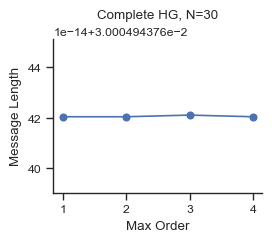

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")
ax.set_title(f"Complete HG, N={N}")

sb.despine()

fig_name = f"message_length_a2a_node_rescaled_tauc_N_{N}"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [15]:
np.diff(message_length)

array([ 0.00000000e+00,  6.52256027e-16, -6.52256027e-16])

## generate full triangular lattice

In [5]:
def triangular_lattice_flag(n_rows, p2, periodic=False):
    """
    Generates a flag complex from a triangular lattice graph.

    Parameters
    ----------
    n_rows : int
        Number of rows in the lattice.
    p2 : float
        Probability of adding a 2-simplex to the clique complex.
    periodic : bool, optional
        Whether the lattice should have periodic boundary conditions. Default is False.

    Returns
    -------
    S_lattice : xgi Simplicial Complex
        
    pos : dict
        Node positions keyed by node ID.        
    """
    
    # number of rows
    m = n_rows - 1
    # number of columns
    columns = n_rows + 1
    n = 2 * columns - 1

    if not periodic:
        n = n - 1
        m = m - 1

    # generate lattice
    G_lattice = nx.triangular_lattice_graph(m, n, periodic=periodic, with_positions=True)
    G_lattice = nx.convert_node_labels_to_integers(G_lattice)
    pos = nx.get_node_attributes(G_lattice, "pos")

    # generate random clique complex (fill in triangles)
    S_lattice = xgi.flag_complex_d2(G_lattice, p2=p2)
    return S_lattice, pos

In [9]:
n_rows = 16
rescale = True
d_max = 2
p_2 = 1

H0, _ = triangular_lattice_flag(n_rows, p2=p_2, periodic=True)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

N = H0.num_nodes

In [10]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)

inverse_rescaling_factors = [d_max / d for d in orders]
Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

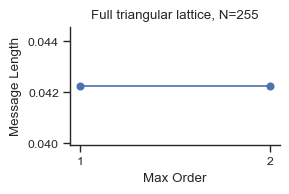

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")

ax.set_title(f"Full triangular lattice, N={N}")

ax.set_xticks([1,2])
plt.subplots_adjust(top=0.7, wspace=0.3)

sb.despine()

fig_name = f"message_length_full_triangular_lattice_rescaled_tauc_N_{N}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [23]:
np.diff(message_length)

array([0.])

## try dataset

In [24]:
data_names = [
    "email-enron",
    "email-eu",
    "hospital-lyon",
    "contact-high-school",
    "contact-primary-school",
    "tags-ask-ubuntu",
    "congress-bills",
    #"disgenenet",
    #"diseasome",
    #"ndc-substances",
    #"coauth-mag-geology",
    #"coauth-mag-history",
]

HGs = {}
for name in tqdm(data_names): 
    HGs[name] = xgi.load_xgi_data(name, max_order=None, cache=True)

100%|█████████████████████████████████████████████| 7/7 [00:20<00:00,  2.93s/it]


In [62]:
i = 1 # choose dataset here
name = data_names[i]
print(name)
H0 = HGs[name]
print(H0)
print("max order:", xgi.max_edge_order(H0))
H0.cleanup(isolates=True)
print(H0)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))
N = H0.num_nodes

rescale = True

email-eu
Hypergraph named email-Eu with 1005 nodes and 235263 hyperedges
max order: 39
Hypergraph named email-Eu with 986 nodes and 24520 hyperedges


In [63]:
rescale

True

In [64]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)

inverse_rescaling_factors = [max(orders) / d for d in orders]
Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

logm result may be inaccurate, approximate err = 1.4702728911486573e-12
logm result may be inaccurate, approximate err = 1.534545397393521e-12
logm result may be inaccurate, approximate err = 1.4702728911486573e-12
logm result may be inaccurate, approximate err = 1.5415570266972448e-12
logm result may be inaccurate, approximate err = 1.4702728911486573e-12
logm result may be inaccurate, approximate err = 1.3871646561571227e-12
logm result may be inaccurate, approximate err = 1.4702728911486573e-12
logm result may be inaccurate, approximate err = 1.350106889461587e-12
logm result may be inaccurate, approximate err = 1.4702728911486573e-12
logm result may be inaccurate, approximate err = 1.3611571077856164e-12
logm result may be inaccurate, approximate err = 1.4702728911486573e-12
logm result may be inaccurate, approximate err = 1.4498578301830753e-12
logm result may be inaccurate, approximate err = 1.4702728911486573e-12
logm result may be inaccurate, approximate err = 1.438434701019132

In [65]:
Ds_H

array([9.99701309e-03, 1.00925344e-02, 1.06852950e-02, 1.09172905e-02,
       1.10462915e-02, 1.09648652e-02, 1.07194481e-02, 1.05163598e-02,
       1.00398889e-02, 9.64513955e-03, 8.76049115e-03, 8.20898065e-03,
       7.44876066e-03, 6.76045847e-03, 6.31520311e-03, 5.99184626e-03,
       5.82309125e-03, 5.54783952e-03, 5.28914262e-03, 5.14866133e-03,
       4.81099964e-03, 4.48722786e-03, 3.76291552e-03, 3.17797302e-03,
       2.77188345e-03, 2.46159630e-03, 2.13541861e-03, 1.68343328e-03,
       1.22797622e-03, 1.20615938e-03, 1.00113096e-03, 6.97747782e-04,
       3.93883873e-04, 3.00513451e-04, 1.89228554e-04, 1.66060320e-04,
       6.52910887e-05, 0.00000000e+00])

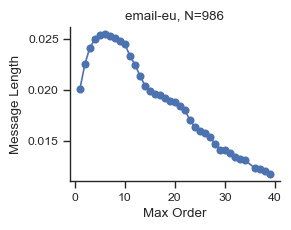

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")


ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")

ax.set_title(f"{name}, N={N}")

sb.despine()

fig_name = f"message_length_{name}_rescaled_tauc"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [67]:
np.log(4)

1.3862943611198906

## single orde present

In [137]:
N = 100
d = 2

H0 = xgi.random_hypergraph(N, ps=[1/N**d], order=d)

In [144]:
orders = [1, 2, 3, 4] #np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

N = H0.num_nodes
print(H0)

Unnamed Hypergraph with 100 nodes and 19 hyperedges


In [146]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)

inverse_rescaling_factors = [1 / sigma(d) for d in orders]
Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/laplacian_matrix.py:173: UserWarning: No edges of order 1. Contribution of that order is zero. Its weight is effectively zero.
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/laplacian_matrix.py:173: UserWarning: No edges of order 3. Contribution of that order is zero. Its weight is effectively zero.
  warn(
/Users/maxime/Dropbox (ISI Foundation)/WORK/SCIENCE/xgi/xgi/linalg/laplacian_matrix.py:173: UserWarning: No edges of order 4. Contribution of that order is zero. Its weight is effectively zero.
  warn(


ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

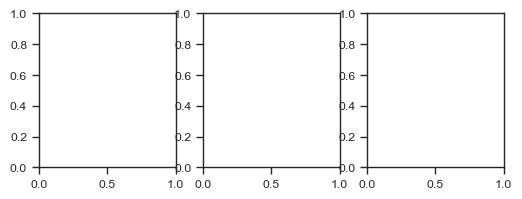

In [147]:
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(6, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")

penal_structure = np.log(orders) / np.log(d_max)
ax2.plot(orders, Ds_H + penal_structure, "o-")

ax3.plot(orders, message_length + penal_structure, "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")

fig.suptitle(f"Complete HG, N={N}")
ax2.set_title("structural complex.")
ax2.set_xlabel("Max Order")

ax3.set_title("both complex.")
ax3.set_xlabel("Max Order")

plt.subplots_adjust(top=0.7, wspace=0.3)

sb.despine()

fig_name = f"message_length_full_triangular_lattice_rescaled_tauc_N_{N}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

## random hypergraph

In [13]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4]) # wiring probas
density_scales = [5, 10]

n_rep = 5

rescale = True

Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        print(density * ps)
        H = xgi.random_hypergraph(N, density * ps)
        print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[density_scales[0]][0])) - 1
weights = np.ones(len(orders))

  0%|                                                     | 0/5 [00:00<?, ?it/s]

[5.e-02 5.e-04 5.e-06 5.e-08]


 20%|█████████                                    | 1/5 [00:03<00:12,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 346 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 40%|██████████████████                           | 2/5 [00:06<00:09,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 363 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 60%|███████████████████████████                  | 3/5 [00:09<00:06,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 361 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 80%|████████████████████████████████████         | 4/5 [00:12<00:03,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 338 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


100%|█████████████████████████████████████████████| 5/5 [00:15<00:00,  3.11s/it]


Unnamed Hypergraph with 100 nodes and 354 hyperedges


  0%|                                                     | 0/5 [00:00<?, ?it/s]

[1.e-01 1.e-03 1.e-05 1.e-07]


 20%|█████████                                    | 1/5 [00:03<00:12,  3.18s/it]

Unnamed Hypergraph with 100 nodes and 696 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 40%|██████████████████                           | 2/5 [00:06<00:09,  3.15s/it]

Unnamed Hypergraph with 100 nodes and 689 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 60%|███████████████████████████                  | 3/5 [00:09<00:06,  3.13s/it]

Unnamed Hypergraph with 100 nodes and 691 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 80%|████████████████████████████████████         | 4/5 [00:12<00:03,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 700 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


100%|█████████████████████████████████████████████| 5/5 [00:15<00:00,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 709 hyperedges


In [14]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for density, Hs_i in Hs.items():
    
    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []
    
    for H0 in tqdm(Hs_i):
        
        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        #tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        #Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
        tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        Ds_H, lZs_H = optimization(H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

        info_losses_i.append(Ds_H)
        complexities_i.append(lZs_H)
        orders_arr_i.append(orders)
        message_lengths_i.append(Ds_H + lZs_H)
                  
    info_losses[density] = info_losses_i
    complexities[density] = complexities_i
    orders_arr[density] = orders_arr_i
    message_lengths[density] = message_lengths_i                          

labels = [f"{i}" for i in density_scales]

100%|█████████████████████████████████████████████| 5/5 [00:18<00:00,  3.66s/it]


In [15]:
for i, s in enumerate(density_scales):
    message_lengths[s] = pad_arr_list(message_lengths[s])

In [17]:
df = pd.DataFrame.from_dict(message_lengths, orient="index").stack().to_frame()

def unpack_list(row):
    return pd.Series(row[0])

# Apply the function and join the new columns to the DataFrame
df[orders] = df.apply(unpack_list, axis=1)
df = df[orders]

dff = df.reset_index(names=["density", "rep"]).melt(
    id_vars=["density", "rep"],
    value_vars=orders,
    var_name="order",
    value_name="message_length",
)

dff

,density,rep,order,message_length
0,5,0,1,0.046574
1,5,1,1,0.054797
2,5,2,1,0.033745
3,5,3,1,0.048812
4,5,4,1,0.051514
5,10,0,1,0.031161
6,10,1,1,0.034709
7,10,2,1,0.040803
8,10,3,1,0.045811
9,10,4,1,0.029335


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


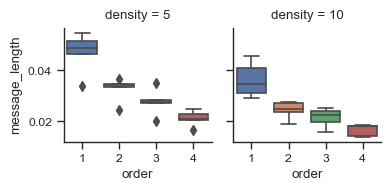

In [30]:
sb.catplot(
    kind="box",
    data=dff,
    x="order",
    y="message_length",
    ax=ax,
    col="density",
    height=2,
    margin_titles=True,
    aspect=1
)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Welch's t-test independent samples, P_val:1.491e-03 t=3.853e+00
2 vs. 3: Welch's t-test independent samples, P_val:1.340e-01 t=1.570e+00
3 vs. 4: Welch's t-test independent samples, P_val:1.318e-02 t=2.806e+00
1 vs. 3: Welch's t-test independent samples, P_val:1.306e-04 t=5.129e+00
2 vs. 4: Welch's t-test independent samples, P_val:4.658e-04 t=4.495e+00
1 vs. 4: Welch's t-test independent samples, P_val:9.744e-06 t=7.454e+00


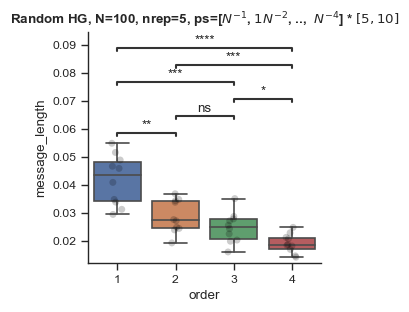

In [18]:
from statannotations.Annotator import Annotator

fix, ax = plt.subplots(figsize=(3, 3))

# palette = sb.color_palette("Set1", n_colors=4)

# box_params = {
#    'boxprops':{'facecolor':'none'},
#    'medianprops':{'color':'silver'},
#'whiskerprops':{'color':'blue'},
#'capprops':{'color':'yellow'}
# }

sb.boxplot(data=dff, x="order", y="message_length", ax=ax)  # , **box_params)

sb.stripplot(
    data=dff, x="order", y="message_length", ax=ax, color="black", dodge=True, alpha=0.2
)  # , legend=False)

sb.despine()
ax.set_title(
    rf"Random HG, N={N}, nrep={n_rep}, ps=[$N^{{-1}}$, $1 N^{{-2}}$, ..,  $N^{{-4}}$] * ${density_scales}$",
    weight="bold",
)


pairs = list(combinations(orders, 2))

annotator = Annotator(ax, pairs, data=dff, y="message_length", x="order")
annotator.configure(test="t-test_welch", text_format="star", loc="inside")
annotator.apply_and_annotate()

fig_name = f"message_length_RHG_N{N}_pwiring_{density_scales}_nreps_{n_rep}_boxplot"
# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

### Double loop: density, tau

In [80]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4]) # wiring probas
density_scales = [5, 10, 50, 100]

n_rep = 100

rescale = True

Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        #print(density * ps)
        H = xgi.random_hypergraph(N, density * ps)
        #print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[density_scales[0]][0])) - 1
weights = np.ones(len(orders))

  0%|                                                   | 0/100 [00:00<?, ?it/s]

[5.e-02 5.e-04 5.e-06 5.e-08]


  1%|▍                                          | 1/100 [00:03<05:08,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 355 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


  2%|▊                                          | 2/100 [00:06<05:03,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 352 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


  3%|█▎                                         | 3/100 [00:09<04:55,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 357 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


  4%|█▋                                         | 4/100 [00:12<04:51,  3.03s/it]

Unnamed Hypergraph with 100 nodes and 359 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


  5%|██▏                                        | 5/100 [00:15<04:47,  3.03s/it]

Unnamed Hypergraph with 100 nodes and 354 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


  6%|██▌                                        | 6/100 [00:18<04:43,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 409 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


  7%|███                                        | 7/100 [00:21<04:41,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 369 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


  8%|███▍                                       | 8/100 [00:24<04:38,  3.03s/it]

Unnamed Hypergraph with 100 nodes and 350 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


  9%|███▊                                       | 9/100 [00:27<04:36,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 365 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 10%|████▏                                     | 10/100 [00:30<04:33,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 357 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 11%|████▌                                     | 11/100 [00:33<04:30,  3.03s/it]

Unnamed Hypergraph with 100 nodes and 344 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 12%|█████                                     | 12/100 [00:36<04:26,  3.03s/it]

Unnamed Hypergraph with 100 nodes and 316 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 13%|█████▍                                    | 13/100 [00:39<04:22,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 337 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 14%|█████▉                                    | 14/100 [00:42<04:19,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 369 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 15%|██████▎                                   | 15/100 [00:45<04:16,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 372 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 16%|██████▋                                   | 16/100 [00:48<04:13,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 362 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 17%|███████▏                                  | 17/100 [00:51<04:10,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 371 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 18%|███████▌                                  | 18/100 [00:54<04:07,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 371 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 19%|███████▉                                  | 19/100 [00:57<04:04,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 371 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 20%|████████▍                                 | 20/100 [01:00<04:01,  3.01s/it]

Unnamed Hypergraph with 100 nodes and 366 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 21%|████████▊                                 | 21/100 [01:03<03:58,  3.01s/it]

Unnamed Hypergraph with 100 nodes and 346 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 22%|█████████▏                                | 22/100 [01:06<03:55,  3.01s/it]

Unnamed Hypergraph with 100 nodes and 341 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 23%|█████████▋                                | 23/100 [01:09<03:52,  3.01s/it]

Unnamed Hypergraph with 100 nodes and 352 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 24%|██████████                                | 24/100 [01:12<03:49,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 396 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 25%|██████████▌                               | 25/100 [01:15<03:46,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 367 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 26%|██████████▉                               | 26/100 [01:18<03:42,  3.01s/it]

Unnamed Hypergraph with 100 nodes and 334 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 27%|███████████▎                              | 27/100 [01:21<03:40,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 361 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 28%|███████████▊                              | 28/100 [01:24<03:37,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 355 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 29%|████████████▏                             | 29/100 [01:27<03:34,  3.02s/it]

Unnamed Hypergraph with 100 nodes and 333 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 30%|████████████▌                             | 30/100 [01:30<03:30,  3.01s/it]

Unnamed Hypergraph with 100 nodes and 355 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 31%|█████████████                             | 31/100 [01:33<03:33,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 370 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 32%|█████████████▍                            | 32/100 [01:37<03:29,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 372 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 33%|█████████████▊                            | 33/100 [01:40<03:25,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 373 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 34%|██████████████▎                           | 34/100 [01:43<03:21,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 352 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 35%|██████████████▋                           | 35/100 [01:46<03:18,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 351 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 36%|███████████████                           | 36/100 [01:49<03:15,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 378 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 37%|███████████████▌                          | 37/100 [01:52<03:11,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 336 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 38%|███████████████▉                          | 38/100 [01:55<03:08,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 355 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 39%|████████████████▍                         | 39/100 [01:58<03:05,  3.03s/it]

Unnamed Hypergraph with 100 nodes and 340 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 40%|████████████████▊                         | 40/100 [02:01<03:02,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 339 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 41%|█████████████████▏                        | 41/100 [02:04<02:59,  3.03s/it]

Unnamed Hypergraph with 100 nodes and 360 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 42%|█████████████████▋                        | 42/100 [02:07<02:55,  3.03s/it]

Unnamed Hypergraph with 100 nodes and 364 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 43%|██████████████████                        | 43/100 [02:10<02:53,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 334 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 44%|██████████████████▍                       | 44/100 [02:13<02:49,  3.03s/it]

Unnamed Hypergraph with 100 nodes and 347 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 45%|██████████████████▉                       | 45/100 [02:16<02:46,  3.03s/it]

Unnamed Hypergraph with 100 nodes and 331 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 46%|███████████████████▎                      | 46/100 [02:19<02:43,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 331 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 47%|███████████████████▋                      | 47/100 [02:22<02:40,  3.03s/it]

Unnamed Hypergraph with 100 nodes and 367 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 48%|████████████████████▏                     | 48/100 [02:25<02:37,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 312 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 49%|████████████████████▌                     | 49/100 [02:28<02:35,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 352 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 50%|█████████████████████                     | 50/100 [02:31<02:32,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 363 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 51%|█████████████████████▍                    | 51/100 [02:34<02:29,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 332 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 52%|█████████████████████▊                    | 52/100 [02:37<02:26,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 353 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 53%|██████████████████████▎                   | 53/100 [02:40<02:22,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 353 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 54%|██████████████████████▋                   | 54/100 [02:43<02:19,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 342 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 55%|███████████████████████                   | 55/100 [02:46<02:16,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 317 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 56%|███████████████████████▌                  | 56/100 [02:49<02:14,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 364 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 57%|███████████████████████▉                  | 57/100 [02:53<02:11,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 390 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 58%|████████████████████████▎                 | 58/100 [02:56<02:08,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 346 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 59%|████████████████████████▊                 | 59/100 [02:59<02:04,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 338 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 60%|█████████████████████████▏                | 60/100 [03:02<02:01,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 352 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 61%|█████████████████████████▌                | 61/100 [03:05<01:58,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 317 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 62%|██████████████████████████                | 62/100 [03:08<01:56,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 370 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 63%|██████████████████████████▍               | 63/100 [03:11<01:53,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 356 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 64%|██████████████████████████▉               | 64/100 [03:14<01:50,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 375 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 65%|███████████████████████████▎              | 65/100 [03:17<01:47,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 317 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 66%|███████████████████████████▋              | 66/100 [03:20<01:44,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 335 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 67%|████████████████████████████▏             | 67/100 [03:23<01:41,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 333 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 68%|████████████████████████████▌             | 68/100 [03:26<01:37,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 327 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 69%|████████████████████████████▉             | 69/100 [03:29<01:34,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 314 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 70%|█████████████████████████████▍            | 70/100 [03:32<01:32,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 357 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 71%|█████████████████████████████▊            | 71/100 [03:35<01:28,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 317 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 72%|██████████████████████████████▏           | 72/100 [03:38<01:25,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 372 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 73%|██████████████████████████████▋           | 73/100 [03:41<01:22,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 374 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 74%|███████████████████████████████           | 74/100 [03:45<01:19,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 371 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 75%|███████████████████████████████▌          | 75/100 [03:48<01:16,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 364 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 76%|███████████████████████████████▉          | 76/100 [03:51<01:13,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 312 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 77%|████████████████████████████████▎         | 77/100 [03:54<01:10,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 347 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 78%|████████████████████████████████▊         | 78/100 [03:57<01:07,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 348 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 79%|█████████████████████████████████▏        | 79/100 [04:00<01:04,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 329 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 80%|█████████████████████████████████▌        | 80/100 [04:03<01:01,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 357 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 81%|██████████████████████████████████        | 81/100 [04:06<00:58,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 338 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 82%|██████████████████████████████████▍       | 82/100 [04:09<00:55,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 338 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 83%|██████████████████████████████████▊       | 83/100 [04:12<00:52,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 351 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 84%|███████████████████████████████████▎      | 84/100 [04:15<00:48,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 355 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 85%|███████████████████████████████████▋      | 85/100 [04:18<00:45,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 353 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 86%|████████████████████████████████████      | 86/100 [04:21<00:42,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 370 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 87%|████████████████████████████████████▌     | 87/100 [04:24<00:39,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 356 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 88%|████████████████████████████████████▉     | 88/100 [04:27<00:36,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 346 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 89%|█████████████████████████████████████▍    | 89/100 [04:31<00:33,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 348 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 90%|█████████████████████████████████████▊    | 90/100 [04:34<00:30,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 393 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 91%|██████████████████████████████████████▏   | 91/100 [04:37<00:27,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 353 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 92%|██████████████████████████████████████▋   | 92/100 [04:40<00:24,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 349 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 93%|███████████████████████████████████████   | 93/100 [04:43<00:21,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 343 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 94%|███████████████████████████████████████▍  | 94/100 [04:46<00:18,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 352 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 95%|███████████████████████████████████████▉  | 95/100 [04:49<00:15,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 334 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 96%|████████████████████████████████████████▎ | 96/100 [04:52<00:12,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 362 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 97%|████████████████████████████████████████▋ | 97/100 [04:55<00:09,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 374 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 98%|█████████████████████████████████████████▏| 98/100 [04:58<00:06,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 350 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


 99%|█████████████████████████████████████████▌| 99/100 [05:01<00:03,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 317 hyperedges
[5.e-02 5.e-04 5.e-06 5.e-08]


100%|█████████████████████████████████████████| 100/100 [05:04<00:00,  3.05s/it]


Unnamed Hypergraph with 100 nodes and 369 hyperedges


  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.e-01 1.e-03 1.e-05 1.e-07]


  1%|▍                                          | 1/100 [00:03<05:04,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 720 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


  2%|▊                                          | 2/100 [00:06<05:01,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 686 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


  3%|█▎                                         | 3/100 [00:09<04:58,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 686 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


  4%|█▋                                         | 4/100 [00:12<04:54,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 660 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


  5%|██▏                                        | 5/100 [00:15<04:50,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 657 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


  6%|██▌                                        | 6/100 [00:18<04:48,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 686 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


  7%|███                                        | 7/100 [00:21<04:46,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 689 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


  8%|███▍                                       | 8/100 [00:24<04:43,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 718 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


  9%|███▊                                       | 9/100 [00:27<04:39,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 729 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 10%|████▏                                     | 10/100 [00:30<04:36,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 726 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 11%|████▌                                     | 11/100 [00:33<04:33,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 727 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 12%|█████                                     | 12/100 [00:36<04:29,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 682 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 13%|█████▍                                    | 13/100 [00:39<04:26,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 742 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 14%|█████▉                                    | 14/100 [00:43<04:24,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 699 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 15%|██████▎                                   | 15/100 [00:46<04:20,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 687 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 16%|██████▋                                   | 16/100 [00:49<04:20,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 704 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 17%|███████▏                                  | 17/100 [00:52<04:16,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 720 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 18%|███████▌                                  | 18/100 [00:55<04:12,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 654 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 19%|███████▉                                  | 19/100 [00:58<04:09,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 717 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 20%|████████▍                                 | 20/100 [01:01<04:05,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 729 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 21%|████████▊                                 | 21/100 [01:04<04:02,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 678 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 22%|█████████▏                                | 22/100 [01:07<03:59,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 722 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 23%|█████████▋                                | 23/100 [01:10<03:56,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 733 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 24%|██████████                                | 24/100 [01:13<03:53,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 724 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 25%|██████████▌                               | 25/100 [01:16<03:50,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 686 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 26%|██████████▉                               | 26/100 [01:19<03:47,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 667 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 27%|███████████▎                              | 27/100 [01:22<03:44,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 712 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 28%|███████████▊                              | 28/100 [01:26<03:40,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 702 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 29%|████████████▏                             | 29/100 [01:29<03:37,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 691 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 30%|████████████▌                             | 30/100 [01:32<03:34,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 764 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 31%|█████████████                             | 31/100 [01:35<03:31,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 695 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 32%|█████████████▍                            | 32/100 [01:38<03:28,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 715 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 33%|█████████████▊                            | 33/100 [01:41<03:25,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 660 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 34%|██████████████▎                           | 34/100 [01:44<03:22,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 664 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 35%|██████████████▋                           | 35/100 [01:47<03:18,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 685 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 36%|███████████████                           | 36/100 [01:50<03:15,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 742 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 37%|███████████████▌                          | 37/100 [01:53<03:12,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 705 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 38%|███████████████▉                          | 38/100 [01:56<03:10,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 743 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 39%|████████████████▍                         | 39/100 [01:59<03:07,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 705 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 40%|████████████████▊                         | 40/100 [02:02<03:03,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 698 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 41%|█████████████████▏                        | 41/100 [02:05<03:00,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 713 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 42%|█████████████████▋                        | 42/100 [02:08<02:57,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 661 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 43%|██████████████████                        | 43/100 [02:12<02:55,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 716 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 44%|██████████████████▍                       | 44/100 [02:15<02:52,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 648 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 45%|██████████████████▉                       | 45/100 [02:18<02:49,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 692 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 46%|███████████████████▎                      | 46/100 [02:21<02:45,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 712 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 47%|███████████████████▋                      | 47/100 [02:24<02:42,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 737 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 48%|████████████████████▏                     | 48/100 [02:27<02:42,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 683 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 49%|████████████████████▌                     | 49/100 [02:30<02:38,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 710 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 50%|█████████████████████                     | 50/100 [02:33<02:34,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 692 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 51%|█████████████████████▍                    | 51/100 [02:36<02:31,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 678 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 52%|█████████████████████▊                    | 52/100 [02:39<02:27,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 669 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 53%|██████████████████████▎                   | 53/100 [02:42<02:24,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 714 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 54%|██████████████████████▋                   | 54/100 [02:45<02:20,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 742 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 55%|███████████████████████                   | 55/100 [02:48<02:18,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 740 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 56%|███████████████████████▌                  | 56/100 [02:52<02:14,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 762 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 57%|███████████████████████▉                  | 57/100 [02:55<02:11,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 739 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 58%|████████████████████████▎                 | 58/100 [02:58<02:08,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 694 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 59%|████████████████████████▊                 | 59/100 [03:01<02:05,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 691 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 60%|█████████████████████████▏                | 60/100 [03:04<02:02,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 738 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 61%|█████████████████████████▌                | 61/100 [03:07<01:58,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 692 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 62%|██████████████████████████                | 62/100 [03:10<01:55,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 745 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 63%|██████████████████████████▍               | 63/100 [03:13<01:53,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 686 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 64%|██████████████████████████▉               | 64/100 [03:16<01:50,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 676 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 65%|███████████████████████████▎              | 65/100 [03:19<01:47,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 675 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 66%|███████████████████████████▋              | 66/100 [03:22<01:43,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 685 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 67%|████████████████████████████▏             | 67/100 [03:25<01:40,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 676 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 68%|████████████████████████████▌             | 68/100 [03:28<01:37,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 707 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 69%|████████████████████████████▉             | 69/100 [03:31<01:34,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 720 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 70%|█████████████████████████████▍            | 70/100 [03:34<01:31,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 699 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 71%|█████████████████████████████▊            | 71/100 [03:37<01:28,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 699 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 72%|██████████████████████████████▏           | 72/100 [03:40<01:25,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 702 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 73%|██████████████████████████████▋           | 73/100 [03:43<01:22,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 724 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 74%|███████████████████████████████           | 74/100 [03:47<01:19,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 688 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 75%|███████████████████████████████▌          | 75/100 [03:50<01:16,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 704 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 76%|███████████████████████████████▉          | 76/100 [03:53<01:13,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 710 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 77%|████████████████████████████████▎         | 77/100 [03:56<01:10,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 679 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 78%|████████████████████████████████▊         | 78/100 [03:59<01:07,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 713 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 79%|█████████████████████████████████▏        | 79/100 [04:02<01:04,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 736 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 80%|█████████████████████████████████▌        | 80/100 [04:05<01:01,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 713 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 81%|██████████████████████████████████        | 81/100 [04:08<00:58,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 710 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 82%|██████████████████████████████████▍       | 82/100 [04:11<00:55,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 680 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 83%|██████████████████████████████████▊       | 83/100 [04:14<00:52,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 727 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 84%|███████████████████████████████████▎      | 84/100 [04:17<00:49,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 763 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 85%|███████████████████████████████████▋      | 85/100 [04:20<00:45,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 663 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 86%|████████████████████████████████████      | 86/100 [04:23<00:42,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 714 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 87%|████████████████████████████████████▌     | 87/100 [04:26<00:39,  3.04s/it]

Unnamed Hypergraph with 100 nodes and 686 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 88%|████████████████████████████████████▉     | 88/100 [04:29<00:36,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 752 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 89%|█████████████████████████████████████▍    | 89/100 [04:32<00:33,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 684 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 90%|█████████████████████████████████████▊    | 90/100 [04:35<00:30,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 697 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 91%|██████████████████████████████████████▏   | 91/100 [04:39<00:27,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 687 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 92%|██████████████████████████████████████▋   | 92/100 [04:42<00:24,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 664 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 93%|███████████████████████████████████████   | 93/100 [04:45<00:21,  3.05s/it]

Unnamed Hypergraph with 100 nodes and 700 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 94%|███████████████████████████████████████▍  | 94/100 [04:48<00:18,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 717 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 95%|███████████████████████████████████████▉  | 95/100 [04:51<00:15,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 721 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 96%|████████████████████████████████████████▎ | 96/100 [04:54<00:12,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 745 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 97%|████████████████████████████████████████▋ | 97/100 [04:57<00:09,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 673 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 98%|█████████████████████████████████████████▏| 98/100 [05:00<00:06,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 684 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


 99%|█████████████████████████████████████████▌| 99/100 [05:03<00:03,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 706 hyperedges
[1.e-01 1.e-03 1.e-05 1.e-07]


100%|█████████████████████████████████████████| 100/100 [05:06<00:00,  3.07s/it]


Unnamed Hypergraph with 100 nodes and 696 hyperedges


  0%|                                                   | 0/100 [00:00<?, ?it/s]

[5.e-01 5.e-03 5.e-05 5.e-07]


  1%|▍                                          | 1/100 [00:03<05:08,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3519 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


  2%|▊                                          | 2/100 [00:06<05:04,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3571 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


  3%|█▎                                         | 3/100 [00:09<05:01,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3559 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


  4%|█▋                                         | 4/100 [00:12<04:57,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3533 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


  5%|██▏                                        | 5/100 [00:15<04:53,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 3436 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


  6%|██▌                                        | 6/100 [00:18<04:50,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 3475 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


  7%|███                                        | 7/100 [00:21<04:47,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 3509 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


  8%|███▍                                       | 8/100 [00:25<04:51,  3.17s/it]

Unnamed Hypergraph with 100 nodes and 3527 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


  9%|███▊                                       | 9/100 [00:28<04:46,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 3549 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 10%|████▏                                     | 10/100 [00:31<04:40,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 3419 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 11%|████▌                                     | 11/100 [00:34<04:36,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3517 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 12%|█████                                     | 12/100 [00:37<04:33,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3529 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 13%|█████▍                                    | 13/100 [00:40<04:28,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 3513 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 14%|█████▉                                    | 14/100 [00:43<04:24,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 3489 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 15%|██████▎                                   | 15/100 [00:46<04:20,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 3563 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 16%|██████▋                                   | 16/100 [00:49<04:17,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 3422 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 17%|███████▏                                  | 17/100 [00:52<04:14,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 3590 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 18%|███████▌                                  | 18/100 [00:55<04:11,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 3511 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 19%|███████▉                                  | 19/100 [00:58<04:08,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 3584 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 20%|████████▍                                 | 20/100 [01:01<04:05,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 3486 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 21%|████████▊                                 | 21/100 [01:04<04:04,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 3483 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 22%|█████████▏                                | 22/100 [01:08<04:04,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 3542 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 23%|█████████▋                                | 23/100 [01:11<04:02,  3.15s/it]

Unnamed Hypergraph with 100 nodes and 3473 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 24%|██████████                                | 24/100 [01:14<04:05,  3.23s/it]

Unnamed Hypergraph with 100 nodes and 3520 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 25%|██████████▌                               | 25/100 [01:18<04:01,  3.22s/it]

Unnamed Hypergraph with 100 nodes and 3511 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 26%|██████████▉                               | 26/100 [01:21<03:56,  3.20s/it]

Unnamed Hypergraph with 100 nodes and 3478 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 27%|███████████▎                              | 27/100 [01:24<03:52,  3.18s/it]

Unnamed Hypergraph with 100 nodes and 3544 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 28%|███████████▊                              | 28/100 [01:27<03:47,  3.15s/it]

Unnamed Hypergraph with 100 nodes and 3543 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 29%|████████████▏                             | 29/100 [01:30<03:44,  3.16s/it]

Unnamed Hypergraph with 100 nodes and 3572 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 30%|████████████▌                             | 30/100 [01:33<03:41,  3.16s/it]

Unnamed Hypergraph with 100 nodes and 3453 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 31%|█████████████                             | 31/100 [01:36<03:37,  3.15s/it]

Unnamed Hypergraph with 100 nodes and 3470 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 32%|█████████████▍                            | 32/100 [01:39<03:33,  3.15s/it]

Unnamed Hypergraph with 100 nodes and 3466 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 33%|█████████████▊                            | 33/100 [01:43<03:30,  3.13s/it]

Unnamed Hypergraph with 100 nodes and 3489 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 34%|██████████████▎                           | 34/100 [01:46<03:26,  3.13s/it]

Unnamed Hypergraph with 100 nodes and 3510 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 35%|██████████████▋                           | 35/100 [01:49<03:22,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 3582 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 36%|███████████████                           | 36/100 [01:52<03:18,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3584 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 37%|███████████████▌                          | 37/100 [01:55<03:14,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 3436 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 38%|███████████████▉                          | 38/100 [01:58<03:11,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 3555 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 39%|████████████████▍                         | 39/100 [02:01<03:07,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 3548 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 40%|████████████████▊                         | 40/100 [02:04<03:04,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 3557 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 41%|█████████████████▏                        | 41/100 [02:07<03:01,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 3560 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 42%|█████████████████▋                        | 42/100 [02:10<02:58,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 3513 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 43%|██████████████████                        | 43/100 [02:13<02:55,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 3427 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 44%|██████████████████▍                       | 44/100 [02:16<02:52,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 3453 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 45%|██████████████████▉                       | 45/100 [02:20<02:48,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 3543 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 46%|███████████████████▎                      | 46/100 [02:23<02:45,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 3511 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 47%|███████████████████▋                      | 47/100 [02:26<02:43,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 3508 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 48%|████████████████████▏                     | 48/100 [02:29<02:41,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3559 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 49%|████████████████████▌                     | 49/100 [02:32<02:38,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3481 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 50%|█████████████████████                     | 50/100 [02:35<02:35,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3490 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 51%|█████████████████████▍                    | 51/100 [02:38<02:32,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 3522 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 52%|█████████████████████▊                    | 52/100 [02:41<02:29,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3496 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 53%|██████████████████████▎                   | 53/100 [02:44<02:25,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3457 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 54%|██████████████████████▋                   | 54/100 [02:47<02:22,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 3497 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 55%|███████████████████████                   | 55/100 [02:51<02:18,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 3548 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 56%|███████████████████████▌                  | 56/100 [02:54<02:20,  3.19s/it]

Unnamed Hypergraph with 100 nodes and 3483 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 57%|███████████████████████▉                  | 57/100 [02:57<02:16,  3.17s/it]

Unnamed Hypergraph with 100 nodes and 3484 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 58%|████████████████████████▎                 | 58/100 [03:00<02:12,  3.15s/it]

Unnamed Hypergraph with 100 nodes and 3455 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 59%|████████████████████████▊                 | 59/100 [03:03<02:08,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 3446 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 60%|█████████████████████████▏                | 60/100 [03:06<02:05,  3.13s/it]

Unnamed Hypergraph with 100 nodes and 3506 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 61%|█████████████████████████▌                | 61/100 [03:09<02:01,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 3635 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 62%|██████████████████████████                | 62/100 [03:13<01:58,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3526 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 63%|██████████████████████████▍               | 63/100 [03:16<01:55,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3457 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 64%|██████████████████████████▉               | 64/100 [03:19<01:52,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 3488 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 65%|███████████████████████████▎              | 65/100 [03:22<01:49,  3.13s/it]

Unnamed Hypergraph with 100 nodes and 3570 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 66%|███████████████████████████▋              | 66/100 [03:25<01:46,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 3497 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 67%|████████████████████████████▏             | 67/100 [03:28<01:43,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 3411 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 68%|████████████████████████████▌             | 68/100 [03:31<01:39,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3553 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 69%|████████████████████████████▉             | 69/100 [03:34<01:36,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3530 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 70%|█████████████████████████████▍            | 70/100 [03:38<01:33,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3436 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 71%|█████████████████████████████▊            | 71/100 [03:41<01:30,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3551 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 72%|██████████████████████████████▏           | 72/100 [03:44<01:27,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 3581 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 73%|██████████████████████████████▋           | 73/100 [03:47<01:24,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3527 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 74%|███████████████████████████████           | 74/100 [03:50<01:20,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3522 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 75%|███████████████████████████████▌          | 75/100 [03:53<01:17,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3559 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 76%|███████████████████████████████▉          | 76/100 [03:56<01:14,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3468 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 77%|████████████████████████████████▎         | 77/100 [03:59<01:11,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3560 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 78%|████████████████████████████████▊         | 78/100 [04:02<01:08,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3500 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 79%|█████████████████████████████████▏        | 79/100 [04:05<01:05,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3455 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 80%|█████████████████████████████████▌        | 80/100 [04:09<01:02,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3532 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 81%|██████████████████████████████████        | 81/100 [04:12<00:59,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3474 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 82%|██████████████████████████████████▍       | 82/100 [04:15<00:55,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3507 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 83%|██████████████████████████████████▊       | 83/100 [04:18<00:52,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 3545 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 84%|███████████████████████████████████▎      | 84/100 [04:21<00:49,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3461 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 85%|███████████████████████████████████▋      | 85/100 [04:24<00:46,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 3606 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 86%|████████████████████████████████████      | 86/100 [04:27<00:43,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 3471 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 87%|████████████████████████████████████▌     | 87/100 [04:30<00:40,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 3498 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 88%|████████████████████████████████████▉     | 88/100 [04:33<00:37,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3501 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 89%|█████████████████████████████████████▍    | 89/100 [04:37<00:34,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 3504 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 90%|█████████████████████████████████████▊    | 90/100 [04:40<00:31,  3.18s/it]

Unnamed Hypergraph with 100 nodes and 3503 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 91%|██████████████████████████████████████▏   | 91/100 [04:43<00:28,  3.19s/it]

Unnamed Hypergraph with 100 nodes and 3516 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 92%|██████████████████████████████████████▋   | 92/100 [04:46<00:25,  3.18s/it]

Unnamed Hypergraph with 100 nodes and 3525 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 93%|███████████████████████████████████████   | 93/100 [04:49<00:22,  3.16s/it]

Unnamed Hypergraph with 100 nodes and 3550 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 94%|███████████████████████████████████████▍  | 94/100 [04:52<00:18,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 3549 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 95%|███████████████████████████████████████▉  | 95/100 [04:55<00:15,  3.13s/it]

Unnamed Hypergraph with 100 nodes and 3554 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 96%|████████████████████████████████████████▎ | 96/100 [04:59<00:12,  3.13s/it]

Unnamed Hypergraph with 100 nodes and 3522 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 97%|████████████████████████████████████████▋ | 97/100 [05:02<00:09,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 3523 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 98%|█████████████████████████████████████████▏| 98/100 [05:05<00:06,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 3517 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


 99%|█████████████████████████████████████████▌| 99/100 [05:08<00:03,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 3576 hyperedges
[5.e-01 5.e-03 5.e-05 5.e-07]


100%|█████████████████████████████████████████| 100/100 [05:11<00:00,  3.12s/it]


Unnamed Hypergraph with 100 nodes and 3545 hyperedges


  0%|                                                   | 0/100 [00:00<?, ?it/s]

[1.e+00 1.e-02 1.e-04 1.e-06]


  1%|▍                                          | 1/100 [00:03<05:05,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 6996 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


  2%|▊                                          | 2/100 [00:06<05:01,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 6921 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


  3%|█▎                                         | 3/100 [00:09<04:57,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 6965 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


  4%|█▋                                         | 4/100 [00:12<04:53,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 7029 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


  5%|██▏                                        | 5/100 [00:15<04:51,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 7001 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


  6%|██▌                                        | 6/100 [00:18<04:48,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 6995 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


  7%|███                                        | 7/100 [00:21<04:45,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 7058 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


  8%|███▍                                       | 8/100 [00:24<04:42,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 7077 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


  9%|███▊                                       | 9/100 [00:28<04:52,  3.21s/it]

Unnamed Hypergraph with 100 nodes and 7044 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 10%|████▏                                     | 10/100 [00:31<04:46,  3.18s/it]

Unnamed Hypergraph with 100 nodes and 7047 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 11%|████▌                                     | 11/100 [00:34<04:42,  3.17s/it]

Unnamed Hypergraph with 100 nodes and 7049 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 12%|█████                                     | 12/100 [00:37<04:36,  3.15s/it]

Unnamed Hypergraph with 100 nodes and 7018 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 13%|█████▍                                    | 13/100 [00:40<04:31,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 7024 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 14%|█████▉                                    | 14/100 [00:43<04:27,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 7044 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 15%|██████▎                                   | 15/100 [00:46<04:24,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 7077 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 16%|██████▋                                   | 16/100 [00:49<04:21,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 7054 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 17%|███████▏                                  | 17/100 [00:52<04:17,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 7041 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 18%|███████▌                                  | 18/100 [00:55<04:13,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 6991 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 19%|███████▉                                  | 19/100 [00:59<04:11,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 6996 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 20%|████████▍                                 | 20/100 [01:02<04:07,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 6964 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 21%|████████▊                                 | 21/100 [01:05<04:03,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 7017 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 22%|█████████▏                                | 22/100 [01:08<03:59,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 6999 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 23%|█████████▋                                | 23/100 [01:11<03:55,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 6988 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 24%|██████████                                | 24/100 [01:14<03:52,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 6999 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 25%|██████████▌                               | 25/100 [01:17<03:49,  3.06s/it]

Unnamed Hypergraph with 100 nodes and 7024 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 26%|██████████▉                               | 26/100 [01:20<03:47,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 7096 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 27%|███████████▎                              | 27/100 [01:23<03:45,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 7068 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 28%|███████████▊                              | 28/100 [01:26<03:41,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 6965 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 29%|████████████▏                             | 29/100 [01:29<03:38,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 6991 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 30%|████████████▌                             | 30/100 [01:32<03:34,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 6991 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 31%|█████████████                             | 31/100 [01:35<03:32,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 7032 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 32%|█████████████▍                            | 32/100 [01:38<03:29,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 6982 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 33%|█████████████▊                            | 33/100 [01:42<03:26,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 7064 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 34%|██████████████▎                           | 34/100 [01:45<03:22,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 6962 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 35%|██████████████▋                           | 35/100 [01:48<03:19,  3.07s/it]

Unnamed Hypergraph with 100 nodes and 7004 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 36%|███████████████                           | 36/100 [01:51<03:17,  3.08s/it]

Unnamed Hypergraph with 100 nodes and 7114 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 37%|███████████████▌                          | 37/100 [01:54<03:15,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 7053 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 38%|███████████████▉                          | 38/100 [01:57<03:17,  3.19s/it]

Unnamed Hypergraph with 100 nodes and 7097 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 39%|████████████████▍                         | 39/100 [02:01<03:14,  3.18s/it]

Unnamed Hypergraph with 100 nodes and 7018 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 40%|████████████████▊                         | 40/100 [02:04<03:09,  3.16s/it]

Unnamed Hypergraph with 100 nodes and 6941 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 41%|█████████████████▏                        | 41/100 [02:07<03:04,  3.13s/it]

Unnamed Hypergraph with 100 nodes and 6891 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 42%|█████████████████▋                        | 42/100 [02:10<03:00,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 7221 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 43%|██████████████████                        | 43/100 [02:13<02:56,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 7049 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 44%|██████████████████▍                       | 44/100 [02:16<02:53,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 6990 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 45%|██████████████████▉                       | 45/100 [02:19<02:50,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 7071 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 46%|███████████████████▎                      | 46/100 [02:22<02:47,  3.09s/it]

Unnamed Hypergraph with 100 nodes and 7080 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 47%|███████████████████▋                      | 47/100 [02:26<02:52,  3.25s/it]

Unnamed Hypergraph with 100 nodes and 6944 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 48%|████████████████████▏                     | 48/100 [02:29<02:47,  3.22s/it]

Unnamed Hypergraph with 100 nodes and 7067 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 49%|████████████████████▌                     | 49/100 [02:32<02:42,  3.18s/it]

Unnamed Hypergraph with 100 nodes and 6984 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 50%|█████████████████████                     | 50/100 [02:35<02:37,  3.15s/it]

Unnamed Hypergraph with 100 nodes and 6961 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 51%|█████████████████████▍                    | 51/100 [02:38<02:34,  3.16s/it]

Unnamed Hypergraph with 100 nodes and 7002 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 52%|█████████████████████▊                    | 52/100 [02:42<02:33,  3.21s/it]

Unnamed Hypergraph with 100 nodes and 6995 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 53%|██████████████████████▎                   | 53/100 [02:45<02:31,  3.22s/it]

Unnamed Hypergraph with 100 nodes and 7056 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 54%|██████████████████████▋                   | 54/100 [02:48<02:27,  3.20s/it]

Unnamed Hypergraph with 100 nodes and 7020 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 55%|███████████████████████                   | 55/100 [02:51<02:24,  3.20s/it]

Unnamed Hypergraph with 100 nodes and 6999 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 56%|███████████████████████▌                  | 56/100 [02:54<02:20,  3.19s/it]

Unnamed Hypergraph with 100 nodes and 7096 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 57%|███████████████████████▉                  | 57/100 [02:57<02:17,  3.19s/it]

Unnamed Hypergraph with 100 nodes and 7042 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 58%|████████████████████████▎                 | 58/100 [03:01<02:13,  3.19s/it]

Unnamed Hypergraph with 100 nodes and 7056 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 59%|████████████████████████▊                 | 59/100 [03:04<02:10,  3.19s/it]

Unnamed Hypergraph with 100 nodes and 7068 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 60%|█████████████████████████▏                | 60/100 [03:07<02:06,  3.17s/it]

Unnamed Hypergraph with 100 nodes and 6988 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 61%|█████████████████████████▌                | 61/100 [03:10<02:03,  3.17s/it]

Unnamed Hypergraph with 100 nodes and 7010 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 62%|██████████████████████████                | 62/100 [03:13<02:00,  3.17s/it]

Unnamed Hypergraph with 100 nodes and 6981 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 63%|██████████████████████████▍               | 63/100 [03:17<01:58,  3.20s/it]

Unnamed Hypergraph with 100 nodes and 7026 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 64%|██████████████████████████▉               | 64/100 [03:20<01:55,  3.22s/it]

Unnamed Hypergraph with 100 nodes and 7004 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 65%|███████████████████████████▎              | 65/100 [03:23<01:52,  3.21s/it]

Unnamed Hypergraph with 100 nodes and 6990 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 66%|███████████████████████████▋              | 66/100 [03:26<01:48,  3.19s/it]

Unnamed Hypergraph with 100 nodes and 7023 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 67%|████████████████████████████▏             | 67/100 [03:29<01:44,  3.16s/it]

Unnamed Hypergraph with 100 nodes and 7034 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 68%|████████████████████████████▌             | 68/100 [03:32<01:40,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 7071 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 69%|████████████████████████████▉             | 69/100 [03:35<01:36,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 7009 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 70%|█████████████████████████████▍            | 70/100 [03:39<01:33,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 7021 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 71%|█████████████████████████████▊            | 71/100 [03:42<01:30,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 7024 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 72%|██████████████████████████████▏           | 72/100 [03:45<01:27,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 7004 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 73%|██████████████████████████████▋           | 73/100 [03:48<01:23,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 7040 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 74%|███████████████████████████████           | 74/100 [03:51<01:20,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 7119 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 75%|███████████████████████████████▌          | 75/100 [03:54<01:17,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 7084 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 76%|███████████████████████████████▉          | 76/100 [03:57<01:14,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 6976 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 77%|████████████████████████████████▎         | 77/100 [04:00<01:11,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 7028 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 78%|████████████████████████████████▊         | 78/100 [04:03<01:08,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 7047 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 79%|█████████████████████████████████▏        | 79/100 [04:07<01:05,  3.12s/it]

Unnamed Hypergraph with 100 nodes and 7011 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 80%|█████████████████████████████████▌        | 80/100 [04:10<01:02,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 7078 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 81%|██████████████████████████████████        | 81/100 [04:13<00:58,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 7036 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 82%|██████████████████████████████████▍       | 82/100 [04:16<00:55,  3.10s/it]

Unnamed Hypergraph with 100 nodes and 7058 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 83%|██████████████████████████████████▊       | 83/100 [04:19<00:52,  3.11s/it]

Unnamed Hypergraph with 100 nodes and 6980 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 84%|███████████████████████████████████▎      | 84/100 [04:22<00:50,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 7027 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 85%|███████████████████████████████████▋      | 85/100 [04:25<00:47,  3.15s/it]

Unnamed Hypergraph with 100 nodes and 7073 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 86%|████████████████████████████████████      | 86/100 [04:29<00:44,  3.16s/it]

Unnamed Hypergraph with 100 nodes and 6956 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 87%|████████████████████████████████████▌     | 87/100 [04:32<00:41,  3.17s/it]

Unnamed Hypergraph with 100 nodes and 7094 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 88%|████████████████████████████████████▉     | 88/100 [04:35<00:37,  3.17s/it]

Unnamed Hypergraph with 100 nodes and 7054 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 89%|█████████████████████████████████████▍    | 89/100 [04:38<00:34,  3.15s/it]

Unnamed Hypergraph with 100 nodes and 7016 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 90%|█████████████████████████████████████▊    | 90/100 [04:41<00:31,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 7049 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 91%|██████████████████████████████████████▏   | 91/100 [04:44<00:28,  3.15s/it]

Unnamed Hypergraph with 100 nodes and 7005 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 92%|██████████████████████████████████████▋   | 92/100 [04:47<00:25,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 7021 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 93%|███████████████████████████████████████   | 93/100 [04:51<00:21,  3.13s/it]

Unnamed Hypergraph with 100 nodes and 7054 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 94%|███████████████████████████████████████▍  | 94/100 [04:54<00:19,  3.33s/it]

Unnamed Hypergraph with 100 nodes and 7097 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 95%|███████████████████████████████████████▉  | 95/100 [04:58<00:16,  3.32s/it]

Unnamed Hypergraph with 100 nodes and 7018 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 96%|████████████████████████████████████████▎ | 96/100 [05:01<00:13,  3.29s/it]

Unnamed Hypergraph with 100 nodes and 6975 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 97%|████████████████████████████████████████▋ | 97/100 [05:04<00:09,  3.25s/it]

Unnamed Hypergraph with 100 nodes and 7051 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 98%|█████████████████████████████████████████▏| 98/100 [05:07<00:06,  3.25s/it]

Unnamed Hypergraph with 100 nodes and 7055 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


 99%|█████████████████████████████████████████▌| 99/100 [05:10<00:03,  3.22s/it]

Unnamed Hypergraph with 100 nodes and 7025 hyperedges
[1.e+00 1.e-02 1.e-04 1.e-06]


100%|█████████████████████████████████████████| 100/100 [05:13<00:00,  3.14s/it]

Unnamed Hypergraph with 100 nodes and 6983 hyperedges


In [81]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for density, Hs_i in Hs.items():
    
    info_losses[density] = dict()
    complexities[density] = dict()
    orders_arr[density] = dict()
    message_lengths[density] = dict()
    
    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []
    
    for i, H0 in enumerate(tqdm(Hs_i)):
        
        info_losses[density][i] = dict()
        complexities[density][i] = dict()
        orders_arr[density][i] = dict()
        message_lengths[density][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        #tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        #Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
        
        tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1) # 1 / lambda2
        
        tau_factors = np.array([0.01, 0.1, 1, 10])
        taus = tau_factors * tau_c
        
        for j, tau in enumerate(taus):
            
            tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(H0, tau, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

            info_losses[density][i][tau_factor] = Ds_H
            complexities[density][i][tau_factor] = lZs_H
            orders_arr[density][i][tau_factor] = orders
            message_lengths[density][i][tau_factor] = Ds_H + lZs_H
                  
labels = [f"{i}" for i in density_scales]

100%|█████████████████████████████████████████| 100/100 [25:10<00:00, 15.11s/it]


In [129]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    #print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append([value, label1, label2, round(label3, 3), index + 1])

# Create a DataFrame from the long_form_data list
df = pd.DataFrame(long_form_data, columns=['message length', 'density', 'rep', 'tau fact.', 'order'])



In [130]:
df

,message length,density,rep,tau fact.,order
0,0.001601,5,0,0.01,1
1,0.000993,5,0,0.01,2
2,0.000946,5,0,0.01,3
3,0.000727,5,0,0.01,4
4,0.128057,5,0,0.10,1
...,...,...,...,...,...
6395,0.045211,100,99,1.00,4
6396,4.604729,100,99,10.00,1
6397,4.603818,100,99,10.00,2
6398,4.602468,100,99,10.00,3


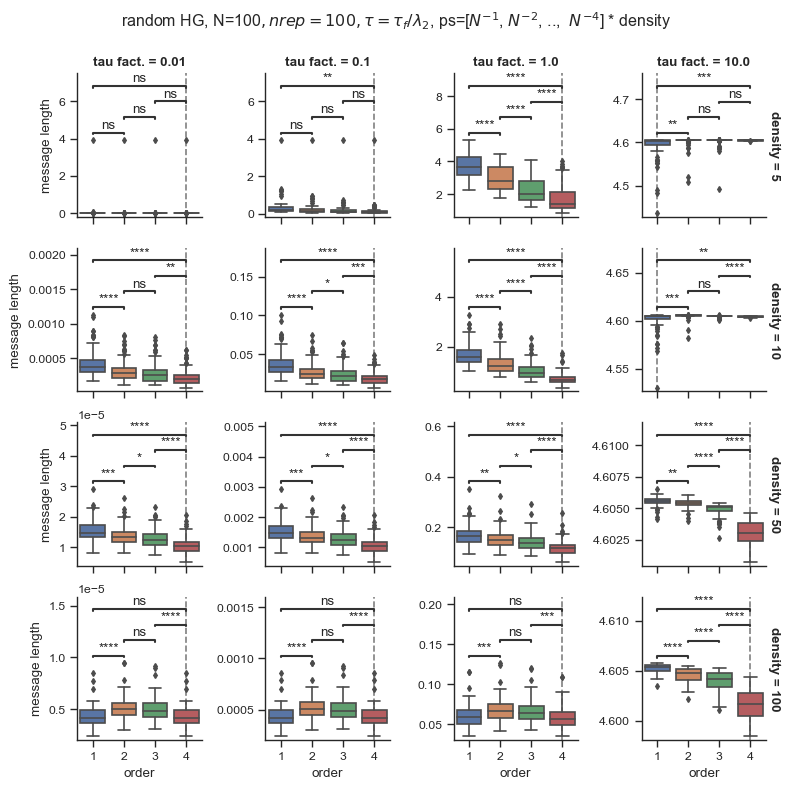

In [160]:
g = sb.catplot(
    kind="box",
    data=df,
    x="order",
    y="message length",
    row="density",
    col="tau fact.",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau_fact in enumerate(tau_factors):
    for j, density in enumerate(density_scales):

        ax = g.axes[j, i]
        mask = (df["tau fact."] == tau_fact) * (df["density"] == density)

        annotator = Annotator(
            ax,
            pairs,
            data=df[mask],
            y="message length",
            x="order",
            row="density",
            col="tau fact.",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        annotator.apply_and_annotate()
        
        # plot vertical line at minimum
        order_min = df[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight='bold')
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
title = rf"random HG, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
g.fig.suptitle(title)

fig_name = f"message_length_RHG_N{N}_pwiring_{density_scales}_taufact_{list(tau_factors)}_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [164]:
df.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_RHG_N100_pwiring_[5, 10, 50, 100]_taufact_[0.01, 0.1, 1.0, 10.0]_nreps_100_boxplot'

## Random SC

In [5]:
N = 100
ps = np.array([1 / N, 1 / N**2, 1 / N**3, 1 / N**4]) # wiring probas
density_scales = [5, 10, 50, 100]

n_rep = 100

rescale = True

In [168]:
Hs = dict()
for density in density_scales:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        #print(density * ps)
        H = xgi.random_simplicial_complex(N, density * ps)
        #print(H)
        Hs_i.append(H)
    Hs[density] = Hs_i

orders = np.array(xgi.unique_edge_sizes(Hs[density_scales[0]][0])) - 1
weights = np.ones(len(orders))

100%|█████████████████████████████████████████| 100/100 [06:38<00:00,  3.99s/it]


In [169]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for density, Hs_i in Hs.items():
    
    info_losses[density] = dict()
    complexities[density] = dict()
    orders_arr[density] = dict()
    message_lengths[density] = dict()
    
    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []
    
    for i, H0 in enumerate(tqdm(Hs_i)):
        
        info_losses[density][i] = dict()
        complexities[density][i] = dict()
        orders_arr[density][i] = dict()
        message_lengths[density][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        #tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        #Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
        
        tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1) # 1 / lambda2
        
        tau_factors = np.array([0.01, 0.1, 1, 10])
        taus = tau_factors * tau_c
        
        for j, tau in enumerate(taus):
            
            tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(H0, tau, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

            info_losses[density][i][tau_factor] = Ds_H
            complexities[density][i][tau_factor] = lZs_H
            orders_arr[density][i][tau_factor] = orders
            message_lengths[density][i][tau_factor] = Ds_H + lZs_H
                  
labels = [f"{i}" for i in density_scales]

100%|█████████████████████████████████████████| 100/100 [23:40<00:00, 14.20s/it]


In [170]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    #print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append([value, label1, label2, round(label3, 3), index + 1])

# Create a DataFrame from the long_form_data list
df_SC = pd.DataFrame(long_form_data, columns=['message length', 'density', 'rep', 'tau fact.', 'order'])



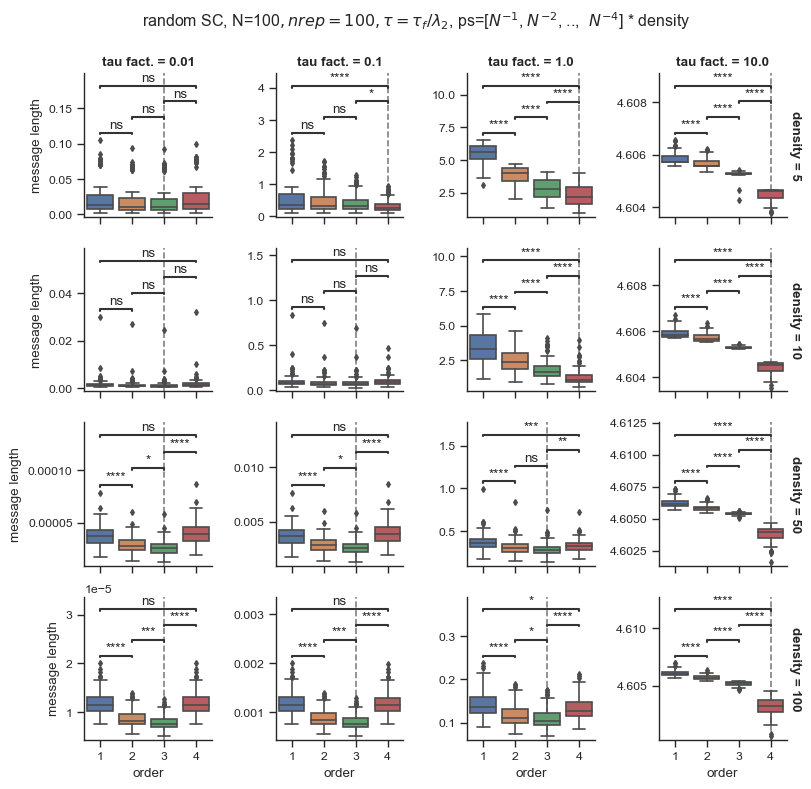

In [187]:
g = sb.catplot(
    kind="box",
    data=df_SC,
    x="order",
    y="message length",
    row="density",
    col="tau fact.",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau_fact in enumerate(tau_factors):
    for j, density in enumerate(density_scales):

        ax = g.axes[j, i]
        mask = (df_SC["tau fact."] == tau_fact) * (df_SC["density"] == density)

        annotator = Annotator(
            ax,
            pairs,
            data=df_SC[mask],
            y="message length",
            x="order",
            row="density",
            col="tau fact.",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        annotator.apply_and_annotate()
        
        # plot vertical line at minimum
        order_min = df_SC[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight='bold')
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
title = rf"random SC, N={N}$, nrep={n_rep}, \tau = \tau_f / \lambda_2$, ps=[$N^{{-1}}$, $N^{{-2}}$, ..,  $N^{{-4}}$] * density"
g.fig.suptitle(title)

fig_name = f"message_length_RSC_N{N}_pwiring_{density_scales}_taufact_{list(tau_factors)}_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [173]:
df.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_RSC_N100_pwiring_[5, 10, 50, 100]_taufact_[0.01, 0.1, 1.0, 10.0]_nreps_100_boxplot'

In [179]:
xgi.density(H0, order=4, ignore_singletons=True)

1.0227458681066928e-06

In [186]:
len(H.edges.filterby("order", 4))

77

## Barabasi Albert

In [6]:
N = 300
ms = [10, 15, 20]

n_rep = 100
rescale = True

In [42]:
Hs = dict()
for m in ms:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        #print(density * ps)
        G = nx.barabasi_albert_graph(N, m)
        H = xgi.flag_complex(G, max_order=4)
        #print(H)
        Hs_i.append(H)
    Hs[m] = Hs_i

100%|███████████████████████████████████████| 100/100 [2:22:15<00:00, 85.35s/it]


In [43]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for m, Hs_i in Hs.items():
    
    info_losses[m] = dict()
    complexities[m] = dict()
    orders_arr[m] = dict()
    message_lengths[m] = dict()
    
    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []
    
    for i, H0 in enumerate(tqdm(Hs_i)):
        
        info_losses[m][i] = dict()
        complexities[m][i] = dict()
        orders_arr[m][i] = dict()
        message_lengths[m][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        #tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        #Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
        
        tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1) # 1 / lambda2
        
        tau_factors = np.array([0.001, 0.01, 0.1, 1, 10])
        taus = tau_factors * tau_c
        
        for j, tau in enumerate(taus):
            
            tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(H0, tau, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

            info_losses[m][i][tau_factor] = Ds_H
            complexities[m][i][tau_factor] = lZs_H
            orders_arr[m][i][tau_factor] = orders
            message_lengths[m][i][tau_factor] = Ds_H + lZs_H
                  
labels = [f"{i}" for i in ms]

  0%|                                                   | 0/100 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 4.1703243287099736e-13
logm result may be inaccurate, approximate err = 5.037047844369668e-13
logm result may be inaccurate, approximate err = 4.1703243287099736e-13
logm result may be inaccurate, approximate err = 4.387730153605403e-13
logm result may be inaccurate, approximate err = 4.1703243287099736e-13
logm result may be inaccurate, approximate err = 4.497622739400891e-13
logm result may be inaccurate, approximate err = 4.1703243287099736e-13
logm result may be inaccurate, approximate err = 4.1703243287099736e-13
logm result may be inaccurate, approximate err = 4.268931266640488e-13
logm result may be inaccurate, approximate err = 4.921089905287897e-13
logm result may be inaccurate, approximate err = 4.268931266640488e-13
logm result may be inaccurate, approximate err = 4.0148621040737323e-13
logm result may be inaccurate, approximate err = 4.268931266640488e-13
logm result may be inaccurate, approximate err = 4.332495543452058e-13


  1%|▍                                        | 1/100 [00:37<1:02:12, 37.70s/it]

logm result may be inaccurate, approximate err = 4.4452292301712204e-13
logm result may be inaccurate, approximate err = 4.784177666852113e-13
logm result may be inaccurate, approximate err = 4.4452292301712204e-13
logm result may be inaccurate, approximate err = 4.37355177930299e-13
logm result may be inaccurate, approximate err = 4.4452292301712204e-13
logm result may be inaccurate, approximate err = 4.2653335090459835e-13
logm result may be inaccurate, approximate err = 4.4452292301712204e-13
logm result may be inaccurate, approximate err = 4.4452292301712204e-13
logm result may be inaccurate, approximate err = 4.818240096503202e-13
logm result may be inaccurate, approximate err = 4.310105530129069e-13
logm result may be inaccurate, approximate err = 4.818240096503202e-13
logm result may be inaccurate, approximate err = 4.410685078632284e-13
logm result may be inaccurate, approximate err = 4.818240096503202e-13
logm result may be inaccurate, approximate err = 4.1119869973833185e-13


  2%|▊                                        | 2/100 [01:14<1:00:58, 37.33s/it]

logm result may be inaccurate, approximate err = 3.9555480149074007e-13
logm result may be inaccurate, approximate err = 4.697058737159897e-13
logm result may be inaccurate, approximate err = 3.9555480149074007e-13
logm result may be inaccurate, approximate err = 4.243929054257924e-13
logm result may be inaccurate, approximate err = 3.9555480149074007e-13
logm result may be inaccurate, approximate err = 4.020670245746456e-13
logm result may be inaccurate, approximate err = 3.9555480149074007e-13
logm result may be inaccurate, approximate err = 3.9555480149074007e-13
logm result may be inaccurate, approximate err = 3.9958009163288706e-13
logm result may be inaccurate, approximate err = 4.870541501610013e-13
logm result may be inaccurate, approximate err = 3.9958009163288706e-13
logm result may be inaccurate, approximate err = 4.267541975263855e-13
logm result may be inaccurate, approximate err = 3.9958009163288706e-13
logm result may be inaccurate, approximate err = 4.133458094175003e-1

  3%|█▎                                         | 3/100 [01:51<59:59, 37.11s/it]

logm result may be inaccurate, approximate err = 3.949133363842627e-13
logm result may be inaccurate, approximate err = 4.664837677844819e-13
logm result may be inaccurate, approximate err = 3.949133363842627e-13
logm result may be inaccurate, approximate err = 4.1156308771624107e-13
logm result may be inaccurate, approximate err = 3.949133363842627e-13
logm result may be inaccurate, approximate err = 4.3684574837096585e-13
logm result may be inaccurate, approximate err = 3.949133363842627e-13
logm result may be inaccurate, approximate err = 3.949133363842627e-13
logm result may be inaccurate, approximate err = 3.8321629813509076e-13
logm result may be inaccurate, approximate err = 4.835078831413999e-13
logm result may be inaccurate, approximate err = 3.8321629813509076e-13
logm result may be inaccurate, approximate err = 4.216118872666741e-13
logm result may be inaccurate, approximate err = 3.8321629813509076e-13
logm result may be inaccurate, approximate err = 4.5354994703088406e-13


  4%|█▋                                         | 4/100 [02:28<59:15, 37.03s/it]

logm result may be inaccurate, approximate err = 4.789712704020665e-13
logm result may be inaccurate, approximate err = 4.457930929788512e-13
logm result may be inaccurate, approximate err = 4.789712704020665e-13
logm result may be inaccurate, approximate err = 4.3175820585002076e-13
logm result may be inaccurate, approximate err = 4.789712704020665e-13
logm result may be inaccurate, approximate err = 3.9591833538946976e-13
logm result may be inaccurate, approximate err = 4.789712704020665e-13
logm result may be inaccurate, approximate err = 4.789712704020665e-13
logm result may be inaccurate, approximate err = 4.305664094092091e-13
logm result may be inaccurate, approximate err = 4.876226291279024e-13
logm result may be inaccurate, approximate err = 4.305664094092091e-13
logm result may be inaccurate, approximate err = 3.9479131128655565e-13
logm result may be inaccurate, approximate err = 4.305664094092091e-13
logm result may be inaccurate, approximate err = 4.716388107975746e-13
log

  5%|██                                       | 5/100 [03:09<1:00:46, 38.38s/it]

logm result may be inaccurate, approximate err = 4.2255743340209954e-13
logm result may be inaccurate, approximate err = 4.462564674928417e-13
logm result may be inaccurate, approximate err = 4.2255743340209954e-13
logm result may be inaccurate, approximate err = 4.2394858845855043e-13
logm result may be inaccurate, approximate err = 4.2255743340209954e-13
logm result may be inaccurate, approximate err = 4.721218808258835e-13
logm result may be inaccurate, approximate err = 4.2255743340209954e-13
logm result may be inaccurate, approximate err = 4.2255743340209954e-13
logm result may be inaccurate, approximate err = 4.3151821509999203e-13
logm result may be inaccurate, approximate err = 4.2534579720715143e-13
logm result may be inaccurate, approximate err = 4.3151821509999203e-13
logm result may be inaccurate, approximate err = 4.200448110797188e-13
logm result may be inaccurate, approximate err = 4.3151821509999203e-13
logm result may be inaccurate, approximate err = 4.1127045045986944

  6%|██▌                                        | 6/100 [03:47<59:58, 38.28s/it]

logm result may be inaccurate, approximate err = 3.83451524693251e-13
logm result may be inaccurate, approximate err = 4.672619945908885e-13
logm result may be inaccurate, approximate err = 3.83451524693251e-13
logm result may be inaccurate, approximate err = 4.3266531787424513e-13
logm result may be inaccurate, approximate err = 3.83451524693251e-13
logm result may be inaccurate, approximate err = 4.100383491024944e-13
logm result may be inaccurate, approximate err = 3.83451524693251e-13
logm result may be inaccurate, approximate err = 3.83451524693251e-13
logm result may be inaccurate, approximate err = 4.249932495558143e-13
logm result may be inaccurate, approximate err = 4.530848837072569e-13
logm result may be inaccurate, approximate err = 4.249932495558143e-13
logm result may be inaccurate, approximate err = 4.484568048068544e-13
logm result may be inaccurate, approximate err = 4.249932495558143e-13
logm result may be inaccurate, approximate err = 4.1984681826442524e-13
logm resu

  7%|███                                        | 7/100 [04:23<58:28, 37.72s/it]

logm result may be inaccurate, approximate err = 4.095078029493956e-13
logm result may be inaccurate, approximate err = 4.645248101537703e-13
logm result may be inaccurate, approximate err = 4.095078029493956e-13
logm result may be inaccurate, approximate err = 4.955683239490003e-13
logm result may be inaccurate, approximate err = 4.095078029493956e-13
logm result may be inaccurate, approximate err = 4.2179091698275405e-13
logm result may be inaccurate, approximate err = 4.095078029493956e-13
logm result may be inaccurate, approximate err = 4.095078029493956e-13
logm result may be inaccurate, approximate err = 4.0147151768116206e-13
logm result may be inaccurate, approximate err = 4.343765769976652e-13
logm result may be inaccurate, approximate err = 4.0147151768116206e-13
logm result may be inaccurate, approximate err = 4.1371330405614157e-13
logm result may be inaccurate, approximate err = 4.0147151768116206e-13
logm result may be inaccurate, approximate err = 4.3756050381697106e-13


  8%|███▍                                       | 8/100 [05:02<58:10, 37.94s/it]

logm result may be inaccurate, approximate err = 4.201985534233131e-13
logm result may be inaccurate, approximate err = 4.665416780279951e-13
logm result may be inaccurate, approximate err = 4.201985534233131e-13
logm result may be inaccurate, approximate err = 4.518292747501955e-13
logm result may be inaccurate, approximate err = 4.201985534233131e-13
logm result may be inaccurate, approximate err = 4.4796200564341185e-13
logm result may be inaccurate, approximate err = 4.201985534233131e-13
logm result may be inaccurate, approximate err = 4.201985534233131e-13
logm result may be inaccurate, approximate err = 4.2543905261353214e-13
logm result may be inaccurate, approximate err = 4.861319891760233e-13
logm result may be inaccurate, approximate err = 4.2543905261353214e-13
logm result may be inaccurate, approximate err = 4.607383146304129e-13
logm result may be inaccurate, approximate err = 4.2543905261353214e-13
logm result may be inaccurate, approximate err = 4.857359640672785e-13
lo

  9%|███▊                                       | 9/100 [05:41<58:02, 38.27s/it]

logm result may be inaccurate, approximate err = 4.1731965603406975e-13
logm result may be inaccurate, approximate err = 4.40537770979895e-13
logm result may be inaccurate, approximate err = 4.1731965603406975e-13
logm result may be inaccurate, approximate err = 4.2345456551642794e-13
logm result may be inaccurate, approximate err = 4.1731965603406975e-13
logm result may be inaccurate, approximate err = 4.23341693797717e-13
logm result may be inaccurate, approximate err = 4.1731965603406975e-13
logm result may be inaccurate, approximate err = 4.1731965603406975e-13
logm result may be inaccurate, approximate err = 3.968753665701255e-13
logm result may be inaccurate, approximate err = 4.533095531122895e-13
logm result may be inaccurate, approximate err = 3.968753665701255e-13
logm result may be inaccurate, approximate err = 3.984482037512143e-13
logm result may be inaccurate, approximate err = 3.968753665701255e-13
logm result may be inaccurate, approximate err = 4.1974452306190666e-13
l

 10%|████▏                                     | 10/100 [06:19<57:15, 38.17s/it]

logm result may be inaccurate, approximate err = 4.436365796071888e-13
logm result may be inaccurate, approximate err = 4.653425933422342e-13
logm result may be inaccurate, approximate err = 4.436365796071888e-13
logm result may be inaccurate, approximate err = 4.310551647194792e-13
logm result may be inaccurate, approximate err = 4.436365796071888e-13
logm result may be inaccurate, approximate err = 4.4249386930332686e-13
logm result may be inaccurate, approximate err = 4.436365796071888e-13
logm result may be inaccurate, approximate err = 4.436365796071888e-13
logm result may be inaccurate, approximate err = 4.014565939890219e-13
logm result may be inaccurate, approximate err = 4.696107653821092e-13
logm result may be inaccurate, approximate err = 4.014565939890219e-13
logm result may be inaccurate, approximate err = 4.275778870225161e-13
logm result may be inaccurate, approximate err = 4.014565939890219e-13
logm result may be inaccurate, approximate err = 4.265576315623741e-13
logm 

 11%|████▌                                     | 11/100 [06:58<56:56, 38.38s/it]

logm result may be inaccurate, approximate err = 4.1733668091871893e-13
logm result may be inaccurate, approximate err = 5.225446276404725e-13
logm result may be inaccurate, approximate err = 4.1733668091871893e-13
logm result may be inaccurate, approximate err = 4.564523579794749e-13
logm result may be inaccurate, approximate err = 4.1733668091871893e-13
logm result may be inaccurate, approximate err = 4.2185992542499397e-13
logm result may be inaccurate, approximate err = 4.1733668091871893e-13
logm result may be inaccurate, approximate err = 4.1733668091871893e-13
logm result may be inaccurate, approximate err = 4.495572877093816e-13
logm result may be inaccurate, approximate err = 4.782945288845453e-13
logm result may be inaccurate, approximate err = 4.495572877093816e-13
logm result may be inaccurate, approximate err = 4.3482189601421956e-13
logm result may be inaccurate, approximate err = 4.495572877093816e-13
logm result may be inaccurate, approximate err = 4.2087109742460414e-1

 12%|█████                                     | 12/100 [07:35<55:38, 37.94s/it]

logm result may be inaccurate, approximate err = 4.4236851295013217e-13
logm result may be inaccurate, approximate err = 5.812930892273077e-13
logm result may be inaccurate, approximate err = 4.4236851295013217e-13
logm result may be inaccurate, approximate err = 4.935695028819073e-13
logm result may be inaccurate, approximate err = 4.4236851295013217e-13
logm result may be inaccurate, approximate err = 4.311815479168509e-13
logm result may be inaccurate, approximate err = 4.4236851295013217e-13
logm result may be inaccurate, approximate err = 4.4236851295013217e-13
logm result may be inaccurate, approximate err = 4.951032448159042e-13
logm result may be inaccurate, approximate err = 4.3021250003662796e-13
logm result may be inaccurate, approximate err = 4.951032448159042e-13
logm result may be inaccurate, approximate err = 5.111495024353875e-13
logm result may be inaccurate, approximate err = 4.951032448159042e-13
logm result may be inaccurate, approximate err = 4.4605696354048924e-13

 13%|█████▍                                    | 13/100 [08:12<54:44, 37.75s/it]

logm result may be inaccurate, approximate err = 4.107504175200553e-13
logm result may be inaccurate, approximate err = 4.495003177395692e-13
logm result may be inaccurate, approximate err = 4.107504175200553e-13
logm result may be inaccurate, approximate err = 4.416194851635753e-13
logm result may be inaccurate, approximate err = 4.107504175200553e-13
logm result may be inaccurate, approximate err = 4.2270634191701005e-13
logm result may be inaccurate, approximate err = 4.107504175200553e-13
logm result may be inaccurate, approximate err = 4.107504175200553e-13
logm result may be inaccurate, approximate err = 4.450732598993873e-13
logm result may be inaccurate, approximate err = 4.580734929236004e-13
logm result may be inaccurate, approximate err = 4.450732598993873e-13
logm result may be inaccurate, approximate err = 4.804388450059935e-13
logm result may be inaccurate, approximate err = 4.450732598993873e-13
logm result may be inaccurate, approximate err = 4.949394708622036e-13
logm 

 14%|█████▉                                    | 14/100 [08:50<54:04, 37.73s/it]

logm result may be inaccurate, approximate err = 4.1862444311908114e-13
logm result may be inaccurate, approximate err = 4.4356385620907004e-13
logm result may be inaccurate, approximate err = 4.1862444311908114e-13
logm result may be inaccurate, approximate err = 5.114195707526424e-13
logm result may be inaccurate, approximate err = 4.1862444311908114e-13
logm result may be inaccurate, approximate err = 4.30536359417043e-13
logm result may be inaccurate, approximate err = 4.1862444311908114e-13
logm result may be inaccurate, approximate err = 4.1862444311908114e-13
logm result may be inaccurate, approximate err = 4.032699886526684e-13
logm result may be inaccurate, approximate err = 4.623154376883553e-13
logm result may be inaccurate, approximate err = 4.032699886526684e-13
logm result may be inaccurate, approximate err = 4.3632510287484554e-13
logm result may be inaccurate, approximate err = 4.032699886526684e-13
logm result may be inaccurate, approximate err = 4.280430307070516e-13


 15%|██████▎                                   | 15/100 [09:27<53:09, 37.53s/it]

logm result may be inaccurate, approximate err = 4.13298092818828e-13
logm result may be inaccurate, approximate err = 4.58358069793421e-13
logm result may be inaccurate, approximate err = 4.13298092818828e-13
logm result may be inaccurate, approximate err = 4.423713299518396e-13
logm result may be inaccurate, approximate err = 4.13298092818828e-13
logm result may be inaccurate, approximate err = 4.2581088314273337e-13
logm result may be inaccurate, approximate err = 4.13298092818828e-13
logm result may be inaccurate, approximate err = 4.13298092818828e-13
logm result may be inaccurate, approximate err = 4.092408273258667e-13
logm result may be inaccurate, approximate err = 4.227457409690045e-13
logm result may be inaccurate, approximate err = 4.092408273258667e-13
logm result may be inaccurate, approximate err = 4.1655180255567033e-13
logm result may be inaccurate, approximate err = 4.092408273258667e-13
logm result may be inaccurate, approximate err = 4.174198392044545e-13
logm resul

 16%|██████▋                                   | 16/100 [10:05<53:01, 37.88s/it]

logm result may be inaccurate, approximate err = 4.771104393239725e-13
logm result may be inaccurate, approximate err = 4.829360212715786e-13
logm result may be inaccurate, approximate err = 4.771104393239725e-13
logm result may be inaccurate, approximate err = 4.608916357400824e-13
logm result may be inaccurate, approximate err = 4.771104393239725e-13
logm result may be inaccurate, approximate err = 4.3703513446598567e-13
logm result may be inaccurate, approximate err = 4.771104393239725e-13
logm result may be inaccurate, approximate err = 4.771104393239725e-13
logm result may be inaccurate, approximate err = 3.9869510925864053e-13
logm result may be inaccurate, approximate err = 4.482732002225436e-13
logm result may be inaccurate, approximate err = 3.9869510925864053e-13
logm result may be inaccurate, approximate err = 4.4366272391433777e-13
logm result may be inaccurate, approximate err = 3.9869510925864053e-13
logm result may be inaccurate, approximate err = 4.302951969053323e-13
l

 17%|███████▏                                  | 17/100 [10:42<52:00, 37.59s/it]

logm result may be inaccurate, approximate err = 4.5313609566738047e-13
logm result may be inaccurate, approximate err = 4.800689862241546e-13
logm result may be inaccurate, approximate err = 4.5313609566738047e-13
logm result may be inaccurate, approximate err = 4.1007288806443216e-13
logm result may be inaccurate, approximate err = 4.5313609566738047e-13
logm result may be inaccurate, approximate err = 4.948164276971808e-13
logm result may be inaccurate, approximate err = 4.5313609566738047e-13
logm result may be inaccurate, approximate err = 4.5313609566738047e-13
logm result may be inaccurate, approximate err = 4.141236791866859e-13
logm result may be inaccurate, approximate err = 4.342525887774498e-13
logm result may be inaccurate, approximate err = 4.141236791866859e-13
logm result may be inaccurate, approximate err = 4.223210571881987e-13
logm result may be inaccurate, approximate err = 4.141236791866859e-13
logm result may be inaccurate, approximate err = 4.225483526137736e-13


 18%|███████▌                                  | 18/100 [11:19<50:55, 37.26s/it]

logm result may be inaccurate, approximate err = 5.035840474446985e-13
logm result may be inaccurate, approximate err = 4.892431311692237e-13
logm result may be inaccurate, approximate err = 5.035840474446985e-13
logm result may be inaccurate, approximate err = 4.610605856675397e-13
logm result may be inaccurate, approximate err = 5.035840474446985e-13
logm result may be inaccurate, approximate err = 4.275951554031149e-13
logm result may be inaccurate, approximate err = 5.035840474446985e-13
logm result may be inaccurate, approximate err = 5.035840474446985e-13
logm result may be inaccurate, approximate err = 4.26186273898381e-13
logm result may be inaccurate, approximate err = 4.688221748697639e-13
logm result may be inaccurate, approximate err = 4.26186273898381e-13
logm result may be inaccurate, approximate err = 4.1827974793344814e-13
logm result may be inaccurate, approximate err = 4.26186273898381e-13
logm result may be inaccurate, approximate err = 4.010545607441749e-13
logm res

 19%|███████▉                                  | 19/100 [11:55<49:56, 37.00s/it]

logm result may be inaccurate, approximate err = 4.038652449471317e-13
logm result may be inaccurate, approximate err = 5.108441605035433e-13
logm result may be inaccurate, approximate err = 4.038652449471317e-13
logm result may be inaccurate, approximate err = 4.4116955353207795e-13
logm result may be inaccurate, approximate err = 4.038652449471317e-13
logm result may be inaccurate, approximate err = 5.754795929798127e-13
logm result may be inaccurate, approximate err = 4.038652449471317e-13
logm result may be inaccurate, approximate err = 4.038652449471317e-13
logm result may be inaccurate, approximate err = 3.93960948384889e-13
logm result may be inaccurate, approximate err = 4.70497714129032e-13
logm result may be inaccurate, approximate err = 3.93960948384889e-13
logm result may be inaccurate, approximate err = 4.908289354166029e-13
logm result may be inaccurate, approximate err = 3.93960948384889e-13
logm result may be inaccurate, approximate err = 4.418721587921768e-13
logm resu

 20%|████████▍                                 | 20/100 [12:32<49:14, 36.93s/it]

logm result may be inaccurate, approximate err = 4.662892607390008e-13
logm result may be inaccurate, approximate err = 4.806389436097994e-13
logm result may be inaccurate, approximate err = 4.662892607390008e-13
logm result may be inaccurate, approximate err = 4.382967453435636e-13
logm result may be inaccurate, approximate err = 4.662892607390008e-13
logm result may be inaccurate, approximate err = 4.5354512967200227e-13
logm result may be inaccurate, approximate err = 4.662892607390008e-13
logm result may be inaccurate, approximate err = 4.662892607390008e-13
logm result may be inaccurate, approximate err = 3.971502474223284e-13
logm result may be inaccurate, approximate err = 4.756834603363094e-13
logm result may be inaccurate, approximate err = 3.971502474223284e-13
logm result may be inaccurate, approximate err = 4.487205273028357e-13
logm result may be inaccurate, approximate err = 3.971502474223284e-13
logm result may be inaccurate, approximate err = 4.2088544626670103e-13
logm

 21%|████████▊                                 | 21/100 [13:10<48:53, 37.13s/it]

logm result may be inaccurate, approximate err = 4.1857068834840543e-13
logm result may be inaccurate, approximate err = 4.570524014827714e-13
logm result may be inaccurate, approximate err = 4.1857068834840543e-13
logm result may be inaccurate, approximate err = 4.377233884417404e-13
logm result may be inaccurate, approximate err = 4.1857068834840543e-13
logm result may be inaccurate, approximate err = 4.615814988903548e-13
logm result may be inaccurate, approximate err = 4.1857068834840543e-13
logm result may be inaccurate, approximate err = 4.1857068834840543e-13
logm result may be inaccurate, approximate err = 4.044377780617624e-13
logm result may be inaccurate, approximate err = 4.3867518703761154e-13
logm result may be inaccurate, approximate err = 4.044377780617624e-13
logm result may be inaccurate, approximate err = 4.2283491127230023e-13
logm result may be inaccurate, approximate err = 4.044377780617624e-13
logm result may be inaccurate, approximate err = 4.4271457517082143e-1

 22%|█████████▏                                | 22/100 [13:47<48:24, 37.24s/it]

logm result may be inaccurate, approximate err = 4.3099487169161324e-13
logm result may be inaccurate, approximate err = 4.59459751857143e-13
logm result may be inaccurate, approximate err = 4.3099487169161324e-13
logm result may be inaccurate, approximate err = 4.2906494692901995e-13
logm result may be inaccurate, approximate err = 4.3099487169161324e-13
logm result may be inaccurate, approximate err = 4.361746108703901e-13
logm result may be inaccurate, approximate err = 4.3099487169161324e-13
logm result may be inaccurate, approximate err = 4.3099487169161324e-13
logm result may be inaccurate, approximate err = 4.081073167163173e-13
logm result may be inaccurate, approximate err = 5.258014302500282e-13
logm result may be inaccurate, approximate err = 4.081073167163173e-13
logm result may be inaccurate, approximate err = 3.8970443853282893e-13
logm result may be inaccurate, approximate err = 4.081073167163173e-13
logm result may be inaccurate, approximate err = 4.408952896248965e-13


 23%|█████████▋                                | 23/100 [14:24<47:51, 37.29s/it]

logm result may be inaccurate, approximate err = 4.260653523038878e-13
logm result may be inaccurate, approximate err = 4.4747851686217925e-13
logm result may be inaccurate, approximate err = 4.260653523038878e-13
logm result may be inaccurate, approximate err = 4.3092782566300765e-13
logm result may be inaccurate, approximate err = 4.260653523038878e-13
logm result may be inaccurate, approximate err = 4.4722731014827353e-13
logm result may be inaccurate, approximate err = 4.260653523038878e-13
logm result may be inaccurate, approximate err = 4.260653523038878e-13
logm result may be inaccurate, approximate err = 3.947206522027964e-13
logm result may be inaccurate, approximate err = 4.750528510051553e-13
logm result may be inaccurate, approximate err = 3.947206522027964e-13
logm result may be inaccurate, approximate err = 4.2215319037913853e-13
logm result may be inaccurate, approximate err = 3.947206522027964e-13
logm result may be inaccurate, approximate err = 4.507819607153482e-13
lo

 24%|██████████                                | 24/100 [15:02<47:28, 37.49s/it]

logm result may be inaccurate, approximate err = 4.286333152404901e-13
logm result may be inaccurate, approximate err = 5.144262438804739e-13
logm result may be inaccurate, approximate err = 4.286333152404901e-13
logm result may be inaccurate, approximate err = 4.3113878387882696e-13
logm result may be inaccurate, approximate err = 4.286333152404901e-13
logm result may be inaccurate, approximate err = 4.2080505687528793e-13
logm result may be inaccurate, approximate err = 4.286333152404901e-13
logm result may be inaccurate, approximate err = 4.286333152404901e-13
logm result may be inaccurate, approximate err = 4.2711844759866663e-13
logm result may be inaccurate, approximate err = 4.46335150098735e-13
logm result may be inaccurate, approximate err = 4.2711844759866663e-13
logm result may be inaccurate, approximate err = 4.563006093462295e-13
logm result may be inaccurate, approximate err = 4.2711844759866663e-13
logm result may be inaccurate, approximate err = 3.973803326408705e-13
lo

 25%|██████████▌                               | 25/100 [15:40<46:57, 37.57s/it]

logm result may be inaccurate, approximate err = 4.256538721007764e-13
logm result may be inaccurate, approximate err = 4.5384584138139457e-13
logm result may be inaccurate, approximate err = 4.256538721007764e-13
logm result may be inaccurate, approximate err = 4.356115897859393e-13
logm result may be inaccurate, approximate err = 4.256538721007764e-13
logm result may be inaccurate, approximate err = 4.4176389415092446e-13
logm result may be inaccurate, approximate err = 4.256538721007764e-13
logm result may be inaccurate, approximate err = 4.256538721007764e-13
logm result may be inaccurate, approximate err = 3.680747482878654e-13
logm result may be inaccurate, approximate err = 4.603997038273434e-13
logm result may be inaccurate, approximate err = 3.680747482878654e-13
logm result may be inaccurate, approximate err = 4.692266119221148e-13
logm result may be inaccurate, approximate err = 3.680747482878654e-13
logm result may be inaccurate, approximate err = 4.296704164788521e-13
logm

 26%|██████████▉                               | 26/100 [16:17<46:11, 37.46s/it]

logm result may be inaccurate, approximate err = 4.1176959144247233e-13
logm result may be inaccurate, approximate err = 4.530399818506628e-13
logm result may be inaccurate, approximate err = 4.1176959144247233e-13
logm result may be inaccurate, approximate err = 3.966595073203445e-13
logm result may be inaccurate, approximate err = 4.1176959144247233e-13
logm result may be inaccurate, approximate err = 4.3482030939660195e-13
logm result may be inaccurate, approximate err = 4.1176959144247233e-13
logm result may be inaccurate, approximate err = 4.1176959144247233e-13
logm result may be inaccurate, approximate err = 3.8485514993276367e-13
logm result may be inaccurate, approximate err = 3.7416813200695043e-13
logm result may be inaccurate, approximate err = 3.8485514993276367e-13
logm result may be inaccurate, approximate err = 3.975892602801588e-13
logm result may be inaccurate, approximate err = 3.8485514993276367e-13
logm result may be inaccurate, approximate err = 4.089625607781407e

 27%|███████████▎                              | 27/100 [16:57<46:19, 38.08s/it]

logm result may be inaccurate, approximate err = 4.2838268181325155e-13
logm result may be inaccurate, approximate err = 4.336292350520579e-13
logm result may be inaccurate, approximate err = 4.2838268181325155e-13
logm result may be inaccurate, approximate err = 4.753291808125655e-13
logm result may be inaccurate, approximate err = 4.2838268181325155e-13
logm result may be inaccurate, approximate err = 4.4564681863992783e-13
logm result may be inaccurate, approximate err = 4.2838268181325155e-13
logm result may be inaccurate, approximate err = 4.2838268181325155e-13
logm result may be inaccurate, approximate err = 4.1547789106692554e-13
logm result may be inaccurate, approximate err = 4.687538046281763e-13
logm result may be inaccurate, approximate err = 4.1547789106692554e-13
logm result may be inaccurate, approximate err = 4.3090605379863796e-13
logm result may be inaccurate, approximate err = 4.1547789106692554e-13
logm result may be inaccurate, approximate err = 4.4201330301260117

 28%|███████████▊                              | 28/100 [17:34<45:31, 37.94s/it]

logm result may be inaccurate, approximate err = 4.219676085155645e-13
logm result may be inaccurate, approximate err = 4.759478685309323e-13
logm result may be inaccurate, approximate err = 4.219676085155645e-13
logm result may be inaccurate, approximate err = 4.4123867840280414e-13
logm result may be inaccurate, approximate err = 4.219676085155645e-13
logm result may be inaccurate, approximate err = 4.579257348982362e-13
logm result may be inaccurate, approximate err = 4.219676085155645e-13
logm result may be inaccurate, approximate err = 4.219676085155645e-13
logm result may be inaccurate, approximate err = 4.3851888934981445e-13
logm result may be inaccurate, approximate err = 4.652300865567091e-13
logm result may be inaccurate, approximate err = 4.3851888934981445e-13
logm result may be inaccurate, approximate err = 4.512575521079814e-13
logm result may be inaccurate, approximate err = 4.3851888934981445e-13
logm result may be inaccurate, approximate err = 4.60605150736764e-13
log

 29%|████████████▏                             | 29/100 [18:13<44:59, 38.02s/it]

logm result may be inaccurate, approximate err = 4.2508354383579916e-13
logm result may be inaccurate, approximate err = 5.381264365724833e-13
logm result may be inaccurate, approximate err = 4.2508354383579916e-13
logm result may be inaccurate, approximate err = 4.595084932962386e-13
logm result may be inaccurate, approximate err = 4.2508354383579916e-13
logm result may be inaccurate, approximate err = 4.0150975019848874e-13
logm result may be inaccurate, approximate err = 4.2508354383579916e-13
logm result may be inaccurate, approximate err = 4.2508354383579916e-13
logm result may be inaccurate, approximate err = 3.801905354628339e-13
logm result may be inaccurate, approximate err = 4.5024560172780724e-13
logm result may be inaccurate, approximate err = 3.801905354628339e-13
logm result may be inaccurate, approximate err = 4.662964112825129e-13
logm result may be inaccurate, approximate err = 3.801905354628339e-13
logm result may be inaccurate, approximate err = 4.834251576324919e-13

 30%|████████████▌                             | 30/100 [18:50<43:58, 37.69s/it]

logm result may be inaccurate, approximate err = 3.8828001316221114e-13
logm result may be inaccurate, approximate err = 4.782682678120207e-13
logm result may be inaccurate, approximate err = 3.8828001316221114e-13
logm result may be inaccurate, approximate err = 4.496455203742699e-13
logm result may be inaccurate, approximate err = 3.8828001316221114e-13
logm result may be inaccurate, approximate err = 4.3610776490257867e-13
logm result may be inaccurate, approximate err = 3.8828001316221114e-13
logm result may be inaccurate, approximate err = 3.8828001316221114e-13
logm result may be inaccurate, approximate err = 4.388623212280008e-13
logm result may be inaccurate, approximate err = 4.87441202304998e-13
logm result may be inaccurate, approximate err = 4.388623212280008e-13
logm result may be inaccurate, approximate err = 4.06673438906281e-13
logm result may be inaccurate, approximate err = 4.388623212280008e-13
logm result may be inaccurate, approximate err = 4.885908809788617e-13
lo

 31%|█████████████                             | 31/100 [19:28<43:27, 37.78s/it]

logm result may be inaccurate, approximate err = 3.9988879386873514e-13
logm result may be inaccurate, approximate err = 4.443200924593955e-13
logm result may be inaccurate, approximate err = 3.9988879386873514e-13
logm result may be inaccurate, approximate err = 4.141019976367332e-13
logm result may be inaccurate, approximate err = 3.9988879386873514e-13
logm result may be inaccurate, approximate err = 4.55949600803844e-13
logm result may be inaccurate, approximate err = 3.9988879386873514e-13
logm result may be inaccurate, approximate err = 3.9988879386873514e-13
logm result may be inaccurate, approximate err = 4.2033670330775806e-13
logm result may be inaccurate, approximate err = 4.339507166946774e-13
logm result may be inaccurate, approximate err = 4.2033670330775806e-13
logm result may be inaccurate, approximate err = 4.20947117924022e-13
logm result may be inaccurate, approximate err = 4.2033670330775806e-13
logm result may be inaccurate, approximate err = 4.5082547653889e-13
lo

 32%|█████████████▍                            | 32/100 [20:05<42:42, 37.69s/it]

logm result may be inaccurate, approximate err = 4.1533542700629185e-13
logm result may be inaccurate, approximate err = 5.265394503684878e-13
logm result may be inaccurate, approximate err = 4.1533542700629185e-13
logm result may be inaccurate, approximate err = 4.831195720358072e-13
logm result may be inaccurate, approximate err = 4.1533542700629185e-13
logm result may be inaccurate, approximate err = 5.195134721292859e-13
logm result may be inaccurate, approximate err = 4.1533542700629185e-13
logm result may be inaccurate, approximate err = 4.1533542700629185e-13
logm result may be inaccurate, approximate err = 4.2814274619295985e-13
logm result may be inaccurate, approximate err = 5.181666259918006e-13
logm result may be inaccurate, approximate err = 4.2814274619295985e-13
logm result may be inaccurate, approximate err = 4.1691038729007203e-13
logm result may be inaccurate, approximate err = 4.2814274619295985e-13
logm result may be inaccurate, approximate err = 4.2207725518036927e

 33%|█████████████▊                            | 33/100 [20:43<42:11, 37.79s/it]

logm result may be inaccurate, approximate err = 4.181976843937834e-13
logm result may be inaccurate, approximate err = 4.695483705059088e-13
logm result may be inaccurate, approximate err = 4.181976843937834e-13
logm result may be inaccurate, approximate err = 4.694925351532522e-13
logm result may be inaccurate, approximate err = 4.181976843937834e-13
logm result may be inaccurate, approximate err = 4.14956113424015e-13
logm result may be inaccurate, approximate err = 4.181976843937834e-13
logm result may be inaccurate, approximate err = 4.181976843937834e-13
logm result may be inaccurate, approximate err = 4.3084851888536846e-13
logm result may be inaccurate, approximate err = 5.194053051641331e-13
logm result may be inaccurate, approximate err = 4.3084851888536846e-13
logm result may be inaccurate, approximate err = 4.924348464009671e-13
logm result may be inaccurate, approximate err = 4.3084851888536846e-13
logm result may be inaccurate, approximate err = 4.217865623735688e-13
logm

 34%|██████████████▎                           | 34/100 [21:22<41:48, 38.00s/it]

logm result may be inaccurate, approximate err = 5.762995002983303e-13
logm result may be inaccurate, approximate err = 5.18380951479769e-13
logm result may be inaccurate, approximate err = 5.762995002983303e-13
logm result may be inaccurate, approximate err = 5.049247843340813e-13
logm result may be inaccurate, approximate err = 5.762995002983303e-13
logm result may be inaccurate, approximate err = 4.2753240144706243e-13
logm result may be inaccurate, approximate err = 5.762995002983303e-13
logm result may be inaccurate, approximate err = 5.762995002983303e-13
logm result may be inaccurate, approximate err = 4.366680825447396e-13
logm result may be inaccurate, approximate err = 4.3227794044034983e-13
logm result may be inaccurate, approximate err = 4.366680825447396e-13
logm result may be inaccurate, approximate err = 4.3046635603475295e-13
logm result may be inaccurate, approximate err = 4.366680825447396e-13
logm result may be inaccurate, approximate err = 4.0141984942687954e-13
log

 35%|██████████████▋                           | 35/100 [21:59<41:05, 37.93s/it]

logm result may be inaccurate, approximate err = 4.2021541783715483e-13
logm result may be inaccurate, approximate err = 4.5034077962645017e-13
logm result may be inaccurate, approximate err = 4.2021541783715483e-13
logm result may be inaccurate, approximate err = 4.2518046570613744e-13
logm result may be inaccurate, approximate err = 4.2021541783715483e-13
logm result may be inaccurate, approximate err = 4.107624921802547e-13
logm result may be inaccurate, approximate err = 4.2021541783715483e-13
logm result may be inaccurate, approximate err = 4.2021541783715483e-13
logm result may be inaccurate, approximate err = 3.707771821875203e-13
logm result may be inaccurate, approximate err = 4.208488930537336e-13
logm result may be inaccurate, approximate err = 3.707771821875203e-13
logm result may be inaccurate, approximate err = 4.014833741066954e-13
logm result may be inaccurate, approximate err = 3.707771821875203e-13
logm result may be inaccurate, approximate err = 3.961838933100137e-13

 36%|███████████████                           | 36/100 [22:39<40:59, 38.44s/it]

logm result may be inaccurate, approximate err = 4.643963558636323e-13
logm result may be inaccurate, approximate err = 4.49935485236415e-13
logm result may be inaccurate, approximate err = 4.643963558636323e-13
logm result may be inaccurate, approximate err = 4.561836453029615e-13
logm result may be inaccurate, approximate err = 4.643963558636323e-13
logm result may be inaccurate, approximate err = 4.3797534043225087e-13
logm result may be inaccurate, approximate err = 4.643963558636323e-13
logm result may be inaccurate, approximate err = 4.643963558636323e-13
logm result may be inaccurate, approximate err = 4.682330076531496e-13
logm result may be inaccurate, approximate err = 4.205458704173572e-13
logm result may be inaccurate, approximate err = 4.682330076531496e-13
logm result may be inaccurate, approximate err = 4.942350482158581e-13
logm result may be inaccurate, approximate err = 4.682330076531496e-13
logm result may be inaccurate, approximate err = 4.225793657599282e-13
logm r

 37%|███████████████▌                          | 37/100 [23:17<40:21, 38.44s/it]

logm result may be inaccurate, approximate err = 3.7802221731549257e-13
logm result may be inaccurate, approximate err = 5.241524439476098e-13
logm result may be inaccurate, approximate err = 3.7802221731549257e-13
logm result may be inaccurate, approximate err = 4.2690874771687087e-13
logm result may be inaccurate, approximate err = 3.7802221731549257e-13
logm result may be inaccurate, approximate err = 4.986191833655478e-13
logm result may be inaccurate, approximate err = 3.7802221731549257e-13
logm result may be inaccurate, approximate err = 3.7802221731549257e-13
logm result may be inaccurate, approximate err = 4.1760970838910497e-13
logm result may be inaccurate, approximate err = 4.653866400240097e-13
logm result may be inaccurate, approximate err = 4.1760970838910497e-13
logm result may be inaccurate, approximate err = 4.301470836895554e-13
logm result may be inaccurate, approximate err = 4.1760970838910497e-13
logm result may be inaccurate, approximate err = 4.483117514625862e-

 38%|███████████████▉                          | 38/100 [23:55<39:31, 38.25s/it]

logm result may be inaccurate, approximate err = 4.4246945685265007e-13
logm result may be inaccurate, approximate err = 5.176283965158484e-13
logm result may be inaccurate, approximate err = 4.4246945685265007e-13
logm result may be inaccurate, approximate err = 4.493625878940245e-13
logm result may be inaccurate, approximate err = 4.4246945685265007e-13
logm result may be inaccurate, approximate err = 3.941812842118424e-13
logm result may be inaccurate, approximate err = 4.4246945685265007e-13
logm result may be inaccurate, approximate err = 4.4246945685265007e-13
logm result may be inaccurate, approximate err = 4.215013982247048e-13
logm result may be inaccurate, approximate err = 4.37867155833508e-13
logm result may be inaccurate, approximate err = 4.215013982247048e-13
logm result may be inaccurate, approximate err = 4.0453069110316774e-13
logm result may be inaccurate, approximate err = 4.215013982247048e-13
logm result may be inaccurate, approximate err = 4.2222224966345556e-13


 39%|████████████████▍                         | 39/100 [24:33<38:47, 38.15s/it]

logm result may be inaccurate, approximate err = 4.4972624541685314e-13
logm result may be inaccurate, approximate err = 4.2978151800832043e-13
logm result may be inaccurate, approximate err = 4.4972624541685314e-13
logm result may be inaccurate, approximate err = 4.747360618568662e-13
logm result may be inaccurate, approximate err = 4.4972624541685314e-13
logm result may be inaccurate, approximate err = 4.33878450919857e-13
logm result may be inaccurate, approximate err = 4.4972624541685314e-13
logm result may be inaccurate, approximate err = 4.4972624541685314e-13
logm result may be inaccurate, approximate err = 4.2974167158289644e-13
logm result may be inaccurate, approximate err = 4.322438242839443e-13
logm result may be inaccurate, approximate err = 4.2974167158289644e-13
logm result may be inaccurate, approximate err = 4.863619639313421e-13
logm result may be inaccurate, approximate err = 4.2974167158289644e-13
logm result may be inaccurate, approximate err = 4.285596443291332e-1

 40%|████████████████▊                         | 40/100 [25:11<37:58, 37.97s/it]

logm result may be inaccurate, approximate err = 4.1928473211784263e-13
logm result may be inaccurate, approximate err = 4.660228372469366e-13
logm result may be inaccurate, approximate err = 4.1928473211784263e-13
logm result may be inaccurate, approximate err = 5.059369269904459e-13
logm result may be inaccurate, approximate err = 4.1928473211784263e-13
logm result may be inaccurate, approximate err = 4.1831876894805536e-13
logm result may be inaccurate, approximate err = 4.1928473211784263e-13
logm result may be inaccurate, approximate err = 4.1928473211784263e-13
logm result may be inaccurate, approximate err = 4.012494291188356e-13
logm result may be inaccurate, approximate err = 4.38721836615783e-13
logm result may be inaccurate, approximate err = 4.012494291188356e-13
logm result may be inaccurate, approximate err = 4.668905044100847e-13
logm result may be inaccurate, approximate err = 4.012494291188356e-13
logm result may be inaccurate, approximate err = 4.163239941022778e-13
l

 41%|█████████████████▏                        | 41/100 [25:49<37:21, 37.99s/it]

logm result may be inaccurate, approximate err = 4.118629291562205e-13
logm result may be inaccurate, approximate err = 4.285090804060672e-13
logm result may be inaccurate, approximate err = 4.118629291562205e-13
logm result may be inaccurate, approximate err = 4.752100687498916e-13
logm result may be inaccurate, approximate err = 4.118629291562205e-13
logm result may be inaccurate, approximate err = 4.747074217664999e-13
logm result may be inaccurate, approximate err = 4.118629291562205e-13
logm result may be inaccurate, approximate err = 4.118629291562205e-13
logm result may be inaccurate, approximate err = 4.0679008341136445e-13
logm result may be inaccurate, approximate err = 4.4899371170723277e-13
logm result may be inaccurate, approximate err = 4.0679008341136445e-13
logm result may be inaccurate, approximate err = 4.3680741707374435e-13
logm result may be inaccurate, approximate err = 4.0679008341136445e-13
logm result may be inaccurate, approximate err = 3.8778109071467333e-13


 42%|█████████████████▋                        | 42/100 [26:26<36:38, 37.90s/it]

logm result may be inaccurate, approximate err = 4.5293520681714454e-13
logm result may be inaccurate, approximate err = 4.852401020623504e-13
logm result may be inaccurate, approximate err = 4.5293520681714454e-13
logm result may be inaccurate, approximate err = 4.718592966759681e-13
logm result may be inaccurate, approximate err = 4.5293520681714454e-13
logm result may be inaccurate, approximate err = 4.2792965781331085e-13
logm result may be inaccurate, approximate err = 4.5293520681714454e-13
logm result may be inaccurate, approximate err = 4.5293520681714454e-13
logm result may be inaccurate, approximate err = 4.088693825409053e-13
logm result may be inaccurate, approximate err = 4.662869811802369e-13
logm result may be inaccurate, approximate err = 4.088693825409053e-13
logm result may be inaccurate, approximate err = 5.077396736442234e-13
logm result may be inaccurate, approximate err = 4.088693825409053e-13
logm result may be inaccurate, approximate err = 4.264950184245603e-13


 43%|██████████████████                        | 43/100 [27:05<36:06, 38.02s/it]

logm result may be inaccurate, approximate err = 4.245448726023949e-13
logm result may be inaccurate, approximate err = 4.56601742512035e-13
logm result may be inaccurate, approximate err = 4.245448726023949e-13
logm result may be inaccurate, approximate err = 4.477082287755994e-13
logm result may be inaccurate, approximate err = 4.245448726023949e-13
logm result may be inaccurate, approximate err = 4.0742431581352025e-13
logm result may be inaccurate, approximate err = 4.245448726023949e-13
logm result may be inaccurate, approximate err = 4.245448726023949e-13
logm result may be inaccurate, approximate err = 4.3484128937690444e-13
logm result may be inaccurate, approximate err = 4.351137781096753e-13
logm result may be inaccurate, approximate err = 4.3484128937690444e-13
logm result may be inaccurate, approximate err = 4.2148173860751374e-13
logm result may be inaccurate, approximate err = 4.3484128937690444e-13
logm result may be inaccurate, approximate err = 3.7164014279345276e-13
l

 44%|██████████████████▍                       | 44/100 [27:43<35:31, 38.06s/it]

logm result may be inaccurate, approximate err = 4.208180512696235e-13
logm result may be inaccurate, approximate err = 4.642969386150555e-13
logm result may be inaccurate, approximate err = 4.208180512696235e-13
logm result may be inaccurate, approximate err = 4.302726182959737e-13
logm result may be inaccurate, approximate err = 4.208180512696235e-13
logm result may be inaccurate, approximate err = 4.416097401206074e-13
logm result may be inaccurate, approximate err = 4.208180512696235e-13
logm result may be inaccurate, approximate err = 4.208180512696235e-13
logm result may be inaccurate, approximate err = 3.8259380562143413e-13
logm result may be inaccurate, approximate err = 4.571768981963427e-13
logm result may be inaccurate, approximate err = 3.8259380562143413e-13
logm result may be inaccurate, approximate err = 4.3679149975372773e-13
logm result may be inaccurate, approximate err = 3.8259380562143413e-13
logm result may be inaccurate, approximate err = 4.531289306295499e-13
lo

 45%|██████████████████▉                       | 45/100 [28:22<35:12, 38.41s/it]

logm result may be inaccurate, approximate err = 4.2441853487689167e-13
logm result may be inaccurate, approximate err = 4.830404779724819e-13
logm result may be inaccurate, approximate err = 4.2441853487689167e-13
logm result may be inaccurate, approximate err = 4.670891306022503e-13
logm result may be inaccurate, approximate err = 4.2441853487689167e-13
logm result may be inaccurate, approximate err = 4.076454348445497e-13
logm result may be inaccurate, approximate err = 4.2441853487689167e-13
logm result may be inaccurate, approximate err = 4.2441853487689167e-13
logm result may be inaccurate, approximate err = 4.3304407849380403e-13
logm result may be inaccurate, approximate err = 5.086793017738402e-13
logm result may be inaccurate, approximate err = 4.3304407849380403e-13
logm result may be inaccurate, approximate err = 4.3034662792462873e-13
logm result may be inaccurate, approximate err = 4.3304407849380403e-13
logm result may be inaccurate, approximate err = 4.585512473212338e-

 46%|███████████████████▎                      | 46/100 [29:00<34:31, 38.35s/it]

logm result may be inaccurate, approximate err = 4.0920892285733707e-13
logm result may be inaccurate, approximate err = 4.4371733347534307e-13
logm result may be inaccurate, approximate err = 4.0920892285733707e-13
logm result may be inaccurate, approximate err = 4.380218803272744e-13
logm result may be inaccurate, approximate err = 4.0920892285733707e-13
logm result may be inaccurate, approximate err = 4.702876964428768e-13
logm result may be inaccurate, approximate err = 4.0920892285733707e-13
logm result may be inaccurate, approximate err = 4.0920892285733707e-13
logm result may be inaccurate, approximate err = 3.797563685942748e-13
logm result may be inaccurate, approximate err = 4.4007951889707695e-13
logm result may be inaccurate, approximate err = 3.797563685942748e-13
logm result may be inaccurate, approximate err = 4.304445089379214e-13
logm result may be inaccurate, approximate err = 3.797563685942748e-13
logm result may be inaccurate, approximate err = 3.897589172823212e-13

 47%|███████████████████▋                      | 47/100 [29:39<33:57, 38.44s/it]

logm result may be inaccurate, approximate err = 4.1227225688714587e-13
logm result may be inaccurate, approximate err = 4.905876072683778e-13
logm result may be inaccurate, approximate err = 4.1227225688714587e-13
logm result may be inaccurate, approximate err = 4.643300352318999e-13
logm result may be inaccurate, approximate err = 4.1227225688714587e-13
logm result may be inaccurate, approximate err = 4.417619734276492e-13
logm result may be inaccurate, approximate err = 4.1227225688714587e-13
logm result may be inaccurate, approximate err = 4.1227225688714587e-13
logm result may be inaccurate, approximate err = 4.413365289524047e-13
logm result may be inaccurate, approximate err = 4.565536245236868e-13
logm result may be inaccurate, approximate err = 4.413365289524047e-13
logm result may be inaccurate, approximate err = 4.2376201538252703e-13
logm result may be inaccurate, approximate err = 4.413365289524047e-13
logm result may be inaccurate, approximate err = 4.48758810238545e-13
l

 48%|████████████████████▏                     | 48/100 [30:17<33:15, 38.37s/it]

logm result may be inaccurate, approximate err = 4.546354538963649e-13
logm result may be inaccurate, approximate err = 4.483944589021547e-13
logm result may be inaccurate, approximate err = 4.546354538963649e-13
logm result may be inaccurate, approximate err = 3.8700096271728745e-13
logm result may be inaccurate, approximate err = 4.546354538963649e-13
logm result may be inaccurate, approximate err = 4.0298397687767337e-13
logm result may be inaccurate, approximate err = 4.546354538963649e-13
logm result may be inaccurate, approximate err = 4.546354538963649e-13
logm result may be inaccurate, approximate err = 3.5097989009715625e-13
logm result may be inaccurate, approximate err = 2.921909634728083e-13
logm result may be inaccurate, approximate err = 3.5097989009715625e-13
logm result may be inaccurate, approximate err = 3.538563099996235e-13
logm result may be inaccurate, approximate err = 3.5097989009715625e-13
logm result may be inaccurate, approximate err = 3.282083050568636e-13
l

 49%|████████████████████▌                     | 49/100 [30:58<33:14, 39.11s/it]

logm result may be inaccurate, approximate err = 4.0394611868919606e-13
logm result may be inaccurate, approximate err = 5.61457884400711e-13
logm result may be inaccurate, approximate err = 4.0394611868919606e-13
logm result may be inaccurate, approximate err = 4.741810047705397e-13
logm result may be inaccurate, approximate err = 4.0394611868919606e-13
logm result may be inaccurate, approximate err = 4.5230435397445117e-13
logm result may be inaccurate, approximate err = 4.0394611868919606e-13
logm result may be inaccurate, approximate err = 4.0394611868919606e-13
logm result may be inaccurate, approximate err = 3.957011476099584e-13
logm result may be inaccurate, approximate err = 4.603146563414737e-13
logm result may be inaccurate, approximate err = 3.957011476099584e-13
logm result may be inaccurate, approximate err = 4.3018331229085016e-13
logm result may be inaccurate, approximate err = 3.957011476099584e-13
logm result may be inaccurate, approximate err = 3.9641948051669706e-13

 50%|█████████████████████                     | 50/100 [31:37<32:30, 39.00s/it]

logm result may be inaccurate, approximate err = 4.067136115139059e-13
logm result may be inaccurate, approximate err = 4.704504271111419e-13
logm result may be inaccurate, approximate err = 4.067136115139059e-13
logm result may be inaccurate, approximate err = 4.5061051588946013e-13
logm result may be inaccurate, approximate err = 4.067136115139059e-13
logm result may be inaccurate, approximate err = 4.405794110161504e-13
logm result may be inaccurate, approximate err = 4.067136115139059e-13
logm result may be inaccurate, approximate err = 4.067136115139059e-13
logm result may be inaccurate, approximate err = 4.4602092908489507e-13
logm result may be inaccurate, approximate err = 4.553941080646761e-13
logm result may be inaccurate, approximate err = 4.4602092908489507e-13
logm result may be inaccurate, approximate err = 4.161549556999826e-13
logm result may be inaccurate, approximate err = 4.4602092908489507e-13
logm result may be inaccurate, approximate err = 4.0138673469275787e-13
l

 51%|█████████████████████▍                    | 51/100 [32:15<31:40, 38.80s/it]

logm result may be inaccurate, approximate err = 4.2612795992973674e-13
logm result may be inaccurate, approximate err = 4.5285120976253717e-13
logm result may be inaccurate, approximate err = 4.2612795992973674e-13
logm result may be inaccurate, approximate err = 4.449848475256783e-13
logm result may be inaccurate, approximate err = 4.2612795992973674e-13
logm result may be inaccurate, approximate err = 4.2206870680283574e-13
logm result may be inaccurate, approximate err = 4.2612795992973674e-13
logm result may be inaccurate, approximate err = 4.2612795992973674e-13
logm result may be inaccurate, approximate err = 4.0344745078188405e-13
logm result may be inaccurate, approximate err = 4.520018023632871e-13
logm result may be inaccurate, approximate err = 4.0344745078188405e-13
logm result may be inaccurate, approximate err = 4.624931706859607e-13
logm result may be inaccurate, approximate err = 4.0344745078188405e-13
logm result may be inaccurate, approximate err = 4.189807403594374e

 52%|█████████████████████▊                    | 52/100 [32:53<30:55, 38.66s/it]

logm result may be inaccurate, approximate err = 4.3078546372719497e-13
logm result may be inaccurate, approximate err = 4.71703206558147e-13
logm result may be inaccurate, approximate err = 4.3078546372719497e-13
logm result may be inaccurate, approximate err = 4.825116979778056e-13
logm result may be inaccurate, approximate err = 4.3078546372719497e-13
logm result may be inaccurate, approximate err = 4.1723030021955643e-13
logm result may be inaccurate, approximate err = 4.3078546372719497e-13
logm result may be inaccurate, approximate err = 4.3078546372719497e-13
logm result may be inaccurate, approximate err = 4.0716549568380806e-13
logm result may be inaccurate, approximate err = 4.3826096375668813e-13
logm result may be inaccurate, approximate err = 4.0716549568380806e-13
logm result may be inaccurate, approximate err = 4.668768630354491e-13
logm result may be inaccurate, approximate err = 4.0716549568380806e-13
logm result may be inaccurate, approximate err = 4.948674462879124e-

 53%|██████████████████████▎                   | 53/100 [33:31<30:07, 38.45s/it]

logm result may be inaccurate, approximate err = 4.03761358695495e-13
logm result may be inaccurate, approximate err = 5.134975314546739e-13
logm result may be inaccurate, approximate err = 4.03761358695495e-13
logm result may be inaccurate, approximate err = 4.2257629447475606e-13
logm result may be inaccurate, approximate err = 4.03761358695495e-13
logm result may be inaccurate, approximate err = 4.0141054572445903e-13
logm result may be inaccurate, approximate err = 4.03761358695495e-13
logm result may be inaccurate, approximate err = 4.03761358695495e-13
logm result may be inaccurate, approximate err = 4.177061415605549e-13
logm result may be inaccurate, approximate err = 4.424633139473424e-13
logm result may be inaccurate, approximate err = 4.177061415605549e-13
logm result may be inaccurate, approximate err = 4.100898103455702e-13
logm result may be inaccurate, approximate err = 4.177061415605549e-13
logm result may be inaccurate, approximate err = 4.5408058662545563e-13
logm res

 54%|██████████████████████▋                   | 54/100 [34:09<29:12, 38.10s/it]

logm result may be inaccurate, approximate err = 4.408388711700469e-13
logm result may be inaccurate, approximate err = 4.760565817910591e-13
logm result may be inaccurate, approximate err = 4.408388711700469e-13
logm result may be inaccurate, approximate err = 4.711703482498927e-13
logm result may be inaccurate, approximate err = 4.408388711700469e-13
logm result may be inaccurate, approximate err = 4.426605758357479e-13
logm result may be inaccurate, approximate err = 4.408388711700469e-13
logm result may be inaccurate, approximate err = 4.408388711700469e-13
logm result may be inaccurate, approximate err = 4.626321275166213e-13
logm result may be inaccurate, approximate err = 4.607215480009407e-13
logm result may be inaccurate, approximate err = 4.626321275166213e-13
logm result may be inaccurate, approximate err = 4.717924848723205e-13
logm result may be inaccurate, approximate err = 4.626321275166213e-13
logm result may be inaccurate, approximate err = 4.453663761442055e-13
logm r

 55%|███████████████████████                   | 55/100 [34:47<28:41, 38.25s/it]

logm result may be inaccurate, approximate err = 3.912888550792608e-13
logm result may be inaccurate, approximate err = 5.03179751283263e-13
logm result may be inaccurate, approximate err = 3.912888550792608e-13
logm result may be inaccurate, approximate err = 4.1850595715803786e-13
logm result may be inaccurate, approximate err = 3.912888550792608e-13
logm result may be inaccurate, approximate err = 4.463066431801715e-13
logm result may be inaccurate, approximate err = 3.912888550792608e-13
logm result may be inaccurate, approximate err = 3.912888550792608e-13
logm result may be inaccurate, approximate err = 4.5400198617688964e-13
logm result may be inaccurate, approximate err = 4.2983821796902997e-13
logm result may be inaccurate, approximate err = 4.5400198617688964e-13
logm result may be inaccurate, approximate err = 4.4699056701631236e-13
logm result may be inaccurate, approximate err = 4.5400198617688964e-13
logm result may be inaccurate, approximate err = 4.0757681947796816e-13


 56%|███████████████████████▌                  | 56/100 [35:25<28:00, 38.20s/it]

logm result may be inaccurate, approximate err = 4.066239718858945e-13
logm result may be inaccurate, approximate err = 4.574044841351998e-13
logm result may be inaccurate, approximate err = 4.066239718858945e-13
logm result may be inaccurate, approximate err = 4.287244055519573e-13
logm result may be inaccurate, approximate err = 4.066239718858945e-13
logm result may be inaccurate, approximate err = 4.2646607126769287e-13
logm result may be inaccurate, approximate err = 4.066239718858945e-13
logm result may be inaccurate, approximate err = 4.066239718858945e-13
logm result may be inaccurate, approximate err = 3.858577096920331e-13
logm result may be inaccurate, approximate err = 4.642122613871901e-13
logm result may be inaccurate, approximate err = 3.858577096920331e-13
logm result may be inaccurate, approximate err = 4.356716443243267e-13
logm result may be inaccurate, approximate err = 3.858577096920331e-13
logm result may be inaccurate, approximate err = 3.9639559779529396e-13
logm

 57%|███████████████████████▉                  | 57/100 [36:03<27:10, 37.92s/it]

logm result may be inaccurate, approximate err = 4.1331397988158917e-13
logm result may be inaccurate, approximate err = 5.17084570612934e-13
logm result may be inaccurate, approximate err = 4.1331397988158917e-13
logm result may be inaccurate, approximate err = 4.826809339682759e-13
logm result may be inaccurate, approximate err = 4.1331397988158917e-13
logm result may be inaccurate, approximate err = 4.0323173227604084e-13
logm result may be inaccurate, approximate err = 4.1331397988158917e-13
logm result may be inaccurate, approximate err = 4.1331397988158917e-13
logm result may be inaccurate, approximate err = 4.0705875462006526e-13
logm result may be inaccurate, approximate err = 4.553290350182534e-13
logm result may be inaccurate, approximate err = 4.0705875462006526e-13
logm result may be inaccurate, approximate err = 4.1646204807892437e-13
logm result may be inaccurate, approximate err = 4.0705875462006526e-13
logm result may be inaccurate, approximate err = 4.124032001400563e-

 58%|████████████████████████▎                 | 58/100 [36:42<26:51, 38.36s/it]

logm result may be inaccurate, approximate err = 4.5051040648918005e-13
logm result may be inaccurate, approximate err = 4.695867750691078e-13
logm result may be inaccurate, approximate err = 4.5051040648918005e-13
logm result may be inaccurate, approximate err = 4.898029630164958e-13
logm result may be inaccurate, approximate err = 4.5051040648918005e-13
logm result may be inaccurate, approximate err = 4.322772479878692e-13
logm result may be inaccurate, approximate err = 4.5051040648918005e-13
logm result may be inaccurate, approximate err = 4.5051040648918005e-13
logm result may be inaccurate, approximate err = 4.1914896325287445e-13
logm result may be inaccurate, approximate err = 4.301490321597403e-13
logm result may be inaccurate, approximate err = 4.1914896325287445e-13
logm result may be inaccurate, approximate err = 4.806392891763413e-13
logm result may be inaccurate, approximate err = 4.1914896325287445e-13
logm result may be inaccurate, approximate err = 4.211471569812584e-1

 59%|████████████████████████▊                 | 59/100 [37:21<26:25, 38.67s/it]

logm result may be inaccurate, approximate err = 4.2570659105918345e-13
logm result may be inaccurate, approximate err = 4.526210475311251e-13
logm result may be inaccurate, approximate err = 4.2570659105918345e-13
logm result may be inaccurate, approximate err = 4.698571639180298e-13
logm result may be inaccurate, approximate err = 4.2570659105918345e-13
logm result may be inaccurate, approximate err = 4.458313136061405e-13
logm result may be inaccurate, approximate err = 4.2570659105918345e-13
logm result may be inaccurate, approximate err = 4.2570659105918345e-13
logm result may be inaccurate, approximate err = 4.259857656022579e-13
logm result may be inaccurate, approximate err = 4.81167800833162e-13
logm result may be inaccurate, approximate err = 4.259857656022579e-13
logm result may be inaccurate, approximate err = 4.3873902773163715e-13
logm result may be inaccurate, approximate err = 4.259857656022579e-13
logm result may be inaccurate, approximate err = 4.508122980747715e-13
l

 60%|█████████████████████████▏                | 60/100 [38:00<25:41, 38.54s/it]

logm result may be inaccurate, approximate err = 4.0700120477630047e-13
logm result may be inaccurate, approximate err = 4.468817134078138e-13
logm result may be inaccurate, approximate err = 4.0700120477630047e-13
logm result may be inaccurate, approximate err = 4.2675272433020123e-13
logm result may be inaccurate, approximate err = 4.0700120477630047e-13
logm result may be inaccurate, approximate err = 4.958747163772042e-13
logm result may be inaccurate, approximate err = 4.0700120477630047e-13
logm result may be inaccurate, approximate err = 4.0700120477630047e-13
logm result may be inaccurate, approximate err = 4.2723132090632954e-13
logm result may be inaccurate, approximate err = 4.3659978182427873e-13
logm result may be inaccurate, approximate err = 4.2723132090632954e-13
logm result may be inaccurate, approximate err = 4.176012542484006e-13
logm result may be inaccurate, approximate err = 4.2723132090632954e-13
logm result may be inaccurate, approximate err = 4.185417905972967e

 61%|█████████████████████████▌                | 61/100 [38:38<25:05, 38.59s/it]

logm result may be inaccurate, approximate err = 5.001967844414699e-13
logm result may be inaccurate, approximate err = 4.594186030382855e-13
logm result may be inaccurate, approximate err = 5.001967844414699e-13
logm result may be inaccurate, approximate err = 4.892327329979925e-13
logm result may be inaccurate, approximate err = 5.001967844414699e-13
logm result may be inaccurate, approximate err = 4.3039313117880035e-13
logm result may be inaccurate, approximate err = 5.001967844414699e-13
logm result may be inaccurate, approximate err = 5.001967844414699e-13
logm result may be inaccurate, approximate err = 4.373287604325813e-13
logm result may be inaccurate, approximate err = 4.265948995279361e-13
logm result may be inaccurate, approximate err = 4.373287604325813e-13
logm result may be inaccurate, approximate err = 4.109103638608897e-13
logm result may be inaccurate, approximate err = 4.373287604325813e-13
logm result may be inaccurate, approximate err = 4.2623824618805564e-13
logm

 62%|██████████████████████████                | 62/100 [39:15<24:00, 37.90s/it]

logm result may be inaccurate, approximate err = 5.103806965075126e-13
logm result may be inaccurate, approximate err = 4.4253573420437043e-13
logm result may be inaccurate, approximate err = 5.103806965075126e-13
logm result may be inaccurate, approximate err = 4.739448350045526e-13
logm result may be inaccurate, approximate err = 5.103806965075126e-13
logm result may be inaccurate, approximate err = 4.184072917213155e-13
logm result may be inaccurate, approximate err = 5.103806965075126e-13
logm result may be inaccurate, approximate err = 5.103806965075126e-13
logm result may be inaccurate, approximate err = 4.0228842849509183e-13
logm result may be inaccurate, approximate err = 4.0487710768029755e-13
logm result may be inaccurate, approximate err = 4.0228842849509183e-13
logm result may be inaccurate, approximate err = 4.074639962876193e-13
logm result may be inaccurate, approximate err = 4.0228842849509183e-13
logm result may be inaccurate, approximate err = 3.6977310943920694e-13


 63%|██████████████████████████▍               | 63/100 [39:54<23:35, 38.25s/it]

logm result may be inaccurate, approximate err = 4.183702674578299e-13
logm result may be inaccurate, approximate err = 4.420315705049756e-13
logm result may be inaccurate, approximate err = 4.183702674578299e-13
logm result may be inaccurate, approximate err = 4.558221711104323e-13
logm result may be inaccurate, approximate err = 4.183702674578299e-13
logm result may be inaccurate, approximate err = 4.2857046409463734e-13
logm result may be inaccurate, approximate err = 4.183702674578299e-13
logm result may be inaccurate, approximate err = 4.183702674578299e-13
logm result may be inaccurate, approximate err = 4.3838393728000095e-13
logm result may be inaccurate, approximate err = 4.3365413102450194e-13
logm result may be inaccurate, approximate err = 4.3838393728000095e-13
logm result may be inaccurate, approximate err = 4.4715252034313457e-13
logm result may be inaccurate, approximate err = 4.3838393728000095e-13
logm result may be inaccurate, approximate err = 5.976288923496591e-13


 64%|██████████████████████████▉               | 64/100 [40:32<22:53, 38.14s/it]

logm result may be inaccurate, approximate err = 4.355625747471888e-13
logm result may be inaccurate, approximate err = 4.561312889829932e-13
logm result may be inaccurate, approximate err = 4.355625747471888e-13
logm result may be inaccurate, approximate err = 4.271058581038456e-13
logm result may be inaccurate, approximate err = 4.355625747471888e-13
logm result may be inaccurate, approximate err = 4.1833083009010317e-13
logm result may be inaccurate, approximate err = 4.355625747471888e-13
logm result may be inaccurate, approximate err = 4.355625747471888e-13
logm result may be inaccurate, approximate err = 4.254964980238293e-13
logm result may be inaccurate, approximate err = 4.3126143490680483e-13
logm result may be inaccurate, approximate err = 4.254964980238293e-13
logm result may be inaccurate, approximate err = 4.1291920062836713e-13
logm result may be inaccurate, approximate err = 4.254964980238293e-13
logm result may be inaccurate, approximate err = 4.2608301364787987e-13
lo

 65%|███████████████████████████▎              | 65/100 [41:10<22:18, 38.25s/it]

logm result may be inaccurate, approximate err = 4.432302405137892e-13
logm result may be inaccurate, approximate err = 4.517475625374288e-13
logm result may be inaccurate, approximate err = 4.432302405137892e-13
logm result may be inaccurate, approximate err = 5.177756186448216e-13
logm result may be inaccurate, approximate err = 4.432302405137892e-13
logm result may be inaccurate, approximate err = 4.688491741104615e-13
logm result may be inaccurate, approximate err = 4.432302405137892e-13
logm result may be inaccurate, approximate err = 4.432302405137892e-13
logm result may be inaccurate, approximate err = 4.1645232833813344e-13
logm result may be inaccurate, approximate err = 4.4457711535525224e-13
logm result may be inaccurate, approximate err = 4.1645232833813344e-13
logm result may be inaccurate, approximate err = 4.333333065349848e-13
logm result may be inaccurate, approximate err = 4.1645232833813344e-13
logm result may be inaccurate, approximate err = 4.20125676215297e-13
log

 66%|███████████████████████████▋              | 66/100 [41:47<21:24, 37.79s/it]

logm result may be inaccurate, approximate err = 4.584356294400437e-13
logm result may be inaccurate, approximate err = 4.920939765334423e-13
logm result may be inaccurate, approximate err = 4.584356294400437e-13
logm result may be inaccurate, approximate err = 4.1912459734557263e-13
logm result may be inaccurate, approximate err = 4.584356294400437e-13
logm result may be inaccurate, approximate err = 4.544967218144179e-13
logm result may be inaccurate, approximate err = 4.584356294400437e-13
logm result may be inaccurate, approximate err = 4.584356294400437e-13
logm result may be inaccurate, approximate err = 3.9631615426754456e-13
logm result may be inaccurate, approximate err = 4.753608557864254e-13
logm result may be inaccurate, approximate err = 3.9631615426754456e-13
logm result may be inaccurate, approximate err = 4.451445327021462e-13
logm result may be inaccurate, approximate err = 3.9631615426754456e-13
logm result may be inaccurate, approximate err = 4.4492710420682456e-13
l

 67%|████████████████████████████▏             | 67/100 [42:24<20:40, 37.61s/it]

logm result may be inaccurate, approximate err = 4.0018368321998134e-13
logm result may be inaccurate, approximate err = 4.3464573213124975e-13
logm result may be inaccurate, approximate err = 4.0018368321998134e-13
logm result may be inaccurate, approximate err = 4.361377860823543e-13
logm result may be inaccurate, approximate err = 4.0018368321998134e-13
logm result may be inaccurate, approximate err = 4.2393288245334174e-13
logm result may be inaccurate, approximate err = 4.0018368321998134e-13
logm result may be inaccurate, approximate err = 4.0018368321998134e-13
logm result may be inaccurate, approximate err = 4.1658059036186666e-13
logm result may be inaccurate, approximate err = 4.438826713407089e-13
logm result may be inaccurate, approximate err = 4.1658059036186666e-13
logm result may be inaccurate, approximate err = 4.3258230429187126e-13
logm result may be inaccurate, approximate err = 4.1658059036186666e-13
logm result may be inaccurate, approximate err = 4.096743115231709

 68%|████████████████████████████▌             | 68/100 [43:04<20:22, 38.19s/it]

logm result may be inaccurate, approximate err = 3.9839979296585164e-13
logm result may be inaccurate, approximate err = 4.553469581723527e-13
logm result may be inaccurate, approximate err = 3.9839979296585164e-13
logm result may be inaccurate, approximate err = 4.2657930820227735e-13
logm result may be inaccurate, approximate err = 3.9839979296585164e-13
logm result may be inaccurate, approximate err = 4.783284878733778e-13
logm result may be inaccurate, approximate err = 3.9839979296585164e-13
logm result may be inaccurate, approximate err = 3.9839979296585164e-13
logm result may be inaccurate, approximate err = 4.5357375233481224e-13
logm result may be inaccurate, approximate err = 4.436668875449595e-13
logm result may be inaccurate, approximate err = 4.5357375233481224e-13
logm result may be inaccurate, approximate err = 4.930611986796594e-13
logm result may be inaccurate, approximate err = 4.5357375233481224e-13
logm result may be inaccurate, approximate err = 4.4203560911236666e

 69%|████████████████████████████▉             | 69/100 [43:41<19:40, 38.09s/it]

logm result may be inaccurate, approximate err = 4.4476327259951327e-13
logm result may be inaccurate, approximate err = 4.769766347017047e-13
logm result may be inaccurate, approximate err = 4.4476327259951327e-13
logm result may be inaccurate, approximate err = 4.3951738054474955e-13
logm result may be inaccurate, approximate err = 4.4476327259951327e-13
logm result may be inaccurate, approximate err = 3.998848715890374e-13
logm result may be inaccurate, approximate err = 4.4476327259951327e-13
logm result may be inaccurate, approximate err = 4.4476327259951327e-13
logm result may be inaccurate, approximate err = 4.063929274151715e-13
logm result may be inaccurate, approximate err = 4.781520505713508e-13
logm result may be inaccurate, approximate err = 4.063929274151715e-13
logm result may be inaccurate, approximate err = 4.2867511123843774e-13
logm result may be inaccurate, approximate err = 4.063929274151715e-13
logm result may be inaccurate, approximate err = 4.320231567717477e-13

 70%|█████████████████████████████▍            | 70/100 [44:18<18:48, 37.62s/it]

logm result may be inaccurate, approximate err = 4.683454571663688e-13
logm result may be inaccurate, approximate err = 4.854114827209079e-13
logm result may be inaccurate, approximate err = 4.683454571663688e-13
logm result may be inaccurate, approximate err = 4.5420492814235453e-13
logm result may be inaccurate, approximate err = 4.683454571663688e-13
logm result may be inaccurate, approximate err = 4.2217838251822777e-13
logm result may be inaccurate, approximate err = 4.683454571663688e-13
logm result may be inaccurate, approximate err = 4.683454571663688e-13
logm result may be inaccurate, approximate err = 4.2074661768869614e-13
logm result may be inaccurate, approximate err = 4.55444504522201e-13
logm result may be inaccurate, approximate err = 4.2074661768869614e-13
logm result may be inaccurate, approximate err = 4.3971050028011367e-13
logm result may be inaccurate, approximate err = 4.2074661768869614e-13
logm result may be inaccurate, approximate err = 4.4108742011711424e-13


 71%|█████████████████████████████▊            | 71/100 [44:55<18:06, 37.47s/it]

logm result may be inaccurate, approximate err = 4.3457635870458674e-13
logm result may be inaccurate, approximate err = 5.265047259032762e-13
logm result may be inaccurate, approximate err = 4.3457635870458674e-13
logm result may be inaccurate, approximate err = 4.4124874323634143e-13
logm result may be inaccurate, approximate err = 4.3457635870458674e-13
logm result may be inaccurate, approximate err = 4.251392808958624e-13
logm result may be inaccurate, approximate err = 4.3457635870458674e-13
logm result may be inaccurate, approximate err = 4.3457635870458674e-13
logm result may be inaccurate, approximate err = 3.8792203307841513e-13
logm result may be inaccurate, approximate err = 4.1377531466665835e-13
logm result may be inaccurate, approximate err = 3.8792203307841513e-13
logm result may be inaccurate, approximate err = 3.960524716465556e-13
logm result may be inaccurate, approximate err = 3.8792203307841513e-13
logm result may be inaccurate, approximate err = 3.819221348320143e

 72%|██████████████████████████████▏           | 72/100 [45:34<17:43, 37.99s/it]

logm result may be inaccurate, approximate err = 3.7916401557408994e-13
logm result may be inaccurate, approximate err = 4.484830942527041e-13
logm result may be inaccurate, approximate err = 3.7916401557408994e-13
logm result may be inaccurate, approximate err = 4.5178791080763284e-13
logm result may be inaccurate, approximate err = 3.7916401557408994e-13
logm result may be inaccurate, approximate err = 5.050443622087868e-13
logm result may be inaccurate, approximate err = 3.7916401557408994e-13
logm result may be inaccurate, approximate err = 3.7916401557408994e-13
logm result may be inaccurate, approximate err = 4.0455805223861537e-13
logm result may be inaccurate, approximate err = 4.0534702908913104e-13
logm result may be inaccurate, approximate err = 4.0455805223861537e-13
logm result may be inaccurate, approximate err = 3.813874816062502e-13
logm result may be inaccurate, approximate err = 4.0455805223861537e-13
logm result may be inaccurate, approximate err = 4.0679784464147236

 73%|██████████████████████████████▋           | 73/100 [46:12<17:00, 37.81s/it]

logm result may be inaccurate, approximate err = 4.253282572310851e-13
logm result may be inaccurate, approximate err = 4.639834758417006e-13
logm result may be inaccurate, approximate err = 4.253282572310851e-13
logm result may be inaccurate, approximate err = 4.320076583589003e-13
logm result may be inaccurate, approximate err = 4.253282572310851e-13
logm result may be inaccurate, approximate err = 4.295276463109784e-13
logm result may be inaccurate, approximate err = 4.253282572310851e-13
logm result may be inaccurate, approximate err = 4.253282572310851e-13
logm result may be inaccurate, approximate err = 4.17979335213092e-13
logm result may be inaccurate, approximate err = 4.3020124615733957e-13
logm result may be inaccurate, approximate err = 4.17979335213092e-13
logm result may be inaccurate, approximate err = 4.960571264720654e-13
logm result may be inaccurate, approximate err = 4.17979335213092e-13
logm result may be inaccurate, approximate err = 4.2321464380130315e-13
logm re

 74%|███████████████████████████████           | 74/100 [46:49<16:23, 37.81s/it]

logm result may be inaccurate, approximate err = 4.326760237581492e-13
logm result may be inaccurate, approximate err = 4.571693556478763e-13
logm result may be inaccurate, approximate err = 4.326760237581492e-13
logm result may be inaccurate, approximate err = 4.8650974751357e-13
logm result may be inaccurate, approximate err = 4.326760237581492e-13
logm result may be inaccurate, approximate err = 4.5399141827097966e-13
logm result may be inaccurate, approximate err = 4.326760237581492e-13
logm result may be inaccurate, approximate err = 4.326760237581492e-13
logm result may be inaccurate, approximate err = 4.1160717357326216e-13
logm result may be inaccurate, approximate err = 4.712516590965955e-13
logm result may be inaccurate, approximate err = 4.1160717357326216e-13
logm result may be inaccurate, approximate err = 3.9542312449195665e-13
logm result may be inaccurate, approximate err = 4.1160717357326216e-13
logm result may be inaccurate, approximate err = 4.271501614912497e-13
log

 75%|███████████████████████████████▌          | 75/100 [47:27<15:41, 37.68s/it]

logm result may be inaccurate, approximate err = 4.3386596077560594e-13
logm result may be inaccurate, approximate err = 4.4974996362194434e-13
logm result may be inaccurate, approximate err = 4.3386596077560594e-13
logm result may be inaccurate, approximate err = 4.170133154670123e-13
logm result may be inaccurate, approximate err = 4.3386596077560594e-13
logm result may be inaccurate, approximate err = 4.328879691060069e-13
logm result may be inaccurate, approximate err = 4.3386596077560594e-13
logm result may be inaccurate, approximate err = 4.3386596077560594e-13
logm result may be inaccurate, approximate err = 3.9523333844688045e-13
logm result may be inaccurate, approximate err = 4.589638583053536e-13
logm result may be inaccurate, approximate err = 3.9523333844688045e-13
logm result may be inaccurate, approximate err = 4.129592002261216e-13
logm result may be inaccurate, approximate err = 3.9523333844688045e-13
logm result may be inaccurate, approximate err = 4.296738143855645e-

 76%|███████████████████████████████▉          | 76/100 [48:06<15:14, 38.09s/it]

logm result may be inaccurate, approximate err = 4.073002463555658e-13
logm result may be inaccurate, approximate err = 4.858831033883375e-13
logm result may be inaccurate, approximate err = 4.073002463555658e-13
logm result may be inaccurate, approximate err = 4.94770540145951e-13
logm result may be inaccurate, approximate err = 4.073002463555658e-13
logm result may be inaccurate, approximate err = 4.2914720145990577e-13
logm result may be inaccurate, approximate err = 4.073002463555658e-13
logm result may be inaccurate, approximate err = 4.073002463555658e-13
logm result may be inaccurate, approximate err = 4.559790397532797e-13
logm result may be inaccurate, approximate err = 4.4413723184785774e-13
logm result may be inaccurate, approximate err = 4.559790397532797e-13
logm result may be inaccurate, approximate err = 4.314713039375142e-13
logm result may be inaccurate, approximate err = 4.559790397532797e-13
logm result may be inaccurate, approximate err = 4.0725816121885306e-13
logm

 77%|████████████████████████████████▎         | 77/100 [48:43<14:29, 37.80s/it]

logm result may be inaccurate, approximate err = 4.191720092506846e-13
logm result may be inaccurate, approximate err = 5.551980445306746e-13
logm result may be inaccurate, approximate err = 4.191720092506846e-13
logm result may be inaccurate, approximate err = 4.3756153372023655e-13
logm result may be inaccurate, approximate err = 4.191720092506846e-13
logm result may be inaccurate, approximate err = 4.458723172625983e-13
logm result may be inaccurate, approximate err = 4.191720092506846e-13
logm result may be inaccurate, approximate err = 4.191720092506846e-13
logm result may be inaccurate, approximate err = 4.010698113350076e-13
logm result may be inaccurate, approximate err = 4.3335042362723603e-13
logm result may be inaccurate, approximate err = 4.010698113350076e-13
logm result may be inaccurate, approximate err = 4.2504091473576176e-13
logm result may be inaccurate, approximate err = 4.010698113350076e-13
logm result may be inaccurate, approximate err = 4.208395171272116e-13
log

 78%|████████████████████████████████▊         | 78/100 [49:21<13:50, 37.73s/it]

logm result may be inaccurate, approximate err = 4.379060217647065e-13
logm result may be inaccurate, approximate err = 4.707239986583234e-13
logm result may be inaccurate, approximate err = 4.379060217647065e-13
logm result may be inaccurate, approximate err = 4.3011903197506746e-13
logm result may be inaccurate, approximate err = 4.379060217647065e-13
logm result may be inaccurate, approximate err = 4.4995673265885803e-13
logm result may be inaccurate, approximate err = 4.379060217647065e-13
logm result may be inaccurate, approximate err = 4.379060217647065e-13
logm result may be inaccurate, approximate err = 4.0417462975737867e-13
logm result may be inaccurate, approximate err = 4.4081968955702613e-13
logm result may be inaccurate, approximate err = 4.0417462975737867e-13
logm result may be inaccurate, approximate err = 4.4482899295600083e-13
logm result may be inaccurate, approximate err = 4.0417462975737867e-13
logm result may be inaccurate, approximate err = 4.671460689606088e-13

 79%|█████████████████████████████████▏        | 79/100 [49:59<13:19, 38.08s/it]

logm result may be inaccurate, approximate err = 4.334091810981978e-13
logm result may be inaccurate, approximate err = 4.3156640784732377e-13
logm result may be inaccurate, approximate err = 4.334091810981978e-13
logm result may be inaccurate, approximate err = 4.2768192324707696e-13
logm result may be inaccurate, approximate err = 4.334091810981978e-13
logm result may be inaccurate, approximate err = 4.19948801851521e-13
logm result may be inaccurate, approximate err = 4.334091810981978e-13
logm result may be inaccurate, approximate err = 4.334091810981978e-13
logm result may be inaccurate, approximate err = 3.954852307713626e-13
logm result may be inaccurate, approximate err = 4.814542234002496e-13
logm result may be inaccurate, approximate err = 3.954852307713626e-13
logm result may be inaccurate, approximate err = 4.180304041929489e-13
logm result may be inaccurate, approximate err = 3.954852307713626e-13
logm result may be inaccurate, approximate err = 4.672409644989636e-13
logm 

 80%|█████████████████████████████████▌        | 80/100 [50:37<12:38, 37.92s/it]

logm result may be inaccurate, approximate err = 3.8211824519459984e-13
logm result may be inaccurate, approximate err = 5.33949615918438e-13
logm result may be inaccurate, approximate err = 3.8211824519459984e-13
logm result may be inaccurate, approximate err = 5.128169409870842e-13
logm result may be inaccurate, approximate err = 3.8211824519459984e-13
logm result may be inaccurate, approximate err = 4.981612356192408e-13
logm result may be inaccurate, approximate err = 3.8211824519459984e-13
logm result may be inaccurate, approximate err = 3.8211824519459984e-13
logm result may be inaccurate, approximate err = 4.3255525288656616e-13
logm result may be inaccurate, approximate err = 4.489637002777191e-13
logm result may be inaccurate, approximate err = 4.3255525288656616e-13
logm result may be inaccurate, approximate err = 4.57714676757999e-13
logm result may be inaccurate, approximate err = 4.3255525288656616e-13
logm result may be inaccurate, approximate err = 4.0855388239542637e-13

 81%|██████████████████████████████████        | 81/100 [51:15<12:02, 38.04s/it]

logm result may be inaccurate, approximate err = 4.052844715044097e-13
logm result may be inaccurate, approximate err = 4.436564216738579e-13
logm result may be inaccurate, approximate err = 4.052844715044097e-13
logm result may be inaccurate, approximate err = 4.513682177148213e-13
logm result may be inaccurate, approximate err = 4.052844715044097e-13
logm result may be inaccurate, approximate err = 4.2263457847282794e-13
logm result may be inaccurate, approximate err = 4.052844715044097e-13
logm result may be inaccurate, approximate err = 4.052844715044097e-13
logm result may be inaccurate, approximate err = 4.390783944904704e-13
logm result may be inaccurate, approximate err = 4.2308593468842036e-13
logm result may be inaccurate, approximate err = 4.390783944904704e-13
logm result may be inaccurate, approximate err = 4.876828754343599e-13
logm result may be inaccurate, approximate err = 4.390783944904704e-13
logm result may be inaccurate, approximate err = 3.9674485954716016e-13
log

 82%|██████████████████████████████████▍       | 82/100 [51:53<11:23, 37.95s/it]

logm result may be inaccurate, approximate err = 4.1998097823098615e-13
logm result may be inaccurate, approximate err = 4.592813345777586e-13
logm result may be inaccurate, approximate err = 4.1998097823098615e-13
logm result may be inaccurate, approximate err = 4.1383434560276386e-13
logm result may be inaccurate, approximate err = 4.1998097823098615e-13
logm result may be inaccurate, approximate err = 4.1927273563358267e-13
logm result may be inaccurate, approximate err = 4.1998097823098615e-13
logm result may be inaccurate, approximate err = 4.1998097823098615e-13
logm result may be inaccurate, approximate err = 3.9402050320551244e-13
logm result may be inaccurate, approximate err = 4.62321692963475e-13
logm result may be inaccurate, approximate err = 3.9402050320551244e-13
logm result may be inaccurate, approximate err = 4.585651115152503e-13
logm result may be inaccurate, approximate err = 3.9402050320551244e-13
logm result may be inaccurate, approximate err = 4.5242013290240175e

 83%|██████████████████████████████████▊       | 83/100 [52:30<10:40, 37.69s/it]

logm result may be inaccurate, approximate err = 4.341752311068041e-13
logm result may be inaccurate, approximate err = 4.612924046175598e-13
logm result may be inaccurate, approximate err = 4.341752311068041e-13
logm result may be inaccurate, approximate err = 4.3839705480842503e-13
logm result may be inaccurate, approximate err = 4.341752311068041e-13
logm result may be inaccurate, approximate err = 4.323560374122464e-13
logm result may be inaccurate, approximate err = 4.341752311068041e-13
logm result may be inaccurate, approximate err = 4.341752311068041e-13
logm result may be inaccurate, approximate err = 3.9757213249836227e-13
logm result may be inaccurate, approximate err = 5.055390256039396e-13
logm result may be inaccurate, approximate err = 3.9757213249836227e-13
logm result may be inaccurate, approximate err = 4.184360789691437e-13
logm result may be inaccurate, approximate err = 3.9757213249836227e-13
logm result may be inaccurate, approximate err = 4.3118857815718395e-13
l

 84%|███████████████████████████████████▎      | 84/100 [53:08<10:02, 37.64s/it]

logm result may be inaccurate, approximate err = 4.3606566900957664e-13
logm result may be inaccurate, approximate err = 5.101938212283518e-13
logm result may be inaccurate, approximate err = 4.3606566900957664e-13
logm result may be inaccurate, approximate err = 4.526401981972683e-13
logm result may be inaccurate, approximate err = 4.3606566900957664e-13
logm result may be inaccurate, approximate err = 4.4748292636375744e-13
logm result may be inaccurate, approximate err = 4.3606566900957664e-13
logm result may be inaccurate, approximate err = 4.3606566900957664e-13
logm result may be inaccurate, approximate err = 4.77851346826037e-13
logm result may be inaccurate, approximate err = 4.3387169899624467e-13
logm result may be inaccurate, approximate err = 4.77851346826037e-13
logm result may be inaccurate, approximate err = 4.748002258003546e-13
logm result may be inaccurate, approximate err = 4.77851346826037e-13
logm result may be inaccurate, approximate err = 4.500225174895158e-13
lo

 85%|███████████████████████████████████▋      | 85/100 [53:46<09:26, 37.76s/it]

logm result may be inaccurate, approximate err = 4.939508391604732e-13
logm result may be inaccurate, approximate err = 5.051937393817127e-13
logm result may be inaccurate, approximate err = 4.939508391604732e-13
logm result may be inaccurate, approximate err = 4.945444874341393e-13
logm result may be inaccurate, approximate err = 4.939508391604732e-13
logm result may be inaccurate, approximate err = 4.805265766208082e-13
logm result may be inaccurate, approximate err = 4.939508391604732e-13
logm result may be inaccurate, approximate err = 4.939508391604732e-13
logm result may be inaccurate, approximate err = 4.631568971238337e-13
logm result may be inaccurate, approximate err = 4.4115136814849326e-13
logm result may be inaccurate, approximate err = 4.631568971238337e-13
logm result may be inaccurate, approximate err = 4.5292076578920615e-13
logm result may be inaccurate, approximate err = 4.631568971238337e-13
logm result may be inaccurate, approximate err = 4.2754556645038054e-13
log

 86%|████████████████████████████████████      | 86/100 [54:23<08:47, 37.68s/it]

logm result may be inaccurate, approximate err = 4.3980208423318103e-13
logm result may be inaccurate, approximate err = 4.752015530046927e-13
logm result may be inaccurate, approximate err = 4.3980208423318103e-13
logm result may be inaccurate, approximate err = 4.528127222648338e-13
logm result may be inaccurate, approximate err = 4.3980208423318103e-13
logm result may be inaccurate, approximate err = 4.4866386011663834e-13
logm result may be inaccurate, approximate err = 4.3980208423318103e-13
logm result may be inaccurate, approximate err = 4.3980208423318103e-13
logm result may be inaccurate, approximate err = 4.022729563869342e-13
logm result may be inaccurate, approximate err = 4.632423083631469e-13
logm result may be inaccurate, approximate err = 4.022729563869342e-13
logm result may be inaccurate, approximate err = 4.380003723134041e-13
logm result may be inaccurate, approximate err = 4.022729563869342e-13
logm result may be inaccurate, approximate err = 4.2904166754427027e-13

 87%|████████████████████████████████████▌     | 87/100 [55:00<08:06, 37.45s/it]

logm result may be inaccurate, approximate err = 4.057744189574959e-13
logm result may be inaccurate, approximate err = 4.669124579674e-13
logm result may be inaccurate, approximate err = 4.057744189574959e-13
logm result may be inaccurate, approximate err = 4.3085782769277804e-13
logm result may be inaccurate, approximate err = 4.057744189574959e-13
logm result may be inaccurate, approximate err = 4.225841494994319e-13
logm result may be inaccurate, approximate err = 4.057744189574959e-13
logm result may be inaccurate, approximate err = 4.057744189574959e-13
logm result may be inaccurate, approximate err = 4.269975902016357e-13
logm result may be inaccurate, approximate err = 4.3932162163439477e-13
logm result may be inaccurate, approximate err = 4.269975902016357e-13
logm result may be inaccurate, approximate err = 4.3930579854989167e-13
logm result may be inaccurate, approximate err = 4.269975902016357e-13
logm result may be inaccurate, approximate err = 4.219907118980075e-13
logm r

 88%|████████████████████████████████████▉     | 88/100 [55:38<07:29, 37.48s/it]

logm result may be inaccurate, approximate err = 4.697050582912247e-13
logm result may be inaccurate, approximate err = 4.739530257943631e-13
logm result may be inaccurate, approximate err = 4.697050582912247e-13
logm result may be inaccurate, approximate err = 4.1657594118680357e-13
logm result may be inaccurate, approximate err = 4.697050582912247e-13
logm result may be inaccurate, approximate err = 4.500582223564965e-13
logm result may be inaccurate, approximate err = 4.697050582912247e-13
logm result may be inaccurate, approximate err = 4.697050582912247e-13
logm result may be inaccurate, approximate err = 4.1238892884063736e-13
logm result may be inaccurate, approximate err = 4.8883592584107e-13
logm result may be inaccurate, approximate err = 4.1238892884063736e-13
logm result may be inaccurate, approximate err = 5.215203411061791e-13
logm result may be inaccurate, approximate err = 4.1238892884063736e-13
logm result may be inaccurate, approximate err = 4.1134416592713673e-13
log

 89%|█████████████████████████████████████▍    | 89/100 [56:16<06:56, 37.85s/it]

logm result may be inaccurate, approximate err = 4.1337185097802823e-13
logm result may be inaccurate, approximate err = 5.03389040171956e-13
logm result may be inaccurate, approximate err = 4.1337185097802823e-13
logm result may be inaccurate, approximate err = 4.55596451519345e-13
logm result may be inaccurate, approximate err = 4.1337185097802823e-13
logm result may be inaccurate, approximate err = 4.313959559336437e-13
logm result may be inaccurate, approximate err = 4.1337185097802823e-13
logm result may be inaccurate, approximate err = 4.1337185097802823e-13
logm result may be inaccurate, approximate err = 3.928349259957145e-13
logm result may be inaccurate, approximate err = 4.377231866276844e-13
logm result may be inaccurate, approximate err = 3.928349259957145e-13
logm result may be inaccurate, approximate err = 4.646548257819632e-13
logm result may be inaccurate, approximate err = 3.928349259957145e-13
logm result may be inaccurate, approximate err = 4.500372138979061e-13
log

 90%|█████████████████████████████████████▊    | 90/100 [56:54<06:17, 37.77s/it]

logm result may be inaccurate, approximate err = 3.9313108704608417e-13
logm result may be inaccurate, approximate err = 5.112298646239873e-13
logm result may be inaccurate, approximate err = 3.9313108704608417e-13
logm result may be inaccurate, approximate err = 4.5113061270717544e-13
logm result may be inaccurate, approximate err = 3.9313108704608417e-13
logm result may be inaccurate, approximate err = 4.347653343570563e-13
logm result may be inaccurate, approximate err = 3.9313108704608417e-13
logm result may be inaccurate, approximate err = 3.9313108704608417e-13
logm result may be inaccurate, approximate err = 4.0983650739156165e-13
logm result may be inaccurate, approximate err = 4.809598649689199e-13
logm result may be inaccurate, approximate err = 4.0983650739156165e-13
logm result may be inaccurate, approximate err = 4.416976938905807e-13
logm result may be inaccurate, approximate err = 4.0983650739156165e-13
logm result may be inaccurate, approximate err = 4.272390310240401e-

 91%|██████████████████████████████████████▏   | 91/100 [57:32<05:40, 37.84s/it]

logm result may be inaccurate, approximate err = 4.3024494142082703e-13
logm result may be inaccurate, approximate err = 4.431803102353308e-13
logm result may be inaccurate, approximate err = 4.3024494142082703e-13
logm result may be inaccurate, approximate err = 5.634642438046228e-13
logm result may be inaccurate, approximate err = 4.3024494142082703e-13
logm result may be inaccurate, approximate err = 4.552573974964786e-13
logm result may be inaccurate, approximate err = 4.3024494142082703e-13
logm result may be inaccurate, approximate err = 4.3024494142082703e-13
logm result may be inaccurate, approximate err = 4.088032241459365e-13
logm result may be inaccurate, approximate err = 4.202005493662889e-13
logm result may be inaccurate, approximate err = 4.088032241459365e-13
logm result may be inaccurate, approximate err = 4.3464640618397945e-13
logm result may be inaccurate, approximate err = 4.088032241459365e-13
logm result may be inaccurate, approximate err = 4.0769291093032065e-13

 92%|██████████████████████████████████████▋   | 92/100 [58:10<05:02, 37.80s/it]

logm result may be inaccurate, approximate err = 4.252585427966037e-13
logm result may be inaccurate, approximate err = 4.645685350764174e-13
logm result may be inaccurate, approximate err = 4.252585427966037e-13
logm result may be inaccurate, approximate err = 5.0779646971162e-13
logm result may be inaccurate, approximate err = 4.252585427966037e-13
logm result may be inaccurate, approximate err = 4.4289621059330274e-13
logm result may be inaccurate, approximate err = 4.252585427966037e-13
logm result may be inaccurate, approximate err = 4.252585427966037e-13
logm result may be inaccurate, approximate err = 4.342204237729139e-13
logm result may be inaccurate, approximate err = 4.3925730940549244e-13
logm result may be inaccurate, approximate err = 4.342204237729139e-13
logm result may be inaccurate, approximate err = 4.841750786471643e-13
logm result may be inaccurate, approximate err = 4.342204237729139e-13
logm result may be inaccurate, approximate err = 4.643591251592226e-13
logm r

 93%|███████████████████████████████████████   | 93/100 [59:35<06:04, 52.07s/it]

logm result may be inaccurate, approximate err = 4.0014510449182944e-13
logm result may be inaccurate, approximate err = 4.4292043554128144e-13
logm result may be inaccurate, approximate err = 4.0014510449182944e-13
logm result may be inaccurate, approximate err = 4.549544350812609e-13
logm result may be inaccurate, approximate err = 4.0014510449182944e-13
logm result may be inaccurate, approximate err = 4.021483200006478e-13
logm result may be inaccurate, approximate err = 4.0014510449182944e-13
logm result may be inaccurate, approximate err = 4.0014510449182944e-13
logm result may be inaccurate, approximate err = 3.8878972194894163e-13
logm result may be inaccurate, approximate err = 3.9782152109099124e-13
logm result may be inaccurate, approximate err = 3.8878972194894163e-13
logm result may be inaccurate, approximate err = 3.8552215954762714e-13
logm result may be inaccurate, approximate err = 3.8878972194894163e-13
logm result may be inaccurate, approximate err = 3.634799750796674

 94%|█████████████████████████████████████▌  | 94/100 [1:00:30<05:18, 53.02s/it]

logm result may be inaccurate, approximate err = 4.360466528301578e-13
logm result may be inaccurate, approximate err = 4.530633962653698e-13
logm result may be inaccurate, approximate err = 4.360466528301578e-13
logm result may be inaccurate, approximate err = 4.363494649072427e-13
logm result may be inaccurate, approximate err = 4.360466528301578e-13
logm result may be inaccurate, approximate err = 4.256056367544383e-13
logm result may be inaccurate, approximate err = 4.360466528301578e-13
logm result may be inaccurate, approximate err = 4.360466528301578e-13
logm result may be inaccurate, approximate err = 4.4737711775313196e-13
logm result may be inaccurate, approximate err = 4.571010827906271e-13
logm result may be inaccurate, approximate err = 4.4737711775313196e-13
logm result may be inaccurate, approximate err = 4.1316772353732106e-13
logm result may be inaccurate, approximate err = 4.4737711775313196e-13
logm result may be inaccurate, approximate err = 3.8718721384232506e-13
l

 95%|██████████████████████████████████████  | 95/100 [1:01:11<04:06, 49.24s/it]

logm result may be inaccurate, approximate err = 3.8319122881468093e-13
logm result may be inaccurate, approximate err = 4.526786110055695e-13
logm result may be inaccurate, approximate err = 3.8319122881468093e-13
logm result may be inaccurate, approximate err = 4.1711610799759516e-13
logm result may be inaccurate, approximate err = 3.8319122881468093e-13
logm result may be inaccurate, approximate err = 5.45098430736711e-13
logm result may be inaccurate, approximate err = 3.8319122881468093e-13
logm result may be inaccurate, approximate err = 3.8319122881468093e-13
logm result may be inaccurate, approximate err = 4.130436457017298e-13
logm result may be inaccurate, approximate err = 4.3134397604295735e-13
logm result may be inaccurate, approximate err = 4.130436457017298e-13
logm result may be inaccurate, approximate err = 4.2577903311883807e-13
logm result may be inaccurate, approximate err = 4.130436457017298e-13
logm result may be inaccurate, approximate err = 4.075246279050576e-13

 96%|██████████████████████████████████████▍ | 96/100 [1:01:48<03:02, 45.60s/it]

logm result may be inaccurate, approximate err = 4.933079081822374e-13
logm result may be inaccurate, approximate err = 4.616618109460639e-13
logm result may be inaccurate, approximate err = 4.933079081822374e-13
logm result may be inaccurate, approximate err = 4.5281942933466234e-13
logm result may be inaccurate, approximate err = 4.933079081822374e-13
logm result may be inaccurate, approximate err = 4.348325233549026e-13
logm result may be inaccurate, approximate err = 4.933079081822374e-13
logm result may be inaccurate, approximate err = 4.933079081822374e-13
logm result may be inaccurate, approximate err = 4.721792471403764e-13
logm result may be inaccurate, approximate err = 4.657906903984736e-13
logm result may be inaccurate, approximate err = 4.721792471403764e-13
logm result may be inaccurate, approximate err = 4.169872006654853e-13
logm result may be inaccurate, approximate err = 4.721792471403764e-13
logm result may be inaccurate, approximate err = 4.39489667477441e-13
logm r

 97%|██████████████████████████████████████▊ | 97/100 [1:02:25<02:09, 43.14s/it]

logm result may be inaccurate, approximate err = 4.051110658685168e-13
logm result may be inaccurate, approximate err = 5.127080659994854e-13
logm result may be inaccurate, approximate err = 4.051110658685168e-13
logm result may be inaccurate, approximate err = 4.184651888324754e-13
logm result may be inaccurate, approximate err = 4.051110658685168e-13
logm result may be inaccurate, approximate err = 4.088281814457533e-13
logm result may be inaccurate, approximate err = 4.051110658685168e-13
logm result may be inaccurate, approximate err = 4.051110658685168e-13
logm result may be inaccurate, approximate err = 3.928814700655851e-13
logm result may be inaccurate, approximate err = 4.4671063890638096e-13
logm result may be inaccurate, approximate err = 3.928814700655851e-13
logm result may be inaccurate, approximate err = 4.881489862512545e-13
logm result may be inaccurate, approximate err = 3.928814700655851e-13
logm result may be inaccurate, approximate err = 4.2406073498906365e-13
logm

 98%|███████████████████████████████████████▏| 98/100 [1:03:03<01:23, 41.61s/it]

logm result may be inaccurate, approximate err = 3.898447195986318e-13
logm result may be inaccurate, approximate err = 5.569361960014896e-13
logm result may be inaccurate, approximate err = 3.898447195986318e-13
logm result may be inaccurate, approximate err = 4.834888888432802e-13
logm result may be inaccurate, approximate err = 3.898447195986318e-13
logm result may be inaccurate, approximate err = 3.9926232546104615e-13
logm result may be inaccurate, approximate err = 3.898447195986318e-13
logm result may be inaccurate, approximate err = 3.898447195986318e-13
logm result may be inaccurate, approximate err = 3.9923951435297994e-13
logm result may be inaccurate, approximate err = 4.596708172973003e-13
logm result may be inaccurate, approximate err = 3.9923951435297994e-13
logm result may be inaccurate, approximate err = 3.822843849656896e-13
logm result may be inaccurate, approximate err = 3.9923951435297994e-13
logm result may be inaccurate, approximate err = 4.463979957781886e-13
lo

 99%|███████████████████████████████████████▌| 99/100 [1:03:42<00:40, 40.61s/it]

logm result may be inaccurate, approximate err = 4.560430737933763e-13
logm result may be inaccurate, approximate err = 5.049243007652851e-13
logm result may be inaccurate, approximate err = 4.560430737933763e-13
logm result may be inaccurate, approximate err = 4.3992112722076654e-13
logm result may be inaccurate, approximate err = 4.560430737933763e-13
logm result may be inaccurate, approximate err = 4.118813138806139e-13
logm result may be inaccurate, approximate err = 4.560430737933763e-13
logm result may be inaccurate, approximate err = 4.560430737933763e-13
logm result may be inaccurate, approximate err = 4.444970904333214e-13
logm result may be inaccurate, approximate err = 4.763122761295819e-13
logm result may be inaccurate, approximate err = 4.444970904333214e-13
logm result may be inaccurate, approximate err = 4.3604980343466906e-13
logm result may be inaccurate, approximate err = 4.444970904333214e-13
logm result may be inaccurate, approximate err = 4.375026647301818e-13
logm

  0%|                                                   | 0/100 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 4.223201872767985e-13
logm result may be inaccurate, approximate err = 4.65606385998053e-13
logm result may be inaccurate, approximate err = 4.223201872767985e-13
logm result may be inaccurate, approximate err = 4.3506139968159894e-13
logm result may be inaccurate, approximate err = 4.223201872767985e-13
logm result may be inaccurate, approximate err = 4.22626232045936e-13
logm result may be inaccurate, approximate err = 4.223201872767985e-13
logm result may be inaccurate, approximate err = 4.223201872767985e-13
logm result may be inaccurate, approximate err = 3.915550660818624e-13
logm result may be inaccurate, approximate err = 4.2910185644789076e-13
logm result may be inaccurate, approximate err = 3.915550660818624e-13
logm result may be inaccurate, approximate err = 3.991698882133135e-13
logm result may be inaccurate, approximate err = 3.915550660818624e-13
logm result may be inaccurate, approximate err = 3.89322257884827e-13
logm re

  1%|▍                                        | 1/100 [00:52<1:25:59, 52.12s/it]

logm result may be inaccurate, approximate err = 3.8471421379463216e-13
logm result may be inaccurate, approximate err = 4.634718747527218e-13
logm result may be inaccurate, approximate err = 3.8471421379463216e-13
logm result may be inaccurate, approximate err = 3.9571841835056633e-13
logm result may be inaccurate, approximate err = 3.8471421379463216e-13
logm result may be inaccurate, approximate err = 4.41623207799783e-13
logm result may be inaccurate, approximate err = 3.8471421379463216e-13
logm result may be inaccurate, approximate err = 3.8471421379463216e-13
logm result may be inaccurate, approximate err = 3.711971561389296e-13
logm result may be inaccurate, approximate err = 4.1690347640136705e-13
logm result may be inaccurate, approximate err = 3.711971561389296e-13
logm result may be inaccurate, approximate err = 4.2595403022493705e-13
logm result may be inaccurate, approximate err = 3.711971561389296e-13
logm result may be inaccurate, approximate err = 3.842360533322057e-13

  2%|▊                                        | 2/100 [01:43<1:24:08, 51.52s/it]

logm result may be inaccurate, approximate err = 4.0544449818890593e-13
logm result may be inaccurate, approximate err = 4.952882719541535e-13
logm result may be inaccurate, approximate err = 4.0544449818890593e-13
logm result may be inaccurate, approximate err = 4.352118873710655e-13
logm result may be inaccurate, approximate err = 4.0544449818890593e-13
logm result may be inaccurate, approximate err = 4.414530643099767e-13
logm result may be inaccurate, approximate err = 4.0544449818890593e-13
logm result may be inaccurate, approximate err = 4.0544449818890593e-13
logm result may be inaccurate, approximate err = 4.0212633525998685e-13
logm result may be inaccurate, approximate err = 4.63374578606232e-13
logm result may be inaccurate, approximate err = 4.0212633525998685e-13
logm result may be inaccurate, approximate err = 4.1661151956861497e-13
logm result may be inaccurate, approximate err = 4.0212633525998685e-13
logm result may be inaccurate, approximate err = 4.0556568020459036e-

  3%|█▏                                       | 3/100 [02:33<1:22:41, 51.15s/it]

logm result may be inaccurate, approximate err = 4.3458305211564755e-13
logm result may be inaccurate, approximate err = 4.671592036431059e-13
logm result may be inaccurate, approximate err = 4.3458305211564755e-13
logm result may be inaccurate, approximate err = 4.687004624272232e-13
logm result may be inaccurate, approximate err = 4.3458305211564755e-13
logm result may be inaccurate, approximate err = 3.9916492735300305e-13
logm result may be inaccurate, approximate err = 4.3458305211564755e-13
logm result may be inaccurate, approximate err = 4.3458305211564755e-13
logm result may be inaccurate, approximate err = 4.4345143814725617e-13
logm result may be inaccurate, approximate err = 4.289665866625246e-13
logm result may be inaccurate, approximate err = 4.4345143814725617e-13
logm result may be inaccurate, approximate err = 4.357212009429449e-13
logm result may be inaccurate, approximate err = 4.4345143814725617e-13
logm result may be inaccurate, approximate err = 3.9110100186292927e

  4%|█▋                                       | 4/100 [03:25<1:21:55, 51.20s/it]

logm result may be inaccurate, approximate err = 4.33786095637737e-13
logm result may be inaccurate, approximate err = 4.692544745972168e-13
logm result may be inaccurate, approximate err = 4.33786095637737e-13
logm result may be inaccurate, approximate err = 4.992442429070152e-13
logm result may be inaccurate, approximate err = 4.33786095637737e-13
logm result may be inaccurate, approximate err = 4.4411942090337e-13
logm result may be inaccurate, approximate err = 4.33786095637737e-13
logm result may be inaccurate, approximate err = 4.33786095637737e-13
logm result may be inaccurate, approximate err = 4.0312489886101345e-13
logm result may be inaccurate, approximate err = 4.2600536767956116e-13
logm result may be inaccurate, approximate err = 4.0312489886101345e-13
logm result may be inaccurate, approximate err = 4.495432481817788e-13
logm result may be inaccurate, approximate err = 4.0312489886101345e-13
logm result may be inaccurate, approximate err = 4.478322373355128e-13
logm resu

  5%|██                                       | 5/100 [04:16<1:21:00, 51.16s/it]

logm result may be inaccurate, approximate err = 4.3319220262797957e-13
logm result may be inaccurate, approximate err = 6.56184963666139e-13
logm result may be inaccurate, approximate err = 4.3319220262797957e-13
logm result may be inaccurate, approximate err = 4.4338433689888805e-13
logm result may be inaccurate, approximate err = 4.3319220262797957e-13
logm result may be inaccurate, approximate err = 4.121294390072735e-13
logm result may be inaccurate, approximate err = 4.3319220262797957e-13
logm result may be inaccurate, approximate err = 4.3319220262797957e-13
logm result may be inaccurate, approximate err = 4.3985476122017985e-13
logm result may be inaccurate, approximate err = 4.3910589361912243e-13
logm result may be inaccurate, approximate err = 4.3985476122017985e-13
logm result may be inaccurate, approximate err = 4.2131869460064916e-13
logm result may be inaccurate, approximate err = 4.3985476122017985e-13
logm result may be inaccurate, approximate err = 3.8618661329626853

  6%|██▍                                      | 6/100 [05:05<1:19:14, 50.57s/it]

logm result may be inaccurate, approximate err = 4.3825042727647124e-13
logm result may be inaccurate, approximate err = 4.4484583083307915e-13
logm result may be inaccurate, approximate err = 4.3825042727647124e-13
logm result may be inaccurate, approximate err = 4.146936360775197e-13
logm result may be inaccurate, approximate err = 4.3825042727647124e-13
logm result may be inaccurate, approximate err = 4.130639122527887e-13
logm result may be inaccurate, approximate err = 4.3825042727647124e-13
logm result may be inaccurate, approximate err = 4.3825042727647124e-13
logm result may be inaccurate, approximate err = 4.184617927392262e-13
logm result may be inaccurate, approximate err = 4.2387323421741865e-13
logm result may be inaccurate, approximate err = 4.184617927392262e-13
logm result may be inaccurate, approximate err = 4.1707139929780627e-13
logm result may be inaccurate, approximate err = 4.184617927392262e-13
logm result may be inaccurate, approximate err = 4.5114687995877926e-

  7%|██▊                                      | 7/100 [05:56<1:18:19, 50.53s/it]

logm result may be inaccurate, approximate err = 4.098558655918644e-13
logm result may be inaccurate, approximate err = 4.812249813022484e-13
logm result may be inaccurate, approximate err = 4.098558655918644e-13
logm result may be inaccurate, approximate err = 4.263675755808377e-13
logm result may be inaccurate, approximate err = 4.098558655918644e-13
logm result may be inaccurate, approximate err = 4.022620556033945e-13
logm result may be inaccurate, approximate err = 4.098558655918644e-13
logm result may be inaccurate, approximate err = 4.098558655918644e-13
logm result may be inaccurate, approximate err = 4.1756421804597696e-13
logm result may be inaccurate, approximate err = 4.842421646715313e-13
logm result may be inaccurate, approximate err = 4.1756421804597696e-13
logm result may be inaccurate, approximate err = 4.2905863740687646e-13
logm result may be inaccurate, approximate err = 4.1756421804597696e-13
logm result may be inaccurate, approximate err = 3.8620332531932404e-13
l

  8%|███▎                                     | 8/100 [06:45<1:16:54, 50.16s/it]

logm result may be inaccurate, approximate err = 3.8038023026420344e-13
logm result may be inaccurate, approximate err = 4.656741591143935e-13
logm result may be inaccurate, approximate err = 3.8038023026420344e-13
logm result may be inaccurate, approximate err = 4.3432932668609524e-13
logm result may be inaccurate, approximate err = 3.8038023026420344e-13
logm result may be inaccurate, approximate err = 4.1602161553343993e-13
logm result may be inaccurate, approximate err = 3.8038023026420344e-13
logm result may be inaccurate, approximate err = 3.8038023026420344e-13
logm result may be inaccurate, approximate err = 4.1267582739953295e-13
logm result may be inaccurate, approximate err = 4.522725130334986e-13
logm result may be inaccurate, approximate err = 4.1267582739953295e-13
logm result may be inaccurate, approximate err = 4.0594725531621516e-13
logm result may be inaccurate, approximate err = 4.1267582739953295e-13
logm result may be inaccurate, approximate err = 4.100795352787233

  9%|███▋                                     | 9/100 [07:36<1:16:29, 50.43s/it]

logm result may be inaccurate, approximate err = 4.0756265255917887e-13
logm result may be inaccurate, approximate err = 5.204774558174205e-13
logm result may be inaccurate, approximate err = 4.0756265255917887e-13
logm result may be inaccurate, approximate err = 4.431538318116724e-13
logm result may be inaccurate, approximate err = 4.0756265255917887e-13
logm result may be inaccurate, approximate err = 4.4271559543860964e-13
logm result may be inaccurate, approximate err = 4.0756265255917887e-13
logm result may be inaccurate, approximate err = 4.0756265255917887e-13
logm result may be inaccurate, approximate err = 4.3411365160716143e-13
logm result may be inaccurate, approximate err = 4.4362622269638024e-13
logm result may be inaccurate, approximate err = 4.3411365160716143e-13
logm result may be inaccurate, approximate err = 4.2479410706579607e-13
logm result may be inaccurate, approximate err = 4.3411365160716143e-13
logm result may be inaccurate, approximate err = 4.121937305018995

 10%|████                                    | 10/100 [08:24<1:14:32, 49.69s/it]

logm result may be inaccurate, approximate err = 3.90375765772583e-13
logm result may be inaccurate, approximate err = 4.595475141991145e-13
logm result may be inaccurate, approximate err = 3.90375765772583e-13
logm result may be inaccurate, approximate err = 4.472448893664278e-13
logm result may be inaccurate, approximate err = 3.90375765772583e-13
logm result may be inaccurate, approximate err = 4.3660853265683935e-13
logm result may be inaccurate, approximate err = 3.90375765772583e-13
logm result may be inaccurate, approximate err = 3.90375765772583e-13
logm result may be inaccurate, approximate err = 4.038981749659208e-13
logm result may be inaccurate, approximate err = 4.410947524949769e-13
logm result may be inaccurate, approximate err = 4.038981749659208e-13
logm result may be inaccurate, approximate err = 4.67006399554522e-13
logm result may be inaccurate, approximate err = 4.038981749659208e-13
logm result may be inaccurate, approximate err = 3.937919522343597e-13
logm result

 11%|████▍                                   | 11/100 [09:15<1:14:27, 50.20s/it]

logm result may be inaccurate, approximate err = 4.414688505604608e-13
logm result may be inaccurate, approximate err = 4.719530951729015e-13
logm result may be inaccurate, approximate err = 4.414688505604608e-13
logm result may be inaccurate, approximate err = 4.405549132358868e-13
logm result may be inaccurate, approximate err = 4.414688505604608e-13
logm result may be inaccurate, approximate err = 4.0496604752845727e-13
logm result may be inaccurate, approximate err = 4.414688505604608e-13
logm result may be inaccurate, approximate err = 4.414688505604608e-13
logm result may be inaccurate, approximate err = 3.647970313057299e-13
logm result may be inaccurate, approximate err = 4.36908750530779e-13
logm result may be inaccurate, approximate err = 3.647970313057299e-13
logm result may be inaccurate, approximate err = 4.570218228970867e-13
logm result may be inaccurate, approximate err = 3.647970313057299e-13
logm result may be inaccurate, approximate err = 4.315008950645171e-13
logm r

 12%|████▊                                   | 12/100 [10:06<1:13:54, 50.39s/it]

logm result may be inaccurate, approximate err = 4.742893940419518e-13
logm result may be inaccurate, approximate err = 4.866709918549549e-13
logm result may be inaccurate, approximate err = 4.742893940419518e-13
logm result may be inaccurate, approximate err = 4.514714850402754e-13
logm result may be inaccurate, approximate err = 4.742893940419518e-13
logm result may be inaccurate, approximate err = 4.435882295151284e-13
logm result may be inaccurate, approximate err = 4.742893940419518e-13
logm result may be inaccurate, approximate err = 4.742893940419518e-13
logm result may be inaccurate, approximate err = 4.586685704160511e-13
logm result may be inaccurate, approximate err = 4.4003795044948087e-13
logm result may be inaccurate, approximate err = 4.586685704160511e-13
logm result may be inaccurate, approximate err = 4.2328348543993363e-13
logm result may be inaccurate, approximate err = 4.586685704160511e-13
logm result may be inaccurate, approximate err = 4.4078883042524046e-13
log

 13%|█████▏                                  | 13/100 [10:55<1:12:26, 49.97s/it]

logm result may be inaccurate, approximate err = 4.2275285077365623e-13
logm result may be inaccurate, approximate err = 4.76438819522696e-13
logm result may be inaccurate, approximate err = 4.2275285077365623e-13
logm result may be inaccurate, approximate err = 4.538483181341223e-13
logm result may be inaccurate, approximate err = 4.2275285077365623e-13
logm result may be inaccurate, approximate err = 4.046895402677853e-13
logm result may be inaccurate, approximate err = 4.2275285077365623e-13
logm result may be inaccurate, approximate err = 4.2275285077365623e-13
logm result may be inaccurate, approximate err = 3.8758555330307625e-13
logm result may be inaccurate, approximate err = 5.059384887131161e-13
logm result may be inaccurate, approximate err = 3.8758555330307625e-13
logm result may be inaccurate, approximate err = 4.424433921109817e-13
logm result may be inaccurate, approximate err = 3.8758555330307625e-13
logm result may be inaccurate, approximate err = 4.2079389554519407e-1

 14%|█████▌                                  | 14/100 [11:46<1:11:57, 50.21s/it]

logm result may be inaccurate, approximate err = 4.097530776210501e-13
logm result may be inaccurate, approximate err = 4.582286164317712e-13
logm result may be inaccurate, approximate err = 4.097530776210501e-13
logm result may be inaccurate, approximate err = 3.8707264488518417e-13
logm result may be inaccurate, approximate err = 4.097530776210501e-13
logm result may be inaccurate, approximate err = 4.25292019726682e-13
logm result may be inaccurate, approximate err = 4.097530776210501e-13
logm result may be inaccurate, approximate err = 4.097530776210501e-13
logm result may be inaccurate, approximate err = 4.092342388564356e-13
logm result may be inaccurate, approximate err = 4.557777330826327e-13
logm result may be inaccurate, approximate err = 4.092342388564356e-13
logm result may be inaccurate, approximate err = 4.1972764606434495e-13
logm result may be inaccurate, approximate err = 4.092342388564356e-13
logm result may be inaccurate, approximate err = 4.341767582674606e-13
logm 

 15%|██████                                  | 15/100 [12:36<1:11:06, 50.20s/it]

logm result may be inaccurate, approximate err = 4.279310586725096e-13
logm result may be inaccurate, approximate err = 4.620761019901107e-13
logm result may be inaccurate, approximate err = 4.279310586725096e-13
logm result may be inaccurate, approximate err = 4.1747859615536216e-13
logm result may be inaccurate, approximate err = 4.279310586725096e-13
logm result may be inaccurate, approximate err = 4.171628756433306e-13
logm result may be inaccurate, approximate err = 4.279310586725096e-13
logm result may be inaccurate, approximate err = 4.279310586725096e-13
logm result may be inaccurate, approximate err = 4.030090736959335e-13
logm result may be inaccurate, approximate err = 4.743105035124903e-13
logm result may be inaccurate, approximate err = 4.030090736959335e-13
logm result may be inaccurate, approximate err = 3.9562600958825424e-13
logm result may be inaccurate, approximate err = 4.030090736959335e-13
logm result may be inaccurate, approximate err = 5.122871437686245e-13
logm

 16%|██████▍                                 | 16/100 [13:25<1:09:37, 49.73s/it]

logm result may be inaccurate, approximate err = 4.0206908883744185e-13
logm result may be inaccurate, approximate err = 4.667028060349051e-13
logm result may be inaccurate, approximate err = 4.0206908883744185e-13
logm result may be inaccurate, approximate err = 4.4825890596890044e-13
logm result may be inaccurate, approximate err = 4.0206908883744185e-13
logm result may be inaccurate, approximate err = 4.146144175630933e-13
logm result may be inaccurate, approximate err = 4.0206908883744185e-13
logm result may be inaccurate, approximate err = 4.0206908883744185e-13
logm result may be inaccurate, approximate err = 4.235569440383084e-13
logm result may be inaccurate, approximate err = 4.2750770672096834e-13
logm result may be inaccurate, approximate err = 4.235569440383084e-13
logm result may be inaccurate, approximate err = 4.352547288867562e-13
logm result may be inaccurate, approximate err = 4.235569440383084e-13
logm result may be inaccurate, approximate err = 4.1296043539691014e-1

 17%|██████▊                                 | 17/100 [14:13<1:08:11, 49.30s/it]

logm result may be inaccurate, approximate err = 4.0449600890633035e-13
logm result may be inaccurate, approximate err = 4.721980889018927e-13
logm result may be inaccurate, approximate err = 4.0449600890633035e-13
logm result may be inaccurate, approximate err = 4.4141335485294163e-13
logm result may be inaccurate, approximate err = 4.0449600890633035e-13
logm result may be inaccurate, approximate err = 4.0478195513012527e-13
logm result may be inaccurate, approximate err = 4.0449600890633035e-13
logm result may be inaccurate, approximate err = 4.0449600890633035e-13
logm result may be inaccurate, approximate err = 4.002762696153211e-13
logm result may be inaccurate, approximate err = 4.4283318440574767e-13
logm result may be inaccurate, approximate err = 4.002762696153211e-13
logm result may be inaccurate, approximate err = 4.4201896017485586e-13
logm result may be inaccurate, approximate err = 4.002762696153211e-13
logm result may be inaccurate, approximate err = 4.0715724199651344e

 18%|███████▏                                | 18/100 [15:05<1:08:16, 49.96s/it]

logm result may be inaccurate, approximate err = 4.814724733521098e-13
logm result may be inaccurate, approximate err = 4.835424758757891e-13
logm result may be inaccurate, approximate err = 4.814724733521098e-13
logm result may be inaccurate, approximate err = 4.3717838941896415e-13
logm result may be inaccurate, approximate err = 4.814724733521098e-13
logm result may be inaccurate, approximate err = 4.426958693196236e-13
logm result may be inaccurate, approximate err = 4.814724733521098e-13
logm result may be inaccurate, approximate err = 4.814724733521098e-13
logm result may be inaccurate, approximate err = 3.7911359911066775e-13
logm result may be inaccurate, approximate err = 4.1964266120982633e-13
logm result may be inaccurate, approximate err = 3.7911359911066775e-13
logm result may be inaccurate, approximate err = 4.541740356345639e-13
logm result may be inaccurate, approximate err = 3.7911359911066775e-13
logm result may be inaccurate, approximate err = 4.977506801138388e-13
l

 19%|███████▌                                | 19/100 [15:54<1:07:23, 49.92s/it]

logm result may be inaccurate, approximate err = 4.86072071199368e-13
logm result may be inaccurate, approximate err = 4.569348000743155e-13
logm result may be inaccurate, approximate err = 4.86072071199368e-13
logm result may be inaccurate, approximate err = 3.9734675817640385e-13
logm result may be inaccurate, approximate err = 4.86072071199368e-13
logm result may be inaccurate, approximate err = 3.9072324995107354e-13
logm result may be inaccurate, approximate err = 4.86072071199368e-13
logm result may be inaccurate, approximate err = 4.86072071199368e-13
logm result may be inaccurate, approximate err = 4.177907123727307e-13
logm result may be inaccurate, approximate err = 4.306840749847057e-13
logm result may be inaccurate, approximate err = 4.177907123727307e-13
logm result may be inaccurate, approximate err = 4.04016698971462e-13
logm result may be inaccurate, approximate err = 4.177907123727307e-13
logm result may be inaccurate, approximate err = 3.9717634596537955e-13
logm resu

 20%|████████                                | 20/100 [16:45<1:06:46, 50.08s/it]

logm result may be inaccurate, approximate err = 4.177834916959757e-13
logm result may be inaccurate, approximate err = 4.772266621374105e-13
logm result may be inaccurate, approximate err = 4.177834916959757e-13
logm result may be inaccurate, approximate err = 5.161652900355712e-13
logm result may be inaccurate, approximate err = 4.177834916959757e-13
logm result may be inaccurate, approximate err = 4.595921684323102e-13
logm result may be inaccurate, approximate err = 4.177834916959757e-13
logm result may be inaccurate, approximate err = 4.177834916959757e-13
logm result may be inaccurate, approximate err = 4.238679646029586e-13
logm result may be inaccurate, approximate err = 4.345579742469213e-13
logm result may be inaccurate, approximate err = 4.238679646029586e-13
logm result may be inaccurate, approximate err = 5.072949544123409e-13
logm result may be inaccurate, approximate err = 4.238679646029586e-13
logm result may be inaccurate, approximate err = 3.7398512106383825e-13
logm 

 21%|████████▍                               | 21/100 [17:34<1:05:37, 49.84s/it]

logm result may be inaccurate, approximate err = 4.3280032093543306e-13
logm result may be inaccurate, approximate err = 4.806631436125111e-13
logm result may be inaccurate, approximate err = 4.3280032093543306e-13
logm result may be inaccurate, approximate err = 4.099035480044212e-13
logm result may be inaccurate, approximate err = 4.3280032093543306e-13
logm result may be inaccurate, approximate err = 4.2015087969365446e-13
logm result may be inaccurate, approximate err = 4.3280032093543306e-13
logm result may be inaccurate, approximate err = 4.3280032093543306e-13
logm result may be inaccurate, approximate err = 4.5029585786635034e-13
logm result may be inaccurate, approximate err = 4.490857700986863e-13
logm result may be inaccurate, approximate err = 4.5029585786635034e-13
logm result may be inaccurate, approximate err = 4.2675131329048475e-13
logm result may be inaccurate, approximate err = 4.5029585786635034e-13
logm result may be inaccurate, approximate err = 4.556816036997193e

 22%|████████▊                               | 22/100 [18:25<1:04:59, 49.99s/it]

logm result may be inaccurate, approximate err = 4.095513377409326e-13
logm result may be inaccurate, approximate err = 4.761604489945632e-13
logm result may be inaccurate, approximate err = 4.095513377409326e-13
logm result may be inaccurate, approximate err = 4.5205011332046567e-13
logm result may be inaccurate, approximate err = 4.095513377409326e-13
logm result may be inaccurate, approximate err = 4.185501305610464e-13
logm result may be inaccurate, approximate err = 4.095513377409326e-13
logm result may be inaccurate, approximate err = 4.095513377409326e-13
logm result may be inaccurate, approximate err = 4.848634279449147e-13
logm result may be inaccurate, approximate err = 4.368883954021575e-13
logm result may be inaccurate, approximate err = 4.848634279449147e-13
logm result may be inaccurate, approximate err = 4.166018286872688e-13
logm result may be inaccurate, approximate err = 4.848634279449147e-13
logm result may be inaccurate, approximate err = 4.286167232068028e-13
logm 

 23%|█████████▏                              | 23/100 [19:14<1:03:46, 49.70s/it]

logm result may be inaccurate, approximate err = 3.970136665973688e-13
logm result may be inaccurate, approximate err = 4.611010898031971e-13
logm result may be inaccurate, approximate err = 3.970136665973688e-13
logm result may be inaccurate, approximate err = 4.4591231535144524e-13
logm result may be inaccurate, approximate err = 3.970136665973688e-13
logm result may be inaccurate, approximate err = 4.1070202457069176e-13
logm result may be inaccurate, approximate err = 3.970136665973688e-13
logm result may be inaccurate, approximate err = 3.970136665973688e-13
logm result may be inaccurate, approximate err = 3.7777459963741443e-13
logm result may be inaccurate, approximate err = 4.865128636473506e-13
logm result may be inaccurate, approximate err = 3.7777459963741443e-13
logm result may be inaccurate, approximate err = 4.686439780375433e-13
logm result may be inaccurate, approximate err = 3.7777459963741443e-13
logm result may be inaccurate, approximate err = 4.369802856265006e-13
l

 24%|█████████▌                              | 24/100 [20:05<1:03:35, 50.20s/it]

logm result may be inaccurate, approximate err = 4.005932144214687e-13
logm result may be inaccurate, approximate err = 4.754007273370803e-13
logm result may be inaccurate, approximate err = 4.005932144214687e-13
logm result may be inaccurate, approximate err = 4.040958700076093e-13
logm result may be inaccurate, approximate err = 4.005932144214687e-13
logm result may be inaccurate, approximate err = 4.3989718124329437e-13
logm result may be inaccurate, approximate err = 4.005932144214687e-13
logm result may be inaccurate, approximate err = 4.005932144214687e-13
logm result may be inaccurate, approximate err = 3.9186066333518376e-13
logm result may be inaccurate, approximate err = 4.2058086349324576e-13
logm result may be inaccurate, approximate err = 3.9186066333518376e-13
logm result may be inaccurate, approximate err = 4.2659986037023443e-13
logm result may be inaccurate, approximate err = 3.9186066333518376e-13
logm result may be inaccurate, approximate err = 4.052698475371028e-13


 25%|██████████                              | 25/100 [20:55<1:02:52, 50.30s/it]

logm result may be inaccurate, approximate err = 3.885565321908645e-13
logm result may be inaccurate, approximate err = 4.590775214643186e-13
logm result may be inaccurate, approximate err = 3.885565321908645e-13
logm result may be inaccurate, approximate err = 4.253940478261959e-13
logm result may be inaccurate, approximate err = 3.885565321908645e-13
logm result may be inaccurate, approximate err = 4.2138210580387734e-13
logm result may be inaccurate, approximate err = 3.885565321908645e-13
logm result may be inaccurate, approximate err = 3.885565321908645e-13
logm result may be inaccurate, approximate err = 3.792126223172944e-13
logm result may be inaccurate, approximate err = 4.877119540558209e-13
logm result may be inaccurate, approximate err = 3.792126223172944e-13
logm result may be inaccurate, approximate err = 4.950513142457524e-13
logm result may be inaccurate, approximate err = 3.792126223172944e-13
logm result may be inaccurate, approximate err = 3.873573867316029e-13
logm 

 26%|██████████▍                             | 26/100 [21:45<1:01:40, 50.01s/it]

logm result may be inaccurate, approximate err = 4.3733469431655505e-13
logm result may be inaccurate, approximate err = 4.911925807376362e-13
logm result may be inaccurate, approximate err = 4.3733469431655505e-13
logm result may be inaccurate, approximate err = 5.268806764490694e-13
logm result may be inaccurate, approximate err = 4.3733469431655505e-13
logm result may be inaccurate, approximate err = 4.439321750383422e-13
logm result may be inaccurate, approximate err = 4.3733469431655505e-13
logm result may be inaccurate, approximate err = 4.3733469431655505e-13
logm result may be inaccurate, approximate err = 3.950740327161468e-13
logm result may be inaccurate, approximate err = 4.586780790414388e-13
logm result may be inaccurate, approximate err = 3.950740327161468e-13
logm result may be inaccurate, approximate err = 4.618004266026054e-13
logm result may be inaccurate, approximate err = 3.950740327161468e-13
logm result may be inaccurate, approximate err = 4.2371017704091955e-13


 27%|██████████▊                             | 27/100 [22:37<1:01:36, 50.64s/it]

logm result may be inaccurate, approximate err = 4.676928853278357e-13
logm result may be inaccurate, approximate err = 4.3887470508699357e-13
logm result may be inaccurate, approximate err = 4.676928853278357e-13
logm result may be inaccurate, approximate err = 4.310535330691253e-13
logm result may be inaccurate, approximate err = 4.676928853278357e-13
logm result may be inaccurate, approximate err = 4.800478753616341e-13
logm result may be inaccurate, approximate err = 4.676928853278357e-13
logm result may be inaccurate, approximate err = 4.676928853278357e-13
logm result may be inaccurate, approximate err = 4.35890421925632e-13
logm result may be inaccurate, approximate err = 4.260553819722923e-13
logm result may be inaccurate, approximate err = 4.35890421925632e-13
logm result may be inaccurate, approximate err = 5.018978122134228e-13
logm result may be inaccurate, approximate err = 4.35890421925632e-13
logm result may be inaccurate, approximate err = 4.2470058426783905e-13
logm re

 28%|███████████▏                            | 28/100 [23:30<1:01:42, 51.42s/it]

logm result may be inaccurate, approximate err = 4.3627196864808134e-13
logm result may be inaccurate, approximate err = 4.687247719491547e-13
logm result may be inaccurate, approximate err = 4.3627196864808134e-13
logm result may be inaccurate, approximate err = 4.582119906003019e-13
logm result may be inaccurate, approximate err = 4.3627196864808134e-13
logm result may be inaccurate, approximate err = 4.454330035212443e-13
logm result may be inaccurate, approximate err = 4.3627196864808134e-13
logm result may be inaccurate, approximate err = 4.3627196864808134e-13
logm result may be inaccurate, approximate err = 3.9633059162902947e-13
logm result may be inaccurate, approximate err = 4.2394971988778447e-13
logm result may be inaccurate, approximate err = 3.9633059162902947e-13
logm result may be inaccurate, approximate err = 4.604408832040366e-13
logm result may be inaccurate, approximate err = 3.9633059162902947e-13
logm result may be inaccurate, approximate err = 4.076695648564427e-

 29%|███████████▌                            | 29/100 [24:23<1:01:29, 51.97s/it]

logm result may be inaccurate, approximate err = 4.099811791502968e-13
logm result may be inaccurate, approximate err = 4.882848117210809e-13
logm result may be inaccurate, approximate err = 4.099811791502968e-13
logm result may be inaccurate, approximate err = 4.672667611920735e-13
logm result may be inaccurate, approximate err = 4.099811791502968e-13
logm result may be inaccurate, approximate err = 3.9045567542577245e-13
logm result may be inaccurate, approximate err = 4.099811791502968e-13
logm result may be inaccurate, approximate err = 4.099811791502968e-13
logm result may be inaccurate, approximate err = 5.157759841636372e-13
logm result may be inaccurate, approximate err = 4.412396699159581e-13
logm result may be inaccurate, approximate err = 5.157759841636372e-13
logm result may be inaccurate, approximate err = 4.2346654514949255e-13
logm result may be inaccurate, approximate err = 5.157759841636372e-13
logm result may be inaccurate, approximate err = 4.340157097522417e-13
logm

 30%|████████████                            | 30/100 [25:14<1:00:04, 51.50s/it]

logm result may be inaccurate, approximate err = 4.251966121752261e-13
logm result may be inaccurate, approximate err = 4.094559665847547e-13
logm result may be inaccurate, approximate err = 4.251966121752261e-13
logm result may be inaccurate, approximate err = 4.664048223166933e-13
logm result may be inaccurate, approximate err = 4.251966121752261e-13
logm result may be inaccurate, approximate err = 4.0455052319742817e-13
logm result may be inaccurate, approximate err = 4.251966121752261e-13
logm result may be inaccurate, approximate err = 4.251966121752261e-13
logm result may be inaccurate, approximate err = 4.203330622806736e-13
logm result may be inaccurate, approximate err = 4.851521529490099e-13
logm result may be inaccurate, approximate err = 4.203330622806736e-13
logm result may be inaccurate, approximate err = 4.050313372484772e-13
logm result may be inaccurate, approximate err = 4.203330622806736e-13
logm result may be inaccurate, approximate err = 3.8368430204874765e-13
logm

 31%|█████████████                             | 31/100 [26:03<58:30, 50.88s/it]

logm result may be inaccurate, approximate err = 4.100276511000714e-13
logm result may be inaccurate, approximate err = 4.4760093701578866e-13
logm result may be inaccurate, approximate err = 4.100276511000714e-13
logm result may be inaccurate, approximate err = 4.205238295435736e-13
logm result may be inaccurate, approximate err = 4.100276511000714e-13
logm result may be inaccurate, approximate err = 3.90860526653544e-13
logm result may be inaccurate, approximate err = 4.100276511000714e-13
logm result may be inaccurate, approximate err = 4.100276511000714e-13
logm result may be inaccurate, approximate err = 3.7591893657730903e-13
logm result may be inaccurate, approximate err = 3.4715288157135557e-13
logm result may be inaccurate, approximate err = 3.7591893657730903e-13
logm result may be inaccurate, approximate err = 3.4754799361653733e-13
logm result may be inaccurate, approximate err = 3.7591893657730903e-13
logm result may be inaccurate, approximate err = 3.6107596971287424e-13


 32%|█████████████▍                            | 32/100 [26:56<58:25, 51.55s/it]

logm result may be inaccurate, approximate err = 4.3200347254281315e-13
logm result may be inaccurate, approximate err = 4.49720085621515e-13
logm result may be inaccurate, approximate err = 4.3200347254281315e-13
logm result may be inaccurate, approximate err = 4.1872242356052584e-13
logm result may be inaccurate, approximate err = 4.3200347254281315e-13
logm result may be inaccurate, approximate err = 4.09035035193431e-13
logm result may be inaccurate, approximate err = 4.3200347254281315e-13
logm result may be inaccurate, approximate err = 4.3200347254281315e-13
logm result may be inaccurate, approximate err = 3.6894619852123364e-13
logm result may be inaccurate, approximate err = 4.349466448772946e-13
logm result may be inaccurate, approximate err = 3.6894619852123364e-13
logm result may be inaccurate, approximate err = 4.2116637870747676e-13
logm result may be inaccurate, approximate err = 3.6894619852123364e-13
logm result may be inaccurate, approximate err = 4.075524766484881e-1

 33%|█████████████▊                            | 33/100 [27:48<57:30, 51.51s/it]

logm result may be inaccurate, approximate err = 4.2767091812746213e-13
logm result may be inaccurate, approximate err = 4.528313738969224e-13
logm result may be inaccurate, approximate err = 4.2767091812746213e-13
logm result may be inaccurate, approximate err = 4.4173973223756807e-13
logm result may be inaccurate, approximate err = 4.2767091812746213e-13
logm result may be inaccurate, approximate err = 4.2353978459578e-13
logm result may be inaccurate, approximate err = 4.2767091812746213e-13
logm result may be inaccurate, approximate err = 4.2767091812746213e-13
logm result may be inaccurate, approximate err = 4.805449635603656e-13
logm result may be inaccurate, approximate err = 4.439017455280001e-13
logm result may be inaccurate, approximate err = 4.805449635603656e-13
logm result may be inaccurate, approximate err = 4.2776271232067476e-13
logm result may be inaccurate, approximate err = 4.805449635603656e-13
logm result may be inaccurate, approximate err = 4.2737006323338115e-13


 34%|██████████████▎                           | 34/100 [28:37<56:00, 50.92s/it]

logm result may be inaccurate, approximate err = 4.608375105481981e-13
logm result may be inaccurate, approximate err = 4.263154050954149e-13
logm result may be inaccurate, approximate err = 4.608375105481981e-13
logm result may be inaccurate, approximate err = 4.4323612621164705e-13
logm result may be inaccurate, approximate err = 4.608375105481981e-13
logm result may be inaccurate, approximate err = 3.9122552853339845e-13
logm result may be inaccurate, approximate err = 4.608375105481981e-13
logm result may be inaccurate, approximate err = 4.608375105481981e-13
logm result may be inaccurate, approximate err = 4.127837415475322e-13
logm result may be inaccurate, approximate err = 4.532974776788075e-13
logm result may be inaccurate, approximate err = 4.127837415475322e-13
logm result may be inaccurate, approximate err = 4.237276528735226e-13
logm result may be inaccurate, approximate err = 4.127837415475322e-13
logm result may be inaccurate, approximate err = 4.38577205827146e-13
logm 

 35%|██████████████▋                           | 35/100 [29:28<55:00, 50.78s/it]

logm result may be inaccurate, approximate err = 4.551470648434581e-13
logm result may be inaccurate, approximate err = 4.525766344400827e-13
logm result may be inaccurate, approximate err = 4.551470648434581e-13
logm result may be inaccurate, approximate err = 4.336800231642902e-13
logm result may be inaccurate, approximate err = 4.551470648434581e-13
logm result may be inaccurate, approximate err = 4.1076293809742906e-13
logm result may be inaccurate, approximate err = 4.551470648434581e-13
logm result may be inaccurate, approximate err = 4.551470648434581e-13
logm result may be inaccurate, approximate err = 3.81901442567257e-13
logm result may be inaccurate, approximate err = 4.647661805714514e-13
logm result may be inaccurate, approximate err = 3.81901442567257e-13
logm result may be inaccurate, approximate err = 4.775817856273763e-13
logm result may be inaccurate, approximate err = 3.81901442567257e-13
logm result may be inaccurate, approximate err = 4.1045388238541303e-13
logm re

 36%|███████████████                           | 36/100 [30:18<54:03, 50.69s/it]

logm result may be inaccurate, approximate err = 3.726644131625527e-13
logm result may be inaccurate, approximate err = 5.056356291352483e-13
logm result may be inaccurate, approximate err = 3.726644131625527e-13
logm result may be inaccurate, approximate err = 4.4944509656535906e-13
logm result may be inaccurate, approximate err = 3.726644131625527e-13
logm result may be inaccurate, approximate err = 4.5404256525947833e-13
logm result may be inaccurate, approximate err = 3.726644131625527e-13
logm result may be inaccurate, approximate err = 3.726644131625527e-13
logm result may be inaccurate, approximate err = 4.59252239753684e-13
logm result may be inaccurate, approximate err = 4.914085596912091e-13
logm result may be inaccurate, approximate err = 4.59252239753684e-13
logm result may be inaccurate, approximate err = 4.23905497883435e-13
logm result may be inaccurate, approximate err = 4.59252239753684e-13
logm result may be inaccurate, approximate err = 4.0907931652643514e-13
logm re

 37%|███████████████▌                          | 37/100 [31:10<53:39, 51.10s/it]

logm result may be inaccurate, approximate err = 4.0213952780269705e-13
logm result may be inaccurate, approximate err = 4.269391087863167e-13
logm result may be inaccurate, approximate err = 4.0213952780269705e-13
logm result may be inaccurate, approximate err = 4.3913929184544555e-13
logm result may be inaccurate, approximate err = 4.0213952780269705e-13
logm result may be inaccurate, approximate err = 4.3379745184880236e-13
logm result may be inaccurate, approximate err = 4.0213952780269705e-13
logm result may be inaccurate, approximate err = 4.0213952780269705e-13
logm result may be inaccurate, approximate err = 3.9377527496145417e-13
logm result may be inaccurate, approximate err = 4.607831300011492e-13
logm result may be inaccurate, approximate err = 3.9377527496145417e-13
logm result may be inaccurate, approximate err = 4.1799083888669474e-13
logm result may be inaccurate, approximate err = 3.9377527496145417e-13
logm result may be inaccurate, approximate err = 4.296279824498401

 38%|███████████████▉                          | 38/100 [32:00<52:24, 50.71s/it]

logm result may be inaccurate, approximate err = 3.7982709557942483e-13
logm result may be inaccurate, approximate err = 4.83845987321868e-13
logm result may be inaccurate, approximate err = 3.7982709557942483e-13
logm result may be inaccurate, approximate err = 4.4906847781271474e-13
logm result may be inaccurate, approximate err = 3.7982709557942483e-13
logm result may be inaccurate, approximate err = 3.930824284001702e-13
logm result may be inaccurate, approximate err = 3.7982709557942483e-13
logm result may be inaccurate, approximate err = 3.7982709557942483e-13
logm result may be inaccurate, approximate err = 3.733082718491618e-13
logm result may be inaccurate, approximate err = 4.59381512378428e-13
logm result may be inaccurate, approximate err = 3.733082718491618e-13
logm result may be inaccurate, approximate err = 4.2512812728978604e-13
logm result may be inaccurate, approximate err = 3.733082718491618e-13
logm result may be inaccurate, approximate err = 5.366296418817706e-13
l

 39%|████████████████▍                         | 39/100 [32:49<50:52, 50.04s/it]

logm result may be inaccurate, approximate err = 5.14845405807557e-13
logm result may be inaccurate, approximate err = 4.975010575431805e-13
logm result may be inaccurate, approximate err = 5.14845405807557e-13
logm result may be inaccurate, approximate err = 4.511820481373097e-13
logm result may be inaccurate, approximate err = 5.14845405807557e-13
logm result may be inaccurate, approximate err = 4.1709459002731936e-13
logm result may be inaccurate, approximate err = 5.14845405807557e-13
logm result may be inaccurate, approximate err = 5.14845405807557e-13
logm result may be inaccurate, approximate err = 4.028847490884402e-13
logm result may be inaccurate, approximate err = 4.623153510944734e-13
logm result may be inaccurate, approximate err = 4.028847490884402e-13
logm result may be inaccurate, approximate err = 4.4539776619776317e-13
logm result may be inaccurate, approximate err = 4.028847490884402e-13
logm result may be inaccurate, approximate err = 4.0080180082503173e-13
logm res

 40%|████████████████▊                         | 40/100 [33:37<49:40, 49.68s/it]

logm result may be inaccurate, approximate err = 4.1261002599857745e-13
logm result may be inaccurate, approximate err = 4.421853144226905e-13
logm result may be inaccurate, approximate err = 4.1261002599857745e-13
logm result may be inaccurate, approximate err = 4.3047683642715865e-13
logm result may be inaccurate, approximate err = 4.1261002599857745e-13
logm result may be inaccurate, approximate err = 4.2059730344349685e-13
logm result may be inaccurate, approximate err = 4.1261002599857745e-13
logm result may be inaccurate, approximate err = 4.1261002599857745e-13
logm result may be inaccurate, approximate err = 3.6162309738002946e-13
logm result may be inaccurate, approximate err = 4.2571114902109255e-13
logm result may be inaccurate, approximate err = 3.6162309738002946e-13
logm result may be inaccurate, approximate err = 4.1981443824187473e-13
logm result may be inaccurate, approximate err = 3.6162309738002946e-13
logm result may be inaccurate, approximate err = 4.00618630117845

 41%|█████████████████▏                        | 41/100 [34:29<49:16, 50.11s/it]

logm result may be inaccurate, approximate err = 3.921674464944702e-13
logm result may be inaccurate, approximate err = 5.069620773952013e-13
logm result may be inaccurate, approximate err = 3.921674464944702e-13
logm result may be inaccurate, approximate err = 4.092685499126834e-13
logm result may be inaccurate, approximate err = 3.921674464944702e-13
logm result may be inaccurate, approximate err = 3.821970759719782e-13
logm result may be inaccurate, approximate err = 3.921674464944702e-13
logm result may be inaccurate, approximate err = 3.921674464944702e-13
logm result may be inaccurate, approximate err = 4.3796810288472e-13
logm result may be inaccurate, approximate err = 4.4537205017769194e-13
logm result may be inaccurate, approximate err = 4.3796810288472e-13
logm result may be inaccurate, approximate err = 4.3122102604542673e-13
logm result may be inaccurate, approximate err = 4.3796810288472e-13
logm result may be inaccurate, approximate err = 3.9983509569995216e-13
logm resu

 42%|█████████████████▋                        | 42/100 [35:16<47:47, 49.45s/it]

logm result may be inaccurate, approximate err = 4.687781426751521e-13
logm result may be inaccurate, approximate err = 4.663631141925766e-13
logm result may be inaccurate, approximate err = 4.687781426751521e-13
logm result may be inaccurate, approximate err = 4.19957681272975e-13
logm result may be inaccurate, approximate err = 4.687781426751521e-13
logm result may be inaccurate, approximate err = 4.125691373914077e-13
logm result may be inaccurate, approximate err = 4.687781426751521e-13
logm result may be inaccurate, approximate err = 4.687781426751521e-13
logm result may be inaccurate, approximate err = 3.943975419730213e-13
logm result may be inaccurate, approximate err = 4.3142885166158356e-13
logm result may be inaccurate, approximate err = 3.943975419730213e-13
logm result may be inaccurate, approximate err = 4.56072565554366e-13
logm result may be inaccurate, approximate err = 3.943975419730213e-13
logm result may be inaccurate, approximate err = 4.3115357373388247e-13
logm r

 43%|██████████████████                        | 43/100 [36:06<47:00, 49.48s/it]

logm result may be inaccurate, approximate err = 4.0073090492408443e-13
logm result may be inaccurate, approximate err = 4.524118122986659e-13
logm result may be inaccurate, approximate err = 4.0073090492408443e-13
logm result may be inaccurate, approximate err = 4.0475038605853134e-13
logm result may be inaccurate, approximate err = 4.0073090492408443e-13
logm result may be inaccurate, approximate err = 4.0937027657041947e-13
logm result may be inaccurate, approximate err = 4.0073090492408443e-13
logm result may be inaccurate, approximate err = 4.0073090492408443e-13
logm result may be inaccurate, approximate err = 3.99562358841488e-13
logm result may be inaccurate, approximate err = 4.290694716801787e-13
logm result may be inaccurate, approximate err = 3.99562358841488e-13
logm result may be inaccurate, approximate err = 4.162190939501608e-13
logm result may be inaccurate, approximate err = 3.99562358841488e-13
logm result may be inaccurate, approximate err = 4.31495214434592e-13
log

 44%|██████████████████▍                       | 44/100 [36:56<46:20, 49.65s/it]

logm result may be inaccurate, approximate err = 4.081486146205061e-13
logm result may be inaccurate, approximate err = 4.694868606012639e-13
logm result may be inaccurate, approximate err = 4.081486146205061e-13
logm result may be inaccurate, approximate err = 4.0412568060844923e-13
logm result may be inaccurate, approximate err = 4.081486146205061e-13
logm result may be inaccurate, approximate err = 3.977357517862794e-13
logm result may be inaccurate, approximate err = 4.081486146205061e-13
logm result may be inaccurate, approximate err = 4.081486146205061e-13
logm result may be inaccurate, approximate err = 3.980589140688284e-13
logm result may be inaccurate, approximate err = 4.242456192094663e-13
logm result may be inaccurate, approximate err = 3.980589140688284e-13
logm result may be inaccurate, approximate err = 4.089604734540868e-13
logm result may be inaccurate, approximate err = 3.980589140688284e-13
logm result may be inaccurate, approximate err = 4.2235922378172425e-13
logm

 45%|██████████████████▉                       | 45/100 [37:48<46:05, 50.28s/it]

logm result may be inaccurate, approximate err = 4.3622136371295284e-13
logm result may be inaccurate, approximate err = 4.812948237403222e-13
logm result may be inaccurate, approximate err = 4.3622136371295284e-13
logm result may be inaccurate, approximate err = 4.176959485850363e-13
logm result may be inaccurate, approximate err = 4.3622136371295284e-13
logm result may be inaccurate, approximate err = 3.8373614432291864e-13
logm result may be inaccurate, approximate err = 4.3622136371295284e-13
logm result may be inaccurate, approximate err = 4.3622136371295284e-13
logm result may be inaccurate, approximate err = 3.8139009418565893e-13
logm result may be inaccurate, approximate err = 4.446913598377023e-13
logm result may be inaccurate, approximate err = 3.8139009418565893e-13
logm result may be inaccurate, approximate err = 3.9742098902777594e-13
logm result may be inaccurate, approximate err = 3.8139009418565893e-13
logm result may be inaccurate, approximate err = 3.8202310768694576

 46%|███████████████████▎                      | 46/100 [38:39<45:35, 50.66s/it]

logm result may be inaccurate, approximate err = 4.130888501450092e-13
logm result may be inaccurate, approximate err = 4.651965048123317e-13
logm result may be inaccurate, approximate err = 4.130888501450092e-13
logm result may be inaccurate, approximate err = 4.3397939101726823e-13
logm result may be inaccurate, approximate err = 4.130888501450092e-13
logm result may be inaccurate, approximate err = 4.473067598335081e-13
logm result may be inaccurate, approximate err = 4.130888501450092e-13
logm result may be inaccurate, approximate err = 4.130888501450092e-13
logm result may be inaccurate, approximate err = 4.0728467345306035e-13
logm result may be inaccurate, approximate err = 4.838472976721937e-13
logm result may be inaccurate, approximate err = 4.0728467345306035e-13
logm result may be inaccurate, approximate err = 3.943421999911028e-13
logm result may be inaccurate, approximate err = 4.0728467345306035e-13
logm result may be inaccurate, approximate err = 4.570509324343704e-13
lo

 47%|███████████████████▋                      | 47/100 [39:29<44:32, 50.42s/it]

logm result may be inaccurate, approximate err = 4.319037014445429e-13
logm result may be inaccurate, approximate err = 4.463538377623864e-13
logm result may be inaccurate, approximate err = 4.319037014445429e-13
logm result may be inaccurate, approximate err = 4.524788259363797e-13
logm result may be inaccurate, approximate err = 4.319037014445429e-13
logm result may be inaccurate, approximate err = 4.2756051943212557e-13
logm result may be inaccurate, approximate err = 4.319037014445429e-13
logm result may be inaccurate, approximate err = 4.319037014445429e-13
logm result may be inaccurate, approximate err = 4.2834156612683874e-13
logm result may be inaccurate, approximate err = 4.311098655387628e-13
logm result may be inaccurate, approximate err = 4.2834156612683874e-13
logm result may be inaccurate, approximate err = 4.2743189144556075e-13
logm result may be inaccurate, approximate err = 4.2834156612683874e-13
logm result may be inaccurate, approximate err = 4.1769356048992425e-13


 48%|████████████████████▏                     | 48/100 [40:19<43:27, 50.14s/it]

logm result may be inaccurate, approximate err = 4.306273151724472e-13
logm result may be inaccurate, approximate err = 4.3025467894830687e-13
logm result may be inaccurate, approximate err = 4.306273151724472e-13
logm result may be inaccurate, approximate err = 4.652691154125057e-13
logm result may be inaccurate, approximate err = 4.306273151724472e-13
logm result may be inaccurate, approximate err = 4.031183673898805e-13
logm result may be inaccurate, approximate err = 4.306273151724472e-13
logm result may be inaccurate, approximate err = 4.306273151724472e-13
logm result may be inaccurate, approximate err = 4.489934744006601e-13
logm result may be inaccurate, approximate err = 4.179762759496821e-13
logm result may be inaccurate, approximate err = 4.489934744006601e-13
logm result may be inaccurate, approximate err = 4.1992715667765e-13
logm result may be inaccurate, approximate err = 4.489934744006601e-13
logm result may be inaccurate, approximate err = 4.2110717596138067e-13
logm r

 49%|████████████████████▌                     | 49/100 [41:09<42:37, 50.15s/it]

logm result may be inaccurate, approximate err = 4.832233585361795e-13
logm result may be inaccurate, approximate err = 4.445653614830088e-13
logm result may be inaccurate, approximate err = 4.832233585361795e-13
logm result may be inaccurate, approximate err = 4.3890885710308175e-13
logm result may be inaccurate, approximate err = 4.832233585361795e-13
logm result may be inaccurate, approximate err = 4.020402216001734e-13
logm result may be inaccurate, approximate err = 4.832233585361795e-13
logm result may be inaccurate, approximate err = 4.832233585361795e-13
logm result may be inaccurate, approximate err = 4.831260708764897e-13
logm result may be inaccurate, approximate err = 4.685183195698179e-13
logm result may be inaccurate, approximate err = 4.831260708764897e-13
logm result may be inaccurate, approximate err = 4.291953195548041e-13
logm result may be inaccurate, approximate err = 4.831260708764897e-13
logm result may be inaccurate, approximate err = 3.9783823225027435e-13
logm

 50%|█████████████████████                     | 50/100 [41:58<41:30, 49.81s/it]

logm result may be inaccurate, approximate err = 3.952892934507221e-13
logm result may be inaccurate, approximate err = 4.723208349062459e-13
logm result may be inaccurate, approximate err = 3.952892934507221e-13
logm result may be inaccurate, approximate err = 4.3722989317073596e-13
logm result may be inaccurate, approximate err = 3.952892934507221e-13
logm result may be inaccurate, approximate err = 3.801545799785354e-13
logm result may be inaccurate, approximate err = 3.952892934507221e-13
logm result may be inaccurate, approximate err = 3.952892934507221e-13
logm result may be inaccurate, approximate err = 3.855020108169972e-13
logm result may be inaccurate, approximate err = 4.914081219204615e-13
logm result may be inaccurate, approximate err = 3.855020108169972e-13
logm result may be inaccurate, approximate err = 4.950875118302243e-13
logm result may be inaccurate, approximate err = 3.855020108169972e-13
logm result may be inaccurate, approximate err = 4.141040440092695e-13
logm 

 51%|█████████████████████▍                    | 51/100 [42:47<40:29, 49.58s/it]

logm result may be inaccurate, approximate err = 4.3727463919584674e-13
logm result may be inaccurate, approximate err = 4.4970787894107547e-13
logm result may be inaccurate, approximate err = 4.3727463919584674e-13
logm result may be inaccurate, approximate err = 4.1048913196995253e-13
logm result may be inaccurate, approximate err = 4.3727463919584674e-13
logm result may be inaccurate, approximate err = 4.555231815313996e-13
logm result may be inaccurate, approximate err = 4.3727463919584674e-13
logm result may be inaccurate, approximate err = 4.3727463919584674e-13
logm result may be inaccurate, approximate err = 4.142251012711777e-13
logm result may be inaccurate, approximate err = 4.621584193834764e-13
logm result may be inaccurate, approximate err = 4.142251012711777e-13
logm result may be inaccurate, approximate err = 4.312376263647895e-13
logm result may be inaccurate, approximate err = 4.142251012711777e-13
logm result may be inaccurate, approximate err = 4.848513772800816e-13

 52%|█████████████████████▊                    | 52/100 [43:38<40:06, 50.14s/it]

logm result may be inaccurate, approximate err = 5.276405560449587e-13
logm result may be inaccurate, approximate err = 4.668202256238486e-13
logm result may be inaccurate, approximate err = 5.276405560449587e-13
logm result may be inaccurate, approximate err = 4.118756219975657e-13
logm result may be inaccurate, approximate err = 5.276405560449587e-13
logm result may be inaccurate, approximate err = 3.927563867768951e-13
logm result may be inaccurate, approximate err = 5.276405560449587e-13
logm result may be inaccurate, approximate err = 5.276405560449587e-13
logm result may be inaccurate, approximate err = 4.3153694595273684e-13
logm result may be inaccurate, approximate err = 4.4663440780085107e-13
logm result may be inaccurate, approximate err = 4.3153694595273684e-13
logm result may be inaccurate, approximate err = 4.104931564770604e-13
logm result may be inaccurate, approximate err = 4.3153694595273684e-13
logm result may be inaccurate, approximate err = 4.1581831598693153e-13
l

 53%|██████████████████████▎                   | 53/100 [44:31<39:49, 50.84s/it]

logm result may be inaccurate, approximate err = 4.247313574039562e-13
logm result may be inaccurate, approximate err = 4.613872816592633e-13
logm result may be inaccurate, approximate err = 4.247313574039562e-13
logm result may be inaccurate, approximate err = 4.3676239493677125e-13
logm result may be inaccurate, approximate err = 4.247313574039562e-13
logm result may be inaccurate, approximate err = 4.796746271228287e-13
logm result may be inaccurate, approximate err = 4.247313574039562e-13
logm result may be inaccurate, approximate err = 4.247313574039562e-13
logm result may be inaccurate, approximate err = 3.8877934824854084e-13
logm result may be inaccurate, approximate err = 4.424329484521909e-13
logm result may be inaccurate, approximate err = 3.8877934824854084e-13
logm result may be inaccurate, approximate err = 4.754906258777275e-13
logm result may be inaccurate, approximate err = 3.8877934824854084e-13
logm result may be inaccurate, approximate err = 4.112083313494772e-13
lo

 54%|██████████████████████▋                   | 54/100 [45:20<38:42, 50.48s/it]

logm result may be inaccurate, approximate err = 3.7959777031443405e-13
logm result may be inaccurate, approximate err = 4.61665401949357e-13
logm result may be inaccurate, approximate err = 3.7959777031443405e-13
logm result may be inaccurate, approximate err = 4.312852160006947e-13
logm result may be inaccurate, approximate err = 3.7959777031443405e-13
logm result may be inaccurate, approximate err = 4.3019207939339756e-13
logm result may be inaccurate, approximate err = 3.7959777031443405e-13
logm result may be inaccurate, approximate err = 3.7959777031443405e-13
logm result may be inaccurate, approximate err = 3.8680436116620107e-13
logm result may be inaccurate, approximate err = 4.5100466102766654e-13
logm result may be inaccurate, approximate err = 3.8680436116620107e-13
logm result may be inaccurate, approximate err = 4.2065020354882434e-13
logm result may be inaccurate, approximate err = 3.8680436116620107e-13
logm result may be inaccurate, approximate err = 4.171184773590497e

 55%|███████████████████████                   | 55/100 [46:10<37:40, 50.22s/it]

logm result may be inaccurate, approximate err = 4.2367283825717583e-13
logm result may be inaccurate, approximate err = 4.4693489371774505e-13
logm result may be inaccurate, approximate err = 4.2367283825717583e-13
logm result may be inaccurate, approximate err = 4.435108962199121e-13
logm result may be inaccurate, approximate err = 4.2367283825717583e-13
logm result may be inaccurate, approximate err = 4.33583902293562e-13
logm result may be inaccurate, approximate err = 4.2367283825717583e-13
logm result may be inaccurate, approximate err = 4.2367283825717583e-13
logm result may be inaccurate, approximate err = 3.963515645778413e-13
logm result may be inaccurate, approximate err = 4.347157049796077e-13
logm result may be inaccurate, approximate err = 3.963515645778413e-13
logm result may be inaccurate, approximate err = 4.3316416403781703e-13
logm result may be inaccurate, approximate err = 3.963515645778413e-13
logm result may be inaccurate, approximate err = 4.267468027610441e-13


 56%|███████████████████████▌                  | 56/100 [47:00<36:52, 50.27s/it]

logm result may be inaccurate, approximate err = 4.020482822350304e-13
logm result may be inaccurate, approximate err = 4.770645471746725e-13
logm result may be inaccurate, approximate err = 4.020482822350304e-13
logm result may be inaccurate, approximate err = 4.678545856011516e-13
logm result may be inaccurate, approximate err = 4.020482822350304e-13
logm result may be inaccurate, approximate err = 3.870834708807969e-13
logm result may be inaccurate, approximate err = 4.020482822350304e-13
logm result may be inaccurate, approximate err = 4.020482822350304e-13
logm result may be inaccurate, approximate err = 4.1115467144949786e-13
logm result may be inaccurate, approximate err = 5.000782390341978e-13
logm result may be inaccurate, approximate err = 4.1115467144949786e-13
logm result may be inaccurate, approximate err = 4.836143863996865e-13
logm result may be inaccurate, approximate err = 4.1115467144949786e-13
logm result may be inaccurate, approximate err = 4.368307170491177e-13
log

 57%|███████████████████████▉                  | 57/100 [47:51<35:58, 50.21s/it]

logm result may be inaccurate, approximate err = 4.1912792170514975e-13
logm result may be inaccurate, approximate err = 4.540898648436744e-13
logm result may be inaccurate, approximate err = 4.1912792170514975e-13
logm result may be inaccurate, approximate err = 4.276833747472545e-13
logm result may be inaccurate, approximate err = 4.1912792170514975e-13
logm result may be inaccurate, approximate err = 3.902778282283385e-13
logm result may be inaccurate, approximate err = 4.1912792170514975e-13
logm result may be inaccurate, approximate err = 4.1912792170514975e-13
logm result may be inaccurate, approximate err = 4.20147439174741e-13
logm result may be inaccurate, approximate err = 4.4164839604215067e-13
logm result may be inaccurate, approximate err = 4.20147439174741e-13
logm result may be inaccurate, approximate err = 4.489630604719255e-13
logm result may be inaccurate, approximate err = 4.20147439174741e-13
logm result may be inaccurate, approximate err = 4.2580796025970133e-13
lo

 58%|████████████████████████▎                 | 58/100 [48:40<34:56, 49.92s/it]

logm result may be inaccurate, approximate err = 3.947876015870466e-13
logm result may be inaccurate, approximate err = 4.709682992265361e-13
logm result may be inaccurate, approximate err = 3.947876015870466e-13
logm result may be inaccurate, approximate err = 4.347526406939088e-13
logm result may be inaccurate, approximate err = 3.947876015870466e-13
logm result may be inaccurate, approximate err = 4.3840641798447605e-13
logm result may be inaccurate, approximate err = 3.947876015870466e-13
logm result may be inaccurate, approximate err = 3.947876015870466e-13
logm result may be inaccurate, approximate err = 4.089249046371563e-13
logm result may be inaccurate, approximate err = 4.423339826065789e-13
logm result may be inaccurate, approximate err = 4.089249046371563e-13
logm result may be inaccurate, approximate err = 4.721285797394112e-13
logm result may be inaccurate, approximate err = 4.089249046371563e-13
logm result may be inaccurate, approximate err = 4.355199305931324e-13
logm 

 59%|████████████████████████▊                 | 59/100 [49:32<34:36, 50.64s/it]

logm result may be inaccurate, approximate err = 3.9263859600962103e-13
logm result may be inaccurate, approximate err = 4.635129170595244e-13
logm result may be inaccurate, approximate err = 3.9263859600962103e-13
logm result may be inaccurate, approximate err = 4.523503989448436e-13
logm result may be inaccurate, approximate err = 3.9263859600962103e-13
logm result may be inaccurate, approximate err = 4.357892490991997e-13
logm result may be inaccurate, approximate err = 3.9263859600962103e-13
logm result may be inaccurate, approximate err = 3.9263859600962103e-13
logm result may be inaccurate, approximate err = 4.35762674125355e-13
logm result may be inaccurate, approximate err = 4.2816187152432816e-13
logm result may be inaccurate, approximate err = 4.35762674125355e-13
logm result may be inaccurate, approximate err = 4.1168135448480884e-13
logm result may be inaccurate, approximate err = 4.35762674125355e-13
logm result may be inaccurate, approximate err = 4.255419623323607e-13
lo

 60%|█████████████████████████▏                | 60/100 [50:25<34:10, 51.27s/it]

logm result may be inaccurate, approximate err = 3.947002002304249e-13
logm result may be inaccurate, approximate err = 5.05590671004103e-13
logm result may be inaccurate, approximate err = 3.947002002304249e-13
logm result may be inaccurate, approximate err = 4.397036012047015e-13
logm result may be inaccurate, approximate err = 3.947002002304249e-13
logm result may be inaccurate, approximate err = 4.014582442894547e-13
logm result may be inaccurate, approximate err = 3.947002002304249e-13
logm result may be inaccurate, approximate err = 3.947002002304249e-13
logm result may be inaccurate, approximate err = 3.888400518913462e-13
logm result may be inaccurate, approximate err = 4.759318191441285e-13
logm result may be inaccurate, approximate err = 3.888400518913462e-13
logm result may be inaccurate, approximate err = 4.1030656782564993e-13
logm result may be inaccurate, approximate err = 3.888400518913462e-13
logm result may be inaccurate, approximate err = 4.4077566783517367e-13
logm 

 61%|█████████████████████████▌                | 61/100 [51:17<33:28, 51.49s/it]

logm result may be inaccurate, approximate err = 4.4086595889844325e-13
logm result may be inaccurate, approximate err = 4.4982802868798863e-13
logm result may be inaccurate, approximate err = 4.4086595889844325e-13
logm result may be inaccurate, approximate err = 4.583491417001945e-13
logm result may be inaccurate, approximate err = 4.4086595889844325e-13
logm result may be inaccurate, approximate err = 4.212591067862025e-13
logm result may be inaccurate, approximate err = 4.4086595889844325e-13
logm result may be inaccurate, approximate err = 4.4086595889844325e-13
logm result may be inaccurate, approximate err = 4.1286055860281825e-13
logm result may be inaccurate, approximate err = 4.69173850939033e-13
logm result may be inaccurate, approximate err = 4.1286055860281825e-13
logm result may be inaccurate, approximate err = 4.32118063476791e-13
logm result may be inaccurate, approximate err = 4.1286055860281825e-13
logm result may be inaccurate, approximate err = 4.3438329432007365e-1

 62%|██████████████████████████                | 62/100 [52:07<32:24, 51.18s/it]

logm result may be inaccurate, approximate err = 3.9943409095044426e-13
logm result may be inaccurate, approximate err = 5.030106145119826e-13
logm result may be inaccurate, approximate err = 3.9943409095044426e-13
logm result may be inaccurate, approximate err = 3.97154356631497e-13
logm result may be inaccurate, approximate err = 3.9943409095044426e-13
logm result may be inaccurate, approximate err = 4.057922400663936e-13
logm result may be inaccurate, approximate err = 3.9943409095044426e-13
logm result may be inaccurate, approximate err = 3.9943409095044426e-13
logm result may be inaccurate, approximate err = 4.558373223521425e-13
logm result may be inaccurate, approximate err = 4.654500999065439e-13
logm result may be inaccurate, approximate err = 4.558373223521425e-13
logm result may be inaccurate, approximate err = 4.1749926196731953e-13
logm result may be inaccurate, approximate err = 4.558373223521425e-13
logm result may be inaccurate, approximate err = 4.0774414522299557e-13


 63%|██████████████████████████▍               | 63/100 [52:57<31:16, 50.71s/it]

logm result may be inaccurate, approximate err = 4.248304855682535e-13
logm result may be inaccurate, approximate err = 4.4842300417210664e-13
logm result may be inaccurate, approximate err = 4.248304855682535e-13
logm result may be inaccurate, approximate err = 4.350437239535494e-13
logm result may be inaccurate, approximate err = 4.248304855682535e-13
logm result may be inaccurate, approximate err = 4.661673841620416e-13
logm result may be inaccurate, approximate err = 4.248304855682535e-13
logm result may be inaccurate, approximate err = 4.248304855682535e-13
logm result may be inaccurate, approximate err = 3.9773630242764036e-13
logm result may be inaccurate, approximate err = 3.868256099053946e-13
logm result may be inaccurate, approximate err = 3.9773630242764036e-13
logm result may be inaccurate, approximate err = 3.91445909336325e-13
logm result may be inaccurate, approximate err = 3.9773630242764036e-13
logm result may be inaccurate, approximate err = 3.8763961067374033e-13
lo

 64%|██████████████████████████▉               | 64/100 [53:51<30:57, 51.58s/it]

logm result may be inaccurate, approximate err = 3.992706784251134e-13
logm result may be inaccurate, approximate err = 4.489853894696749e-13
logm result may be inaccurate, approximate err = 3.992706784251134e-13
logm result may be inaccurate, approximate err = 4.285837073349928e-13
logm result may be inaccurate, approximate err = 3.992706784251134e-13
logm result may be inaccurate, approximate err = 4.811910683743873e-13
logm result may be inaccurate, approximate err = 3.992706784251134e-13
logm result may be inaccurate, approximate err = 3.992706784251134e-13
logm result may be inaccurate, approximate err = 4.45457716257549e-13
logm result may be inaccurate, approximate err = 4.3499912852446974e-13
logm result may be inaccurate, approximate err = 4.45457716257549e-13
logm result may be inaccurate, approximate err = 4.3260383909738637e-13
logm result may be inaccurate, approximate err = 4.45457716257549e-13
logm result may be inaccurate, approximate err = 4.1952354685254136e-13
logm r

 65%|███████████████████████████▎              | 65/100 [54:43<30:19, 51.97s/it]

logm result may be inaccurate, approximate err = 3.9810777629975276e-13
logm result may be inaccurate, approximate err = 4.4907598867661923e-13
logm result may be inaccurate, approximate err = 3.9810777629975276e-13
logm result may be inaccurate, approximate err = 4.401823136827093e-13
logm result may be inaccurate, approximate err = 3.9810777629975276e-13
logm result may be inaccurate, approximate err = 4.042864357846277e-13
logm result may be inaccurate, approximate err = 3.9810777629975276e-13
logm result may be inaccurate, approximate err = 3.9810777629975276e-13
logm result may be inaccurate, approximate err = 4.095168156342102e-13
logm result may be inaccurate, approximate err = 4.586763537320996e-13
logm result may be inaccurate, approximate err = 4.095168156342102e-13
logm result may be inaccurate, approximate err = 4.370522327536501e-13
logm result may be inaccurate, approximate err = 4.095168156342102e-13
logm result may be inaccurate, approximate err = 3.943127899412523e-13


 66%|███████████████████████████▋              | 66/100 [55:35<29:25, 51.92s/it]

logm result may be inaccurate, approximate err = 4.4057768292220084e-13
logm result may be inaccurate, approximate err = 5.169424864006157e-13
logm result may be inaccurate, approximate err = 4.4057768292220084e-13
logm result may be inaccurate, approximate err = 4.435098836554747e-13
logm result may be inaccurate, approximate err = 4.4057768292220084e-13
logm result may be inaccurate, approximate err = 4.038374983757675e-13
logm result may be inaccurate, approximate err = 4.4057768292220084e-13
logm result may be inaccurate, approximate err = 4.4057768292220084e-13
logm result may be inaccurate, approximate err = 4.3122965456360524e-13
logm result may be inaccurate, approximate err = 4.4154876763574234e-13
logm result may be inaccurate, approximate err = 4.3122965456360524e-13
logm result may be inaccurate, approximate err = 4.3021787136763243e-13
logm result may be inaccurate, approximate err = 4.3122965456360524e-13
logm result may be inaccurate, approximate err = 4.0614249755711523

 67%|████████████████████████████▏             | 67/100 [56:28<28:40, 52.15s/it]

logm result may be inaccurate, approximate err = 4.0575699168626223e-13
logm result may be inaccurate, approximate err = 4.610792148537545e-13
logm result may be inaccurate, approximate err = 4.0575699168626223e-13
logm result may be inaccurate, approximate err = 4.1942105028428875e-13
logm result may be inaccurate, approximate err = 4.0575699168626223e-13
logm result may be inaccurate, approximate err = 4.3443990324883047e-13
logm result may be inaccurate, approximate err = 4.0575699168626223e-13
logm result may be inaccurate, approximate err = 4.0575699168626223e-13
logm result may be inaccurate, approximate err = 4.060424464071278e-13
logm result may be inaccurate, approximate err = 4.659216236549547e-13
logm result may be inaccurate, approximate err = 4.060424464071278e-13
logm result may be inaccurate, approximate err = 4.129338090811855e-13
logm result may be inaccurate, approximate err = 4.060424464071278e-13
logm result may be inaccurate, approximate err = 4.702264199812309e-13

 68%|████████████████████████████▌             | 68/100 [57:22<28:10, 52.83s/it]

logm result may be inaccurate, approximate err = 4.1724721339996733e-13
logm result may be inaccurate, approximate err = 5.065782458839391e-13
logm result may be inaccurate, approximate err = 4.1724721339996733e-13
logm result may be inaccurate, approximate err = 4.63000560587694e-13
logm result may be inaccurate, approximate err = 4.1724721339996733e-13
logm result may be inaccurate, approximate err = 4.3544483358926033e-13
logm result may be inaccurate, approximate err = 4.1724721339996733e-13
logm result may be inaccurate, approximate err = 4.1724721339996733e-13
logm result may be inaccurate, approximate err = 4.1789563540708696e-13
logm result may be inaccurate, approximate err = 4.3911125729534274e-13
logm result may be inaccurate, approximate err = 4.1789563540708696e-13
logm result may be inaccurate, approximate err = 4.502695221480544e-13
logm result may be inaccurate, approximate err = 4.1789563540708696e-13
logm result may be inaccurate, approximate err = 4.4540533180479913e

 69%|████████████████████████████▉             | 69/100 [58:17<27:36, 53.45s/it]

logm result may be inaccurate, approximate err = 4.1923716112202127e-13
logm result may be inaccurate, approximate err = 4.597969002326899e-13
logm result may be inaccurate, approximate err = 4.1923716112202127e-13
logm result may be inaccurate, approximate err = 4.1611705915702803e-13
logm result may be inaccurate, approximate err = 4.1923716112202127e-13
logm result may be inaccurate, approximate err = 3.9622388560746753e-13
logm result may be inaccurate, approximate err = 4.1923716112202127e-13
logm result may be inaccurate, approximate err = 4.1923716112202127e-13
logm result may be inaccurate, approximate err = 4.060281564637128e-13
logm result may be inaccurate, approximate err = 4.2783255231860883e-13
logm result may be inaccurate, approximate err = 4.060281564637128e-13
logm result may be inaccurate, approximate err = 4.1472361876991397e-13
logm result may be inaccurate, approximate err = 4.060281564637128e-13
logm result may be inaccurate, approximate err = 4.635074564674381e-

 70%|█████████████████████████████▍            | 70/100 [59:09<26:27, 52.91s/it]

logm result may be inaccurate, approximate err = 4.242280041777659e-13
logm result may be inaccurate, approximate err = 4.563242107356169e-13
logm result may be inaccurate, approximate err = 4.242280041777659e-13
logm result may be inaccurate, approximate err = 4.1551136063350587e-13
logm result may be inaccurate, approximate err = 4.242280041777659e-13
logm result may be inaccurate, approximate err = 5.290860887831036e-13
logm result may be inaccurate, approximate err = 4.242280041777659e-13
logm result may be inaccurate, approximate err = 4.242280041777659e-13
logm result may be inaccurate, approximate err = 5.339840567851131e-13
logm result may be inaccurate, approximate err = 3.979303861008225e-13
logm result may be inaccurate, approximate err = 5.339840567851131e-13
logm result may be inaccurate, approximate err = 3.6591481949611626e-13
logm result may be inaccurate, approximate err = 5.339840567851131e-13
logm result may be inaccurate, approximate err = 4.0485146101226924e-13
log

 71%|████████████████████████████▍           | 71/100 [1:00:03<25:41, 53.16s/it]

logm result may be inaccurate, approximate err = 4.353124068850854e-13
logm result may be inaccurate, approximate err = 4.5177494878668693e-13
logm result may be inaccurate, approximate err = 4.353124068850854e-13
logm result may be inaccurate, approximate err = 3.9720612016512767e-13
logm result may be inaccurate, approximate err = 4.353124068850854e-13
logm result may be inaccurate, approximate err = 4.0569245590104905e-13
logm result may be inaccurate, approximate err = 4.353124068850854e-13
logm result may be inaccurate, approximate err = 4.353124068850854e-13
logm result may be inaccurate, approximate err = 4.2074368528820814e-13
logm result may be inaccurate, approximate err = 3.7650554652521194e-13
logm result may be inaccurate, approximate err = 4.2074368528820814e-13
logm result may be inaccurate, approximate err = 3.841488475267684e-13
logm result may be inaccurate, approximate err = 4.2074368528820814e-13
logm result may be inaccurate, approximate err = 3.8146520364624495e-1

 72%|████████████████████████████▊           | 72/100 [1:00:55<24:45, 53.06s/it]

logm result may be inaccurate, approximate err = 3.888645222622573e-13
logm result may be inaccurate, approximate err = 4.4723213440900894e-13
logm result may be inaccurate, approximate err = 3.888645222622573e-13
logm result may be inaccurate, approximate err = 4.1802415610241116e-13
logm result may be inaccurate, approximate err = 3.888645222622573e-13
logm result may be inaccurate, approximate err = 4.0853231226130654e-13
logm result may be inaccurate, approximate err = 3.888645222622573e-13
logm result may be inaccurate, approximate err = 3.888645222622573e-13
logm result may be inaccurate, approximate err = 3.7234649270357116e-13
logm result may be inaccurate, approximate err = 4.813995991704539e-13
logm result may be inaccurate, approximate err = 3.7234649270357116e-13
logm result may be inaccurate, approximate err = 4.155082964116744e-13
logm result may be inaccurate, approximate err = 3.7234649270357116e-13
logm result may be inaccurate, approximate err = 4.215315407221135e-13


 73%|█████████████████████████████▏          | 73/100 [1:01:46<23:30, 52.25s/it]

logm result may be inaccurate, approximate err = 4.142398069551722e-13
logm result may be inaccurate, approximate err = 4.57240568080003e-13
logm result may be inaccurate, approximate err = 4.142398069551722e-13
logm result may be inaccurate, approximate err = 4.2145603885009325e-13
logm result may be inaccurate, approximate err = 4.142398069551722e-13
logm result may be inaccurate, approximate err = 3.7028013804417634e-13
logm result may be inaccurate, approximate err = 4.142398069551722e-13
logm result may be inaccurate, approximate err = 4.142398069551722e-13
logm result may be inaccurate, approximate err = 3.8381070642174005e-13
logm result may be inaccurate, approximate err = 4.4247328072835474e-13
logm result may be inaccurate, approximate err = 3.8381070642174005e-13
logm result may be inaccurate, approximate err = 4.048956053521979e-13
logm result may be inaccurate, approximate err = 3.8381070642174005e-13
logm result may be inaccurate, approximate err = 4.0098864368772357e-13


 74%|█████████████████████████████▌          | 74/100 [1:02:39<22:46, 52.55s/it]

logm result may be inaccurate, approximate err = 4.234398931477847e-13
logm result may be inaccurate, approximate err = 4.622732190758506e-13
logm result may be inaccurate, approximate err = 4.234398931477847e-13
logm result may be inaccurate, approximate err = 4.517394001972959e-13
logm result may be inaccurate, approximate err = 4.234398931477847e-13
logm result may be inaccurate, approximate err = 4.0977482554457806e-13
logm result may be inaccurate, approximate err = 4.234398931477847e-13
logm result may be inaccurate, approximate err = 4.234398931477847e-13
logm result may be inaccurate, approximate err = 4.507180824502119e-13
logm result may be inaccurate, approximate err = 4.552873690775868e-13
logm result may be inaccurate, approximate err = 4.507180824502119e-13
logm result may be inaccurate, approximate err = 4.214511102006886e-13
logm result may be inaccurate, approximate err = 4.507180824502119e-13
logm result may be inaccurate, approximate err = 4.039720884955847e-13
logm 

 75%|██████████████████████████████          | 75/100 [1:03:35<22:22, 53.69s/it]

logm result may be inaccurate, approximate err = 4.54563146038892e-13
logm result may be inaccurate, approximate err = 4.4591824740495073e-13
logm result may be inaccurate, approximate err = 4.54563146038892e-13
logm result may be inaccurate, approximate err = 4.544745409709957e-13
logm result may be inaccurate, approximate err = 4.54563146038892e-13
logm result may be inaccurate, approximate err = 4.405485768788601e-13
logm result may be inaccurate, approximate err = 4.54563146038892e-13
logm result may be inaccurate, approximate err = 4.54563146038892e-13
logm result may be inaccurate, approximate err = 3.952528336506169e-13
logm result may be inaccurate, approximate err = 4.869979748863855e-13
logm result may be inaccurate, approximate err = 3.952528336506169e-13
logm result may be inaccurate, approximate err = 4.1084228449984424e-13
logm result may be inaccurate, approximate err = 3.952528336506169e-13
logm result may be inaccurate, approximate err = 3.966245098021211e-13
logm resu

 76%|██████████████████████████████▍         | 76/100 [1:04:28<21:23, 53.48s/it]

logm result may be inaccurate, approximate err = 4.37187728475831e-13
logm result may be inaccurate, approximate err = 4.658149963043619e-13
logm result may be inaccurate, approximate err = 4.37187728475831e-13
logm result may be inaccurate, approximate err = 4.3102644079044283e-13
logm result may be inaccurate, approximate err = 4.37187728475831e-13
logm result may be inaccurate, approximate err = 4.2398722224895577e-13
logm result may be inaccurate, approximate err = 4.37187728475831e-13
logm result may be inaccurate, approximate err = 4.37187728475831e-13
logm result may be inaccurate, approximate err = 3.8514205729748494e-13
logm result may be inaccurate, approximate err = 4.4934928870907486e-13
logm result may be inaccurate, approximate err = 3.8514205729748494e-13
logm result may be inaccurate, approximate err = 3.8770718914339933e-13
logm result may be inaccurate, approximate err = 3.8514205729748494e-13
logm result may be inaccurate, approximate err = 3.806825485170113e-13
logm

 77%|██████████████████████████████▊         | 77/100 [1:05:18<20:06, 52.47s/it]

logm result may be inaccurate, approximate err = 4.591079324064176e-13
logm result may be inaccurate, approximate err = 4.594867631910398e-13
logm result may be inaccurate, approximate err = 4.591079324064176e-13
logm result may be inaccurate, approximate err = 4.709251663639896e-13
logm result may be inaccurate, approximate err = 4.591079324064176e-13
logm result may be inaccurate, approximate err = 4.306195013886996e-13
logm result may be inaccurate, approximate err = 4.591079324064176e-13
logm result may be inaccurate, approximate err = 4.591079324064176e-13
logm result may be inaccurate, approximate err = 4.042178966818745e-13
logm result may be inaccurate, approximate err = 4.358655465385835e-13
logm result may be inaccurate, approximate err = 4.042178966818745e-13
logm result may be inaccurate, approximate err = 4.2784673939726775e-13
logm result may be inaccurate, approximate err = 4.042178966818745e-13
logm result may be inaccurate, approximate err = 4.1996854634206667e-13
logm

 78%|███████████████████████████████▏        | 78/100 [1:06:09<19:02, 51.93s/it]

logm result may be inaccurate, approximate err = 5.071963884584042e-13
logm result may be inaccurate, approximate err = 4.4633838509559616e-13
logm result may be inaccurate, approximate err = 5.071963884584042e-13
logm result may be inaccurate, approximate err = 4.4306620810525886e-13
logm result may be inaccurate, approximate err = 5.071963884584042e-13
logm result may be inaccurate, approximate err = 4.1655354906660716e-13
logm result may be inaccurate, approximate err = 5.071963884584042e-13
logm result may be inaccurate, approximate err = 5.071963884584042e-13
logm result may be inaccurate, approximate err = 4.251886221690692e-13
logm result may be inaccurate, approximate err = 4.96168751637877e-13
logm result may be inaccurate, approximate err = 4.251886221690692e-13
logm result may be inaccurate, approximate err = 4.1631284553306874e-13
logm result may be inaccurate, approximate err = 4.251886221690692e-13
logm result may be inaccurate, approximate err = 4.724226876636789e-13
log

 79%|███████████████████████████████▌        | 79/100 [1:07:00<18:01, 51.49s/it]

logm result may be inaccurate, approximate err = 3.884825381549787e-13
logm result may be inaccurate, approximate err = 4.3469264679029876e-13
logm result may be inaccurate, approximate err = 3.884825381549787e-13
logm result may be inaccurate, approximate err = 4.672789731476398e-13
logm result may be inaccurate, approximate err = 3.884825381549787e-13
logm result may be inaccurate, approximate err = 4.2466289168466217e-13
logm result may be inaccurate, approximate err = 3.884825381549787e-13
logm result may be inaccurate, approximate err = 3.884825381549787e-13
logm result may be inaccurate, approximate err = 3.402579172733769e-13
logm result may be inaccurate, approximate err = 3.7004831431337863e-13
logm result may be inaccurate, approximate err = 3.402579172733769e-13
logm result may be inaccurate, approximate err = 3.3238770898369197e-13
logm result may be inaccurate, approximate err = 3.402579172733769e-13
logm result may be inaccurate, approximate err = 3.5317590021385443e-13
l

 80%|████████████████████████████████        | 80/100 [1:07:52<17:14, 51.73s/it]

logm result may be inaccurate, approximate err = 3.8057872173596747e-13
logm result may be inaccurate, approximate err = 4.528772263671972e-13
logm result may be inaccurate, approximate err = 3.8057872173596747e-13
logm result may be inaccurate, approximate err = 4.022407699600069e-13
logm result may be inaccurate, approximate err = 3.8057872173596747e-13
logm result may be inaccurate, approximate err = 4.127892839137491e-13
logm result may be inaccurate, approximate err = 3.8057872173596747e-13
logm result may be inaccurate, approximate err = 3.8057872173596747e-13
logm result may be inaccurate, approximate err = 4.181843398158596e-13
logm result may be inaccurate, approximate err = 4.490086505637372e-13
logm result may be inaccurate, approximate err = 4.181843398158596e-13
logm result may be inaccurate, approximate err = 4.255779065347731e-13
logm result may be inaccurate, approximate err = 4.181843398158596e-13
logm result may be inaccurate, approximate err = 5.199431245808943e-13
l

 81%|████████████████████████████████▍       | 81/100 [1:08:41<16:07, 50.92s/it]

logm result may be inaccurate, approximate err = 4.1370157522550466e-13
logm result may be inaccurate, approximate err = 4.339797727218278e-13
logm result may be inaccurate, approximate err = 4.1370157522550466e-13
logm result may be inaccurate, approximate err = 4.1227021274481874e-13
logm result may be inaccurate, approximate err = 4.1370157522550466e-13
logm result may be inaccurate, approximate err = 4.1488738765033696e-13
logm result may be inaccurate, approximate err = 4.1370157522550466e-13
logm result may be inaccurate, approximate err = 4.1370157522550466e-13
logm result may be inaccurate, approximate err = 4.35843159339487e-13
logm result may be inaccurate, approximate err = 4.615430516775625e-13
logm result may be inaccurate, approximate err = 4.35843159339487e-13
logm result may be inaccurate, approximate err = 4.232943279522778e-13
logm result may be inaccurate, approximate err = 4.35843159339487e-13
logm result may be inaccurate, approximate err = 4.130107957350915e-13
lo

 82%|████████████████████████████████▊       | 82/100 [1:09:33<15:20, 51.13s/it]

logm result may be inaccurate, approximate err = 4.0843739115516535e-13
logm result may be inaccurate, approximate err = 4.677596218940746e-13
logm result may be inaccurate, approximate err = 4.0843739115516535e-13
logm result may be inaccurate, approximate err = 4.3467872464499663e-13
logm result may be inaccurate, approximate err = 4.0843739115516535e-13
logm result may be inaccurate, approximate err = 4.2837178716609807e-13
logm result may be inaccurate, approximate err = 4.0843739115516535e-13
logm result may be inaccurate, approximate err = 4.0843739115516535e-13
logm result may be inaccurate, approximate err = 3.655214211946386e-13
logm result may be inaccurate, approximate err = 4.141615730248216e-13
logm result may be inaccurate, approximate err = 3.655214211946386e-13
logm result may be inaccurate, approximate err = 4.4282999255994437e-13
logm result may be inaccurate, approximate err = 3.655214211946386e-13
logm result may be inaccurate, approximate err = 3.538034466109273e-1

 83%|█████████████████████████████████▏      | 83/100 [1:10:28<14:52, 52.47s/it]

logm result may be inaccurate, approximate err = 4.1902395413116437e-13
logm result may be inaccurate, approximate err = 4.753194719323486e-13
logm result may be inaccurate, approximate err = 4.1902395413116437e-13
logm result may be inaccurate, approximate err = 4.944224697454461e-13
logm result may be inaccurate, approximate err = 4.1902395413116437e-13
logm result may be inaccurate, approximate err = 4.1556500224897444e-13
logm result may be inaccurate, approximate err = 4.1902395413116437e-13
logm result may be inaccurate, approximate err = 4.1902395413116437e-13
logm result may be inaccurate, approximate err = 5.177052500051437e-13
logm result may be inaccurate, approximate err = 4.670779901144657e-13
logm result may be inaccurate, approximate err = 5.177052500051437e-13
logm result may be inaccurate, approximate err = 4.0247105333960763e-13
logm result may be inaccurate, approximate err = 5.177052500051437e-13
logm result may be inaccurate, approximate err = 3.834983848525208e-13

 84%|█████████████████████████████████▌      | 84/100 [1:11:19<13:51, 51.99s/it]

logm result may be inaccurate, approximate err = 3.7497348174842035e-13
logm result may be inaccurate, approximate err = 4.607942082535431e-13
logm result may be inaccurate, approximate err = 3.7497348174842035e-13
logm result may be inaccurate, approximate err = 4.771414244790648e-13
logm result may be inaccurate, approximate err = 3.7497348174842035e-13
logm result may be inaccurate, approximate err = 3.9646044192862494e-13
logm result may be inaccurate, approximate err = 3.7497348174842035e-13
logm result may be inaccurate, approximate err = 3.7497348174842035e-13
logm result may be inaccurate, approximate err = 4.17485635934237e-13
logm result may be inaccurate, approximate err = 4.3083645271531056e-13
logm result may be inaccurate, approximate err = 4.17485635934237e-13
logm result may be inaccurate, approximate err = 4.105042930621179e-13
logm result may be inaccurate, approximate err = 4.17485635934237e-13
logm result may be inaccurate, approximate err = 4.454774266057629e-13
lo

 85%|██████████████████████████████████      | 85/100 [1:12:11<13:00, 52.00s/it]

logm result may be inaccurate, approximate err = 3.974485890621131e-13
logm result may be inaccurate, approximate err = 4.3995036133900997e-13
logm result may be inaccurate, approximate err = 3.974485890621131e-13
logm result may be inaccurate, approximate err = 4.3180800069550487e-13
logm result may be inaccurate, approximate err = 3.974485890621131e-13
logm result may be inaccurate, approximate err = 4.0934382396153743e-13
logm result may be inaccurate, approximate err = 3.974485890621131e-13
logm result may be inaccurate, approximate err = 3.974485890621131e-13
logm result may be inaccurate, approximate err = 4.0398482613369523e-13
logm result may be inaccurate, approximate err = 4.397193157714551e-13
logm result may be inaccurate, approximate err = 4.0398482613369523e-13
logm result may be inaccurate, approximate err = 4.187771764612965e-13
logm result may be inaccurate, approximate err = 4.0398482613369523e-13
logm result may be inaccurate, approximate err = 4.0612777611896523e-13

 86%|██████████████████████████████████▍     | 86/100 [1:13:02<12:05, 51.79s/it]

logm result may be inaccurate, approximate err = 4.4083040882261595e-13
logm result may be inaccurate, approximate err = 4.2920001415263617e-13
logm result may be inaccurate, approximate err = 4.4083040882261595e-13
logm result may be inaccurate, approximate err = 4.682280165424706e-13
logm result may be inaccurate, approximate err = 4.4083040882261595e-13
logm result may be inaccurate, approximate err = 3.9434500513555616e-13
logm result may be inaccurate, approximate err = 4.4083040882261595e-13
logm result may be inaccurate, approximate err = 4.4083040882261595e-13
logm result may be inaccurate, approximate err = 4.5393579483686744e-13
logm result may be inaccurate, approximate err = 4.621433264636856e-13
logm result may be inaccurate, approximate err = 4.5393579483686744e-13
logm result may be inaccurate, approximate err = 4.1544208312010066e-13
logm result may be inaccurate, approximate err = 4.5393579483686744e-13
logm result may be inaccurate, approximate err = 5.286871368018198

 87%|██████████████████████████████████▊     | 87/100 [1:13:54<11:11, 51.62s/it]

logm result may be inaccurate, approximate err = 4.2360236257914043e-13
logm result may be inaccurate, approximate err = 4.796603522993538e-13
logm result may be inaccurate, approximate err = 4.2360236257914043e-13
logm result may be inaccurate, approximate err = 4.785914315971488e-13
logm result may be inaccurate, approximate err = 4.2360236257914043e-13
logm result may be inaccurate, approximate err = 4.1855709015630986e-13
logm result may be inaccurate, approximate err = 4.2360236257914043e-13
logm result may be inaccurate, approximate err = 4.2360236257914043e-13
logm result may be inaccurate, approximate err = 4.362609751747931e-13
logm result may be inaccurate, approximate err = 4.4466860215326555e-13
logm result may be inaccurate, approximate err = 4.362609751747931e-13
logm result may be inaccurate, approximate err = 4.471783851047332e-13
logm result may be inaccurate, approximate err = 4.362609751747931e-13
logm result may be inaccurate, approximate err = 4.160218892492135e-13

 88%|███████████████████████████████████▏    | 88/100 [1:14:46<10:22, 51.91s/it]

logm result may be inaccurate, approximate err = 4.651929558934297e-13
logm result may be inaccurate, approximate err = 4.732311825657975e-13
logm result may be inaccurate, approximate err = 4.651929558934297e-13
logm result may be inaccurate, approximate err = 4.689297556023732e-13
logm result may be inaccurate, approximate err = 4.651929558934297e-13
logm result may be inaccurate, approximate err = 4.288212060707443e-13
logm result may be inaccurate, approximate err = 4.651929558934297e-13
logm result may be inaccurate, approximate err = 4.651929558934297e-13
logm result may be inaccurate, approximate err = 4.077203400031368e-13
logm result may be inaccurate, approximate err = 4.4554081433322853e-13
logm result may be inaccurate, approximate err = 4.077203400031368e-13
logm result may be inaccurate, approximate err = 4.127228880852257e-13
logm result may be inaccurate, approximate err = 4.077203400031368e-13
logm result may be inaccurate, approximate err = 4.300580431246216e-13
logm 

 89%|███████████████████████████████████▌    | 89/100 [1:15:35<09:21, 51.02s/it]

logm result may be inaccurate, approximate err = 3.8085862664752746e-13
logm result may be inaccurate, approximate err = 4.4694601328895486e-13
logm result may be inaccurate, approximate err = 3.8085862664752746e-13
logm result may be inaccurate, approximate err = 4.082632670596172e-13
logm result may be inaccurate, approximate err = 3.8085862664752746e-13
logm result may be inaccurate, approximate err = 4.2183099149551444e-13
logm result may be inaccurate, approximate err = 3.8085862664752746e-13
logm result may be inaccurate, approximate err = 3.8085862664752746e-13
logm result may be inaccurate, approximate err = 4.0207701125790176e-13
logm result may be inaccurate, approximate err = 4.728847199302044e-13
logm result may be inaccurate, approximate err = 4.0207701125790176e-13
logm result may be inaccurate, approximate err = 4.077183780719112e-13
logm result may be inaccurate, approximate err = 4.0207701125790176e-13
logm result may be inaccurate, approximate err = 3.810513383012706e

 90%|████████████████████████████████████    | 90/100 [1:16:25<08:27, 50.77s/it]

logm result may be inaccurate, approximate err = 4.469528462143534e-13
logm result may be inaccurate, approximate err = 4.578640649317477e-13
logm result may be inaccurate, approximate err = 4.469528462143534e-13
logm result may be inaccurate, approximate err = 4.2014305221541496e-13
logm result may be inaccurate, approximate err = 4.469528462143534e-13
logm result may be inaccurate, approximate err = 4.0270804414601266e-13
logm result may be inaccurate, approximate err = 4.469528462143534e-13
logm result may be inaccurate, approximate err = 4.469528462143534e-13
logm result may be inaccurate, approximate err = 3.893490975375441e-13
logm result may be inaccurate, approximate err = 4.3803284507530463e-13
logm result may be inaccurate, approximate err = 3.893490975375441e-13
logm result may be inaccurate, approximate err = 4.322230990289744e-13
logm result may be inaccurate, approximate err = 3.893490975375441e-13
logm result may be inaccurate, approximate err = 4.952280552122396e-13
log

 91%|████████████████████████████████████▍   | 91/100 [1:17:15<07:34, 50.53s/it]

logm result may be inaccurate, approximate err = 4.4684790425639583e-13
logm result may be inaccurate, approximate err = 4.767834064072922e-13
logm result may be inaccurate, approximate err = 4.4684790425639583e-13
logm result may be inaccurate, approximate err = 4.239492631535718e-13
logm result may be inaccurate, approximate err = 4.4684790425639583e-13
logm result may be inaccurate, approximate err = 3.854793786793991e-13
logm result may be inaccurate, approximate err = 4.4684790425639583e-13
logm result may be inaccurate, approximate err = 4.4684790425639583e-13
logm result may be inaccurate, approximate err = 3.9107853539219466e-13
logm result may be inaccurate, approximate err = 4.565913766157552e-13
logm result may be inaccurate, approximate err = 3.9107853539219466e-13
logm result may be inaccurate, approximate err = 3.899350318261744e-13
logm result may be inaccurate, approximate err = 3.9107853539219466e-13
logm result may be inaccurate, approximate err = 4.19770220547335e-13

 92%|████████████████████████████████████▊   | 92/100 [1:18:09<06:51, 51.39s/it]

logm result may be inaccurate, approximate err = 3.753154690052531e-13
logm result may be inaccurate, approximate err = 4.24482711984334e-13
logm result may be inaccurate, approximate err = 3.753154690052531e-13
logm result may be inaccurate, approximate err = 4.4546634282326956e-13
logm result may be inaccurate, approximate err = 3.753154690052531e-13
logm result may be inaccurate, approximate err = 4.0291321211993245e-13
logm result may be inaccurate, approximate err = 3.753154690052531e-13
logm result may be inaccurate, approximate err = 3.753154690052531e-13
logm result may be inaccurate, approximate err = 3.3954873146255434e-13
logm result may be inaccurate, approximate err = 4.589860301833145e-13
logm result may be inaccurate, approximate err = 3.3954873146255434e-13
logm result may be inaccurate, approximate err = 4.484516359081168e-13
logm result may be inaccurate, approximate err = 3.3954873146255434e-13
logm result may be inaccurate, approximate err = 4.5093942793937956e-13
l

 93%|█████████████████████████████████████▏  | 93/100 [1:19:01<06:01, 51.64s/it]

logm result may be inaccurate, approximate err = 4.432741805034213e-13
logm result may be inaccurate, approximate err = 4.643496412283983e-13
logm result may be inaccurate, approximate err = 4.432741805034213e-13
logm result may be inaccurate, approximate err = 4.517193587993016e-13
logm result may be inaccurate, approximate err = 4.432741805034213e-13
logm result may be inaccurate, approximate err = 3.9403791641952093e-13
logm result may be inaccurate, approximate err = 4.432741805034213e-13
logm result may be inaccurate, approximate err = 4.432741805034213e-13
logm result may be inaccurate, approximate err = 4.206190419469149e-13
logm result may be inaccurate, approximate err = 4.486475115420108e-13
logm result may be inaccurate, approximate err = 4.206190419469149e-13
logm result may be inaccurate, approximate err = 4.1374443266079823e-13
logm result may be inaccurate, approximate err = 4.206190419469149e-13
logm result may be inaccurate, approximate err = 4.162524968061517e-13
logm

 94%|█████████████████████████████████████▌  | 94/100 [1:19:50<05:05, 50.84s/it]

logm result may be inaccurate, approximate err = 4.223845936728932e-13
logm result may be inaccurate, approximate err = 4.541977887817719e-13
logm result may be inaccurate, approximate err = 4.223845936728932e-13
logm result may be inaccurate, approximate err = 4.632181308445236e-13
logm result may be inaccurate, approximate err = 4.223845936728932e-13
logm result may be inaccurate, approximate err = 4.4788646578602724e-13
logm result may be inaccurate, approximate err = 4.223845936728932e-13
logm result may be inaccurate, approximate err = 4.223845936728932e-13
logm result may be inaccurate, approximate err = 4.0115971672513685e-13
logm result may be inaccurate, approximate err = 4.683918831632342e-13
logm result may be inaccurate, approximate err = 4.0115971672513685e-13
logm result may be inaccurate, approximate err = 4.242123738120581e-13
logm result may be inaccurate, approximate err = 4.0115971672513685e-13
logm result may be inaccurate, approximate err = 3.944614049790358e-13
lo

 95%|██████████████████████████████████████  | 95/100 [1:20:40<04:13, 50.72s/it]

logm result may be inaccurate, approximate err = 3.893032016466374e-13
logm result may be inaccurate, approximate err = 4.630519006769207e-13
logm result may be inaccurate, approximate err = 3.893032016466374e-13
logm result may be inaccurate, approximate err = 4.3118415803786604e-13
logm result may be inaccurate, approximate err = 3.893032016466374e-13
logm result may be inaccurate, approximate err = 4.155958558684532e-13
logm result may be inaccurate, approximate err = 3.893032016466374e-13
logm result may be inaccurate, approximate err = 3.893032016466374e-13
logm result may be inaccurate, approximate err = 3.833101865096231e-13
logm result may be inaccurate, approximate err = 4.486561750125912e-13
logm result may be inaccurate, approximate err = 3.833101865096231e-13
logm result may be inaccurate, approximate err = 4.323127460186893e-13
logm result may be inaccurate, approximate err = 3.833101865096231e-13
logm result may be inaccurate, approximate err = 3.6772569626259597e-13
logm

 96%|██████████████████████████████████████▍ | 96/100 [1:21:29<03:20, 50.20s/it]

logm result may be inaccurate, approximate err = 4.0229625974374355e-13
logm result may be inaccurate, approximate err = 4.4819465343458925e-13
logm result may be inaccurate, approximate err = 4.0229625974374355e-13
logm result may be inaccurate, approximate err = 4.531655339577115e-13
logm result may be inaccurate, approximate err = 4.0229625974374355e-13
logm result may be inaccurate, approximate err = 3.8723741918655906e-13
logm result may be inaccurate, approximate err = 4.0229625974374355e-13
logm result may be inaccurate, approximate err = 4.0229625974374355e-13
logm result may be inaccurate, approximate err = 3.8282823145121253e-13
logm result may be inaccurate, approximate err = 4.300752933536902e-13
logm result may be inaccurate, approximate err = 3.8282823145121253e-13
logm result may be inaccurate, approximate err = 4.1483899117280526e-13
logm result may be inaccurate, approximate err = 3.8282823145121253e-13
logm result may be inaccurate, approximate err = 4.365101369991397

 97%|██████████████████████████████████████▊ | 97/100 [1:22:18<02:29, 49.84s/it]

logm result may be inaccurate, approximate err = 4.0016688126193396e-13
logm result may be inaccurate, approximate err = 4.694568656769811e-13
logm result may be inaccurate, approximate err = 4.0016688126193396e-13
logm result may be inaccurate, approximate err = 4.019065877423166e-13
logm result may be inaccurate, approximate err = 4.0016688126193396e-13
logm result may be inaccurate, approximate err = 4.183031616381324e-13
logm result may be inaccurate, approximate err = 4.0016688126193396e-13
logm result may be inaccurate, approximate err = 4.0016688126193396e-13
logm result may be inaccurate, approximate err = 4.008703307458168e-13
logm result may be inaccurate, approximate err = 3.7847545549882986e-13
logm result may be inaccurate, approximate err = 4.008703307458168e-13
logm result may be inaccurate, approximate err = 3.6921289911242713e-13
logm result may be inaccurate, approximate err = 4.008703307458168e-13
logm result may be inaccurate, approximate err = 3.760874366635303e-13

 98%|███████████████████████████████████████▏| 98/100 [1:23:12<01:41, 50.98s/it]

logm result may be inaccurate, approximate err = 3.9801219320867203e-13
logm result may be inaccurate, approximate err = 5.142443640691077e-13
logm result may be inaccurate, approximate err = 3.9801219320867203e-13
logm result may be inaccurate, approximate err = 4.320539667250161e-13
logm result may be inaccurate, approximate err = 3.9801219320867203e-13
logm result may be inaccurate, approximate err = 4.913240697133722e-13
logm result may be inaccurate, approximate err = 3.9801219320867203e-13
logm result may be inaccurate, approximate err = 3.9801219320867203e-13
logm result may be inaccurate, approximate err = 3.842452040736418e-13
logm result may be inaccurate, approximate err = 4.408701779705344e-13
logm result may be inaccurate, approximate err = 3.842452040736418e-13
logm result may be inaccurate, approximate err = 4.2765303037071987e-13
logm result may be inaccurate, approximate err = 3.842452040736418e-13
logm result may be inaccurate, approximate err = 4.2342804094086463e-13

 99%|███████████████████████████████████████▌| 99/100 [1:24:03<00:51, 51.14s/it]

logm result may be inaccurate, approximate err = 3.8435506294906327e-13
logm result may be inaccurate, approximate err = 4.504786149813083e-13
logm result may be inaccurate, approximate err = 3.8435506294906327e-13
logm result may be inaccurate, approximate err = 4.3578210295335254e-13
logm result may be inaccurate, approximate err = 3.8435506294906327e-13
logm result may be inaccurate, approximate err = 4.166519991418332e-13
logm result may be inaccurate, approximate err = 3.8435506294906327e-13
logm result may be inaccurate, approximate err = 3.8435506294906327e-13
logm result may be inaccurate, approximate err = 4.385084535731871e-13
logm result may be inaccurate, approximate err = 4.574739917735524e-13
logm result may be inaccurate, approximate err = 4.385084535731871e-13
logm result may be inaccurate, approximate err = 3.96027377947828e-13
logm result may be inaccurate, approximate err = 4.385084535731871e-13
logm result may be inaccurate, approximate err = 4.258891593208335e-13
l

  0%|                                                   | 0/100 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 3.8320071296001847e-13
logm result may be inaccurate, approximate err = 4.880484308840695e-13
logm result may be inaccurate, approximate err = 3.8320071296001847e-13
logm result may be inaccurate, approximate err = 4.3251912054379145e-13
logm result may be inaccurate, approximate err = 3.8320071296001847e-13
logm result may be inaccurate, approximate err = 4.601316636928981e-13
logm result may be inaccurate, approximate err = 3.8320071296001847e-13
logm result may be inaccurate, approximate err = 3.8320071296001847e-13
logm result may be inaccurate, approximate err = 3.612375924539872e-13
logm result may be inaccurate, approximate err = 4.639878575190746e-13
logm result may be inaccurate, approximate err = 3.612375924539872e-13
logm result may be inaccurate, approximate err = 4.257202050255199e-13
logm result may be inaccurate, approximate err = 3.612375924539872e-13
logm result may be inaccurate, approximate err = 3.9580827472851287e-13

  1%|▍                                        | 1/100 [01:18<2:09:08, 78.27s/it]

logm result may be inaccurate, approximate err = 5.018386533620762e-13
logm result may be inaccurate, approximate err = 4.785831210966353e-13
logm result may be inaccurate, approximate err = 5.018386533620762e-13
logm result may be inaccurate, approximate err = 4.2507392049126327e-13
logm result may be inaccurate, approximate err = 5.018386533620762e-13
logm result may be inaccurate, approximate err = 3.927066799610037e-13
logm result may be inaccurate, approximate err = 5.018386533620762e-13
logm result may be inaccurate, approximate err = 5.018386533620762e-13
logm result may be inaccurate, approximate err = 3.788399716251961e-13
logm result may be inaccurate, approximate err = 4.3789366470690546e-13
logm result may be inaccurate, approximate err = 3.788399716251961e-13
logm result may be inaccurate, approximate err = 4.530424609212992e-13
logm result may be inaccurate, approximate err = 3.788399716251961e-13
logm result may be inaccurate, approximate err = 4.566814010589533e-13
logm

  2%|▊                                        | 2/100 [02:45<2:16:48, 83.76s/it]

logm result may be inaccurate, approximate err = 4.0588817212580547e-13
logm result may be inaccurate, approximate err = 4.445738078141293e-13
logm result may be inaccurate, approximate err = 4.0588817212580547e-13
logm result may be inaccurate, approximate err = 4.421610640570025e-13
logm result may be inaccurate, approximate err = 4.0588817212580547e-13
logm result may be inaccurate, approximate err = 3.9534662759428064e-13
logm result may be inaccurate, approximate err = 4.0588817212580547e-13
logm result may be inaccurate, approximate err = 4.0588817212580547e-13
logm result may be inaccurate, approximate err = 4.3035043144323924e-13
logm result may be inaccurate, approximate err = 4.417359473571919e-13
logm result may be inaccurate, approximate err = 4.3035043144323924e-13
logm result may be inaccurate, approximate err = 4.4699815391422705e-13
logm result may be inaccurate, approximate err = 4.3035043144323924e-13
logm result may be inaccurate, approximate err = 4.1617411129070944

  3%|█▏                                       | 3/100 [04:04<2:11:50, 81.55s/it]

logm result may be inaccurate, approximate err = 3.9122639477576094e-13
logm result may be inaccurate, approximate err = 4.925105175416039e-13
logm result may be inaccurate, approximate err = 3.9122639477576094e-13
logm result may be inaccurate, approximate err = 4.727713234718433e-13
logm result may be inaccurate, approximate err = 3.9122639477576094e-13
logm result may be inaccurate, approximate err = 4.211511949253986e-13
logm result may be inaccurate, approximate err = 3.9122639477576094e-13
logm result may be inaccurate, approximate err = 3.9122639477576094e-13
logm result may be inaccurate, approximate err = 3.872121825016448e-13
logm result may be inaccurate, approximate err = 4.3911204395139733e-13
logm result may be inaccurate, approximate err = 3.872121825016448e-13
logm result may be inaccurate, approximate err = 4.001728652074665e-13
logm result may be inaccurate, approximate err = 3.872121825016448e-13
logm result may be inaccurate, approximate err = 4.120328423545163e-13


  4%|█▋                                       | 4/100 [05:26<2:10:46, 81.74s/it]

logm result may be inaccurate, approximate err = 4.1443437224055964e-13
logm result may be inaccurate, approximate err = 4.63580529196521e-13
logm result may be inaccurate, approximate err = 4.1443437224055964e-13
logm result may be inaccurate, approximate err = 4.11701072625175e-13
logm result may be inaccurate, approximate err = 4.1443437224055964e-13
logm result may be inaccurate, approximate err = 3.8859159115602847e-13
logm result may be inaccurate, approximate err = 4.1443437224055964e-13
logm result may be inaccurate, approximate err = 4.1443437224055964e-13
logm result may be inaccurate, approximate err = 4.1297073992232237e-13
logm result may be inaccurate, approximate err = 4.4019973666464667e-13
logm result may be inaccurate, approximate err = 4.1297073992232237e-13
logm result may be inaccurate, approximate err = 4.3531245041542666e-13
logm result may be inaccurate, approximate err = 4.1297073992232237e-13
logm result may be inaccurate, approximate err = 4.0573107818796705e

  5%|██                                       | 5/100 [06:44<2:06:50, 80.11s/it]

logm result may be inaccurate, approximate err = 3.9092850659162996e-13
logm result may be inaccurate, approximate err = 4.3400981684496607e-13
logm result may be inaccurate, approximate err = 3.9092850659162996e-13
logm result may be inaccurate, approximate err = 4.078434236494433e-13
logm result may be inaccurate, approximate err = 3.9092850659162996e-13
logm result may be inaccurate, approximate err = 4.5462514102688985e-13
logm result may be inaccurate, approximate err = 3.9092850659162996e-13
logm result may be inaccurate, approximate err = 3.9092850659162996e-13
logm result may be inaccurate, approximate err = 4.014769089816593e-13
logm result may be inaccurate, approximate err = 4.643690488647561e-13
logm result may be inaccurate, approximate err = 4.014769089816593e-13
logm result may be inaccurate, approximate err = 3.999098076122292e-13
logm result may be inaccurate, approximate err = 4.014769089816593e-13
logm result may be inaccurate, approximate err = 4.030818038250954e-13

  6%|██▍                                      | 6/100 [08:04<2:05:27, 80.08s/it]

logm result may be inaccurate, approximate err = 4.2322648729552407e-13
logm result may be inaccurate, approximate err = 4.227840939854698e-13
logm result may be inaccurate, approximate err = 4.2322648729552407e-13
logm result may be inaccurate, approximate err = 4.076895636412875e-13
logm result may be inaccurate, approximate err = 4.2322648729552407e-13
logm result may be inaccurate, approximate err = 4.353274759919198e-13
logm result may be inaccurate, approximate err = 4.2322648729552407e-13
logm result may be inaccurate, approximate err = 4.2322648729552407e-13
logm result may be inaccurate, approximate err = 3.8589465424610463e-13
logm result may be inaccurate, approximate err = 4.697981907817895e-13
logm result may be inaccurate, approximate err = 3.8589465424610463e-13
logm result may be inaccurate, approximate err = 4.804616608679615e-13
logm result may be inaccurate, approximate err = 3.8589465424610463e-13
logm result may be inaccurate, approximate err = 4.076414106042768e-1

  7%|██▊                                      | 7/100 [09:25<2:04:48, 80.52s/it]

logm result may be inaccurate, approximate err = 4.841823309786152e-13
logm result may be inaccurate, approximate err = 4.541143379516139e-13
logm result may be inaccurate, approximate err = 4.841823309786152e-13
logm result may be inaccurate, approximate err = 4.086568479880452e-13
logm result may be inaccurate, approximate err = 4.841823309786152e-13
logm result may be inaccurate, approximate err = 5.100058829462907e-13
logm result may be inaccurate, approximate err = 4.841823309786152e-13
logm result may be inaccurate, approximate err = 4.841823309786152e-13
logm result may be inaccurate, approximate err = 3.694889899558754e-13
logm result may be inaccurate, approximate err = 4.3936246079056943e-13
logm result may be inaccurate, approximate err = 3.694889899558754e-13
logm result may be inaccurate, approximate err = 4.119861527992837e-13
logm result may be inaccurate, approximate err = 3.694889899558754e-13
logm result may be inaccurate, approximate err = 4.388238524963785e-13
logm 

  8%|███▎                                     | 8/100 [10:55<2:08:03, 83.51s/it]

logm result may be inaccurate, approximate err = 3.8561161317682966e-13
logm result may be inaccurate, approximate err = 4.56154791904544e-13
logm result may be inaccurate, approximate err = 3.8561161317682966e-13
logm result may be inaccurate, approximate err = 4.2455035478990444e-13
logm result may be inaccurate, approximate err = 3.8561161317682966e-13
logm result may be inaccurate, approximate err = 5.199170586455242e-13
logm result may be inaccurate, approximate err = 3.8561161317682966e-13
logm result may be inaccurate, approximate err = 3.8561161317682966e-13
logm result may be inaccurate, approximate err = 3.6324287412752233e-13
logm result may be inaccurate, approximate err = 4.207364468679334e-13
logm result may be inaccurate, approximate err = 3.6324287412752233e-13
logm result may be inaccurate, approximate err = 4.459269664050798e-13
logm result may be inaccurate, approximate err = 3.6324287412752233e-13
logm result may be inaccurate, approximate err = 4.3643811110025786e-

  9%|███▋                                     | 9/100 [12:13<2:04:02, 81.79s/it]

logm result may be inaccurate, approximate err = 4.650685347925997e-13
logm result may be inaccurate, approximate err = 4.912523375957229e-13
logm result may be inaccurate, approximate err = 4.650685347925997e-13
logm result may be inaccurate, approximate err = 4.850260085447369e-13
logm result may be inaccurate, approximate err = 4.650685347925997e-13
logm result may be inaccurate, approximate err = 5.119584507837973e-13
logm result may be inaccurate, approximate err = 4.650685347925997e-13
logm result may be inaccurate, approximate err = 4.650685347925997e-13
logm result may be inaccurate, approximate err = 3.882322139879704e-13
logm result may be inaccurate, approximate err = 4.680014907498382e-13
logm result may be inaccurate, approximate err = 3.882322139879704e-13
logm result may be inaccurate, approximate err = 4.2703585851579234e-13
logm result may be inaccurate, approximate err = 3.882322139879704e-13
logm result may be inaccurate, approximate err = 4.1422697248380605e-13
logm

 10%|████                                    | 10/100 [13:40<2:05:16, 83.51s/it]

logm result may be inaccurate, approximate err = 3.928732760999348e-13
logm result may be inaccurate, approximate err = 4.803151604912167e-13
logm result may be inaccurate, approximate err = 3.928732760999348e-13
logm result may be inaccurate, approximate err = 4.148984560103476e-13
logm result may be inaccurate, approximate err = 3.928732760999348e-13
logm result may be inaccurate, approximate err = 3.768598827698262e-13
logm result may be inaccurate, approximate err = 3.928732760999348e-13
logm result may be inaccurate, approximate err = 3.928732760999348e-13
logm result may be inaccurate, approximate err = 4.634836124609168e-13
logm result may be inaccurate, approximate err = 4.382626244023043e-13
logm result may be inaccurate, approximate err = 4.634836124609168e-13
logm result may be inaccurate, approximate err = 4.381482682042124e-13
logm result may be inaccurate, approximate err = 4.634836124609168e-13
logm result may be inaccurate, approximate err = 4.18490981594114e-13
logm re

 11%|████▍                                   | 11/100 [15:07<2:05:07, 84.36s/it]

logm result may be inaccurate, approximate err = 4.100367800743142e-13
logm result may be inaccurate, approximate err = 4.5179498110647683e-13
logm result may be inaccurate, approximate err = 4.100367800743142e-13
logm result may be inaccurate, approximate err = 4.217257711522815e-13
logm result may be inaccurate, approximate err = 4.100367800743142e-13
logm result may be inaccurate, approximate err = 4.0551232251882635e-13
logm result may be inaccurate, approximate err = 4.100367800743142e-13
logm result may be inaccurate, approximate err = 4.100367800743142e-13
logm result may be inaccurate, approximate err = 3.830664486213653e-13
logm result may be inaccurate, approximate err = 4.469124605755738e-13
logm result may be inaccurate, approximate err = 3.830664486213653e-13
logm result may be inaccurate, approximate err = 4.4830437874611633e-13
logm result may be inaccurate, approximate err = 3.830664486213653e-13
logm result may be inaccurate, approximate err = 3.842823777457092e-13
log

 12%|████▊                                   | 12/100 [16:28<2:02:31, 83.54s/it]

logm result may be inaccurate, approximate err = 4.084915007313428e-13
logm result may be inaccurate, approximate err = 4.846481746145611e-13
logm result may be inaccurate, approximate err = 4.084915007313428e-13
logm result may be inaccurate, approximate err = 4.79942801384928e-13
logm result may be inaccurate, approximate err = 4.084915007313428e-13
logm result may be inaccurate, approximate err = 4.1766084590962307e-13
logm result may be inaccurate, approximate err = 4.084915007313428e-13
logm result may be inaccurate, approximate err = 4.084915007313428e-13
logm result may be inaccurate, approximate err = 4.09581677350371e-13
logm result may be inaccurate, approximate err = 4.574669916534975e-13
logm result may be inaccurate, approximate err = 4.09581677350371e-13
logm result may be inaccurate, approximate err = 4.3092805750757035e-13
logm result may be inaccurate, approximate err = 4.09581677350371e-13
logm result may be inaccurate, approximate err = 4.179705677944264e-13
logm res

 13%|█████▏                                  | 13/100 [17:52<2:01:17, 83.65s/it]

logm result may be inaccurate, approximate err = 3.864490248479069e-13
logm result may be inaccurate, approximate err = 4.5390429405798757e-13
logm result may be inaccurate, approximate err = 3.864490248479069e-13
logm result may be inaccurate, approximate err = 4.4682925563954727e-13
logm result may be inaccurate, approximate err = 3.864490248479069e-13
logm result may be inaccurate, approximate err = 4.330563626617159e-13
logm result may be inaccurate, approximate err = 3.864490248479069e-13
logm result may be inaccurate, approximate err = 3.864490248479069e-13
logm result may be inaccurate, approximate err = 4.2026939337465745e-13
logm result may be inaccurate, approximate err = 4.1430481249503173e-13
logm result may be inaccurate, approximate err = 4.2026939337465745e-13
logm result may be inaccurate, approximate err = 4.577751280810013e-13
logm result may be inaccurate, approximate err = 4.2026939337465745e-13
logm result may be inaccurate, approximate err = 3.654855932329168e-13


 14%|█████▌                                  | 14/100 [19:17<2:00:22, 83.98s/it]

logm result may be inaccurate, approximate err = 4.5106616728020297e-13
logm result may be inaccurate, approximate err = 4.3414318892663107e-13
logm result may be inaccurate, approximate err = 4.5106616728020297e-13
logm result may be inaccurate, approximate err = 4.127406706466187e-13
logm result may be inaccurate, approximate err = 4.5106616728020297e-13
logm result may be inaccurate, approximate err = 3.9499571761814226e-13
logm result may be inaccurate, approximate err = 4.5106616728020297e-13
logm result may be inaccurate, approximate err = 4.5106616728020297e-13
logm result may be inaccurate, approximate err = 3.741627969629374e-13
logm result may be inaccurate, approximate err = 4.4038581111517264e-13
logm result may be inaccurate, approximate err = 3.741627969629374e-13
logm result may be inaccurate, approximate err = 4.147747018127049e-13
logm result may be inaccurate, approximate err = 3.741627969629374e-13
logm result may be inaccurate, approximate err = 4.109116202888347e-1

 15%|██████                                  | 15/100 [20:35<1:56:30, 82.24s/it]

logm result may be inaccurate, approximate err = 3.7047185499792865e-13
logm result may be inaccurate, approximate err = 4.561740653107261e-13
logm result may be inaccurate, approximate err = 3.7047185499792865e-13
logm result may be inaccurate, approximate err = 4.223776952696472e-13
logm result may be inaccurate, approximate err = 3.7047185499792865e-13
logm result may be inaccurate, approximate err = 4.143792255978641e-13
logm result may be inaccurate, approximate err = 3.7047185499792865e-13
logm result may be inaccurate, approximate err = 3.7047185499792865e-13
logm result may be inaccurate, approximate err = 4.169618434555786e-13
logm result may be inaccurate, approximate err = 4.971787643314042e-13
logm result may be inaccurate, approximate err = 4.169618434555786e-13
logm result may be inaccurate, approximate err = 4.2935086161245275e-13
logm result may be inaccurate, approximate err = 4.169618434555786e-13
logm result may be inaccurate, approximate err = 4.4331797064725477e-13

 16%|██████▍                                 | 16/100 [22:02<1:57:18, 83.79s/it]

logm result may be inaccurate, approximate err = 3.919422331790608e-13
logm result may be inaccurate, approximate err = 4.759132947664194e-13
logm result may be inaccurate, approximate err = 3.919422331790608e-13
logm result may be inaccurate, approximate err = 4.4058795244903317e-13
logm result may be inaccurate, approximate err = 3.919422331790608e-13
logm result may be inaccurate, approximate err = 4.236652506044754e-13
logm result may be inaccurate, approximate err = 3.919422331790608e-13
logm result may be inaccurate, approximate err = 3.919422331790608e-13
logm result may be inaccurate, approximate err = 4.4868266396713067e-13
logm result may be inaccurate, approximate err = 4.467903954292269e-13
logm result may be inaccurate, approximate err = 4.4868266396713067e-13
logm result may be inaccurate, approximate err = 4.759350013538659e-13
logm result may be inaccurate, approximate err = 4.4868266396713067e-13
logm result may be inaccurate, approximate err = 4.0137920921089093e-13
l

 17%|██████▊                                 | 17/100 [23:22<1:54:03, 82.46s/it]

logm result may be inaccurate, approximate err = 4.010834351601858e-13
logm result may be inaccurate, approximate err = 4.697054006416934e-13
logm result may be inaccurate, approximate err = 4.010834351601858e-13
logm result may be inaccurate, approximate err = 4.880613229001053e-13
logm result may be inaccurate, approximate err = 4.010834351601858e-13
logm result may be inaccurate, approximate err = 4.2246561555767784e-13
logm result may be inaccurate, approximate err = 4.010834351601858e-13
logm result may be inaccurate, approximate err = 4.010834351601858e-13
logm result may be inaccurate, approximate err = 3.886352346774812e-13
logm result may be inaccurate, approximate err = 4.3690833221565365e-13
logm result may be inaccurate, approximate err = 3.886352346774812e-13
logm result may be inaccurate, approximate err = 4.18200846126788e-13
logm result may be inaccurate, approximate err = 3.886352346774812e-13
logm result may be inaccurate, approximate err = 3.8222220051190617e-13
logm

 18%|███████▏                                | 18/100 [24:47<1:53:54, 83.35s/it]

logm result may be inaccurate, approximate err = 4.1332998356196245e-13
logm result may be inaccurate, approximate err = 4.358762483932537e-13
logm result may be inaccurate, approximate err = 4.1332998356196245e-13
logm result may be inaccurate, approximate err = 4.3022138704655695e-13
logm result may be inaccurate, approximate err = 4.1332998356196245e-13
logm result may be inaccurate, approximate err = 3.819479396929597e-13
logm result may be inaccurate, approximate err = 4.1332998356196245e-13
logm result may be inaccurate, approximate err = 4.1332998356196245e-13
logm result may be inaccurate, approximate err = 4.425765512670839e-13
logm result may be inaccurate, approximate err = 4.243035437350704e-13
logm result may be inaccurate, approximate err = 4.425765512670839e-13
logm result may be inaccurate, approximate err = 4.0929292226755595e-13
logm result may be inaccurate, approximate err = 4.425765512670839e-13
logm result may be inaccurate, approximate err = 5.191752907914699e-13

 19%|███████▌                                | 19/100 [26:04<1:49:41, 81.25s/it]

logm result may be inaccurate, approximate err = 3.910180227519502e-13
logm result may be inaccurate, approximate err = 5.12903838322178e-13
logm result may be inaccurate, approximate err = 3.910180227519502e-13
logm result may be inaccurate, approximate err = 4.362068894748619e-13
logm result may be inaccurate, approximate err = 3.910180227519502e-13
logm result may be inaccurate, approximate err = 4.586029082746574e-13
logm result may be inaccurate, approximate err = 3.910180227519502e-13
logm result may be inaccurate, approximate err = 3.910180227519502e-13
logm result may be inaccurate, approximate err = 3.8927214584601725e-13
logm result may be inaccurate, approximate err = 4.3396523167422293e-13
logm result may be inaccurate, approximate err = 3.8927214584601725e-13
logm result may be inaccurate, approximate err = 4.160065411436001e-13
logm result may be inaccurate, approximate err = 3.8927214584601725e-13
logm result may be inaccurate, approximate err = 3.757871038366668e-13
log

 20%|████████                                | 20/100 [27:24<1:48:00, 81.01s/it]

logm result may be inaccurate, approximate err = 3.794869643568949e-13
logm result may be inaccurate, approximate err = 4.736313493494502e-13
logm result may be inaccurate, approximate err = 3.794869643568949e-13
logm result may be inaccurate, approximate err = 4.1690182337841304e-13
logm result may be inaccurate, approximate err = 3.794869643568949e-13
logm result may be inaccurate, approximate err = 4.1480183146822367e-13
logm result may be inaccurate, approximate err = 3.794869643568949e-13
logm result may be inaccurate, approximate err = 3.794869643568949e-13
logm result may be inaccurate, approximate err = 4.3347107642916906e-13
logm result may be inaccurate, approximate err = 4.645481299991725e-13
logm result may be inaccurate, approximate err = 4.3347107642916906e-13
logm result may be inaccurate, approximate err = 3.77711779004327e-13
logm result may be inaccurate, approximate err = 4.3347107642916906e-13
logm result may be inaccurate, approximate err = 4.1353296937966484e-13
l

 21%|████████▍                               | 21/100 [28:48<1:47:38, 81.76s/it]

logm result may be inaccurate, approximate err = 3.6613087292596727e-13
logm result may be inaccurate, approximate err = 4.4864425225050316e-13
logm result may be inaccurate, approximate err = 3.6613087292596727e-13
logm result may be inaccurate, approximate err = 5.28800178090327e-13
logm result may be inaccurate, approximate err = 3.6613087292596727e-13
logm result may be inaccurate, approximate err = 3.9399493782351733e-13
logm result may be inaccurate, approximate err = 3.6613087292596727e-13
logm result may be inaccurate, approximate err = 3.6613087292596727e-13
logm result may be inaccurate, approximate err = 4.020437015920456e-13
logm result may be inaccurate, approximate err = 4.393281069232088e-13
logm result may be inaccurate, approximate err = 4.020437015920456e-13
logm result may be inaccurate, approximate err = 4.4183993217916427e-13
logm result may be inaccurate, approximate err = 4.020437015920456e-13
logm result may be inaccurate, approximate err = 3.728332199932218e-13

 22%|████████▊                               | 22/100 [30:13<1:47:44, 82.88s/it]

logm result may be inaccurate, approximate err = 3.8017013166454836e-13
logm result may be inaccurate, approximate err = 4.631514846278461e-13
logm result may be inaccurate, approximate err = 3.8017013166454836e-13
logm result may be inaccurate, approximate err = 4.484125445680383e-13
logm result may be inaccurate, approximate err = 3.8017013166454836e-13
logm result may be inaccurate, approximate err = 4.5252641992314834e-13
logm result may be inaccurate, approximate err = 3.8017013166454836e-13
logm result may be inaccurate, approximate err = 3.8017013166454836e-13
logm result may be inaccurate, approximate err = 4.2907847082280945e-13
logm result may be inaccurate, approximate err = 4.5470118801791154e-13
logm result may be inaccurate, approximate err = 4.2907847082280945e-13
logm result may be inaccurate, approximate err = 4.63559399327908e-13
logm result may be inaccurate, approximate err = 4.2907847082280945e-13
logm result may be inaccurate, approximate err = 3.9134245375421846e

 23%|█████████▏                              | 23/100 [31:43<1:49:04, 84.99s/it]

logm result may be inaccurate, approximate err = 4.391329859116586e-13
logm result may be inaccurate, approximate err = 4.920269660559556e-13
logm result may be inaccurate, approximate err = 4.391329859116586e-13
logm result may be inaccurate, approximate err = 4.706146741192218e-13
logm result may be inaccurate, approximate err = 4.391329859116586e-13
logm result may be inaccurate, approximate err = 3.7819456670281426e-13
logm result may be inaccurate, approximate err = 4.391329859116586e-13
logm result may be inaccurate, approximate err = 4.391329859116586e-13
logm result may be inaccurate, approximate err = 4.094938828667233e-13
logm result may be inaccurate, approximate err = 5.209407114915524e-13
logm result may be inaccurate, approximate err = 4.094938828667233e-13
logm result may be inaccurate, approximate err = 4.009747804799023e-13
logm result may be inaccurate, approximate err = 4.094938828667233e-13
logm result may be inaccurate, approximate err = 4.220267122876119e-13
logm 

 24%|█████████▌                              | 24/100 [33:07<1:47:10, 84.62s/it]

logm result may be inaccurate, approximate err = 4.011658138046479e-13
logm result may be inaccurate, approximate err = 4.597319953118397e-13
logm result may be inaccurate, approximate err = 4.011658138046479e-13
logm result may be inaccurate, approximate err = 4.194568544903239e-13
logm result may be inaccurate, approximate err = 4.011658138046479e-13
logm result may be inaccurate, approximate err = 3.9395082393991506e-13
logm result may be inaccurate, approximate err = 4.011658138046479e-13
logm result may be inaccurate, approximate err = 4.011658138046479e-13
logm result may be inaccurate, approximate err = 4.621839946069645e-13
logm result may be inaccurate, approximate err = 4.385669763638716e-13
logm result may be inaccurate, approximate err = 4.621839946069645e-13
logm result may be inaccurate, approximate err = 4.0397999799171736e-13
logm result may be inaccurate, approximate err = 4.621839946069645e-13
logm result may be inaccurate, approximate err = 4.065684881775302e-13
logm

 25%|██████████                              | 25/100 [34:30<1:45:26, 84.35s/it]

logm result may be inaccurate, approximate err = 4.376791946229738e-13
logm result may be inaccurate, approximate err = 4.678136190857835e-13
logm result may be inaccurate, approximate err = 4.376791946229738e-13
logm result may be inaccurate, approximate err = 4.60363380687094e-13
logm result may be inaccurate, approximate err = 4.376791946229738e-13
logm result may be inaccurate, approximate err = 3.9389655454453094e-13
logm result may be inaccurate, approximate err = 4.376791946229738e-13
logm result may be inaccurate, approximate err = 4.376791946229738e-13
logm result may be inaccurate, approximate err = 3.7413631258215e-13
logm result may be inaccurate, approximate err = 4.619946373909861e-13
logm result may be inaccurate, approximate err = 3.7413631258215e-13
logm result may be inaccurate, approximate err = 4.565738258543077e-13
logm result may be inaccurate, approximate err = 3.7413631258215e-13
logm result may be inaccurate, approximate err = 4.192260641779788e-13
logm result 

 26%|██████████▍                             | 26/100 [35:53<1:43:31, 83.94s/it]

logm result may be inaccurate, approximate err = 3.792560925931761e-13
logm result may be inaccurate, approximate err = 4.4405403215859804e-13
logm result may be inaccurate, approximate err = 3.792560925931761e-13
logm result may be inaccurate, approximate err = 4.1608262760998195e-13
logm result may be inaccurate, approximate err = 3.792560925931761e-13
logm result may be inaccurate, approximate err = 3.981855492293666e-13
logm result may be inaccurate, approximate err = 3.792560925931761e-13
logm result may be inaccurate, approximate err = 3.792560925931761e-13
logm result may be inaccurate, approximate err = 4.147043010665603e-13
logm result may be inaccurate, approximate err = 4.666641702862235e-13
logm result may be inaccurate, approximate err = 4.147043010665603e-13
logm result may be inaccurate, approximate err = 4.257236192229812e-13
logm result may be inaccurate, approximate err = 4.147043010665603e-13
logm result may be inaccurate, approximate err = 3.8139325742435147e-13
log

 27%|██████████▊                             | 27/100 [37:23<1:44:15, 85.69s/it]

logm result may be inaccurate, approximate err = 3.718370669222158e-13
logm result may be inaccurate, approximate err = 5.619362789042303e-13
logm result may be inaccurate, approximate err = 3.718370669222158e-13
logm result may be inaccurate, approximate err = 4.4970518796960434e-13
logm result may be inaccurate, approximate err = 3.718370669222158e-13
logm result may be inaccurate, approximate err = 4.4711943999346466e-13
logm result may be inaccurate, approximate err = 3.718370669222158e-13
logm result may be inaccurate, approximate err = 3.718370669222158e-13
logm result may be inaccurate, approximate err = 3.9203747726270957e-13
logm result may be inaccurate, approximate err = 4.702911501969158e-13
logm result may be inaccurate, approximate err = 3.9203747726270957e-13
logm result may be inaccurate, approximate err = 4.19976409457961e-13
logm result may be inaccurate, approximate err = 3.9203747726270957e-13
logm result may be inaccurate, approximate err = 4.17813267677867e-13
log

 28%|███████████▏                            | 28/100 [38:48<1:42:38, 85.53s/it]

logm result may be inaccurate, approximate err = 3.6958778196435555e-13
logm result may be inaccurate, approximate err = 4.582250201377155e-13
logm result may be inaccurate, approximate err = 3.6958778196435555e-13
logm result may be inaccurate, approximate err = 4.885880281145157e-13
logm result may be inaccurate, approximate err = 3.6958778196435555e-13
logm result may be inaccurate, approximate err = 3.945011165055998e-13
logm result may be inaccurate, approximate err = 3.6958778196435555e-13
logm result may be inaccurate, approximate err = 3.6958778196435555e-13
logm result may be inaccurate, approximate err = 4.4458937676762935e-13
logm result may be inaccurate, approximate err = 4.4298377883495776e-13
logm result may be inaccurate, approximate err = 4.4458937676762935e-13
logm result may be inaccurate, approximate err = 4.280049103766196e-13
logm result may be inaccurate, approximate err = 4.4458937676762935e-13
logm result may be inaccurate, approximate err = 3.986694841195475e-

 29%|███████████▌                            | 29/100 [40:09<1:39:22, 83.98s/it]

logm result may be inaccurate, approximate err = 4.1809540202864947e-13
logm result may be inaccurate, approximate err = 4.552190661452015e-13
logm result may be inaccurate, approximate err = 4.1809540202864947e-13
logm result may be inaccurate, approximate err = 4.404501919290401e-13
logm result may be inaccurate, approximate err = 4.1809540202864947e-13
logm result may be inaccurate, approximate err = 4.557807628179972e-13
logm result may be inaccurate, approximate err = 4.1809540202864947e-13
logm result may be inaccurate, approximate err = 4.1809540202864947e-13
logm result may be inaccurate, approximate err = 4.17105664994086e-13
logm result may be inaccurate, approximate err = 4.616805633944039e-13
logm result may be inaccurate, approximate err = 4.17105664994086e-13
logm result may be inaccurate, approximate err = 4.352317841942415e-13
logm result may be inaccurate, approximate err = 4.17105664994086e-13
logm result may be inaccurate, approximate err = 4.024733062293487e-13
logm

 30%|████████████                            | 30/100 [41:37<1:39:19, 85.13s/it]

logm result may be inaccurate, approximate err = 4.4996391387803137e-13
logm result may be inaccurate, approximate err = 4.550766050957875e-13
logm result may be inaccurate, approximate err = 4.4996391387803137e-13
logm result may be inaccurate, approximate err = 4.60698122851679e-13
logm result may be inaccurate, approximate err = 4.4996391387803137e-13
logm result may be inaccurate, approximate err = 4.1566935273528203e-13
logm result may be inaccurate, approximate err = 4.4996391387803137e-13
logm result may be inaccurate, approximate err = 4.4996391387803137e-13
logm result may be inaccurate, approximate err = 5.109299021401299e-13
logm result may be inaccurate, approximate err = 4.62792277635987e-13
logm result may be inaccurate, approximate err = 5.109299021401299e-13
logm result may be inaccurate, approximate err = 4.0950644637994306e-13
logm result may be inaccurate, approximate err = 5.109299021401299e-13
logm result may be inaccurate, approximate err = 4.1122760743433153e-13


 31%|████████████▍                           | 31/100 [42:59<1:37:01, 84.37s/it]

logm result may be inaccurate, approximate err = 4.563894340324209e-13
logm result may be inaccurate, approximate err = 4.922559294891424e-13
logm result may be inaccurate, approximate err = 4.563894340324209e-13
logm result may be inaccurate, approximate err = 5.000666137488555e-13
logm result may be inaccurate, approximate err = 4.563894340324209e-13
logm result may be inaccurate, approximate err = 4.749632136503782e-13
logm result may be inaccurate, approximate err = 4.563894340324209e-13
logm result may be inaccurate, approximate err = 4.563894340324209e-13
logm result may be inaccurate, approximate err = 4.000188315323956e-13
logm result may be inaccurate, approximate err = 4.551855113777043e-13
logm result may be inaccurate, approximate err = 4.000188315323956e-13
logm result may be inaccurate, approximate err = 3.900724073718941e-13
logm result may be inaccurate, approximate err = 4.000188315323956e-13
logm result may be inaccurate, approximate err = 3.9468874261437406e-13
logm 

 32%|████████████▊                           | 32/100 [44:28<1:37:03, 85.63s/it]

logm result may be inaccurate, approximate err = 4.262700720886291e-13
logm result may be inaccurate, approximate err = 4.514540378310027e-13
logm result may be inaccurate, approximate err = 4.262700720886291e-13
logm result may be inaccurate, approximate err = 4.4608298660137627e-13
logm result may be inaccurate, approximate err = 4.262700720886291e-13
logm result may be inaccurate, approximate err = 3.806812601812755e-13
logm result may be inaccurate, approximate err = 4.262700720886291e-13
logm result may be inaccurate, approximate err = 4.262700720886291e-13
logm result may be inaccurate, approximate err = 4.250334469339114e-13
logm result may be inaccurate, approximate err = 4.140252014710078e-13
logm result may be inaccurate, approximate err = 4.250334469339114e-13
logm result may be inaccurate, approximate err = 4.217787631722244e-13
logm result may be inaccurate, approximate err = 4.250334469339114e-13
logm result may be inaccurate, approximate err = 4.791862687762888e-13
logm 

 33%|█████████████▏                          | 33/100 [45:50<1:34:37, 84.73s/it]

logm result may be inaccurate, approximate err = 4.3026228719673333e-13
logm result may be inaccurate, approximate err = 4.3848511690725495e-13
logm result may be inaccurate, approximate err = 4.3026228719673333e-13
logm result may be inaccurate, approximate err = 4.259043063136589e-13
logm result may be inaccurate, approximate err = 4.3026228719673333e-13
logm result may be inaccurate, approximate err = 4.4954677316914476e-13
logm result may be inaccurate, approximate err = 4.3026228719673333e-13
logm result may be inaccurate, approximate err = 4.3026228719673333e-13
logm result may be inaccurate, approximate err = 4.21850194704358e-13
logm result may be inaccurate, approximate err = 4.595052061129661e-13
logm result may be inaccurate, approximate err = 4.21850194704358e-13
logm result may be inaccurate, approximate err = 4.4537498578078527e-13
logm result may be inaccurate, approximate err = 4.21850194704358e-13
logm result may be inaccurate, approximate err = 4.454829335553818e-13
l

 34%|█████████████▌                          | 34/100 [47:16<1:33:39, 85.15s/it]

logm result may be inaccurate, approximate err = 4.008109589879071e-13
logm result may be inaccurate, approximate err = 4.865451161075756e-13
logm result may be inaccurate, approximate err = 4.008109589879071e-13
logm result may be inaccurate, approximate err = 4.13469368233415e-13
logm result may be inaccurate, approximate err = 4.008109589879071e-13
logm result may be inaccurate, approximate err = 4.941561827485873e-13
logm result may be inaccurate, approximate err = 4.008109589879071e-13
logm result may be inaccurate, approximate err = 4.008109589879071e-13
logm result may be inaccurate, approximate err = 4.0504590716394444e-13
logm result may be inaccurate, approximate err = 4.403048349546906e-13
logm result may be inaccurate, approximate err = 4.0504590716394444e-13
logm result may be inaccurate, approximate err = 4.2247318707770783e-13
logm result may be inaccurate, approximate err = 4.0504590716394444e-13
logm result may be inaccurate, approximate err = 3.861995251538191e-13
log

 35%|██████████████                          | 35/100 [48:38<1:31:06, 84.11s/it]

logm result may be inaccurate, approximate err = 4.077147551750506e-13
logm result may be inaccurate, approximate err = 4.619419405725578e-13
logm result may be inaccurate, approximate err = 4.077147551750506e-13
logm result may be inaccurate, approximate err = 4.4729004079776965e-13
logm result may be inaccurate, approximate err = 4.077147551750506e-13
logm result may be inaccurate, approximate err = 3.8100334476729933e-13
logm result may be inaccurate, approximate err = 4.077147551750506e-13
logm result may be inaccurate, approximate err = 4.077147551750506e-13
logm result may be inaccurate, approximate err = 3.825699747999763e-13
logm result may be inaccurate, approximate err = 4.70628402505761e-13
logm result may be inaccurate, approximate err = 3.825699747999763e-13
logm result may be inaccurate, approximate err = 4.713419130289068e-13
logm result may be inaccurate, approximate err = 3.825699747999763e-13
logm result may be inaccurate, approximate err = 4.2237520154025773e-13
logm

 36%|██████████████▍                         | 36/100 [50:02<1:29:34, 83.98s/it]

logm result may be inaccurate, approximate err = 3.9315805691990306e-13
logm result may be inaccurate, approximate err = 4.838832888531748e-13
logm result may be inaccurate, approximate err = 3.9315805691990306e-13
logm result may be inaccurate, approximate err = 4.3299080070550324e-13
logm result may be inaccurate, approximate err = 3.9315805691990306e-13
logm result may be inaccurate, approximate err = 4.2223839528810313e-13
logm result may be inaccurate, approximate err = 3.9315805691990306e-13
logm result may be inaccurate, approximate err = 3.9315805691990306e-13
logm result may be inaccurate, approximate err = 3.969680909348693e-13
logm result may be inaccurate, approximate err = 5.029921948103496e-13
logm result may be inaccurate, approximate err = 3.969680909348693e-13
logm result may be inaccurate, approximate err = 4.768377536288504e-13
logm result may be inaccurate, approximate err = 3.969680909348693e-13
logm result may be inaccurate, approximate err = 3.891490571820712e-13

 37%|██████████████▊                         | 37/100 [51:23<1:27:21, 83.20s/it]

logm result may be inaccurate, approximate err = 4.299726995923554e-13
logm result may be inaccurate, approximate err = 4.758799581319335e-13
logm result may be inaccurate, approximate err = 4.299726995923554e-13
logm result may be inaccurate, approximate err = 3.9526357515678306e-13
logm result may be inaccurate, approximate err = 4.299726995923554e-13
logm result may be inaccurate, approximate err = 3.891160618493277e-13
logm result may be inaccurate, approximate err = 4.299726995923554e-13
logm result may be inaccurate, approximate err = 4.299726995923554e-13
logm result may be inaccurate, approximate err = 3.9016339492124763e-13
logm result may be inaccurate, approximate err = 4.551770002944427e-13
logm result may be inaccurate, approximate err = 3.9016339492124763e-13
logm result may be inaccurate, approximate err = 4.04850480380286e-13
logm result may be inaccurate, approximate err = 3.9016339492124763e-13
logm result may be inaccurate, approximate err = 3.7981405685480104e-13
lo

 38%|███████████████▏                        | 38/100 [52:43<1:24:47, 82.06s/it]

logm result may be inaccurate, approximate err = 4.370751397888504e-13
logm result may be inaccurate, approximate err = 4.519119267420937e-13
logm result may be inaccurate, approximate err = 4.370751397888504e-13
logm result may be inaccurate, approximate err = 4.1846592441311016e-13
logm result may be inaccurate, approximate err = 4.370751397888504e-13
logm result may be inaccurate, approximate err = 3.806419250393697e-13
logm result may be inaccurate, approximate err = 4.370751397888504e-13
logm result may be inaccurate, approximate err = 4.370751397888504e-13
logm result may be inaccurate, approximate err = 3.5146764510989525e-13
logm result may be inaccurate, approximate err = 4.2741927952707053e-13
logm result may be inaccurate, approximate err = 3.5146764510989525e-13
logm result may be inaccurate, approximate err = 4.4261822979084005e-13
logm result may be inaccurate, approximate err = 3.5146764510989525e-13
logm result may be inaccurate, approximate err = 3.9695866147165864e-13

 39%|███████████████▌                        | 39/100 [54:05<1:23:37, 82.26s/it]

logm result may be inaccurate, approximate err = 4.471355521827001e-13
logm result may be inaccurate, approximate err = 4.874267145873354e-13
logm result may be inaccurate, approximate err = 4.471355521827001e-13
logm result may be inaccurate, approximate err = 4.256860600285229e-13
logm result may be inaccurate, approximate err = 4.471355521827001e-13
logm result may be inaccurate, approximate err = 3.996868962618822e-13
logm result may be inaccurate, approximate err = 4.471355521827001e-13
logm result may be inaccurate, approximate err = 4.471355521827001e-13
logm result may be inaccurate, approximate err = 4.099469649352828e-13
logm result may be inaccurate, approximate err = 4.741629915809921e-13
logm result may be inaccurate, approximate err = 4.099469649352828e-13
logm result may be inaccurate, approximate err = 4.86872581565658e-13
logm result may be inaccurate, approximate err = 4.099469649352828e-13
logm result may be inaccurate, approximate err = 4.4565281349835927e-13
logm r

 40%|████████████████                        | 40/100 [55:28<1:22:22, 82.38s/it]

logm result may be inaccurate, approximate err = 4.167542004602901e-13
logm result may be inaccurate, approximate err = 4.413826414403864e-13
logm result may be inaccurate, approximate err = 4.167542004602901e-13
logm result may be inaccurate, approximate err = 4.34049041019341e-13
logm result may be inaccurate, approximate err = 4.167542004602901e-13
logm result may be inaccurate, approximate err = 4.5107555187424333e-13
logm result may be inaccurate, approximate err = 4.167542004602901e-13
logm result may be inaccurate, approximate err = 4.167542004602901e-13
logm result may be inaccurate, approximate err = 3.9030350708778757e-13
logm result may be inaccurate, approximate err = 4.820503555269149e-13
logm result may be inaccurate, approximate err = 3.9030350708778757e-13
logm result may be inaccurate, approximate err = 4.198670316080413e-13
logm result may be inaccurate, approximate err = 3.9030350708778757e-13
logm result may be inaccurate, approximate err = 4.5412304748286535e-13
lo

 41%|████████████████▍                       | 41/100 [56:52<1:21:37, 83.01s/it]

logm result may be inaccurate, approximate err = 3.6766598175872753e-13
logm result may be inaccurate, approximate err = 4.891426994813419e-13
logm result may be inaccurate, approximate err = 3.6766598175872753e-13
logm result may be inaccurate, approximate err = 4.1817281666251096e-13
logm result may be inaccurate, approximate err = 3.6766598175872753e-13
logm result may be inaccurate, approximate err = 4.107103115793263e-13
logm result may be inaccurate, approximate err = 3.6766598175872753e-13
logm result may be inaccurate, approximate err = 3.6766598175872753e-13
logm result may be inaccurate, approximate err = 3.8322159455513226e-13
logm result may be inaccurate, approximate err = 4.685630062090849e-13
logm result may be inaccurate, approximate err = 3.8322159455513226e-13
logm result may be inaccurate, approximate err = 5.824086867745954e-13
logm result may be inaccurate, approximate err = 3.8322159455513226e-13
logm result may be inaccurate, approximate err = 3.8170802187145284e

 42%|████████████████▊                       | 42/100 [58:12<1:19:16, 82.00s/it]

logm result may be inaccurate, approximate err = 3.506740958738768e-13
logm result may be inaccurate, approximate err = 4.611166508958847e-13
logm result may be inaccurate, approximate err = 3.506740958738768e-13
logm result may be inaccurate, approximate err = 4.0796396893583794e-13
logm result may be inaccurate, approximate err = 3.506740958738768e-13
logm result may be inaccurate, approximate err = 3.6588832143203944e-13
logm result may be inaccurate, approximate err = 3.506740958738768e-13
logm result may be inaccurate, approximate err = 3.506740958738768e-13
logm result may be inaccurate, approximate err = 3.9560031372307305e-13
logm result may be inaccurate, approximate err = 5.035660068692375e-13
logm result may be inaccurate, approximate err = 3.9560031372307305e-13
logm result may be inaccurate, approximate err = 4.410293656219986e-13
logm result may be inaccurate, approximate err = 3.9560031372307305e-13
logm result may be inaccurate, approximate err = 3.6697440382841257e-13


 43%|█████████████████▏                      | 43/100 [59:33<1:17:34, 81.66s/it]

logm result may be inaccurate, approximate err = 4.4039578585193423e-13
logm result may be inaccurate, approximate err = 4.4849303683905197e-13
logm result may be inaccurate, approximate err = 4.4039578585193423e-13
logm result may be inaccurate, approximate err = 4.194785178841587e-13
logm result may be inaccurate, approximate err = 4.4039578585193423e-13
logm result may be inaccurate, approximate err = 4.682967334684691e-13
logm result may be inaccurate, approximate err = 4.4039578585193423e-13
logm result may be inaccurate, approximate err = 4.4039578585193423e-13
logm result may be inaccurate, approximate err = 3.9768819437641393e-13
logm result may be inaccurate, approximate err = 5.148054650848101e-13
logm result may be inaccurate, approximate err = 3.9768819437641393e-13
logm result may be inaccurate, approximate err = 4.2398959490331996e-13
logm result may be inaccurate, approximate err = 3.9768819437641393e-13
logm result may be inaccurate, approximate err = 4.118732731757437e

 44%|████████████████▋                     | 44/100 [1:00:57<1:16:48, 82.29s/it]

logm result may be inaccurate, approximate err = 4.049316192963497e-13
logm result may be inaccurate, approximate err = 4.731567838615415e-13
logm result may be inaccurate, approximate err = 4.049316192963497e-13
logm result may be inaccurate, approximate err = 3.9503919528371154e-13
logm result may be inaccurate, approximate err = 4.049316192963497e-13
logm result may be inaccurate, approximate err = 4.664613975644002e-13
logm result may be inaccurate, approximate err = 4.049316192963497e-13
logm result may be inaccurate, approximate err = 4.049316192963497e-13
logm result may be inaccurate, approximate err = 3.777723084125869e-13
logm result may be inaccurate, approximate err = 4.507747455422423e-13
logm result may be inaccurate, approximate err = 3.777723084125869e-13
logm result may be inaccurate, approximate err = 4.3588527578211666e-13
logm result may be inaccurate, approximate err = 3.777723084125869e-13
logm result may be inaccurate, approximate err = 3.916043313602942e-13
logm

 45%|█████████████████                     | 45/100 [1:02:23<1:16:23, 83.34s/it]

logm result may be inaccurate, approximate err = 4.1849667987029504e-13
logm result may be inaccurate, approximate err = 4.663783975128302e-13
logm result may be inaccurate, approximate err = 4.1849667987029504e-13
logm result may be inaccurate, approximate err = 4.046248922665257e-13
logm result may be inaccurate, approximate err = 4.1849667987029504e-13
logm result may be inaccurate, approximate err = 4.3082069666711536e-13
logm result may be inaccurate, approximate err = 4.1849667987029504e-13
logm result may be inaccurate, approximate err = 4.1849667987029504e-13
logm result may be inaccurate, approximate err = 3.8647109232832325e-13
logm result may be inaccurate, approximate err = 4.1257012352117504e-13
logm result may be inaccurate, approximate err = 3.8647109232832325e-13
logm result may be inaccurate, approximate err = 4.220060578402257e-13
logm result may be inaccurate, approximate err = 3.8647109232832325e-13
logm result may be inaccurate, approximate err = 3.8850545980298174

 46%|█████████████████▍                    | 46/100 [1:03:50<1:16:08, 84.59s/it]

logm result may be inaccurate, approximate err = 3.961840983128822e-13
logm result may be inaccurate, approximate err = 4.578813858176565e-13
logm result may be inaccurate, approximate err = 3.961840983128822e-13
logm result may be inaccurate, approximate err = 4.37346447089843e-13
logm result may be inaccurate, approximate err = 3.961840983128822e-13
logm result may be inaccurate, approximate err = 4.05704959633685e-13
logm result may be inaccurate, approximate err = 3.961840983128822e-13
logm result may be inaccurate, approximate err = 3.961840983128822e-13
logm result may be inaccurate, approximate err = 4.435162598976257e-13
logm result may be inaccurate, approximate err = 4.471062632134304e-13
logm result may be inaccurate, approximate err = 4.435162598976257e-13
logm result may be inaccurate, approximate err = 4.40073560817257e-13
logm result may be inaccurate, approximate err = 4.435162598976257e-13
logm result may be inaccurate, approximate err = 4.222901835023369e-13
logm resu

 47%|█████████████████▊                    | 47/100 [1:05:11<1:13:48, 83.56s/it]

logm result may be inaccurate, approximate err = 3.684971156393945e-13
logm result may be inaccurate, approximate err = 4.724652520378285e-13
logm result may be inaccurate, approximate err = 3.684971156393945e-13
logm result may be inaccurate, approximate err = 4.709799634740303e-13
logm result may be inaccurate, approximate err = 3.684971156393945e-13
logm result may be inaccurate, approximate err = 4.345355480142998e-13
logm result may be inaccurate, approximate err = 3.684971156393945e-13
logm result may be inaccurate, approximate err = 3.684971156393945e-13
logm result may be inaccurate, approximate err = 4.5048953328979383e-13
logm result may be inaccurate, approximate err = 4.61101447051613e-13
logm result may be inaccurate, approximate err = 4.5048953328979383e-13
logm result may be inaccurate, approximate err = 5.150294051694077e-13
logm result may be inaccurate, approximate err = 4.5048953328979383e-13
logm result may be inaccurate, approximate err = 4.2274010174950884e-13
log

 48%|██████████████████▏                   | 48/100 [1:06:31<1:11:25, 82.42s/it]

logm result may be inaccurate, approximate err = 4.0927848472093475e-13
logm result may be inaccurate, approximate err = 4.3225377779984195e-13
logm result may be inaccurate, approximate err = 4.0927848472093475e-13
logm result may be inaccurate, approximate err = 4.1591241190608904e-13
logm result may be inaccurate, approximate err = 4.0927848472093475e-13
logm result may be inaccurate, approximate err = 4.206204525196723e-13
logm result may be inaccurate, approximate err = 4.0927848472093475e-13
logm result may be inaccurate, approximate err = 4.0927848472093475e-13
logm result may be inaccurate, approximate err = 3.6571440109787116e-13
logm result may be inaccurate, approximate err = 4.434239130967123e-13
logm result may be inaccurate, approximate err = 3.6571440109787116e-13
logm result may be inaccurate, approximate err = 4.410513203413257e-13
logm result may be inaccurate, approximate err = 3.6571440109787116e-13
logm result may be inaccurate, approximate err = 4.4492282533734585

 49%|██████████████████▌                   | 49/100 [1:07:56<1:10:40, 83.14s/it]

logm result may be inaccurate, approximate err = 4.139786918355301e-13
logm result may be inaccurate, approximate err = 5.047829691451381e-13
logm result may be inaccurate, approximate err = 4.139786918355301e-13
logm result may be inaccurate, approximate err = 4.1620301710530464e-13
logm result may be inaccurate, approximate err = 4.139786918355301e-13
logm result may be inaccurate, approximate err = 4.422071588249372e-13
logm result may be inaccurate, approximate err = 4.139786918355301e-13
logm result may be inaccurate, approximate err = 4.139786918355301e-13
logm result may be inaccurate, approximate err = 4.3260691946104756e-13
logm result may be inaccurate, approximate err = 4.680849644234779e-13
logm result may be inaccurate, approximate err = 4.3260691946104756e-13
logm result may be inaccurate, approximate err = 4.44813396642273e-13
logm result may be inaccurate, approximate err = 4.3260691946104756e-13
logm result may be inaccurate, approximate err = 4.2220983347953057e-13
lo

 50%|███████████████████                   | 50/100 [1:09:18<1:08:58, 82.77s/it]

logm result may be inaccurate, approximate err = 4.302560118062086e-13
logm result may be inaccurate, approximate err = 4.325764961429463e-13
logm result may be inaccurate, approximate err = 4.302560118062086e-13
logm result may be inaccurate, approximate err = 4.1694728263807076e-13
logm result may be inaccurate, approximate err = 4.302560118062086e-13
logm result may be inaccurate, approximate err = 4.10031780296828e-13
logm result may be inaccurate, approximate err = 4.302560118062086e-13
logm result may be inaccurate, approximate err = 4.302560118062086e-13
logm result may be inaccurate, approximate err = 3.7991819309343355e-13
logm result may be inaccurate, approximate err = 4.507812900078591e-13
logm result may be inaccurate, approximate err = 3.7991819309343355e-13
logm result may be inaccurate, approximate err = 4.4548604704179604e-13
logm result may be inaccurate, approximate err = 3.7991819309343355e-13
logm result may be inaccurate, approximate err = 3.9722558486077937e-13
l

 51%|███████████████████▍                  | 51/100 [1:11:24<1:18:09, 95.69s/it]

logm result may be inaccurate, approximate err = 4.0946933885401196e-13
logm result may be inaccurate, approximate err = 4.721915617267621e-13
logm result may be inaccurate, approximate err = 4.0946933885401196e-13
logm result may be inaccurate, approximate err = 4.4531997255292237e-13
logm result may be inaccurate, approximate err = 4.0946933885401196e-13
logm result may be inaccurate, approximate err = 4.5138884658559205e-13
logm result may be inaccurate, approximate err = 4.0946933885401196e-13
logm result may be inaccurate, approximate err = 4.0946933885401196e-13
logm result may be inaccurate, approximate err = 3.8793776306154677e-13
logm result may be inaccurate, approximate err = 4.385863395403212e-13
logm result may be inaccurate, approximate err = 3.8793776306154677e-13
logm result may be inaccurate, approximate err = 4.84064369587521e-13
logm result may be inaccurate, approximate err = 3.8793776306154677e-13
logm result may be inaccurate, approximate err = 4.2967017778043013e

 52%|███████████████████▏                 | 52/100 [1:28:54<5:05:44, 382.17s/it]

logm result may be inaccurate, approximate err = 4.235474071627572e-13
logm result may be inaccurate, approximate err = 4.802382905376568e-13
logm result may be inaccurate, approximate err = 4.235474071627572e-13
logm result may be inaccurate, approximate err = 4.3831327607206985e-13
logm result may be inaccurate, approximate err = 4.235474071627572e-13
logm result may be inaccurate, approximate err = 4.571138265115546e-13
logm result may be inaccurate, approximate err = 4.235474071627572e-13
logm result may be inaccurate, approximate err = 4.235474071627572e-13
logm result may be inaccurate, approximate err = 4.846163104874763e-13
logm result may be inaccurate, approximate err = 5.353141113524514e-13
logm result may be inaccurate, approximate err = 4.846163104874763e-13
logm result may be inaccurate, approximate err = 4.3855413293529876e-13
logm result may be inaccurate, approximate err = 4.846163104874763e-13
logm result may be inaccurate, approximate err = 4.0703355515563557e-13
log

 53%|███████████████████                 | 53/100 [2:02:01<11:16:28, 863.58s/it]

logm result may be inaccurate, approximate err = 4.732372495062414e-13
logm result may be inaccurate, approximate err = 4.5453745238938344e-13
logm result may be inaccurate, approximate err = 4.732372495062414e-13
logm result may be inaccurate, approximate err = 4.4932897067926456e-13
logm result may be inaccurate, approximate err = 4.732372495062414e-13
logm result may be inaccurate, approximate err = 4.307367111230572e-13
logm result may be inaccurate, approximate err = 4.732372495062414e-13
logm result may be inaccurate, approximate err = 4.732372495062414e-13
logm result may be inaccurate, approximate err = 3.9613803905465036e-13
logm result may be inaccurate, approximate err = 4.3354803317065894e-13
logm result may be inaccurate, approximate err = 3.9613803905465036e-13
logm result may be inaccurate, approximate err = 4.255775507059893e-13
logm result may be inaccurate, approximate err = 3.9613803905465036e-13
logm result may be inaccurate, approximate err = 4.205412489667408e-13


 54%|███████████████████▍                | 54/100 [2:23:25<12:38:48, 989.75s/it]

logm result may be inaccurate, approximate err = 4.0124802280826663e-13
logm result may be inaccurate, approximate err = 4.358671796999021e-13
logm result may be inaccurate, approximate err = 4.0124802280826663e-13
logm result may be inaccurate, approximate err = 4.1889880565831724e-13
logm result may be inaccurate, approximate err = 4.0124802280826663e-13
logm result may be inaccurate, approximate err = 3.9335191958229317e-13
logm result may be inaccurate, approximate err = 4.0124802280826663e-13
logm result may be inaccurate, approximate err = 4.0124802280826663e-13
logm result may be inaccurate, approximate err = 3.6321475833857793e-13
logm result may be inaccurate, approximate err = 4.761824451435645e-13
logm result may be inaccurate, approximate err = 3.6321475833857793e-13
logm result may be inaccurate, approximate err = 4.650490415266743e-13
logm result may be inaccurate, approximate err = 3.6321475833857793e-13
logm result may be inaccurate, approximate err = 4.1537876443420095

 55%|████████████████████▎                | 55/100 [2:24:53<8:59:27, 719.28s/it]

logm result may be inaccurate, approximate err = 3.7506949329075815e-13
logm result may be inaccurate, approximate err = 4.710797852009724e-13
logm result may be inaccurate, approximate err = 3.7506949329075815e-13
logm result may be inaccurate, approximate err = 3.9705430371312316e-13
logm result may be inaccurate, approximate err = 3.7506949329075815e-13
logm result may be inaccurate, approximate err = 3.7882783830873397e-13
logm result may be inaccurate, approximate err = 3.7506949329075815e-13
logm result may be inaccurate, approximate err = 3.7506949329075815e-13
logm result may be inaccurate, approximate err = 3.7499185634090153e-13
logm result may be inaccurate, approximate err = 4.393247160826539e-13
logm result may be inaccurate, approximate err = 3.7499185634090153e-13
logm result may be inaccurate, approximate err = 4.3038649737004876e-13
logm result may be inaccurate, approximate err = 3.7499185634090153e-13
logm result may be inaccurate, approximate err = 3.921810059982096

 56%|████████████████████▋                | 56/100 [2:26:22<6:28:42, 530.05s/it]

logm result may be inaccurate, approximate err = 3.878005457937363e-13
logm result may be inaccurate, approximate err = 4.410945828927991e-13
logm result may be inaccurate, approximate err = 3.878005457937363e-13
logm result may be inaccurate, approximate err = 4.961568494674737e-13
logm result may be inaccurate, approximate err = 3.878005457937363e-13
logm result may be inaccurate, approximate err = 3.8784209456821283e-13
logm result may be inaccurate, approximate err = 3.878005457937363e-13
logm result may be inaccurate, approximate err = 3.878005457937363e-13
logm result may be inaccurate, approximate err = 3.86460342183198e-13
logm result may be inaccurate, approximate err = 4.3653372839938333e-13
logm result may be inaccurate, approximate err = 3.86460342183198e-13
logm result may be inaccurate, approximate err = 4.4170650685002734e-13
logm result may be inaccurate, approximate err = 3.86460342183198e-13
logm result may be inaccurate, approximate err = 3.9462579529781275e-13
logm 

 57%|█████████████████████                | 57/100 [2:27:46<4:44:01, 396.31s/it]

logm result may be inaccurate, approximate err = 3.828562794824432e-13
logm result may be inaccurate, approximate err = 4.640428369782219e-13
logm result may be inaccurate, approximate err = 3.828562794824432e-13
logm result may be inaccurate, approximate err = 4.762813701741032e-13
logm result may be inaccurate, approximate err = 3.828562794824432e-13
logm result may be inaccurate, approximate err = 4.357242188743065e-13
logm result may be inaccurate, approximate err = 3.828562794824432e-13
logm result may be inaccurate, approximate err = 3.828562794824432e-13
logm result may be inaccurate, approximate err = 3.911583705711979e-13
logm result may be inaccurate, approximate err = 4.3381763194542424e-13
logm result may be inaccurate, approximate err = 3.911583705711979e-13
logm result may be inaccurate, approximate err = 4.601207189028716e-13
logm result may be inaccurate, approximate err = 3.911583705711979e-13
logm result may be inaccurate, approximate err = 3.9471469983855976e-13
logm

 58%|█████████████████████▍               | 58/100 [2:29:10<3:31:43, 302.47s/it]

logm result may be inaccurate, approximate err = 4.25305626371313e-13
logm result may be inaccurate, approximate err = 4.4167096031173875e-13
logm result may be inaccurate, approximate err = 4.25305626371313e-13
logm result may be inaccurate, approximate err = 4.520146163373876e-13
logm result may be inaccurate, approximate err = 4.25305626371313e-13
logm result may be inaccurate, approximate err = 4.2243639709054215e-13
logm result may be inaccurate, approximate err = 4.25305626371313e-13
logm result may be inaccurate, approximate err = 4.25305626371313e-13
logm result may be inaccurate, approximate err = 4.097057820226737e-13
logm result may be inaccurate, approximate err = 4.0700255927839566e-13
logm result may be inaccurate, approximate err = 4.097057820226737e-13
logm result may be inaccurate, approximate err = 4.663494100702063e-13
logm result may be inaccurate, approximate err = 4.097057820226737e-13
logm result may be inaccurate, approximate err = 3.7666434324051694e-13
logm re

 59%|█████████████████████▊               | 59/100 [2:30:41<2:43:29, 239.27s/it]

logm result may be inaccurate, approximate err = 3.7611247774914417e-13
logm result may be inaccurate, approximate err = 4.955750586934879e-13
logm result may be inaccurate, approximate err = 3.7611247774914417e-13
logm result may be inaccurate, approximate err = 4.519372373055802e-13
logm result may be inaccurate, approximate err = 3.7611247774914417e-13
logm result may be inaccurate, approximate err = 4.20098741734255e-13
logm result may be inaccurate, approximate err = 3.7611247774914417e-13
logm result may be inaccurate, approximate err = 3.7611247774914417e-13
logm result may be inaccurate, approximate err = 3.9949736312125773e-13
logm result may be inaccurate, approximate err = 4.35109560157474e-13
logm result may be inaccurate, approximate err = 3.9949736312125773e-13
logm result may be inaccurate, approximate err = 4.1290803689970283e-13
logm result may be inaccurate, approximate err = 3.9949736312125773e-13
logm result may be inaccurate, approximate err = 3.880206067992157e-13

 60%|██████████████████████▏              | 60/100 [2:32:05<2:08:25, 192.64s/it]

logm result may be inaccurate, approximate err = 4.545447415091267e-13
logm result may be inaccurate, approximate err = 4.817073459230983e-13
logm result may be inaccurate, approximate err = 4.545447415091267e-13
logm result may be inaccurate, approximate err = 4.1754862044828453e-13
logm result may be inaccurate, approximate err = 4.545447415091267e-13
logm result may be inaccurate, approximate err = 4.2161471922296854e-13
logm result may be inaccurate, approximate err = 4.545447415091267e-13
logm result may be inaccurate, approximate err = 4.545447415091267e-13
logm result may be inaccurate, approximate err = 3.880360294699385e-13
logm result may be inaccurate, approximate err = 4.5352067740222485e-13
logm result may be inaccurate, approximate err = 3.880360294699385e-13
logm result may be inaccurate, approximate err = 5.022530773436807e-13
logm result may be inaccurate, approximate err = 3.880360294699385e-13
logm result may be inaccurate, approximate err = 4.4941679957965153e-13
lo

 61%|██████████████████████▌              | 61/100 [2:33:23<1:42:43, 158.03s/it]

logm result may be inaccurate, approximate err = 3.6796736252598777e-13
logm result may be inaccurate, approximate err = 5.375187573579649e-13
logm result may be inaccurate, approximate err = 3.6796736252598777e-13
logm result may be inaccurate, approximate err = 4.581105682146208e-13
logm result may be inaccurate, approximate err = 3.6796736252598777e-13
logm result may be inaccurate, approximate err = 4.175331183324267e-13
logm result may be inaccurate, approximate err = 3.6796736252598777e-13
logm result may be inaccurate, approximate err = 3.6796736252598777e-13
logm result may be inaccurate, approximate err = 3.88220361849124e-13
logm result may be inaccurate, approximate err = 4.3647146391481327e-13
logm result may be inaccurate, approximate err = 3.88220361849124e-13
logm result may be inaccurate, approximate err = 4.592775354729103e-13
logm result may be inaccurate, approximate err = 3.88220361849124e-13
logm result may be inaccurate, approximate err = 3.7011928905965827e-13
lo

 62%|██████████████████████▉              | 62/100 [2:34:45<1:25:46, 135.43s/it]

logm result may be inaccurate, approximate err = 4.100067436701907e-13
logm result may be inaccurate, approximate err = 5.094375022593972e-13
logm result may be inaccurate, approximate err = 4.100067436701907e-13
logm result may be inaccurate, approximate err = 4.458230547943283e-13
logm result may be inaccurate, approximate err = 4.100067436701907e-13
logm result may be inaccurate, approximate err = 4.1644016936679884e-13
logm result may be inaccurate, approximate err = 4.100067436701907e-13
logm result may be inaccurate, approximate err = 4.100067436701907e-13
logm result may be inaccurate, approximate err = 4.1647063044044943e-13
logm result may be inaccurate, approximate err = 4.620622133844945e-13
logm result may be inaccurate, approximate err = 4.1647063044044943e-13
logm result may be inaccurate, approximate err = 4.5117557256758854e-13
logm result may be inaccurate, approximate err = 4.1647063044044943e-13
logm result may be inaccurate, approximate err = 3.9333807684568614e-13


 63%|███████████████████████▎             | 63/100 [2:36:04<1:13:05, 118.53s/it]

logm result may be inaccurate, approximate err = 4.3403999284188673e-13
logm result may be inaccurate, approximate err = 4.3850090448807623e-13
logm result may be inaccurate, approximate err = 4.3403999284188673e-13
logm result may be inaccurate, approximate err = 4.270816405479278e-13
logm result may be inaccurate, approximate err = 4.3403999284188673e-13
logm result may be inaccurate, approximate err = 4.498121165183571e-13
logm result may be inaccurate, approximate err = 4.3403999284188673e-13
logm result may be inaccurate, approximate err = 4.3403999284188673e-13
logm result may be inaccurate, approximate err = 4.2825476753296685e-13
logm result may be inaccurate, approximate err = 4.5141833225976236e-13
logm result may be inaccurate, approximate err = 4.2825476753296685e-13
logm result may be inaccurate, approximate err = 4.04079184582013e-13
logm result may be inaccurate, approximate err = 4.2825476753296685e-13
logm result may be inaccurate, approximate err = 3.906638403033462e-

 64%|███████████████████████▋             | 64/100 [2:37:27<1:04:38, 107.73s/it]

logm result may be inaccurate, approximate err = 4.032582128812786e-13
logm result may be inaccurate, approximate err = 4.3591072832434343e-13
logm result may be inaccurate, approximate err = 4.032582128812786e-13
logm result may be inaccurate, approximate err = 4.609376225514936e-13
logm result may be inaccurate, approximate err = 4.032582128812786e-13
logm result may be inaccurate, approximate err = 3.6948817170097757e-13
logm result may be inaccurate, approximate err = 4.032582128812786e-13
logm result may be inaccurate, approximate err = 4.032582128812786e-13
logm result may be inaccurate, approximate err = 4.2480280875568954e-13
logm result may be inaccurate, approximate err = 4.373792568871576e-13
logm result may be inaccurate, approximate err = 4.2480280875568954e-13
logm result may be inaccurate, approximate err = 4.3965398842575695e-13
logm result may be inaccurate, approximate err = 4.2480280875568954e-13
logm result may be inaccurate, approximate err = 3.8177362657543663e-13

 65%|█████████████████████████▎             | 65/100 [2:38:50<58:34, 100.41s/it]

logm result may be inaccurate, approximate err = 3.863952034126702e-13
logm result may be inaccurate, approximate err = 4.622077961044793e-13
logm result may be inaccurate, approximate err = 3.863952034126702e-13
logm result may be inaccurate, approximate err = 4.1564566435634503e-13
logm result may be inaccurate, approximate err = 3.863952034126702e-13
logm result may be inaccurate, approximate err = 4.088821103271655e-13
logm result may be inaccurate, approximate err = 3.863952034126702e-13
logm result may be inaccurate, approximate err = 3.863952034126702e-13
logm result may be inaccurate, approximate err = 4.2197110037680687e-13
logm result may be inaccurate, approximate err = 4.1827199092690773e-13
logm result may be inaccurate, approximate err = 4.2197110037680687e-13
logm result may be inaccurate, approximate err = 4.688141634063996e-13
logm result may be inaccurate, approximate err = 4.2197110037680687e-13
logm result may be inaccurate, approximate err = 4.424404783873135e-13
l

 66%|██████████████████████████▍             | 66/100 [2:40:16<54:22, 95.96s/it]

logm result may be inaccurate, approximate err = 3.926310284597327e-13
logm result may be inaccurate, approximate err = 4.576787624290205e-13
logm result may be inaccurate, approximate err = 3.926310284597327e-13
logm result may be inaccurate, approximate err = 4.5318544881655214e-13
logm result may be inaccurate, approximate err = 3.926310284597327e-13
logm result may be inaccurate, approximate err = 4.173885498074072e-13
logm result may be inaccurate, approximate err = 3.926310284597327e-13
logm result may be inaccurate, approximate err = 3.926310284597327e-13
logm result may be inaccurate, approximate err = 5.766665151972556e-13
logm result may be inaccurate, approximate err = 5.13778437149665e-13
logm result may be inaccurate, approximate err = 5.766665151972556e-13
logm result may be inaccurate, approximate err = 4.3341494264635017e-13
logm result may be inaccurate, approximate err = 5.766665151972556e-13
logm result may be inaccurate, approximate err = 4.021881690514188e-13
logm 

 67%|██████████████████████████▊             | 67/100 [2:41:40<50:51, 92.48s/it]

logm result may be inaccurate, approximate err = 4.3201268313099985e-13
logm result may be inaccurate, approximate err = 4.3338023190768205e-13
logm result may be inaccurate, approximate err = 4.3201268313099985e-13
logm result may be inaccurate, approximate err = 4.0385899199861654e-13
logm result may be inaccurate, approximate err = 4.3201268313099985e-13
logm result may be inaccurate, approximate err = 3.7418627325532005e-13
logm result may be inaccurate, approximate err = 4.3201268313099985e-13
logm result may be inaccurate, approximate err = 4.3201268313099985e-13
logm result may be inaccurate, approximate err = 3.4196143815655433e-13
logm result may be inaccurate, approximate err = 3.5217385552533986e-13
logm result may be inaccurate, approximate err = 3.4196143815655433e-13
logm result may be inaccurate, approximate err = 3.4206930448819817e-13
logm result may be inaccurate, approximate err = 3.4196143815655433e-13
logm result may be inaccurate, approximate err = 3.4725395814273

 68%|███████████████████████████▏            | 68/100 [2:43:05<48:08, 90.27s/it]

logm result may be inaccurate, approximate err = 3.860444534583533e-13
logm result may be inaccurate, approximate err = 4.531106111482749e-13
logm result may be inaccurate, approximate err = 3.860444534583533e-13
logm result may be inaccurate, approximate err = 4.213696586073289e-13
logm result may be inaccurate, approximate err = 3.860444534583533e-13
logm result may be inaccurate, approximate err = 4.890194290849399e-13
logm result may be inaccurate, approximate err = 3.860444534583533e-13
logm result may be inaccurate, approximate err = 3.860444534583533e-13
logm result may be inaccurate, approximate err = 3.940117970904135e-13
logm result may be inaccurate, approximate err = 4.506428151284597e-13
logm result may be inaccurate, approximate err = 3.940117970904135e-13
logm result may be inaccurate, approximate err = 4.361865762341898e-13
logm result may be inaccurate, approximate err = 3.940117970904135e-13
logm result may be inaccurate, approximate err = 5.259373440592894e-13
logm r

 69%|███████████████████████████▌            | 69/100 [2:44:28<45:28, 88.01s/it]

logm result may be inaccurate, approximate err = 4.733695701065741e-13
logm result may be inaccurate, approximate err = 4.3312755041167754e-13
logm result may be inaccurate, approximate err = 4.733695701065741e-13
logm result may be inaccurate, approximate err = 4.923922800528998e-13
logm result may be inaccurate, approximate err = 4.733695701065741e-13
logm result may be inaccurate, approximate err = 4.1277062137179274e-13
logm result may be inaccurate, approximate err = 4.733695701065741e-13
logm result may be inaccurate, approximate err = 4.733695701065741e-13
logm result may be inaccurate, approximate err = 4.0370011410433947e-13
logm result may be inaccurate, approximate err = 4.5320202656405383e-13
logm result may be inaccurate, approximate err = 4.0370011410433947e-13
logm result may be inaccurate, approximate err = 4.557001557920545e-13
logm result may be inaccurate, approximate err = 4.0370011410433947e-13
logm result may be inaccurate, approximate err = 3.853901633194948e-13


 70%|████████████████████████████            | 70/100 [2:45:49<42:54, 85.83s/it]

logm result may be inaccurate, approximate err = 4.139642200188381e-13
logm result may be inaccurate, approximate err = 4.5412912951104386e-13
logm result may be inaccurate, approximate err = 4.139642200188381e-13
logm result may be inaccurate, approximate err = 4.790009424075408e-13
logm result may be inaccurate, approximate err = 4.139642200188381e-13
logm result may be inaccurate, approximate err = 3.8923151525186956e-13
logm result may be inaccurate, approximate err = 4.139642200188381e-13
logm result may be inaccurate, approximate err = 4.139642200188381e-13
logm result may be inaccurate, approximate err = 3.6273719237703707e-13
logm result may be inaccurate, approximate err = 4.746759869324073e-13
logm result may be inaccurate, approximate err = 3.6273719237703707e-13
logm result may be inaccurate, approximate err = 4.331254006597179e-13
logm result may be inaccurate, approximate err = 3.6273719237703707e-13
logm result may be inaccurate, approximate err = 4.268872087290621e-13
l

 71%|████████████████████████▊          | 71/100 [5:52:34<27:33:50, 3421.74s/it]

logm result may be inaccurate, approximate err = 4.4046816525517125e-13
logm result may be inaccurate, approximate err = 4.462415446627506e-13
logm result may be inaccurate, approximate err = 4.4046816525517125e-13
logm result may be inaccurate, approximate err = 4.2500027724579154e-13
logm result may be inaccurate, approximate err = 4.4046816525517125e-13
logm result may be inaccurate, approximate err = 4.118214516941857e-13
logm result may be inaccurate, approximate err = 4.4046816525517125e-13
logm result may be inaccurate, approximate err = 4.4046816525517125e-13
logm result may be inaccurate, approximate err = 4.324753293315132e-13
logm result may be inaccurate, approximate err = 4.4322154146512296e-13
logm result may be inaccurate, approximate err = 4.324753293315132e-13
logm result may be inaccurate, approximate err = 4.4571640653392655e-13
logm result may be inaccurate, approximate err = 4.324753293315132e-13
logm result may be inaccurate, approximate err = 4.008203339907908e-1

 72%|█████████████████████████▏         | 72/100 [7:22:24<31:12:23, 4012.26s/it]

logm result may be inaccurate, approximate err = 4.292026477854351e-13
logm result may be inaccurate, approximate err = 4.665500297012654e-13
logm result may be inaccurate, approximate err = 4.292026477854351e-13
logm result may be inaccurate, approximate err = 4.144402227375077e-13
logm result may be inaccurate, approximate err = 4.292026477854351e-13
logm result may be inaccurate, approximate err = 4.3081831971441663e-13
logm result may be inaccurate, approximate err = 4.292026477854351e-13
logm result may be inaccurate, approximate err = 4.292026477854351e-13
logm result may be inaccurate, approximate err = 4.1691481724024684e-13
logm result may be inaccurate, approximate err = 4.56921821522768e-13
logm result may be inaccurate, approximate err = 4.1691481724024684e-13
logm result may be inaccurate, approximate err = 4.0802612177905867e-13
logm result may be inaccurate, approximate err = 4.1691481724024684e-13
logm result may be inaccurate, approximate err = 4.0770122793219636e-13
l

 73%|█████████████████████████▌         | 73/100 [7:23:47<21:14:58, 2833.26s/it]

logm result may be inaccurate, approximate err = 3.9078020682446865e-13
logm result may be inaccurate, approximate err = 4.5471943733504006e-13
logm result may be inaccurate, approximate err = 3.9078020682446865e-13
logm result may be inaccurate, approximate err = 4.80646050699526e-13
logm result may be inaccurate, approximate err = 3.9078020682446865e-13
logm result may be inaccurate, approximate err = 4.582924636069051e-13
logm result may be inaccurate, approximate err = 3.9078020682446865e-13
logm result may be inaccurate, approximate err = 3.9078020682446865e-13
logm result may be inaccurate, approximate err = 3.8922027374415706e-13
logm result may be inaccurate, approximate err = 4.2637561570694186e-13
logm result may be inaccurate, approximate err = 3.8922027374415706e-13
logm result may be inaccurate, approximate err = 4.033367180723465e-13
logm result may be inaccurate, approximate err = 3.8922027374415706e-13
logm result may be inaccurate, approximate err = 4.3077261193610595e

 74%|█████████████████████████▉         | 74/100 [7:25:12<14:30:29, 2008.82s/it]

logm result may be inaccurate, approximate err = 3.933973649323089e-13
logm result may be inaccurate, approximate err = 4.775520026852196e-13
logm result may be inaccurate, approximate err = 3.933973649323089e-13
logm result may be inaccurate, approximate err = 4.32651697564837e-13
logm result may be inaccurate, approximate err = 3.933973649323089e-13
logm result may be inaccurate, approximate err = 4.112419325307427e-13
logm result may be inaccurate, approximate err = 3.933973649323089e-13
logm result may be inaccurate, approximate err = 3.933973649323089e-13
logm result may be inaccurate, approximate err = 3.8544354595393116e-13
logm result may be inaccurate, approximate err = 4.655226627961557e-13
logm result may be inaccurate, approximate err = 3.8544354595393116e-13
logm result may be inaccurate, approximate err = 4.303762744488763e-13
logm result may be inaccurate, approximate err = 3.8544354595393116e-13
logm result may be inaccurate, approximate err = 4.5203008967861e-13
logm r

 75%|███████████████████████████         | 75/100 [7:26:39<9:56:51, 1432.44s/it]

logm result may be inaccurate, approximate err = 4.555941268838774e-13
logm result may be inaccurate, approximate err = 4.947902621691255e-13
logm result may be inaccurate, approximate err = 4.555941268838774e-13
logm result may be inaccurate, approximate err = 4.196412184395905e-13
logm result may be inaccurate, approximate err = 4.555941268838774e-13
logm result may be inaccurate, approximate err = 3.955449294996146e-13
logm result may be inaccurate, approximate err = 4.555941268838774e-13
logm result may be inaccurate, approximate err = 4.555941268838774e-13
logm result may be inaccurate, approximate err = 4.552675848422448e-13
logm result may be inaccurate, approximate err = 4.149289230272122e-13
logm result may be inaccurate, approximate err = 4.552675848422448e-13
logm result may be inaccurate, approximate err = 3.957000010837458e-13
logm result may be inaccurate, approximate err = 4.552675848422448e-13
logm result may be inaccurate, approximate err = 4.85339135814649e-13
logm re

 76%|███████████████████████████▎        | 76/100 [7:28:01<6:50:55, 1027.31s/it]

logm result may be inaccurate, approximate err = 4.0096426613513247e-13
logm result may be inaccurate, approximate err = 4.705763324315952e-13
logm result may be inaccurate, approximate err = 4.0096426613513247e-13
logm result may be inaccurate, approximate err = 4.4612174010544784e-13
logm result may be inaccurate, approximate err = 4.0096426613513247e-13
logm result may be inaccurate, approximate err = 4.2186122752219817e-13
logm result may be inaccurate, approximate err = 4.0096426613513247e-13
logm result may be inaccurate, approximate err = 4.0096426613513247e-13
logm result may be inaccurate, approximate err = 4.352995731673974e-13
logm result may be inaccurate, approximate err = 4.263870805761556e-13
logm result may be inaccurate, approximate err = 4.352995731673974e-13
logm result may be inaccurate, approximate err = 4.0909337037665714e-13
logm result may be inaccurate, approximate err = 4.352995731673974e-13
logm result may be inaccurate, approximate err = 4.0743349013102116e-

 77%|████████████████████████████▍        | 77/100 [7:29:23<4:45:06, 743.75s/it]

logm result may be inaccurate, approximate err = 3.7364580061303295e-13
logm result may be inaccurate, approximate err = 5.012960531240023e-13
logm result may be inaccurate, approximate err = 3.7364580061303295e-13
logm result may be inaccurate, approximate err = 3.999285692358129e-13
logm result may be inaccurate, approximate err = 3.7364580061303295e-13
logm result may be inaccurate, approximate err = 4.18129463690983e-13
logm result may be inaccurate, approximate err = 3.7364580061303295e-13
logm result may be inaccurate, approximate err = 3.7364580061303295e-13
logm result may be inaccurate, approximate err = 4.081479416041927e-13
logm result may be inaccurate, approximate err = 4.4916314052276107e-13
logm result may be inaccurate, approximate err = 4.081479416041927e-13
logm result may be inaccurate, approximate err = 4.731471516254082e-13
logm result may be inaccurate, approximate err = 4.081479416041927e-13
logm result may be inaccurate, approximate err = 3.926847600572396e-13
l

 78%|████████████████████████████▊        | 78/100 [7:30:49<3:20:19, 546.35s/it]

logm result may be inaccurate, approximate err = 3.9734462759661935e-13
logm result may be inaccurate, approximate err = 4.643127257682361e-13
logm result may be inaccurate, approximate err = 3.9734462759661935e-13
logm result may be inaccurate, approximate err = 4.57143975284507e-13
logm result may be inaccurate, approximate err = 3.9734462759661935e-13
logm result may be inaccurate, approximate err = 3.8876936023302975e-13
logm result may be inaccurate, approximate err = 3.9734462759661935e-13
logm result may be inaccurate, approximate err = 3.9734462759661935e-13
logm result may be inaccurate, approximate err = 3.9272933249815804e-13
logm result may be inaccurate, approximate err = 4.584814054471812e-13
logm result may be inaccurate, approximate err = 3.9272933249815804e-13
logm result may be inaccurate, approximate err = 4.3590789875738904e-13
logm result may be inaccurate, approximate err = 3.9272933249815804e-13
logm result may be inaccurate, approximate err = 4.4755809590467314e

 79%|█████████████████████████████▏       | 79/100 [7:32:18<2:23:11, 409.11s/it]

logm result may be inaccurate, approximate err = 4.942938163866928e-13
logm result may be inaccurate, approximate err = 5.019985664577039e-13
logm result may be inaccurate, approximate err = 4.942938163866928e-13
logm result may be inaccurate, approximate err = 4.323088620765974e-13
logm result may be inaccurate, approximate err = 4.942938163866928e-13
logm result may be inaccurate, approximate err = 4.09631519543877e-13
logm result may be inaccurate, approximate err = 4.942938163866928e-13
logm result may be inaccurate, approximate err = 4.942938163866928e-13
logm result may be inaccurate, approximate err = 4.256446318350258e-13
logm result may be inaccurate, approximate err = 4.4533959955666256e-13
logm result may be inaccurate, approximate err = 4.256446318350258e-13
logm result may be inaccurate, approximate err = 4.3011695576001973e-13
logm result may be inaccurate, approximate err = 4.256446318350258e-13
logm result may be inaccurate, approximate err = 4.703074738455362e-13
logm 

 80%|█████████████████████████████▌       | 80/100 [7:33:35<1:43:06, 309.31s/it]

logm result may be inaccurate, approximate err = 3.7394905877222257e-13
logm result may be inaccurate, approximate err = 4.653312288614732e-13
logm result may be inaccurate, approximate err = 3.7394905877222257e-13
logm result may be inaccurate, approximate err = 4.650137479100104e-13
logm result may be inaccurate, approximate err = 3.7394905877222257e-13
logm result may be inaccurate, approximate err = 4.0727981765783104e-13
logm result may be inaccurate, approximate err = 3.7394905877222257e-13
logm result may be inaccurate, approximate err = 3.7394905877222257e-13
logm result may be inaccurate, approximate err = 3.852840470037949e-13
logm result may be inaccurate, approximate err = 4.556587631748145e-13
logm result may be inaccurate, approximate err = 3.852840470037949e-13
logm result may be inaccurate, approximate err = 4.144841232737506e-13
logm result may be inaccurate, approximate err = 3.852840470037949e-13
logm result may be inaccurate, approximate err = 4.30834993904167e-13
l

 81%|█████████████████████████████▉       | 81/100 [7:35:01<1:16:47, 242.49s/it]

logm result may be inaccurate, approximate err = 4.3265915732119956e-13
logm result may be inaccurate, approximate err = 4.765116039326944e-13
logm result may be inaccurate, approximate err = 4.3265915732119956e-13
logm result may be inaccurate, approximate err = 4.179992666182602e-13
logm result may be inaccurate, approximate err = 4.3265915732119956e-13
logm result may be inaccurate, approximate err = 4.365900547272053e-13
logm result may be inaccurate, approximate err = 4.3265915732119956e-13
logm result may be inaccurate, approximate err = 4.3265915732119956e-13
logm result may be inaccurate, approximate err = 4.129229963471107e-13
logm result may be inaccurate, approximate err = 4.1709062020239026e-13
logm result may be inaccurate, approximate err = 4.129229963471107e-13
logm result may be inaccurate, approximate err = 4.818781951755463e-13
logm result may be inaccurate, approximate err = 4.129229963471107e-13
logm result may be inaccurate, approximate err = 4.176340912453223e-13


 82%|███████████████████████████████▉       | 82/100 [7:36:23<58:15, 194.18s/it]

logm result may be inaccurate, approximate err = 4.583356173200186e-13
logm result may be inaccurate, approximate err = 4.609017821237136e-13
logm result may be inaccurate, approximate err = 4.583356173200186e-13
logm result may be inaccurate, approximate err = 4.1583454380449164e-13
logm result may be inaccurate, approximate err = 4.583356173200186e-13
logm result may be inaccurate, approximate err = 4.655884195434655e-13
logm result may be inaccurate, approximate err = 4.583356173200186e-13
logm result may be inaccurate, approximate err = 4.583356173200186e-13
logm result may be inaccurate, approximate err = 4.1559057434358405e-13
logm result may be inaccurate, approximate err = 4.782215608295534e-13
logm result may be inaccurate, approximate err = 4.1559057434358405e-13
logm result may be inaccurate, approximate err = 4.548467593916988e-13
logm result may be inaccurate, approximate err = 4.1559057434358405e-13
logm result may be inaccurate, approximate err = 3.8859268224034976e-13
l

 83%|████████████████████████████████▎      | 83/100 [7:37:44<45:27, 160.45s/it]

logm result may be inaccurate, approximate err = 4.360553058773531e-13
logm result may be inaccurate, approximate err = 4.597427670586857e-13
logm result may be inaccurate, approximate err = 4.360553058773531e-13
logm result may be inaccurate, approximate err = 4.3114780805883643e-13
logm result may be inaccurate, approximate err = 4.360553058773531e-13
logm result may be inaccurate, approximate err = 4.809157539229398e-13
logm result may be inaccurate, approximate err = 4.360553058773531e-13
logm result may be inaccurate, approximate err = 4.360553058773531e-13
logm result may be inaccurate, approximate err = 4.077796991195842e-13
logm result may be inaccurate, approximate err = 4.510061555376765e-13
logm result may be inaccurate, approximate err = 4.077796991195842e-13
logm result may be inaccurate, approximate err = 4.542354956538545e-13
logm result may be inaccurate, approximate err = 4.077796991195842e-13
logm result may be inaccurate, approximate err = 4.370946538409917e-13
logm 

 84%|████████████████████████████████▊      | 84/100 [7:39:05<36:25, 136.59s/it]

logm result may be inaccurate, approximate err = 4.537571013670133e-13
logm result may be inaccurate, approximate err = 5.394241605500328e-13
logm result may be inaccurate, approximate err = 4.537571013670133e-13
logm result may be inaccurate, approximate err = 4.3381292280435485e-13
logm result may be inaccurate, approximate err = 4.537571013670133e-13
logm result may be inaccurate, approximate err = 4.1542333765907325e-13
logm result may be inaccurate, approximate err = 4.537571013670133e-13
logm result may be inaccurate, approximate err = 4.537571013670133e-13
logm result may be inaccurate, approximate err = 3.5867624922516325e-13
logm result may be inaccurate, approximate err = 3.7072407988173986e-13
logm result may be inaccurate, approximate err = 3.5867624922516325e-13
logm result may be inaccurate, approximate err = 4.1098867061237583e-13
logm result may be inaccurate, approximate err = 3.5867624922516325e-13
logm result may be inaccurate, approximate err = 3.722570699889856e-13

 85%|█████████████████████████████████▏     | 85/100 [7:40:29<30:12, 120.84s/it]

logm result may be inaccurate, approximate err = 3.925851376815867e-13
logm result may be inaccurate, approximate err = 4.5009562099968127e-13
logm result may be inaccurate, approximate err = 3.925851376815867e-13
logm result may be inaccurate, approximate err = 4.953194044149347e-13
logm result may be inaccurate, approximate err = 3.925851376815867e-13
logm result may be inaccurate, approximate err = 4.212423335032269e-13
logm result may be inaccurate, approximate err = 3.925851376815867e-13
logm result may be inaccurate, approximate err = 3.925851376815867e-13
logm result may be inaccurate, approximate err = 3.8048872730245506e-13
logm result may be inaccurate, approximate err = 4.417845815629002e-13
logm result may be inaccurate, approximate err = 3.8048872730245506e-13
logm result may be inaccurate, approximate err = 4.5332838001104043e-13
logm result may be inaccurate, approximate err = 3.8048872730245506e-13
logm result may be inaccurate, approximate err = 4.579831882308573e-13
l

 86%|█████████████████████████████████▌     | 86/100 [7:41:55<25:44, 110.34s/it]

logm result may be inaccurate, approximate err = 4.0515451384570873e-13
logm result may be inaccurate, approximate err = 4.626497838500281e-13
logm result may be inaccurate, approximate err = 4.0515451384570873e-13
logm result may be inaccurate, approximate err = 4.2337482838631486e-13
logm result may be inaccurate, approximate err = 4.0515451384570873e-13
logm result may be inaccurate, approximate err = 3.9054387061862244e-13
logm result may be inaccurate, approximate err = 4.0515451384570873e-13
logm result may be inaccurate, approximate err = 4.0515451384570873e-13
logm result may be inaccurate, approximate err = 4.3835328552949147e-13
logm result may be inaccurate, approximate err = 4.619716400189032e-13
logm result may be inaccurate, approximate err = 4.3835328552949147e-13
logm result may be inaccurate, approximate err = 4.385213672249523e-13
logm result may be inaccurate, approximate err = 4.3835328552949147e-13
logm result may be inaccurate, approximate err = 4.0034946914629514

 87%|█████████████████████████████████▉     | 87/100 [7:43:22<22:21, 103.21s/it]

logm result may be inaccurate, approximate err = 4.0273518962246746e-13
logm result may be inaccurate, approximate err = 4.719607241458723e-13
logm result may be inaccurate, approximate err = 4.0273518962246746e-13
logm result may be inaccurate, approximate err = 3.9979485611853804e-13
logm result may be inaccurate, approximate err = 4.0273518962246746e-13
logm result may be inaccurate, approximate err = 3.9335866916979047e-13
logm result may be inaccurate, approximate err = 4.0273518962246746e-13
logm result may be inaccurate, approximate err = 4.0273518962246746e-13
logm result may be inaccurate, approximate err = 3.8648846520858153e-13
logm result may be inaccurate, approximate err = 4.810991672848505e-13
logm result may be inaccurate, approximate err = 3.8648846520858153e-13
logm result may be inaccurate, approximate err = 4.667415270069836e-13
logm result may be inaccurate, approximate err = 3.8648846520858153e-13
logm result may be inaccurate, approximate err = 4.008550899907157e

 88%|███████████████████████████████████▏    | 88/100 [7:44:46<19:30, 97.54s/it]

logm result may be inaccurate, approximate err = 4.207267890023468e-13
logm result may be inaccurate, approximate err = 4.591361254437631e-13
logm result may be inaccurate, approximate err = 4.207267890023468e-13
logm result may be inaccurate, approximate err = 4.250108430596842e-13
logm result may be inaccurate, approximate err = 4.207267890023468e-13
logm result may be inaccurate, approximate err = 4.1819613186011266e-13
logm result may be inaccurate, approximate err = 4.207267890023468e-13
logm result may be inaccurate, approximate err = 4.207267890023468e-13
logm result may be inaccurate, approximate err = 4.203717195587703e-13
logm result may be inaccurate, approximate err = 4.996832752897536e-13
logm result may be inaccurate, approximate err = 4.203717195587703e-13
logm result may be inaccurate, approximate err = 4.0288507367464986e-13
logm result may be inaccurate, approximate err = 4.203717195587703e-13
logm result may be inaccurate, approximate err = 3.974536203359598e-13
logm

 89%|███████████████████████████████████▌    | 89/100 [7:46:10<17:08, 93.49s/it]

logm result may be inaccurate, approximate err = 4.1949793868064654e-13
logm result may be inaccurate, approximate err = 4.4355870879239534e-13
logm result may be inaccurate, approximate err = 4.1949793868064654e-13
logm result may be inaccurate, approximate err = 4.4193033115952733e-13
logm result may be inaccurate, approximate err = 4.1949793868064654e-13
logm result may be inaccurate, approximate err = 4.768646408575437e-13
logm result may be inaccurate, approximate err = 4.1949793868064654e-13
logm result may be inaccurate, approximate err = 4.1949793868064654e-13
logm result may be inaccurate, approximate err = 3.493390659394407e-13
logm result may be inaccurate, approximate err = 3.7342118364089716e-13
logm result may be inaccurate, approximate err = 3.493390659394407e-13
logm result may be inaccurate, approximate err = 3.665753129583706e-13
logm result may be inaccurate, approximate err = 3.493390659394407e-13
logm result may be inaccurate, approximate err = 3.559182924855214e-1

 90%|████████████████████████████████████    | 90/100 [7:47:37<15:14, 91.44s/it]

logm result may be inaccurate, approximate err = 3.88802348055997e-13
logm result may be inaccurate, approximate err = 4.456720949005504e-13
logm result may be inaccurate, approximate err = 3.88802348055997e-13
logm result may be inaccurate, approximate err = 4.344538476673522e-13
logm result may be inaccurate, approximate err = 3.88802348055997e-13
logm result may be inaccurate, approximate err = 4.14566340772539e-13
logm result may be inaccurate, approximate err = 3.88802348055997e-13
logm result may be inaccurate, approximate err = 3.88802348055997e-13
logm result may be inaccurate, approximate err = 4.263453644774963e-13
logm result may be inaccurate, approximate err = 4.763563017850345e-13
logm result may be inaccurate, approximate err = 4.263453644774963e-13
logm result may be inaccurate, approximate err = 4.25509656200737e-13
logm result may be inaccurate, approximate err = 4.263453644774963e-13
logm result may be inaccurate, approximate err = 4.1208503530672054e-13
logm result 

 91%|████████████████████████████████████▍   | 91/100 [7:48:54<13:05, 87.27s/it]

logm result may be inaccurate, approximate err = 3.9732738923249813e-13
logm result may be inaccurate, approximate err = 5.007895450446063e-13
logm result may be inaccurate, approximate err = 3.9732738923249813e-13
logm result may be inaccurate, approximate err = 4.3345882714457866e-13
logm result may be inaccurate, approximate err = 3.9732738923249813e-13
logm result may be inaccurate, approximate err = 3.992917299868741e-13
logm result may be inaccurate, approximate err = 3.9732738923249813e-13
logm result may be inaccurate, approximate err = 3.9732738923249813e-13
logm result may be inaccurate, approximate err = 3.891394116935394e-13
logm result may be inaccurate, approximate err = 4.567417370776701e-13
logm result may be inaccurate, approximate err = 3.891394116935394e-13
logm result may be inaccurate, approximate err = 4.460017605193335e-13
logm result may be inaccurate, approximate err = 3.891394116935394e-13
logm result may be inaccurate, approximate err = 4.557642713566125e-13


 92%|████████████████████████████████████▊   | 92/100 [7:50:18<11:28, 86.07s/it]

logm result may be inaccurate, approximate err = 4.0388714281883725e-13
logm result may be inaccurate, approximate err = 4.868372396446785e-13
logm result may be inaccurate, approximate err = 4.0388714281883725e-13
logm result may be inaccurate, approximate err = 4.901701170454414e-13
logm result may be inaccurate, approximate err = 4.0388714281883725e-13
logm result may be inaccurate, approximate err = 4.3092169877629076e-13
logm result may be inaccurate, approximate err = 4.0388714281883725e-13
logm result may be inaccurate, approximate err = 4.0388714281883725e-13
logm result may be inaccurate, approximate err = 4.5383224868040447e-13
logm result may be inaccurate, approximate err = 5.15582785518074e-13
logm result may be inaccurate, approximate err = 4.5383224868040447e-13
logm result may be inaccurate, approximate err = 4.64612719606921e-13
logm result may be inaccurate, approximate err = 4.5383224868040447e-13
logm result may be inaccurate, approximate err = 4.3379414170739095e-1

 93%|█████████████████████████████████████▏  | 93/100 [7:51:35<09:45, 83.60s/it]

logm result may be inaccurate, approximate err = 3.5574931251233166e-13
logm result may be inaccurate, approximate err = 4.675628181078618e-13
logm result may be inaccurate, approximate err = 3.5574931251233166e-13
logm result may be inaccurate, approximate err = 4.298389440407172e-13
logm result may be inaccurate, approximate err = 3.5574931251233166e-13
logm result may be inaccurate, approximate err = 4.3477901316752675e-13
logm result may be inaccurate, approximate err = 3.5574931251233166e-13
logm result may be inaccurate, approximate err = 3.5574931251233166e-13
logm result may be inaccurate, approximate err = 3.9539085299801297e-13
logm result may be inaccurate, approximate err = 4.691736848794358e-13
logm result may be inaccurate, approximate err = 3.9539085299801297e-13
logm result may be inaccurate, approximate err = 4.3120188520102314e-13
logm result may be inaccurate, approximate err = 3.9539085299801297e-13
logm result may be inaccurate, approximate err = 4.0892989639390334

 94%|█████████████████████████████████████▌  | 94/100 [7:52:54<08:13, 82.23s/it]

logm result may be inaccurate, approximate err = 4.0820788933832493e-13
logm result may be inaccurate, approximate err = 4.764421278663186e-13
logm result may be inaccurate, approximate err = 4.0820788933832493e-13
logm result may be inaccurate, approximate err = 4.3376580272249967e-13
logm result may be inaccurate, approximate err = 4.0820788933832493e-13
logm result may be inaccurate, approximate err = 4.774688625492713e-13
logm result may be inaccurate, approximate err = 4.0820788933832493e-13
logm result may be inaccurate, approximate err = 4.0820788933832493e-13
logm result may be inaccurate, approximate err = 3.9352725851127645e-13
logm result may be inaccurate, approximate err = 4.779523932522121e-13
logm result may be inaccurate, approximate err = 3.9352725851127645e-13
logm result may be inaccurate, approximate err = 4.416152409650503e-13
logm result may be inaccurate, approximate err = 3.9352725851127645e-13
logm result may be inaccurate, approximate err = 3.736140651766902e-

 95%|██████████████████████████████████████  | 95/100 [7:54:17<06:50, 82.19s/it]

logm result may be inaccurate, approximate err = 3.9117197896205843e-13
logm result may be inaccurate, approximate err = 4.4889527099163995e-13
logm result may be inaccurate, approximate err = 3.9117197896205843e-13
logm result may be inaccurate, approximate err = 4.597039464163827e-13
logm result may be inaccurate, approximate err = 3.9117197896205843e-13
logm result may be inaccurate, approximate err = 4.0046620177545447e-13
logm result may be inaccurate, approximate err = 3.9117197896205843e-13
logm result may be inaccurate, approximate err = 3.9117197896205843e-13
logm result may be inaccurate, approximate err = 3.8450330282381333e-13
logm result may be inaccurate, approximate err = 4.585417494380532e-13
logm result may be inaccurate, approximate err = 3.8450330282381333e-13
logm result may be inaccurate, approximate err = 4.501518270853688e-13
logm result may be inaccurate, approximate err = 3.8450330282381333e-13
logm result may be inaccurate, approximate err = 4.490107544360046e

 96%|██████████████████████████████████████▍ | 96/100 [7:55:36<05:25, 81.40s/it]

logm result may be inaccurate, approximate err = 3.9365689881324294e-13
logm result may be inaccurate, approximate err = 4.738534329603432e-13
logm result may be inaccurate, approximate err = 3.9365689881324294e-13
logm result may be inaccurate, approximate err = 4.1699361233533374e-13
logm result may be inaccurate, approximate err = 3.9365689881324294e-13
logm result may be inaccurate, approximate err = 4.208146557737779e-13
logm result may be inaccurate, approximate err = 3.9365689881324294e-13
logm result may be inaccurate, approximate err = 3.9365689881324294e-13
logm result may be inaccurate, approximate err = 4.1169848861711533e-13
logm result may be inaccurate, approximate err = 4.4280734021245497e-13
logm result may be inaccurate, approximate err = 4.1169848861711533e-13
logm result may be inaccurate, approximate err = 4.585306425146179e-13
logm result may be inaccurate, approximate err = 4.1169848861711533e-13
logm result may be inaccurate, approximate err = 4.080761251580276e

 97%|██████████████████████████████████████▊ | 97/100 [7:56:56<04:02, 80.98s/it]

logm result may be inaccurate, approximate err = 3.584904570704132e-13
logm result may be inaccurate, approximate err = 4.948049635331101e-13
logm result may be inaccurate, approximate err = 3.584904570704132e-13
logm result may be inaccurate, approximate err = 5.013973373134975e-13
logm result may be inaccurate, approximate err = 3.584904570704132e-13
logm result may be inaccurate, approximate err = 3.9788888803218495e-13
logm result may be inaccurate, approximate err = 3.584904570704132e-13
logm result may be inaccurate, approximate err = 3.584904570704132e-13
logm result may be inaccurate, approximate err = 3.6089956965226357e-13
logm result may be inaccurate, approximate err = 4.5136545345647473e-13
logm result may be inaccurate, approximate err = 3.6089956965226357e-13
logm result may be inaccurate, approximate err = 5.363353753097599e-13
logm result may be inaccurate, approximate err = 3.6089956965226357e-13
logm result may be inaccurate, approximate err = 4.093194634286956e-13
l

 98%|███████████████████████████████████████▏| 98/100 [7:58:19<02:43, 81.64s/it]

logm result may be inaccurate, approximate err = 4.139453204457382e-13
logm result may be inaccurate, approximate err = 4.948779136138181e-13
logm result may be inaccurate, approximate err = 4.139453204457382e-13
logm result may be inaccurate, approximate err = 4.4923937071595376e-13
logm result may be inaccurate, approximate err = 4.139453204457382e-13
logm result may be inaccurate, approximate err = 3.8187895505956546e-13
logm result may be inaccurate, approximate err = 4.139453204457382e-13
logm result may be inaccurate, approximate err = 4.139453204457382e-13
logm result may be inaccurate, approximate err = 4.2919124211604366e-13
logm result may be inaccurate, approximate err = 4.535204554225229e-13
logm result may be inaccurate, approximate err = 4.2919124211604366e-13
logm result may be inaccurate, approximate err = 4.552235786826728e-13
logm result may be inaccurate, approximate err = 4.2919124211604366e-13
logm result may be inaccurate, approximate err = 4.1167367415808327e-13


 99%|███████████████████████████████████████▌| 99/100 [7:59:49<01:23, 83.92s/it]

logm result may be inaccurate, approximate err = 4.0374663945006946e-13
logm result may be inaccurate, approximate err = 4.875999430785154e-13
logm result may be inaccurate, approximate err = 4.0374663945006946e-13
logm result may be inaccurate, approximate err = 5.618058030475774e-13
logm result may be inaccurate, approximate err = 4.0374663945006946e-13
logm result may be inaccurate, approximate err = 3.972927233093274e-13
logm result may be inaccurate, approximate err = 4.0374663945006946e-13
logm result may be inaccurate, approximate err = 4.0374663945006946e-13
logm result may be inaccurate, approximate err = 4.148625546719431e-13
logm result may be inaccurate, approximate err = 4.729635342735115e-13
logm result may be inaccurate, approximate err = 4.148625546719431e-13
logm result may be inaccurate, approximate err = 4.181422333609176e-13
logm result may be inaccurate, approximate err = 4.148625546719431e-13
logm result may be inaccurate, approximate err = 4.323723307343749e-13
l

100%|██████████████████████████████████████| 100/100 [8:01:11<00:00, 288.72s/it]


In [44]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    #print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append([value, label1, label2, round(label3, 3), index + 1])

# Create a DataFrame from the long_form_data list
df_BASC = pd.DataFrame(long_form_data, columns=['message length', 'm', 'rep', 'tau fact.', 'order'])



In [11]:
tau_factors = np.array([0.001, 0.01, 0.1, 1, 10])
fig_name = f"message_length_BASC_N{N}_ms_{ms}_taufact_{list(tau_factors)}_nreps_{n_rep}_boxplot"

df_BASC = pd.read_csv(f"{out_dir}{fig_name}.csv")

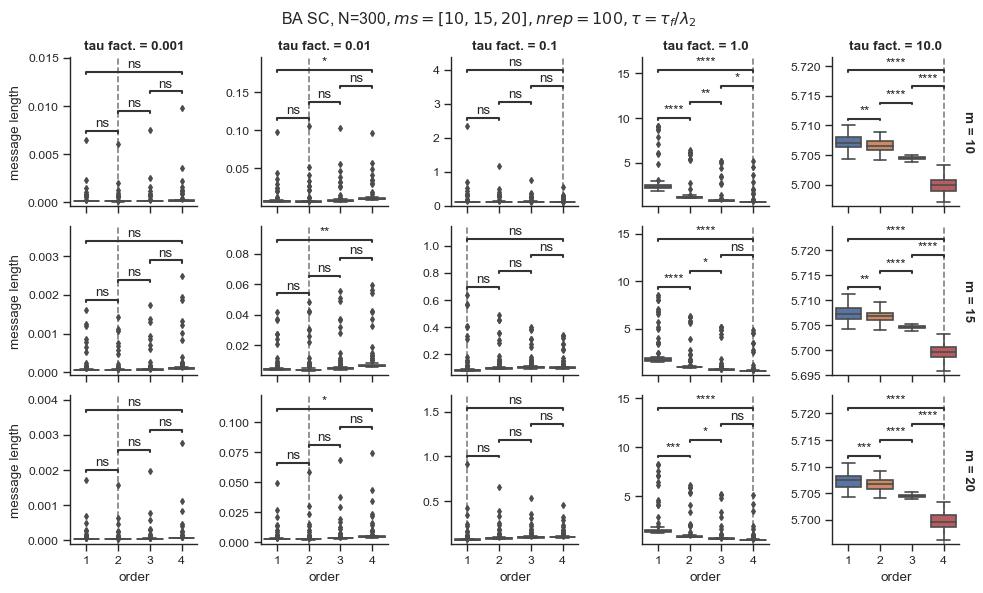

In [13]:
g = sb.catplot(
    kind="box",
    data=df_BASC,
    x="order",
    y="message length",
    row="m",
    col="tau fact.",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau_fact in enumerate(tau_factors):
    for j, m in enumerate(ms):

        ax = g.axes[j, i]
        mask = (df_BASC["tau fact."] == tau_fact) * (df_BASC["m"] == m)

        annotator = Annotator(
            ax,
            pairs,
            data=df_BASC[mask],
            y="message length",
            x="order",
            row="m",
            col="tau fact.",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        annotator.apply_and_annotate()
        
        # plot vertical line at minimum
        order_min = df_BASC[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight='bold')
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
title = rf"BA SC, N={N}$, ms={ms}, nrep={n_rep}, \tau = \tau_f / \lambda_2$"
g.fig.suptitle(title)

fig_name = f"message_length_BASC_N{N}_ms_{ms}_taufact_{list(tau_factors)}_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [49]:
df_BASC.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_BASC_N300_ms_[10, 15, 20]_taufact_[0.001, 0.01, 0.1, 1.0, 10.0]_nreps_100_boxplot'

In [9]:
pd.read_csv(f'{out_dir}message_length_BASC_N300_ms_[10, 15, 20]_taufact_[0.001, 0.01, 0.1, 1.0, 10.0]_nreps_100_boxplot.csv')

,Unnamed: 0,message length,m,rep,tau fact.,order
0,0,0.000138,10,0,0.001,1
1,1,0.000116,10,0,0.001,2
2,2,0.000139,10,0,0.001,3
3,3,0.000205,10,0,0.001,4
4,4,0.007402,10,0,0.010,1
...,...,...,...,...,...,...
5995,5995,0.553274,20,99,1.000,4
5996,5996,5.706198,20,99,10.000,1
5997,5997,5.705797,20,99,10.000,2
5998,5998,5.704331,20,99,10.000,3


## Watts-Strogatz

In [4]:
N = 300
kks = [10, 15, 20]
pp = 0.15

n_rep = 100

rescale = True

Hs = dict()
for kk in kks:
    Hs_i = []
    for i in tqdm(range(n_rep)):
        #print(density * ps)
        G = nx.watts_strogatz_graph(N, kk, pp)
        H = xgi.flag_complex(G, max_order=4)
        #print(H)
        Hs_i.append(H)
    Hs[kk] = Hs_i

#orders = np.array(xgi.unique_edge_sizes(Hs[kks[0]][0])) - 1
#weights = np.ones(len(orders))

100%|█████████████████████████████████████████| 100/100 [28:08<00:00, 16.88s/it]


In [5]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for kk, Hs_i in Hs.items():
    
    info_losses[kk] = dict()
    complexities[kk] = dict()
    orders_arr[kk] = dict()
    message_lengths[kk] = dict()
    
    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []
    
    for i, H0 in enumerate(tqdm(Hs_i)):
        
        info_losses[kk][i] = dict()
        complexities[kk][i] = dict()
        orders_arr[kk][i] = dict()
        message_lengths[kk][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        #tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        #Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
        
        tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1) # 1 / lambda2
        
        tau_factors = np.array([0.01, 0.1, 1, 10])
        taus = tau_factors * tau_c
        
        for j, tau in enumerate(taus):
            
            tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(H0, tau, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

            info_losses[kk][i][tau_factor] = Ds_H
            complexities[kk][i][tau_factor] = lZs_H
            orders_arr[kk][i][tau_factor] = orders
            message_lengths[kk][i][tau_factor] = Ds_H + lZs_H
                  
labels = [f"{i}" for i in kks]

  0%|                                                   | 0/100 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 4.1069928154711773e-13
logm result may be inaccurate, approximate err = 3.6506043111657664e-13
logm result may be inaccurate, approximate err = 4.1069928154711773e-13
logm result may be inaccurate, approximate err = 3.731032443888442e-13
logm result may be inaccurate, approximate err = 4.1069928154711773e-13
logm result may be inaccurate, approximate err = 3.7359876126324e-13
logm result may be inaccurate, approximate err = 4.1069928154711773e-13
logm result may be inaccurate, approximate err = 4.1069928154711773e-13


  1%|▍                                        | 1/100 [00:36<1:00:04, 36.40s/it]

logm result may be inaccurate, approximate err = 3.907301192000089e-13
logm result may be inaccurate, approximate err = 3.4597966098470717e-13
logm result may be inaccurate, approximate err = 3.907301192000089e-13
logm result may be inaccurate, approximate err = 3.9349161531801305e-13
logm result may be inaccurate, approximate err = 3.907301192000089e-13
logm result may be inaccurate, approximate err = 4.184260980340057e-13
logm result may be inaccurate, approximate err = 3.907301192000089e-13
logm result may be inaccurate, approximate err = 3.907301192000089e-13


  2%|▊                                       | 2/100 [09:20<8:48:01, 323.28s/it]

logm result may be inaccurate, approximate err = 3.6595541697487456e-13
logm result may be inaccurate, approximate err = 3.6750098514825586e-13
logm result may be inaccurate, approximate err = 3.6595541697487456e-13
logm result may be inaccurate, approximate err = 3.4936742661902084e-13
logm result may be inaccurate, approximate err = 3.6595541697487456e-13
logm result may be inaccurate, approximate err = 3.545368538158439e-13
logm result may be inaccurate, approximate err = 3.6595541697487456e-13
logm result may be inaccurate, approximate err = 3.6595541697487456e-13


  3%|█▏                                      | 3/100 [09:50<5:06:25, 189.54s/it]

logm result may be inaccurate, approximate err = 3.787884176252498e-13
logm result may be inaccurate, approximate err = 3.2480506636140894e-13
logm result may be inaccurate, approximate err = 3.787884176252498e-13
logm result may be inaccurate, approximate err = 3.3595632732916184e-13
logm result may be inaccurate, approximate err = 3.787884176252498e-13
logm result may be inaccurate, approximate err = 3.607925301138433e-13
logm result may be inaccurate, approximate err = 3.787884176252498e-13
logm result may be inaccurate, approximate err = 3.787884176252498e-13


  4%|█▌                                      | 4/100 [10:20<3:22:23, 126.49s/it]

logm result may be inaccurate, approximate err = 4.1590417889735876e-13
logm result may be inaccurate, approximate err = 3.665274532678193e-13
logm result may be inaccurate, approximate err = 4.1590417889735876e-13
logm result may be inaccurate, approximate err = 3.645203471053465e-13
logm result may be inaccurate, approximate err = 4.1590417889735876e-13
logm result may be inaccurate, approximate err = 3.698531800311991e-13
logm result may be inaccurate, approximate err = 4.1590417889735876e-13
logm result may be inaccurate, approximate err = 4.1590417889735876e-13


  5%|██                                       | 5/100 [10:50<2:24:59, 91.57s/it]

logm result may be inaccurate, approximate err = 4.521364276335268e-13
logm result may be inaccurate, approximate err = 3.4001916880125574e-13
logm result may be inaccurate, approximate err = 4.521364276335268e-13
logm result may be inaccurate, approximate err = 3.309854118902668e-13
logm result may be inaccurate, approximate err = 4.521364276335268e-13
logm result may be inaccurate, approximate err = 3.764383461599123e-13
logm result may be inaccurate, approximate err = 4.521364276335268e-13
logm result may be inaccurate, approximate err = 4.521364276335268e-13


  6%|██▍                                      | 6/100 [11:20<1:50:50, 70.75s/it]

logm result may be inaccurate, approximate err = 4.08945861972124e-13
logm result may be inaccurate, approximate err = 3.46402456397345e-13
logm result may be inaccurate, approximate err = 4.08945861972124e-13
logm result may be inaccurate, approximate err = 3.6909177593070427e-13
logm result may be inaccurate, approximate err = 4.08945861972124e-13
logm result may be inaccurate, approximate err = 4.0104829071573366e-13
logm result may be inaccurate, approximate err = 4.08945861972124e-13
logm result may be inaccurate, approximate err = 4.08945861972124e-13


  7%|██▊                                      | 7/100 [11:51<1:29:26, 57.71s/it]

logm result may be inaccurate, approximate err = 3.806860630045356e-13
logm result may be inaccurate, approximate err = 3.615362184723453e-13
logm result may be inaccurate, approximate err = 3.806860630045356e-13
logm result may be inaccurate, approximate err = 3.712721280402621e-13
logm result may be inaccurate, approximate err = 3.806860630045356e-13
logm result may be inaccurate, approximate err = 3.5810046750399607e-13
logm result may be inaccurate, approximate err = 3.806860630045356e-13
logm result may be inaccurate, approximate err = 3.806860630045356e-13


  8%|███▎                                     | 8/100 [12:22<1:15:14, 49.07s/it]

logm result may be inaccurate, approximate err = 3.74610610398427e-13
logm result may be inaccurate, approximate err = 4.194000744628285e-13
logm result may be inaccurate, approximate err = 3.74610610398427e-13
logm result may be inaccurate, approximate err = 3.4518294990120825e-13
logm result may be inaccurate, approximate err = 3.74610610398427e-13
logm result may be inaccurate, approximate err = 3.7104488822390935e-13
logm result may be inaccurate, approximate err = 3.74610610398427e-13
logm result may be inaccurate, approximate err = 3.74610610398427e-13


  9%|███▋                                     | 9/100 [12:55<1:06:48, 44.05s/it]

logm result may be inaccurate, approximate err = 3.679255099843514e-13
logm result may be inaccurate, approximate err = 3.6432795123307527e-13
logm result may be inaccurate, approximate err = 3.679255099843514e-13
logm result may be inaccurate, approximate err = 3.9697468449132016e-13
logm result may be inaccurate, approximate err = 3.679255099843514e-13
logm result may be inaccurate, approximate err = 3.7390145033356283e-13
logm result may be inaccurate, approximate err = 3.679255099843514e-13
logm result may be inaccurate, approximate err = 3.679255099843514e-13


 10%|████                                    | 10/100 [13:27<1:00:26, 40.30s/it]

logm result may be inaccurate, approximate err = 4.1649246548745596e-13
logm result may be inaccurate, approximate err = 3.524298747993908e-13
logm result may be inaccurate, approximate err = 4.1649246548745596e-13
logm result may be inaccurate, approximate err = 3.6646081314779077e-13
logm result may be inaccurate, approximate err = 4.1649246548745596e-13
logm result may be inaccurate, approximate err = 3.576367082110082e-13
logm result may be inaccurate, approximate err = 4.1649246548745596e-13
logm result may be inaccurate, approximate err = 4.1649246548745596e-13


 11%|████▌                                     | 11/100 [13:57<55:20, 37.31s/it]

logm result may be inaccurate, approximate err = 3.9473328879404753e-13
logm result may be inaccurate, approximate err = 3.727043256896224e-13
logm result may be inaccurate, approximate err = 3.9473328879404753e-13
logm result may be inaccurate, approximate err = 3.665279897849553e-13
logm result may be inaccurate, approximate err = 3.9473328879404753e-13
logm result may be inaccurate, approximate err = 3.70360676356001e-13
logm result may be inaccurate, approximate err = 3.9473328879404753e-13
logm result may be inaccurate, approximate err = 3.9473328879404753e-13


 12%|█████                                     | 12/100 [14:28<51:44, 35.28s/it]

logm result may be inaccurate, approximate err = 3.950885230921391e-13
logm result may be inaccurate, approximate err = 3.5551861789096273e-13
logm result may be inaccurate, approximate err = 3.950885230921391e-13
logm result may be inaccurate, approximate err = 3.383013028506986e-13
logm result may be inaccurate, approximate err = 3.950885230921391e-13
logm result may be inaccurate, approximate err = 4.0562149561545227e-13
logm result may be inaccurate, approximate err = 3.950885230921391e-13
logm result may be inaccurate, approximate err = 3.950885230921391e-13


 13%|█████▍                                    | 13/100 [14:58<49:05, 33.86s/it]

logm result may be inaccurate, approximate err = 3.7687462389684745e-13
logm result may be inaccurate, approximate err = 3.6027073571693536e-13
logm result may be inaccurate, approximate err = 3.7687462389684745e-13
logm result may be inaccurate, approximate err = 3.4794330124680096e-13
logm result may be inaccurate, approximate err = 3.7687462389684745e-13
logm result may be inaccurate, approximate err = 3.596935034925344e-13
logm result may be inaccurate, approximate err = 3.7687462389684745e-13
logm result may be inaccurate, approximate err = 3.7687462389684745e-13


 14%|█████▉                                    | 14/100 [15:28<46:51, 32.69s/it]

logm result may be inaccurate, approximate err = 3.6453938283134434e-13
logm result may be inaccurate, approximate err = 3.589064465638047e-13
logm result may be inaccurate, approximate err = 3.6453938283134434e-13
logm result may be inaccurate, approximate err = 3.7358155866323476e-13
logm result may be inaccurate, approximate err = 3.6453938283134434e-13
logm result may be inaccurate, approximate err = 3.6947445144698323e-13
logm result may be inaccurate, approximate err = 3.6453938283134434e-13
logm result may be inaccurate, approximate err = 3.6453938283134434e-13


 15%|██████▎                                   | 15/100 [15:59<45:31, 32.13s/it]

logm result may be inaccurate, approximate err = 3.86592268613643e-13
logm result may be inaccurate, approximate err = 3.452800813250737e-13
logm result may be inaccurate, approximate err = 3.86592268613643e-13
logm result may be inaccurate, approximate err = 3.6101977026728767e-13
logm result may be inaccurate, approximate err = 3.86592268613643e-13
logm result may be inaccurate, approximate err = 3.666328470533859e-13
logm result may be inaccurate, approximate err = 3.86592268613643e-13
logm result may be inaccurate, approximate err = 3.86592268613643e-13


 16%|██████▋                                   | 16/100 [16:30<44:30, 31.79s/it]

logm result may be inaccurate, approximate err = 4.2392112223107093e-13
logm result may be inaccurate, approximate err = 3.9653505787020127e-13
logm result may be inaccurate, approximate err = 4.2392112223107093e-13
logm result may be inaccurate, approximate err = 3.8153239947291486e-13
logm result may be inaccurate, approximate err = 4.2392112223107093e-13
logm result may be inaccurate, approximate err = 3.6917281051160986e-13
logm result may be inaccurate, approximate err = 4.2392112223107093e-13
logm result may be inaccurate, approximate err = 4.2392112223107093e-13


 17%|███████▏                                  | 17/100 [17:01<43:47, 31.65s/it]

logm result may be inaccurate, approximate err = 4.221042654638616e-13
logm result may be inaccurate, approximate err = 3.727733109004232e-13
logm result may be inaccurate, approximate err = 4.221042654638616e-13
logm result may be inaccurate, approximate err = 3.543507429033446e-13
logm result may be inaccurate, approximate err = 4.221042654638616e-13
logm result may be inaccurate, approximate err = 3.9529339652451076e-13
logm result may be inaccurate, approximate err = 4.221042654638616e-13
logm result may be inaccurate, approximate err = 4.221042654638616e-13


 18%|███████▌                                  | 18/100 [17:34<43:30, 31.83s/it]

logm result may be inaccurate, approximate err = 3.9562251274859935e-13
logm result may be inaccurate, approximate err = 3.6437786046248783e-13
logm result may be inaccurate, approximate err = 3.9562251274859935e-13
logm result may be inaccurate, approximate err = 4.2030175204157206e-13
logm result may be inaccurate, approximate err = 3.9562251274859935e-13
logm result may be inaccurate, approximate err = 3.6945711327492184e-13
logm result may be inaccurate, approximate err = 3.9562251274859935e-13
logm result may be inaccurate, approximate err = 3.9562251274859935e-13


 19%|███████▉                                  | 19/100 [18:07<43:23, 32.14s/it]

logm result may be inaccurate, approximate err = 3.77279666850874e-13
logm result may be inaccurate, approximate err = 3.6141240406347583e-13
logm result may be inaccurate, approximate err = 3.77279666850874e-13
logm result may be inaccurate, approximate err = 3.582566530889992e-13
logm result may be inaccurate, approximate err = 3.77279666850874e-13
logm result may be inaccurate, approximate err = 3.553142699505751e-13
logm result may be inaccurate, approximate err = 3.77279666850874e-13
logm result may be inaccurate, approximate err = 3.77279666850874e-13


 20%|████████▍                                 | 20/100 [18:41<43:35, 32.70s/it]

logm result may be inaccurate, approximate err = 4.1971733646948526e-13
logm result may be inaccurate, approximate err = 3.492934445018389e-13
logm result may be inaccurate, approximate err = 4.1971733646948526e-13
logm result may be inaccurate, approximate err = 3.441313742816304e-13
logm result may be inaccurate, approximate err = 4.1971733646948526e-13
logm result may be inaccurate, approximate err = 3.9028266671810606e-13
logm result may be inaccurate, approximate err = 4.1971733646948526e-13
logm result may be inaccurate, approximate err = 4.1971733646948526e-13


 21%|████████▊                                 | 21/100 [19:15<43:48, 33.27s/it]

logm result may be inaccurate, approximate err = 4.011012843990312e-13
logm result may be inaccurate, approximate err = 3.2830869209398224e-13
logm result may be inaccurate, approximate err = 4.011012843990312e-13
logm result may be inaccurate, approximate err = 3.334959643606037e-13
logm result may be inaccurate, approximate err = 4.011012843990312e-13
logm result may be inaccurate, approximate err = 3.6040696546052933e-13
logm result may be inaccurate, approximate err = 4.011012843990312e-13
logm result may be inaccurate, approximate err = 4.011012843990312e-13


 22%|█████████▏                                | 22/100 [19:49<43:39, 33.58s/it]

logm result may be inaccurate, approximate err = 3.6923028774458883e-13
logm result may be inaccurate, approximate err = 3.3628909982309297e-13
logm result may be inaccurate, approximate err = 3.6923028774458883e-13
logm result may be inaccurate, approximate err = 3.6433628156973263e-13
logm result may be inaccurate, approximate err = 3.6923028774458883e-13
logm result may be inaccurate, approximate err = 3.541911940152247e-13
logm result may be inaccurate, approximate err = 3.6923028774458883e-13
logm result may be inaccurate, approximate err = 3.6923028774458883e-13


 23%|█████████▋                                | 23/100 [20:26<44:08, 34.40s/it]

logm result may be inaccurate, approximate err = 3.722174689151649e-13
logm result may be inaccurate, approximate err = 3.7391474130965763e-13
logm result may be inaccurate, approximate err = 3.722174689151649e-13
logm result may be inaccurate, approximate err = 3.503583013021442e-13
logm result may be inaccurate, approximate err = 3.722174689151649e-13
logm result may be inaccurate, approximate err = 3.7315133431893256e-13
logm result may be inaccurate, approximate err = 3.722174689151649e-13
logm result may be inaccurate, approximate err = 3.722174689151649e-13


 24%|██████████                                | 24/100 [21:01<43:51, 34.63s/it]

logm result may be inaccurate, approximate err = 3.836201705393251e-13
logm result may be inaccurate, approximate err = 3.2838434434854236e-13
logm result may be inaccurate, approximate err = 3.836201705393251e-13
logm result may be inaccurate, approximate err = 3.505940074425125e-13
logm result may be inaccurate, approximate err = 3.836201705393251e-13
logm result may be inaccurate, approximate err = 3.5021677276417443e-13
logm result may be inaccurate, approximate err = 3.836201705393251e-13
logm result may be inaccurate, approximate err = 3.836201705393251e-13


 25%|██████████▌                               | 25/100 [21:38<44:06, 35.29s/it]

logm result may be inaccurate, approximate err = 3.770671855987115e-13
logm result may be inaccurate, approximate err = 3.3588561912494313e-13
logm result may be inaccurate, approximate err = 3.770671855987115e-13
logm result may be inaccurate, approximate err = 3.522759711235923e-13
logm result may be inaccurate, approximate err = 3.770671855987115e-13
logm result may be inaccurate, approximate err = 4.0283831453416083e-13
logm result may be inaccurate, approximate err = 3.770671855987115e-13
logm result may be inaccurate, approximate err = 3.770671855987115e-13


 26%|██████████▉                               | 26/100 [22:15<44:23, 35.99s/it]

logm result may be inaccurate, approximate err = 4.0249865196042323e-13
logm result may be inaccurate, approximate err = 3.3777996322904877e-13
logm result may be inaccurate, approximate err = 4.0249865196042323e-13
logm result may be inaccurate, approximate err = 3.870081319745874e-13
logm result may be inaccurate, approximate err = 4.0249865196042323e-13
logm result may be inaccurate, approximate err = 3.5242008188991884e-13
logm result may be inaccurate, approximate err = 4.0249865196042323e-13
logm result may be inaccurate, approximate err = 4.0249865196042323e-13


 27%|███████████▎                              | 27/100 [22:54<44:42, 36.74s/it]

logm result may be inaccurate, approximate err = 3.848631951334521e-13
logm result may be inaccurate, approximate err = 3.783990401933281e-13
logm result may be inaccurate, approximate err = 3.848631951334521e-13
logm result may be inaccurate, approximate err = 3.489328996098497e-13
logm result may be inaccurate, approximate err = 3.848631951334521e-13
logm result may be inaccurate, approximate err = 3.7644199630286097e-13
logm result may be inaccurate, approximate err = 3.848631951334521e-13
logm result may be inaccurate, approximate err = 3.848631951334521e-13


 28%|███████████▊                              | 28/100 [23:32<44:27, 37.05s/it]

logm result may be inaccurate, approximate err = 3.992874961929579e-13
logm result may be inaccurate, approximate err = 3.3949318744903183e-13
logm result may be inaccurate, approximate err = 3.992874961929579e-13
logm result may be inaccurate, approximate err = 3.3336186530583493e-13
logm result may be inaccurate, approximate err = 3.992874961929579e-13
logm result may be inaccurate, approximate err = 3.5462052595782346e-13
logm result may be inaccurate, approximate err = 3.992874961929579e-13
logm result may be inaccurate, approximate err = 3.992874961929579e-13


 29%|████████████▏                             | 29/100 [24:19<47:29, 40.14s/it]

logm result may be inaccurate, approximate err = 3.887435236010909e-13
logm result may be inaccurate, approximate err = 3.5931442948247376e-13
logm result may be inaccurate, approximate err = 3.887435236010909e-13
logm result may be inaccurate, approximate err = 3.515297421278313e-13
logm result may be inaccurate, approximate err = 3.887435236010909e-13
logm result may be inaccurate, approximate err = 3.8090000436993017e-13
logm result may be inaccurate, approximate err = 3.887435236010909e-13
logm result may be inaccurate, approximate err = 3.887435236010909e-13


 30%|████████████▌                             | 30/100 [25:19<53:54, 46.20s/it]

logm result may be inaccurate, approximate err = 4.1456743020440004e-13
logm result may be inaccurate, approximate err = 3.728794097743935e-13
logm result may be inaccurate, approximate err = 4.1456743020440004e-13
logm result may be inaccurate, approximate err = 3.706379651538572e-13
logm result may be inaccurate, approximate err = 4.1456743020440004e-13
logm result may be inaccurate, approximate err = 3.655447974809648e-13
logm result may be inaccurate, approximate err = 4.1456743020440004e-13
logm result may be inaccurate, approximate err = 4.1456743020440004e-13


 31%|█████████████                             | 31/100 [26:20<58:00, 50.44s/it]

logm result may be inaccurate, approximate err = 3.8169401102347837e-13
logm result may be inaccurate, approximate err = 3.681526695345994e-13
logm result may be inaccurate, approximate err = 3.8169401102347837e-13
logm result may be inaccurate, approximate err = 3.802808090509022e-13
logm result may be inaccurate, approximate err = 3.8169401102347837e-13
logm result may be inaccurate, approximate err = 3.6916536761858594e-13
logm result may be inaccurate, approximate err = 3.8169401102347837e-13
logm result may be inaccurate, approximate err = 3.8169401102347837e-13


 32%|████████████▊                           | 32/100 [27:21<1:00:58, 53.81s/it]

logm result may be inaccurate, approximate err = 3.6849262697585527e-13
logm result may be inaccurate, approximate err = 3.686885311595451e-13
logm result may be inaccurate, approximate err = 3.6849262697585527e-13
logm result may be inaccurate, approximate err = 3.399841289172158e-13
logm result may be inaccurate, approximate err = 3.6849262697585527e-13
logm result may be inaccurate, approximate err = 3.434329814458434e-13
logm result may be inaccurate, approximate err = 3.6849262697585527e-13
logm result may be inaccurate, approximate err = 3.6849262697585527e-13


 33%|█████████████▏                          | 33/100 [28:24<1:03:08, 56.55s/it]

logm result may be inaccurate, approximate err = 5.325029109734735e-13
logm result may be inaccurate, approximate err = 3.5283582108079256e-13
logm result may be inaccurate, approximate err = 5.325029109734735e-13
logm result may be inaccurate, approximate err = 3.409533700942741e-13
logm result may be inaccurate, approximate err = 5.325029109734735e-13
logm result may be inaccurate, approximate err = 3.7205357771358666e-13
logm result may be inaccurate, approximate err = 5.325029109734735e-13
logm result may be inaccurate, approximate err = 5.325029109734735e-13


 34%|█████████████▌                          | 34/100 [29:26<1:03:55, 58.12s/it]

logm result may be inaccurate, approximate err = 3.9861397249321247e-13
logm result may be inaccurate, approximate err = 3.579064108740283e-13
logm result may be inaccurate, approximate err = 3.9861397249321247e-13
logm result may be inaccurate, approximate err = 3.728976746290761e-13
logm result may be inaccurate, approximate err = 3.9861397249321247e-13
logm result may be inaccurate, approximate err = 3.9545077006704666e-13
logm result may be inaccurate, approximate err = 3.9861397249321247e-13
logm result may be inaccurate, approximate err = 3.9861397249321247e-13


 35%|██████████████                          | 35/100 [30:25<1:03:05, 58.24s/it]

logm result may be inaccurate, approximate err = 4.0247241858774894e-13
logm result may be inaccurate, approximate err = 3.3738891861346726e-13
logm result may be inaccurate, approximate err = 4.0247241858774894e-13
logm result may be inaccurate, approximate err = 3.5697617472566934e-13
logm result may be inaccurate, approximate err = 4.0247241858774894e-13
logm result may be inaccurate, approximate err = 3.741009090013853e-13
logm result may be inaccurate, approximate err = 4.0247241858774894e-13
logm result may be inaccurate, approximate err = 4.0247241858774894e-13


 36%|██████████████▍                         | 36/100 [31:26<1:03:12, 59.26s/it]

logm result may be inaccurate, approximate err = 4.315736911089931e-13
logm result may be inaccurate, approximate err = 3.5900723537236e-13
logm result may be inaccurate, approximate err = 4.315736911089931e-13
logm result may be inaccurate, approximate err = 3.8525808037815655e-13
logm result may be inaccurate, approximate err = 4.315736911089931e-13
logm result may be inaccurate, approximate err = 4.0102772887743866e-13
logm result may be inaccurate, approximate err = 4.315736911089931e-13
logm result may be inaccurate, approximate err = 4.315736911089931e-13


 37%|██████████████▊                         | 37/100 [32:32<1:04:18, 61.25s/it]

logm result may be inaccurate, approximate err = 4.1507014875348663e-13
logm result may be inaccurate, approximate err = 3.629187372688417e-13
logm result may be inaccurate, approximate err = 4.1507014875348663e-13
logm result may be inaccurate, approximate err = 3.6264270040998295e-13
logm result may be inaccurate, approximate err = 4.1507014875348663e-13
logm result may be inaccurate, approximate err = 3.7286360778508354e-13
logm result may be inaccurate, approximate err = 4.1507014875348663e-13
logm result may be inaccurate, approximate err = 4.1507014875348663e-13


 38%|███████████████▏                        | 38/100 [33:42<1:06:02, 63.91s/it]

logm result may be inaccurate, approximate err = 4.936164796577188e-13
logm result may be inaccurate, approximate err = 3.2344205661802207e-13
logm result may be inaccurate, approximate err = 4.936164796577188e-13
logm result may be inaccurate, approximate err = 3.445002993469094e-13
logm result may be inaccurate, approximate err = 4.936164796577188e-13
logm result may be inaccurate, approximate err = 3.515196156710499e-13
logm result may be inaccurate, approximate err = 4.936164796577188e-13
logm result may be inaccurate, approximate err = 4.936164796577188e-13


 39%|███████████████▌                        | 39/100 [34:53<1:07:08, 66.04s/it]

logm result may be inaccurate, approximate err = 3.8526707964275764e-13
logm result may be inaccurate, approximate err = 3.5743349990417e-13
logm result may be inaccurate, approximate err = 3.8526707964275764e-13
logm result may be inaccurate, approximate err = 3.487782286407834e-13
logm result may be inaccurate, approximate err = 3.8526707964275764e-13
logm result may be inaccurate, approximate err = 3.579651891494428e-13
logm result may be inaccurate, approximate err = 3.8526707964275764e-13
logm result may be inaccurate, approximate err = 3.8526707964275764e-13


 40%|████████████████                        | 40/100 [36:05<1:07:47, 67.78s/it]

logm result may be inaccurate, approximate err = 4.026273685763949e-13
logm result may be inaccurate, approximate err = 3.537855844415925e-13
logm result may be inaccurate, approximate err = 4.026273685763949e-13
logm result may be inaccurate, approximate err = 4.0227789006479695e-13
logm result may be inaccurate, approximate err = 4.026273685763949e-13
logm result may be inaccurate, approximate err = 3.7585205822497624e-13
logm result may be inaccurate, approximate err = 4.026273685763949e-13
logm result may be inaccurate, approximate err = 4.026273685763949e-13


 41%|████████████████▍                       | 41/100 [37:18<1:08:05, 69.24s/it]

logm result may be inaccurate, approximate err = 3.885165117377829e-13
logm result may be inaccurate, approximate err = 3.815655920114993e-13
logm result may be inaccurate, approximate err = 3.885165117377829e-13
logm result may be inaccurate, approximate err = 3.4322859809753017e-13
logm result may be inaccurate, approximate err = 3.885165117377829e-13
logm result may be inaccurate, approximate err = 3.72157055243052e-13
logm result may be inaccurate, approximate err = 3.885165117377829e-13
logm result may be inaccurate, approximate err = 3.885165117377829e-13


 42%|████████████████▊                       | 42/100 [38:21<1:05:06, 67.35s/it]

logm result may be inaccurate, approximate err = 3.473670812998444e-13
logm result may be inaccurate, approximate err = 3.5339650761586345e-13
logm result may be inaccurate, approximate err = 3.473670812998444e-13
logm result may be inaccurate, approximate err = 3.687217083214417e-13
logm result may be inaccurate, approximate err = 3.473670812998444e-13
logm result may be inaccurate, approximate err = 3.778144966032708e-13
logm result may be inaccurate, approximate err = 3.473670812998444e-13
logm result may be inaccurate, approximate err = 3.473670812998444e-13


 43%|█████████████████▏                      | 43/100 [39:14<1:00:06, 63.27s/it]

logm result may be inaccurate, approximate err = 3.6806093914484086e-13
logm result may be inaccurate, approximate err = 3.6225243971796803e-13
logm result may be inaccurate, approximate err = 3.6806093914484086e-13
logm result may be inaccurate, approximate err = 3.5050017804685357e-13
logm result may be inaccurate, approximate err = 3.6806093914484086e-13
logm result may be inaccurate, approximate err = 3.7603122307355554e-13
logm result may be inaccurate, approximate err = 3.6806093914484086e-13
logm result may be inaccurate, approximate err = 3.6806093914484086e-13


 44%|██████████████████▍                       | 44/100 [40:01<54:28, 58.37s/it]

logm result may be inaccurate, approximate err = 4.3536031704755487e-13
logm result may be inaccurate, approximate err = 3.537344945238406e-13
logm result may be inaccurate, approximate err = 4.3536031704755487e-13
logm result may be inaccurate, approximate err = 4.1164882911386913e-13
logm result may be inaccurate, approximate err = 4.3536031704755487e-13
logm result may be inaccurate, approximate err = 4.3387395376847024e-13
logm result may be inaccurate, approximate err = 4.3536031704755487e-13
logm result may be inaccurate, approximate err = 4.3536031704755487e-13


 45%|██████████████████▉                       | 45/100 [40:59<53:09, 57.99s/it]

logm result may be inaccurate, approximate err = 3.836825798873264e-13
logm result may be inaccurate, approximate err = 3.5766429595272777e-13
logm result may be inaccurate, approximate err = 3.836825798873264e-13
logm result may be inaccurate, approximate err = 3.665562262754896e-13
logm result may be inaccurate, approximate err = 3.836825798873264e-13
logm result may be inaccurate, approximate err = 3.7870899888353684e-13
logm result may be inaccurate, approximate err = 3.836825798873264e-13
logm result may be inaccurate, approximate err = 3.836825798873264e-13


 46%|███████████████████▎                      | 46/100 [41:48<49:57, 55.50s/it]

logm result may be inaccurate, approximate err = 3.7380694469388886e-13
logm result may be inaccurate, approximate err = 3.901579421415128e-13
logm result may be inaccurate, approximate err = 3.7380694469388886e-13
logm result may be inaccurate, approximate err = 4.189901067602939e-13
logm result may be inaccurate, approximate err = 3.7380694469388886e-13
logm result may be inaccurate, approximate err = 3.4179812063629703e-13
logm result may be inaccurate, approximate err = 3.7380694469388886e-13
logm result may be inaccurate, approximate err = 3.7380694469388886e-13


 47%|███████████████████▋                      | 47/100 [42:51<50:51, 57.58s/it]

logm result may be inaccurate, approximate err = 3.574921452308533e-13
logm result may be inaccurate, approximate err = 3.324878840400627e-13
logm result may be inaccurate, approximate err = 3.574921452308533e-13
logm result may be inaccurate, approximate err = 3.2923016143971863e-13
logm result may be inaccurate, approximate err = 3.574921452308533e-13
logm result may be inaccurate, approximate err = 3.5676213404017573e-13
logm result may be inaccurate, approximate err = 3.574921452308533e-13
logm result may be inaccurate, approximate err = 3.574921452308533e-13


 48%|████████████████████▏                     | 48/100 [43:53<51:09, 59.03s/it]

logm result may be inaccurate, approximate err = 3.599840585955836e-13
logm result may be inaccurate, approximate err = 3.7322085009713514e-13
logm result may be inaccurate, approximate err = 3.599840585955836e-13
logm result may be inaccurate, approximate err = 4.1481080072107636e-13
logm result may be inaccurate, approximate err = 3.599840585955836e-13
logm result may be inaccurate, approximate err = 3.65900682380679e-13
logm result may be inaccurate, approximate err = 3.599840585955836e-13
logm result may be inaccurate, approximate err = 3.599840585955836e-13


 49%|████████████████████▌                     | 49/100 [44:45<48:14, 56.76s/it]

logm result may be inaccurate, approximate err = 4.0689165015935317e-13
logm result may be inaccurate, approximate err = 3.63390302422429e-13
logm result may be inaccurate, approximate err = 4.0689165015935317e-13
logm result may be inaccurate, approximate err = 3.9979571466350354e-13
logm result may be inaccurate, approximate err = 4.0689165015935317e-13
logm result may be inaccurate, approximate err = 3.6435452567470195e-13
logm result may be inaccurate, approximate err = 4.0689165015935317e-13
logm result may be inaccurate, approximate err = 4.0689165015935317e-13


 50%|█████████████████████                     | 50/100 [45:33<45:16, 54.32s/it]

logm result may be inaccurate, approximate err = 3.8821609018107856e-13
logm result may be inaccurate, approximate err = 3.80735104517389e-13
logm result may be inaccurate, approximate err = 3.8821609018107856e-13
logm result may be inaccurate, approximate err = 3.587493232373639e-13
logm result may be inaccurate, approximate err = 3.8821609018107856e-13
logm result may be inaccurate, approximate err = 3.9828604578161087e-13
logm result may be inaccurate, approximate err = 3.8821609018107856e-13
logm result may be inaccurate, approximate err = 3.8821609018107856e-13


 51%|█████████████████████▍                    | 51/100 [46:28<44:27, 54.44s/it]

logm result may be inaccurate, approximate err = 3.509720157945255e-13
logm result may be inaccurate, approximate err = 3.3066120556437144e-13
logm result may be inaccurate, approximate err = 3.509720157945255e-13
logm result may be inaccurate, approximate err = 3.3818689627548255e-13
logm result may be inaccurate, approximate err = 3.509720157945255e-13
logm result may be inaccurate, approximate err = 3.2553617196052247e-13
logm result may be inaccurate, approximate err = 3.509720157945255e-13
logm result may be inaccurate, approximate err = 3.509720157945255e-13


 52%|█████████████████████▊                    | 52/100 [47:28<45:00, 56.25s/it]

logm result may be inaccurate, approximate err = 3.4495648424656604e-13
logm result may be inaccurate, approximate err = 3.513179907846909e-13
logm result may be inaccurate, approximate err = 3.4495648424656604e-13
logm result may be inaccurate, approximate err = 3.1705918490746914e-13
logm result may be inaccurate, approximate err = 3.4495648424656604e-13
logm result may be inaccurate, approximate err = 3.732311650967676e-13
logm result may be inaccurate, approximate err = 3.4495648424656604e-13
logm result may be inaccurate, approximate err = 3.4495648424656604e-13


 53%|██████████████████████▎                   | 53/100 [48:22<43:25, 55.43s/it]

logm result may be inaccurate, approximate err = 3.6635718340093804e-13
logm result may be inaccurate, approximate err = 3.320778356881951e-13
logm result may be inaccurate, approximate err = 3.6635718340093804e-13
logm result may be inaccurate, approximate err = 3.3201109460739395e-13
logm result may be inaccurate, approximate err = 3.6635718340093804e-13
logm result may be inaccurate, approximate err = 3.5761246320003606e-13
logm result may be inaccurate, approximate err = 3.6635718340093804e-13
logm result may be inaccurate, approximate err = 3.6635718340093804e-13


 54%|██████████████████████▋                   | 54/100 [49:18<42:36, 55.57s/it]

logm result may be inaccurate, approximate err = 3.827064909719551e-13
logm result may be inaccurate, approximate err = 3.6442631268199865e-13
logm result may be inaccurate, approximate err = 3.827064909719551e-13
logm result may be inaccurate, approximate err = 3.623381118853741e-13
logm result may be inaccurate, approximate err = 3.827064909719551e-13
logm result may be inaccurate, approximate err = 3.43522307432242e-13
logm result may be inaccurate, approximate err = 3.827064909719551e-13
logm result may be inaccurate, approximate err = 3.827064909719551e-13


 55%|███████████████████████                   | 55/100 [50:10<40:57, 54.61s/it]

logm result may be inaccurate, approximate err = 3.9956385503594905e-13
logm result may be inaccurate, approximate err = 3.874162837486629e-13
logm result may be inaccurate, approximate err = 3.9956385503594905e-13
logm result may be inaccurate, approximate err = 3.688579651587421e-13
logm result may be inaccurate, approximate err = 3.9956385503594905e-13
logm result may be inaccurate, approximate err = 3.9676793761261067e-13
logm result may be inaccurate, approximate err = 3.9956385503594905e-13
logm result may be inaccurate, approximate err = 3.9956385503594905e-13


 56%|███████████████████████▌                  | 56/100 [50:48<36:22, 49.60s/it]

logm result may be inaccurate, approximate err = 4.829860156899668e-13
logm result may be inaccurate, approximate err = 3.6594383949977173e-13
logm result may be inaccurate, approximate err = 4.829860156899668e-13
logm result may be inaccurate, approximate err = 3.6650507198064764e-13
logm result may be inaccurate, approximate err = 4.829860156899668e-13
logm result may be inaccurate, approximate err = 4.159372907980609e-13
logm result may be inaccurate, approximate err = 4.829860156899668e-13
logm result may be inaccurate, approximate err = 4.829860156899668e-13


 57%|███████████████████████▉                  | 57/100 [51:18<31:23, 43.80s/it]

logm result may be inaccurate, approximate err = 4.2557297967803683e-13
logm result may be inaccurate, approximate err = 3.638030849151089e-13
logm result may be inaccurate, approximate err = 4.2557297967803683e-13
logm result may be inaccurate, approximate err = 3.931978506309043e-13
logm result may be inaccurate, approximate err = 4.2557297967803683e-13
logm result may be inaccurate, approximate err = 3.7134589227663404e-13
logm result may be inaccurate, approximate err = 4.2557297967803683e-13
logm result may be inaccurate, approximate err = 4.2557297967803683e-13


 58%|████████████████████████▎                 | 58/100 [51:51<28:18, 40.44s/it]

logm result may be inaccurate, approximate err = 4.133329847559668e-13
logm result may be inaccurate, approximate err = 3.4698965137253964e-13
logm result may be inaccurate, approximate err = 4.133329847559668e-13
logm result may be inaccurate, approximate err = 3.596145278762015e-13
logm result may be inaccurate, approximate err = 4.133329847559668e-13
logm result may be inaccurate, approximate err = 3.5139487182978266e-13
logm result may be inaccurate, approximate err = 4.133329847559668e-13
logm result may be inaccurate, approximate err = 4.133329847559668e-13


 59%|████████████████████████▊                 | 59/100 [52:21<25:31, 37.35s/it]

logm result may be inaccurate, approximate err = 4.0910528109083166e-13
logm result may be inaccurate, approximate err = 3.513994973586325e-13
logm result may be inaccurate, approximate err = 4.0910528109083166e-13
logm result may be inaccurate, approximate err = 3.6966104669020784e-13
logm result may be inaccurate, approximate err = 4.0910528109083166e-13
logm result may be inaccurate, approximate err = 3.8296113334164797e-13
logm result may be inaccurate, approximate err = 4.0910528109083166e-13
logm result may be inaccurate, approximate err = 4.0910528109083166e-13


 60%|█████████████████████████▏                | 60/100 [52:52<23:38, 35.46s/it]

logm result may be inaccurate, approximate err = 4.2308904731608055e-13
logm result may be inaccurate, approximate err = 3.7025675516835707e-13
logm result may be inaccurate, approximate err = 4.2308904731608055e-13
logm result may be inaccurate, approximate err = 3.781768343578215e-13
logm result may be inaccurate, approximate err = 4.2308904731608055e-13
logm result may be inaccurate, approximate err = 3.9796578723485924e-13
logm result may be inaccurate, approximate err = 4.2308904731608055e-13
logm result may be inaccurate, approximate err = 4.2308904731608055e-13


 61%|█████████████████████████▌                | 61/100 [53:22<22:03, 33.92s/it]

logm result may be inaccurate, approximate err = 4.2559733234614285e-13
logm result may be inaccurate, approximate err = 3.4668284745121336e-13
logm result may be inaccurate, approximate err = 4.2559733234614285e-13
logm result may be inaccurate, approximate err = 3.6233625536422225e-13
logm result may be inaccurate, approximate err = 4.2559733234614285e-13
logm result may be inaccurate, approximate err = 4.158176197686989e-13
logm result may be inaccurate, approximate err = 4.2559733234614285e-13
logm result may be inaccurate, approximate err = 4.2559733234614285e-13


 62%|██████████████████████████                | 62/100 [53:53<20:51, 32.93s/it]

logm result may be inaccurate, approximate err = 3.6004772120389693e-13
logm result may be inaccurate, approximate err = 3.5287137759581507e-13
logm result may be inaccurate, approximate err = 3.6004772120389693e-13
logm result may be inaccurate, approximate err = 3.6499319942132327e-13
logm result may be inaccurate, approximate err = 3.6004772120389693e-13
logm result may be inaccurate, approximate err = 4.0015556188326586e-13
logm result may be inaccurate, approximate err = 3.6004772120389693e-13
logm result may be inaccurate, approximate err = 3.6004772120389693e-13


 63%|██████████████████████████▍               | 63/100 [54:24<19:54, 32.28s/it]

logm result may be inaccurate, approximate err = 4.3726506681297145e-13
logm result may be inaccurate, approximate err = 4.2854998735981285e-13
logm result may be inaccurate, approximate err = 4.3726506681297145e-13
logm result may be inaccurate, approximate err = 3.5752759318265004e-13
logm result may be inaccurate, approximate err = 4.3726506681297145e-13
logm result may be inaccurate, approximate err = 3.5688493185358553e-13
logm result may be inaccurate, approximate err = 4.3726506681297145e-13
logm result may be inaccurate, approximate err = 4.3726506681297145e-13


 64%|██████████████████████████▉               | 64/100 [54:54<18:56, 31.58s/it]

logm result may be inaccurate, approximate err = 4.029210984863394e-13
logm result may be inaccurate, approximate err = 3.387901743823477e-13
logm result may be inaccurate, approximate err = 4.029210984863394e-13
logm result may be inaccurate, approximate err = 3.5749037302332014e-13
logm result may be inaccurate, approximate err = 4.029210984863394e-13
logm result may be inaccurate, approximate err = 3.5623872038192746e-13
logm result may be inaccurate, approximate err = 4.029210984863394e-13
logm result may be inaccurate, approximate err = 4.029210984863394e-13


 65%|███████████████████████████▎              | 65/100 [55:23<18:05, 31.02s/it]

logm result may be inaccurate, approximate err = 4.214669990064064e-13
logm result may be inaccurate, approximate err = 3.609718324791899e-13
logm result may be inaccurate, approximate err = 4.214669990064064e-13
logm result may be inaccurate, approximate err = 3.656796032180044e-13
logm result may be inaccurate, approximate err = 4.214669990064064e-13
logm result may be inaccurate, approximate err = 3.8907597114532173e-13
logm result may be inaccurate, approximate err = 4.214669990064064e-13
logm result may be inaccurate, approximate err = 4.214669990064064e-13


 66%|███████████████████████████▋              | 66/100 [55:53<17:18, 30.55s/it]

logm result may be inaccurate, approximate err = 3.788078867802411e-13
logm result may be inaccurate, approximate err = 3.3550219885151323e-13
logm result may be inaccurate, approximate err = 3.788078867802411e-13
logm result may be inaccurate, approximate err = 3.4489638695166726e-13
logm result may be inaccurate, approximate err = 3.788078867802411e-13
logm result may be inaccurate, approximate err = 3.3770128712978316e-13
logm result may be inaccurate, approximate err = 3.788078867802411e-13
logm result may be inaccurate, approximate err = 3.788078867802411e-13


 67%|████████████████████████████▏             | 67/100 [56:22<16:37, 30.22s/it]

logm result may be inaccurate, approximate err = 3.656672873236161e-13
logm result may be inaccurate, approximate err = 3.4383810420525753e-13
logm result may be inaccurate, approximate err = 3.656672873236161e-13
logm result may be inaccurate, approximate err = 3.8747541752667183e-13
logm result may be inaccurate, approximate err = 3.656672873236161e-13
logm result may be inaccurate, approximate err = 3.563593155511283e-13
logm result may be inaccurate, approximate err = 3.656672873236161e-13
logm result may be inaccurate, approximate err = 3.656672873236161e-13


 68%|████████████████████████████▌             | 68/100 [56:52<16:00, 30.00s/it]

logm result may be inaccurate, approximate err = 4.4646485487552135e-13
logm result may be inaccurate, approximate err = 3.7582893766256923e-13
logm result may be inaccurate, approximate err = 4.4646485487552135e-13
logm result may be inaccurate, approximate err = 3.78781672683397e-13
logm result may be inaccurate, approximate err = 4.4646485487552135e-13
logm result may be inaccurate, approximate err = 3.6822456682417175e-13
logm result may be inaccurate, approximate err = 4.4646485487552135e-13
logm result may be inaccurate, approximate err = 4.4646485487552135e-13


 69%|████████████████████████████▉             | 69/100 [57:22<15:27, 29.92s/it]

logm result may be inaccurate, approximate err = 3.7375847147617555e-13
logm result may be inaccurate, approximate err = 3.405438226212003e-13
logm result may be inaccurate, approximate err = 3.7375847147617555e-13
logm result may be inaccurate, approximate err = 3.170245131320418e-13
logm result may be inaccurate, approximate err = 3.7375847147617555e-13
logm result may be inaccurate, approximate err = 3.571432292812416e-13
logm result may be inaccurate, approximate err = 3.7375847147617555e-13
logm result may be inaccurate, approximate err = 3.7375847147617555e-13


 70%|█████████████████████████████▍            | 70/100 [57:51<14:55, 29.84s/it]

logm result may be inaccurate, approximate err = 3.6077769588877083e-13
logm result may be inaccurate, approximate err = 3.993273897833824e-13
logm result may be inaccurate, approximate err = 3.6077769588877083e-13
logm result may be inaccurate, approximate err = 3.85389959283169e-13
logm result may be inaccurate, approximate err = 3.6077769588877083e-13
logm result may be inaccurate, approximate err = 3.6740438945751357e-13
logm result may be inaccurate, approximate err = 3.6077769588877083e-13
logm result may be inaccurate, approximate err = 3.6077769588877083e-13


 71%|█████████████████████████████▊            | 71/100 [58:21<14:21, 29.72s/it]

logm result may be inaccurate, approximate err = 3.781392053947799e-13
logm result may be inaccurate, approximate err = 3.606828466313507e-13
logm result may be inaccurate, approximate err = 3.781392053947799e-13
logm result may be inaccurate, approximate err = 3.5964743669274727e-13
logm result may be inaccurate, approximate err = 3.781392053947799e-13
logm result may be inaccurate, approximate err = 3.5039073618606354e-13
logm result may be inaccurate, approximate err = 3.781392053947799e-13
logm result may be inaccurate, approximate err = 3.781392053947799e-13


 72%|██████████████████████████████▏           | 72/100 [58:51<13:55, 29.84s/it]

logm result may be inaccurate, approximate err = 3.7388731246401724e-13
logm result may be inaccurate, approximate err = 3.8747014917107506e-13
logm result may be inaccurate, approximate err = 3.7388731246401724e-13
logm result may be inaccurate, approximate err = 3.816149345378307e-13
logm result may be inaccurate, approximate err = 3.7388731246401724e-13
logm result may be inaccurate, approximate err = 3.618834567406211e-13
logm result may be inaccurate, approximate err = 3.7388731246401724e-13
logm result may be inaccurate, approximate err = 3.7388731246401724e-13


 73%|██████████████████████████████▋           | 73/100 [59:21<13:25, 29.85s/it]

logm result may be inaccurate, approximate err = 3.596039987960409e-13
logm result may be inaccurate, approximate err = 3.306149902419346e-13
logm result may be inaccurate, approximate err = 3.596039987960409e-13
logm result may be inaccurate, approximate err = 3.317712277065714e-13
logm result may be inaccurate, approximate err = 3.596039987960409e-13
logm result may be inaccurate, approximate err = 3.4390080430973694e-13
logm result may be inaccurate, approximate err = 3.596039987960409e-13
logm result may be inaccurate, approximate err = 3.596039987960409e-13


 74%|███████████████████████████████           | 74/100 [59:52<13:04, 30.16s/it]

logm result may be inaccurate, approximate err = 4.0577026704065696e-13
logm result may be inaccurate, approximate err = 3.41050089884986e-13
logm result may be inaccurate, approximate err = 4.0577026704065696e-13
logm result may be inaccurate, approximate err = 3.6520716244636896e-13
logm result may be inaccurate, approximate err = 4.0577026704065696e-13
logm result may be inaccurate, approximate err = 4.001785226153739e-13
logm result may be inaccurate, approximate err = 4.0577026704065696e-13
logm result may be inaccurate, approximate err = 4.0577026704065696e-13


 75%|██████████████████████████████          | 75/100 [1:00:25<12:59, 31.17s/it]

logm result may be inaccurate, approximate err = 4.464725990812478e-13
logm result may be inaccurate, approximate err = 3.593732541424838e-13
logm result may be inaccurate, approximate err = 4.464725990812478e-13
logm result may be inaccurate, approximate err = 3.5121942970098376e-13
logm result may be inaccurate, approximate err = 4.464725990812478e-13
logm result may be inaccurate, approximate err = 3.9266068483171654e-13
logm result may be inaccurate, approximate err = 4.464725990812478e-13
logm result may be inaccurate, approximate err = 4.464725990812478e-13


 76%|██████████████████████████████▍         | 76/100 [1:00:58<12:43, 31.79s/it]

logm result may be inaccurate, approximate err = 3.5069870887429085e-13
logm result may be inaccurate, approximate err = 3.7108052332580156e-13
logm result may be inaccurate, approximate err = 3.5069870887429085e-13
logm result may be inaccurate, approximate err = 3.4131254163728927e-13
logm result may be inaccurate, approximate err = 3.5069870887429085e-13
logm result may be inaccurate, approximate err = 3.7154222086138303e-13
logm result may be inaccurate, approximate err = 3.5069870887429085e-13
logm result may be inaccurate, approximate err = 3.5069870887429085e-13


 77%|██████████████████████████████▊         | 77/100 [1:01:30<12:11, 31.82s/it]

logm result may be inaccurate, approximate err = 3.9529202262372324e-13
logm result may be inaccurate, approximate err = 3.4523402196252886e-13
logm result may be inaccurate, approximate err = 3.9529202262372324e-13
logm result may be inaccurate, approximate err = 3.630396514148148e-13
logm result may be inaccurate, approximate err = 3.9529202262372324e-13
logm result may be inaccurate, approximate err = 3.4116541768786923e-13
logm result may be inaccurate, approximate err = 3.9529202262372324e-13
logm result may be inaccurate, approximate err = 3.9529202262372324e-13


 78%|███████████████████████████████▏        | 78/100 [1:02:02<11:39, 31.78s/it]

logm result may be inaccurate, approximate err = 3.540159342804918e-13
logm result may be inaccurate, approximate err = 3.484238158043566e-13
logm result may be inaccurate, approximate err = 3.540159342804918e-13
logm result may be inaccurate, approximate err = 3.299045269315788e-13
logm result may be inaccurate, approximate err = 3.540159342804918e-13
logm result may be inaccurate, approximate err = 3.505718995667862e-13
logm result may be inaccurate, approximate err = 3.540159342804918e-13
logm result may be inaccurate, approximate err = 3.540159342804918e-13


 79%|███████████████████████████████▌        | 79/100 [1:02:34<11:08, 31.82s/it]

logm result may be inaccurate, approximate err = 4.296792719212179e-13
logm result may be inaccurate, approximate err = 3.7187851169602263e-13
logm result may be inaccurate, approximate err = 4.296792719212179e-13
logm result may be inaccurate, approximate err = 3.8081472492115796e-13
logm result may be inaccurate, approximate err = 4.296792719212179e-13
logm result may be inaccurate, approximate err = 3.9724291656335073e-13
logm result may be inaccurate, approximate err = 4.296792719212179e-13
logm result may be inaccurate, approximate err = 4.296792719212179e-13


 80%|████████████████████████████████        | 80/100 [1:03:04<10:24, 31.23s/it]

logm result may be inaccurate, approximate err = 4.445347223514769e-13
logm result may be inaccurate, approximate err = 3.664843699456223e-13
logm result may be inaccurate, approximate err = 4.445347223514769e-13
logm result may be inaccurate, approximate err = 3.3703749691712554e-13
logm result may be inaccurate, approximate err = 4.445347223514769e-13
logm result may be inaccurate, approximate err = 3.5751773049133086e-13
logm result may be inaccurate, approximate err = 4.445347223514769e-13
logm result may be inaccurate, approximate err = 4.445347223514769e-13


 81%|████████████████████████████████▍       | 81/100 [1:03:34<09:49, 31.01s/it]

logm result may be inaccurate, approximate err = 4.0307546319754857e-13
logm result may be inaccurate, approximate err = 3.793160791284961e-13
logm result may be inaccurate, approximate err = 4.0307546319754857e-13
logm result may be inaccurate, approximate err = 3.4437372660924566e-13
logm result may be inaccurate, approximate err = 4.0307546319754857e-13
logm result may be inaccurate, approximate err = 3.533665277806907e-13
logm result may be inaccurate, approximate err = 4.0307546319754857e-13
logm result may be inaccurate, approximate err = 4.0307546319754857e-13


 82%|██████████████████████████████▎      | 82/100 [1:19:24<1:32:00, 306.69s/it]

logm result may be inaccurate, approximate err = 4.297630920811341e-13
logm result may be inaccurate, approximate err = 3.6696181618729614e-13
logm result may be inaccurate, approximate err = 4.297630920811341e-13
logm result may be inaccurate, approximate err = 3.419701893613403e-13
logm result may be inaccurate, approximate err = 4.297630920811341e-13
logm result may be inaccurate, approximate err = 3.6939895979019825e-13
logm result may be inaccurate, approximate err = 4.297630920811341e-13
logm result may be inaccurate, approximate err = 4.297630920811341e-13


 83%|██████████████████████████████▋      | 83/100 [1:19:53<1:03:18, 223.47s/it]

logm result may be inaccurate, approximate err = 3.518420218376373e-13
logm result may be inaccurate, approximate err = 3.818709822704896e-13
logm result may be inaccurate, approximate err = 3.518420218376373e-13
logm result may be inaccurate, approximate err = 3.80596202833986e-13
logm result may be inaccurate, approximate err = 3.518420218376373e-13
logm result may be inaccurate, approximate err = 3.824762347759843e-13
logm result may be inaccurate, approximate err = 3.518420218376373e-13
logm result may be inaccurate, approximate err = 3.518420218376373e-13


 84%|████████████████████████████████▊      | 84/100 [1:20:23<44:04, 165.28s/it]

logm result may be inaccurate, approximate err = 3.9304355231250744e-13
logm result may be inaccurate, approximate err = 3.6479381913767183e-13
logm result may be inaccurate, approximate err = 3.9304355231250744e-13
logm result may be inaccurate, approximate err = 4.362322442710925e-13
logm result may be inaccurate, approximate err = 3.9304355231250744e-13
logm result may be inaccurate, approximate err = 4.0093673315652675e-13
logm result may be inaccurate, approximate err = 3.9304355231250744e-13
logm result may be inaccurate, approximate err = 3.9304355231250744e-13


 85%|█████████████████████████████████▏     | 85/100 [1:20:53<31:09, 124.60s/it]

logm result may be inaccurate, approximate err = 3.833363719406509e-13
logm result may be inaccurate, approximate err = 3.3036854949542014e-13
logm result may be inaccurate, approximate err = 3.833363719406509e-13
logm result may be inaccurate, approximate err = 3.464520505475683e-13
logm result may be inaccurate, approximate err = 3.833363719406509e-13
logm result may be inaccurate, approximate err = 3.6052102572285337e-13
logm result may be inaccurate, approximate err = 3.833363719406509e-13
logm result may be inaccurate, approximate err = 3.833363719406509e-13


 86%|█████████████████████████████████▌     | 86/100 [1:22:48<28:27, 121.93s/it]

logm result may be inaccurate, approximate err = 4.139970431442521e-13
logm result may be inaccurate, approximate err = 3.4497649724650907e-13
logm result may be inaccurate, approximate err = 4.139970431442521e-13
logm result may be inaccurate, approximate err = 4.0115306201467496e-13
logm result may be inaccurate, approximate err = 4.139970431442521e-13
logm result may be inaccurate, approximate err = 4.4685542754845654e-13
logm result may be inaccurate, approximate err = 4.139970431442521e-13
logm result may be inaccurate, approximate err = 4.139970431442521e-13


 87%|██████████████████████████████████▊     | 87/100 [1:23:22<20:40, 95.44s/it]

logm result may be inaccurate, approximate err = 3.8613661648283034e-13
logm result may be inaccurate, approximate err = 3.5570579846541614e-13
logm result may be inaccurate, approximate err = 3.8613661648283034e-13
logm result may be inaccurate, approximate err = 3.6776283179244904e-13
logm result may be inaccurate, approximate err = 3.8613661648283034e-13
logm result may be inaccurate, approximate err = 3.5071464491624185e-13
logm result may be inaccurate, approximate err = 3.8613661648283034e-13
logm result may be inaccurate, approximate err = 3.8613661648283034e-13


 88%|███████████████████████████████████▏    | 88/100 [1:23:51<15:06, 75.52s/it]

logm result may be inaccurate, approximate err = 3.7351083879808667e-13
logm result may be inaccurate, approximate err = 3.399389125669862e-13
logm result may be inaccurate, approximate err = 3.7351083879808667e-13
logm result may be inaccurate, approximate err = 3.9383273017492845e-13
logm result may be inaccurate, approximate err = 3.7351083879808667e-13
logm result may be inaccurate, approximate err = 3.740650466153874e-13
logm result may be inaccurate, approximate err = 3.7351083879808667e-13
logm result may be inaccurate, approximate err = 3.7351083879808667e-13


 89%|███████████████████████████████████▌    | 89/100 [1:24:20<11:18, 61.67s/it]

logm result may be inaccurate, approximate err = 3.829490074551559e-13
logm result may be inaccurate, approximate err = 3.4422468112130435e-13
logm result may be inaccurate, approximate err = 3.829490074551559e-13
logm result may be inaccurate, approximate err = 3.619325534371121e-13
logm result may be inaccurate, approximate err = 3.829490074551559e-13
logm result may be inaccurate, approximate err = 3.7812017392129005e-13
logm result may be inaccurate, approximate err = 3.829490074551559e-13
logm result may be inaccurate, approximate err = 3.829490074551559e-13


 90%|████████████████████████████████████    | 90/100 [1:24:50<08:41, 52.13s/it]

logm result may be inaccurate, approximate err = 4.352213747356024e-13
logm result may be inaccurate, approximate err = 3.49780261023316e-13
logm result may be inaccurate, approximate err = 4.352213747356024e-13
logm result may be inaccurate, approximate err = 3.5204013315450744e-13
logm result may be inaccurate, approximate err = 4.352213747356024e-13
logm result may be inaccurate, approximate err = 3.727837067399352e-13
logm result may be inaccurate, approximate err = 4.352213747356024e-13
logm result may be inaccurate, approximate err = 4.352213747356024e-13


 91%|████████████████████████████████████▍   | 91/100 [1:25:19<06:47, 45.29s/it]

logm result may be inaccurate, approximate err = 3.746029125219309e-13
logm result may be inaccurate, approximate err = 3.3251368078479923e-13
logm result may be inaccurate, approximate err = 3.746029125219309e-13
logm result may be inaccurate, approximate err = 3.1853057722625043e-13
logm result may be inaccurate, approximate err = 3.746029125219309e-13
logm result may be inaccurate, approximate err = 3.915968224295497e-13
logm result may be inaccurate, approximate err = 3.746029125219309e-13
logm result may be inaccurate, approximate err = 3.746029125219309e-13


 92%|████████████████████████████████████▊   | 92/100 [1:25:50<05:25, 40.71s/it]

logm result may be inaccurate, approximate err = 3.379237228282782e-13
logm result may be inaccurate, approximate err = 3.5672626942505097e-13
logm result may be inaccurate, approximate err = 3.379237228282782e-13
logm result may be inaccurate, approximate err = 3.318057043893771e-13
logm result may be inaccurate, approximate err = 3.379237228282782e-13
logm result may be inaccurate, approximate err = 3.782512087185971e-13
logm result may be inaccurate, approximate err = 3.379237228282782e-13
logm result may be inaccurate, approximate err = 3.379237228282782e-13


 93%|█████████████████████████████████████▏  | 93/100 [1:26:19<04:21, 37.32s/it]

logm result may be inaccurate, approximate err = 3.8374919728887596e-13
logm result may be inaccurate, approximate err = 3.573048568314627e-13
logm result may be inaccurate, approximate err = 3.8374919728887596e-13
logm result may be inaccurate, approximate err = 3.4009136855503064e-13
logm result may be inaccurate, approximate err = 3.8374919728887596e-13
logm result may be inaccurate, approximate err = 3.6607317167115156e-13
logm result may be inaccurate, approximate err = 3.8374919728887596e-13
logm result may be inaccurate, approximate err = 3.8374919728887596e-13


 94%|█████████████████████████████████████▌  | 94/100 [1:26:48<03:29, 34.94s/it]

logm result may be inaccurate, approximate err = 3.700741243920415e-13
logm result may be inaccurate, approximate err = 3.4479486021900606e-13
logm result may be inaccurate, approximate err = 3.700741243920415e-13
logm result may be inaccurate, approximate err = 3.724631498757389e-13
logm result may be inaccurate, approximate err = 3.700741243920415e-13
logm result may be inaccurate, approximate err = 3.7316005332448637e-13
logm result may be inaccurate, approximate err = 3.700741243920415e-13
logm result may be inaccurate, approximate err = 3.700741243920415e-13


 95%|██████████████████████████████████████  | 95/100 [1:27:18<02:46, 33.32s/it]

logm result may be inaccurate, approximate err = 3.871499839548984e-13
logm result may be inaccurate, approximate err = 3.405265790734342e-13
logm result may be inaccurate, approximate err = 3.871499839548984e-13
logm result may be inaccurate, approximate err = 3.408875051642524e-13
logm result may be inaccurate, approximate err = 3.871499839548984e-13
logm result may be inaccurate, approximate err = 3.896551054458389e-13
logm result may be inaccurate, approximate err = 3.871499839548984e-13
logm result may be inaccurate, approximate err = 3.871499839548984e-13


 96%|██████████████████████████████████████▍ | 96/100 [1:27:48<02:09, 32.26s/it]

logm result may be inaccurate, approximate err = 3.8522309233026334e-13
logm result may be inaccurate, approximate err = 3.606736560650549e-13
logm result may be inaccurate, approximate err = 3.8522309233026334e-13
logm result may be inaccurate, approximate err = 3.940593011082404e-13
logm result may be inaccurate, approximate err = 3.8522309233026334e-13
logm result may be inaccurate, approximate err = 3.8152118894505156e-13
logm result may be inaccurate, approximate err = 3.8522309233026334e-13
logm result may be inaccurate, approximate err = 3.8522309233026334e-13


 97%|██████████████████████████████████████▊ | 97/100 [1:28:17<01:34, 31.54s/it]

logm result may be inaccurate, approximate err = 4.1357783279498315e-13
logm result may be inaccurate, approximate err = 3.7218935381237344e-13
logm result may be inaccurate, approximate err = 4.1357783279498315e-13
logm result may be inaccurate, approximate err = 4.3357601055838256e-13
logm result may be inaccurate, approximate err = 4.1357783279498315e-13
logm result may be inaccurate, approximate err = 4.1725512638876147e-13
logm result may be inaccurate, approximate err = 4.1357783279498315e-13
logm result may be inaccurate, approximate err = 4.1357783279498315e-13


 98%|███████████████████████████████████████▏| 98/100 [1:28:47<01:01, 30.91s/it]

logm result may be inaccurate, approximate err = 3.9986770419852027e-13
logm result may be inaccurate, approximate err = 3.611051271742612e-13
logm result may be inaccurate, approximate err = 3.9986770419852027e-13
logm result may be inaccurate, approximate err = 3.4584654917808753e-13
logm result may be inaccurate, approximate err = 3.9986770419852027e-13
logm result may be inaccurate, approximate err = 3.7152267132104157e-13
logm result may be inaccurate, approximate err = 3.9986770419852027e-13
logm result may be inaccurate, approximate err = 3.9986770419852027e-13


 99%|███████████████████████████████████████▌| 99/100 [1:29:17<00:30, 30.67s/it]

logm result may be inaccurate, approximate err = 4.139602755725222e-13
logm result may be inaccurate, approximate err = 3.66675109738263e-13
logm result may be inaccurate, approximate err = 4.139602755725222e-13
logm result may be inaccurate, approximate err = 3.577088936614926e-13
logm result may be inaccurate, approximate err = 4.139602755725222e-13
logm result may be inaccurate, approximate err = 3.7281426971900437e-13
logm result may be inaccurate, approximate err = 4.139602755725222e-13
logm result may be inaccurate, approximate err = 4.139602755725222e-13


  0%|                                                   | 0/100 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 3.7020348102761985e-13
logm result may be inaccurate, approximate err = 3.8914297164896794e-13
logm result may be inaccurate, approximate err = 3.7020348102761985e-13
logm result may be inaccurate, approximate err = 3.774975041009798e-13
logm result may be inaccurate, approximate err = 3.7020348102761985e-13
logm result may be inaccurate, approximate err = 3.824670458555422e-13
logm result may be inaccurate, approximate err = 3.7020348102761985e-13
logm result may be inaccurate, approximate err = 3.7020348102761985e-13


  1%|▍                                          | 1/100 [00:32<54:25, 32.99s/it]

logm result may be inaccurate, approximate err = 3.878517290245311e-13
logm result may be inaccurate, approximate err = 3.5653898611138856e-13
logm result may be inaccurate, approximate err = 3.878517290245311e-13
logm result may be inaccurate, approximate err = 3.6893570445468146e-13
logm result may be inaccurate, approximate err = 3.878517290245311e-13
logm result may be inaccurate, approximate err = 4.762537604975135e-13
logm result may be inaccurate, approximate err = 3.878517290245311e-13
logm result may be inaccurate, approximate err = 3.878517290245311e-13


  2%|▊                                          | 2/100 [01:06<53:56, 33.03s/it]

logm result may be inaccurate, approximate err = 4.1032520199170484e-13
logm result may be inaccurate, approximate err = 3.696447324080815e-13
logm result may be inaccurate, approximate err = 4.1032520199170484e-13
logm result may be inaccurate, approximate err = 3.7346743462908915e-13
logm result may be inaccurate, approximate err = 4.1032520199170484e-13
logm result may be inaccurate, approximate err = 3.794968787521898e-13
logm result may be inaccurate, approximate err = 4.1032520199170484e-13
logm result may be inaccurate, approximate err = 4.1032520199170484e-13


  3%|█▎                                         | 3/100 [01:38<52:41, 32.60s/it]

logm result may be inaccurate, approximate err = 4.0588408235146986e-13
logm result may be inaccurate, approximate err = 3.882908373907732e-13
logm result may be inaccurate, approximate err = 4.0588408235146986e-13
logm result may be inaccurate, approximate err = 3.8266150096509553e-13
logm result may be inaccurate, approximate err = 4.0588408235146986e-13
logm result may be inaccurate, approximate err = 3.670216562524557e-13
logm result may be inaccurate, approximate err = 4.0588408235146986e-13
logm result may be inaccurate, approximate err = 4.0588408235146986e-13


  4%|█▋                                         | 4/100 [02:10<51:55, 32.45s/it]

logm result may be inaccurate, approximate err = 3.868599846864744e-13
logm result may be inaccurate, approximate err = 3.4638134024387734e-13
logm result may be inaccurate, approximate err = 3.868599846864744e-13
logm result may be inaccurate, approximate err = 3.5279246654762734e-13
logm result may be inaccurate, approximate err = 3.868599846864744e-13
logm result may be inaccurate, approximate err = 4.1897795517685107e-13
logm result may be inaccurate, approximate err = 3.868599846864744e-13
logm result may be inaccurate, approximate err = 3.868599846864744e-13


  5%|██▏                                        | 5/100 [02:42<51:27, 32.50s/it]

logm result may be inaccurate, approximate err = 3.953119692441535e-13
logm result may be inaccurate, approximate err = 3.740312716027189e-13
logm result may be inaccurate, approximate err = 3.953119692441535e-13
logm result may be inaccurate, approximate err = 3.594305846085381e-13
logm result may be inaccurate, approximate err = 3.953119692441535e-13
logm result may be inaccurate, approximate err = 3.639226828487286e-13
logm result may be inaccurate, approximate err = 3.953119692441535e-13
logm result may be inaccurate, approximate err = 3.953119692441535e-13


  6%|██▌                                        | 6/100 [03:15<50:58, 32.53s/it]

logm result may be inaccurate, approximate err = 3.8461533696467724e-13
logm result may be inaccurate, approximate err = 3.9976275412333084e-13
logm result may be inaccurate, approximate err = 3.8461533696467724e-13
logm result may be inaccurate, approximate err = 3.8405870336903417e-13
logm result may be inaccurate, approximate err = 3.8461533696467724e-13
logm result may be inaccurate, approximate err = 3.7489017395788347e-13
logm result may be inaccurate, approximate err = 3.8461533696467724e-13
logm result may be inaccurate, approximate err = 3.8461533696467724e-13


  7%|███                                        | 7/100 [03:47<50:08, 32.35s/it]

logm result may be inaccurate, approximate err = 3.9800802860983917e-13
logm result may be inaccurate, approximate err = 4.0352103575405773e-13
logm result may be inaccurate, approximate err = 3.9800802860983917e-13
logm result may be inaccurate, approximate err = 3.697448978622521e-13
logm result may be inaccurate, approximate err = 3.9800802860983917e-13
logm result may be inaccurate, approximate err = 3.8210071023756925e-13
logm result may be inaccurate, approximate err = 3.9800802860983917e-13
logm result may be inaccurate, approximate err = 3.9800802860983917e-13


  8%|███▍                                       | 8/100 [04:19<49:32, 32.31s/it]

logm result may be inaccurate, approximate err = 3.880503781091276e-13
logm result may be inaccurate, approximate err = 3.876433525421945e-13
logm result may be inaccurate, approximate err = 3.880503781091276e-13
logm result may be inaccurate, approximate err = 3.6545008245941825e-13
logm result may be inaccurate, approximate err = 3.880503781091276e-13
logm result may be inaccurate, approximate err = 3.9256122924582614e-13
logm result may be inaccurate, approximate err = 3.880503781091276e-13
logm result may be inaccurate, approximate err = 3.880503781091276e-13


  9%|███▊                                       | 9/100 [04:51<48:36, 32.05s/it]

logm result may be inaccurate, approximate err = 4.081505376799447e-13
logm result may be inaccurate, approximate err = 3.735852815919836e-13
logm result may be inaccurate, approximate err = 4.081505376799447e-13
logm result may be inaccurate, approximate err = 3.6998001202717425e-13
logm result may be inaccurate, approximate err = 4.081505376799447e-13
logm result may be inaccurate, approximate err = 4.2204365739307114e-13
logm result may be inaccurate, approximate err = 4.081505376799447e-13
logm result may be inaccurate, approximate err = 4.081505376799447e-13


 10%|████▏                                     | 10/100 [05:22<47:55, 31.95s/it]

logm result may be inaccurate, approximate err = 3.8268967129694087e-13
logm result may be inaccurate, approximate err = 3.712951014317537e-13
logm result may be inaccurate, approximate err = 3.8268967129694087e-13
logm result may be inaccurate, approximate err = 3.725845051092564e-13
logm result may be inaccurate, approximate err = 3.8268967129694087e-13
logm result may be inaccurate, approximate err = 3.733071683563028e-13
logm result may be inaccurate, approximate err = 3.8268967129694087e-13
logm result may be inaccurate, approximate err = 3.8268967129694087e-13


 11%|████▌                                     | 11/100 [05:54<47:20, 31.91s/it]

logm result may be inaccurate, approximate err = 3.893614730903238e-13
logm result may be inaccurate, approximate err = 3.7903593291379307e-13
logm result may be inaccurate, approximate err = 3.893614730903238e-13
logm result may be inaccurate, approximate err = 3.873728406651719e-13
logm result may be inaccurate, approximate err = 3.893614730903238e-13
logm result may be inaccurate, approximate err = 3.788795343436988e-13
logm result may be inaccurate, approximate err = 3.893614730903238e-13
logm result may be inaccurate, approximate err = 3.893614730903238e-13


 12%|█████                                     | 12/100 [06:27<47:04, 32.09s/it]

logm result may be inaccurate, approximate err = 4.0664782413062817e-13
logm result may be inaccurate, approximate err = 3.5032264314657525e-13
logm result may be inaccurate, approximate err = 4.0664782413062817e-13
logm result may be inaccurate, approximate err = 3.945833966374236e-13
logm result may be inaccurate, approximate err = 4.0664782413062817e-13
logm result may be inaccurate, approximate err = 3.9035160299435177e-13
logm result may be inaccurate, approximate err = 4.0664782413062817e-13
logm result may be inaccurate, approximate err = 4.0664782413062817e-13


 13%|█████▍                                    | 13/100 [06:59<46:28, 32.06s/it]

logm result may be inaccurate, approximate err = 4.195295401393891e-13
logm result may be inaccurate, approximate err = 3.6942297143731594e-13
logm result may be inaccurate, approximate err = 4.195295401393891e-13
logm result may be inaccurate, approximate err = 3.677046857359908e-13
logm result may be inaccurate, approximate err = 4.195295401393891e-13
logm result may be inaccurate, approximate err = 3.9357026979846224e-13
logm result may be inaccurate, approximate err = 4.195295401393891e-13
logm result may be inaccurate, approximate err = 4.195295401393891e-13


 14%|█████▉                                    | 14/100 [07:31<45:51, 31.99s/it]

logm result may be inaccurate, approximate err = 4.111380364469337e-13
logm result may be inaccurate, approximate err = 3.821433040224884e-13
logm result may be inaccurate, approximate err = 4.111380364469337e-13
logm result may be inaccurate, approximate err = 4.085137328931497e-13
logm result may be inaccurate, approximate err = 4.111380364469337e-13
logm result may be inaccurate, approximate err = 3.7987489271683054e-13
logm result may be inaccurate, approximate err = 4.111380364469337e-13
logm result may be inaccurate, approximate err = 4.111380364469337e-13


 15%|██████▎                                   | 15/100 [08:03<45:23, 32.04s/it]

logm result may be inaccurate, approximate err = 4.018047901949816e-13
logm result may be inaccurate, approximate err = 3.5951774592631187e-13
logm result may be inaccurate, approximate err = 4.018047901949816e-13
logm result may be inaccurate, approximate err = 3.848700951070517e-13
logm result may be inaccurate, approximate err = 4.018047901949816e-13
logm result may be inaccurate, approximate err = 3.981342681919785e-13
logm result may be inaccurate, approximate err = 4.018047901949816e-13
logm result may be inaccurate, approximate err = 4.018047901949816e-13


 16%|██████▋                                   | 16/100 [08:35<45:02, 32.17s/it]

logm result may be inaccurate, approximate err = 3.692656838415312e-13
logm result may be inaccurate, approximate err = 3.5922494328448026e-13
logm result may be inaccurate, approximate err = 3.692656838415312e-13
logm result may be inaccurate, approximate err = 3.5849908785911343e-13
logm result may be inaccurate, approximate err = 3.692656838415312e-13
logm result may be inaccurate, approximate err = 3.6469640111836424e-13
logm result may be inaccurate, approximate err = 3.692656838415312e-13
logm result may be inaccurate, approximate err = 3.692656838415312e-13


 17%|███████▏                                  | 17/100 [09:08<44:46, 32.37s/it]

logm result may be inaccurate, approximate err = 3.690904149726984e-13
logm result may be inaccurate, approximate err = 4.0361506180705906e-13
logm result may be inaccurate, approximate err = 3.690904149726984e-13
logm result may be inaccurate, approximate err = 3.8872839808720566e-13
logm result may be inaccurate, approximate err = 3.690904149726984e-13
logm result may be inaccurate, approximate err = 3.812460020850755e-13
logm result may be inaccurate, approximate err = 3.690904149726984e-13
logm result may be inaccurate, approximate err = 3.690904149726984e-13


 18%|███████▌                                  | 18/100 [09:40<44:04, 32.25s/it]

logm result may be inaccurate, approximate err = 4.2488975801314283e-13
logm result may be inaccurate, approximate err = 3.7421720512565394e-13
logm result may be inaccurate, approximate err = 4.2488975801314283e-13
logm result may be inaccurate, approximate err = 3.769702676522135e-13
logm result may be inaccurate, approximate err = 4.2488975801314283e-13
logm result may be inaccurate, approximate err = 3.9085232053196683e-13
logm result may be inaccurate, approximate err = 4.2488975801314283e-13
logm result may be inaccurate, approximate err = 4.2488975801314283e-13


 19%|███████▉                                  | 19/100 [10:12<43:33, 32.26s/it]

logm result may be inaccurate, approximate err = 3.7551234382526755e-13
logm result may be inaccurate, approximate err = 3.5852271882054004e-13
logm result may be inaccurate, approximate err = 3.7551234382526755e-13
logm result may be inaccurate, approximate err = 3.6098793487664574e-13
logm result may be inaccurate, approximate err = 3.7551234382526755e-13
logm result may be inaccurate, approximate err = 3.5244453996986115e-13
logm result may be inaccurate, approximate err = 3.7551234382526755e-13
logm result may be inaccurate, approximate err = 3.7551234382526755e-13


 20%|████████▍                                 | 20/100 [10:45<43:13, 32.42s/it]

logm result may be inaccurate, approximate err = 4.1978136997185425e-13
logm result may be inaccurate, approximate err = 3.924817641267455e-13
logm result may be inaccurate, approximate err = 4.1978136997185425e-13
logm result may be inaccurate, approximate err = 3.7800953726739307e-13
logm result may be inaccurate, approximate err = 4.1978136997185425e-13
logm result may be inaccurate, approximate err = 3.763912987952262e-13
logm result may be inaccurate, approximate err = 4.1978136997185425e-13
logm result may be inaccurate, approximate err = 4.1978136997185425e-13


 21%|████████▊                                 | 21/100 [11:17<42:37, 32.37s/it]

logm result may be inaccurate, approximate err = 4.081671321561034e-13
logm result may be inaccurate, approximate err = 3.905700703241094e-13
logm result may be inaccurate, approximate err = 4.081671321561034e-13
logm result may be inaccurate, approximate err = 3.873259803302038e-13
logm result may be inaccurate, approximate err = 4.081671321561034e-13
logm result may be inaccurate, approximate err = 3.677474243004905e-13
logm result may be inaccurate, approximate err = 4.081671321561034e-13
logm result may be inaccurate, approximate err = 4.081671321561034e-13


 22%|█████████▏                                | 22/100 [11:49<41:54, 32.24s/it]

logm result may be inaccurate, approximate err = 4.2090964127449533e-13
logm result may be inaccurate, approximate err = 3.9158210439972126e-13
logm result may be inaccurate, approximate err = 4.2090964127449533e-13
logm result may be inaccurate, approximate err = 3.9394276210321893e-13
logm result may be inaccurate, approximate err = 4.2090964127449533e-13
logm result may be inaccurate, approximate err = 3.8719256512936135e-13
logm result may be inaccurate, approximate err = 4.2090964127449533e-13
logm result may be inaccurate, approximate err = 4.2090964127449533e-13


 23%|█████████▋                                | 23/100 [12:21<41:18, 32.19s/it]

logm result may be inaccurate, approximate err = 3.769297202467332e-13
logm result may be inaccurate, approximate err = 3.95499701458004e-13
logm result may be inaccurate, approximate err = 3.769297202467332e-13
logm result may be inaccurate, approximate err = 3.606707675432597e-13
logm result may be inaccurate, approximate err = 3.769297202467332e-13
logm result may be inaccurate, approximate err = 3.5841240680913427e-13
logm result may be inaccurate, approximate err = 3.769297202467332e-13
logm result may be inaccurate, approximate err = 3.769297202467332e-13


 24%|██████████                                | 24/100 [12:54<41:04, 32.42s/it]

logm result may be inaccurate, approximate err = 3.8950819804020536e-13
logm result may be inaccurate, approximate err = 3.848966098926286e-13
logm result may be inaccurate, approximate err = 3.8950819804020536e-13
logm result may be inaccurate, approximate err = 3.9221105244977854e-13
logm result may be inaccurate, approximate err = 3.8950819804020536e-13
logm result may be inaccurate, approximate err = 3.954347398835816e-13
logm result may be inaccurate, approximate err = 3.8950819804020536e-13
logm result may be inaccurate, approximate err = 3.8950819804020536e-13


 25%|██████████▌                               | 25/100 [13:26<40:06, 32.09s/it]

logm result may be inaccurate, approximate err = 3.920855191752233e-13
logm result may be inaccurate, approximate err = 3.9846449836565946e-13
logm result may be inaccurate, approximate err = 3.920855191752233e-13
logm result may be inaccurate, approximate err = 3.8417806188462445e-13
logm result may be inaccurate, approximate err = 3.920855191752233e-13
logm result may be inaccurate, approximate err = 3.8434680431743295e-13
logm result may be inaccurate, approximate err = 3.920855191752233e-13
logm result may be inaccurate, approximate err = 3.920855191752233e-13


 26%|██████████▉                               | 26/100 [13:57<39:27, 32.00s/it]

logm result may be inaccurate, approximate err = 4.071322391040449e-13
logm result may be inaccurate, approximate err = 3.7481128240832016e-13
logm result may be inaccurate, approximate err = 4.071322391040449e-13
logm result may be inaccurate, approximate err = 4.0342736328189345e-13
logm result may be inaccurate, approximate err = 4.071322391040449e-13
logm result may be inaccurate, approximate err = 3.6983847904679984e-13
logm result may be inaccurate, approximate err = 4.071322391040449e-13
logm result may be inaccurate, approximate err = 4.071322391040449e-13


 27%|███████████▎                              | 27/100 [14:29<38:54, 31.99s/it]

logm result may be inaccurate, approximate err = 3.645764403147169e-13
logm result may be inaccurate, approximate err = 3.658008936634704e-13
logm result may be inaccurate, approximate err = 3.645764403147169e-13
logm result may be inaccurate, approximate err = 3.5709848619546766e-13
logm result may be inaccurate, approximate err = 3.645764403147169e-13
logm result may be inaccurate, approximate err = 3.5492019336661787e-13
logm result may be inaccurate, approximate err = 3.645764403147169e-13
logm result may be inaccurate, approximate err = 3.645764403147169e-13


 28%|███████████▊                              | 28/100 [15:02<38:27, 32.05s/it]

logm result may be inaccurate, approximate err = 4.0791536898487037e-13
logm result may be inaccurate, approximate err = 3.760581770173875e-13
logm result may be inaccurate, approximate err = 4.0791536898487037e-13
logm result may be inaccurate, approximate err = 4.019774835129079e-13
logm result may be inaccurate, approximate err = 4.0791536898487037e-13
logm result may be inaccurate, approximate err = 4.117159928691536e-13
logm result may be inaccurate, approximate err = 4.0791536898487037e-13
logm result may be inaccurate, approximate err = 4.0791536898487037e-13


 29%|████████████▏                             | 29/100 [15:33<37:39, 31.83s/it]

logm result may be inaccurate, approximate err = 4.208361084943e-13
logm result may be inaccurate, approximate err = 3.4902387713174933e-13
logm result may be inaccurate, approximate err = 4.208361084943e-13
logm result may be inaccurate, approximate err = 3.5189046025956373e-13
logm result may be inaccurate, approximate err = 4.208361084943e-13
logm result may be inaccurate, approximate err = 3.653347424685359e-13
logm result may be inaccurate, approximate err = 4.208361084943e-13
logm result may be inaccurate, approximate err = 4.208361084943e-13


 30%|████████████▌                             | 30/100 [16:06<37:37, 32.26s/it]

logm result may be inaccurate, approximate err = 3.533731582881161e-13
logm result may be inaccurate, approximate err = 3.922153975294429e-13
logm result may be inaccurate, approximate err = 3.533731582881161e-13
logm result may be inaccurate, approximate err = 3.6503829063759017e-13
logm result may be inaccurate, approximate err = 3.533731582881161e-13
logm result may be inaccurate, approximate err = 3.621574864607687e-13
logm result may be inaccurate, approximate err = 3.533731582881161e-13
logm result may be inaccurate, approximate err = 3.533731582881161e-13


 31%|█████████████                             | 31/100 [16:38<37:03, 32.22s/it]

logm result may be inaccurate, approximate err = 3.688383882540782e-13
logm result may be inaccurate, approximate err = 3.8624340983556237e-13
logm result may be inaccurate, approximate err = 3.688383882540782e-13
logm result may be inaccurate, approximate err = 3.859446053970251e-13
logm result may be inaccurate, approximate err = 3.688383882540782e-13
logm result may be inaccurate, approximate err = 3.9640539426344277e-13
logm result may be inaccurate, approximate err = 3.688383882540782e-13
logm result may be inaccurate, approximate err = 3.688383882540782e-13


 32%|█████████████▍                            | 32/100 [17:10<36:23, 32.11s/it]

logm result may be inaccurate, approximate err = 3.97780824833051e-13
logm result may be inaccurate, approximate err = 3.5371405902208936e-13
logm result may be inaccurate, approximate err = 3.97780824833051e-13
logm result may be inaccurate, approximate err = 3.8298697694084687e-13
logm result may be inaccurate, approximate err = 3.97780824833051e-13
logm result may be inaccurate, approximate err = 3.842119728190949e-13
logm result may be inaccurate, approximate err = 3.97780824833051e-13
logm result may be inaccurate, approximate err = 3.97780824833051e-13


 33%|█████████████▊                            | 33/100 [17:42<35:51, 32.11s/it]

logm result may be inaccurate, approximate err = 3.806237753218134e-13
logm result may be inaccurate, approximate err = 3.757823609935203e-13
logm result may be inaccurate, approximate err = 3.806237753218134e-13
logm result may be inaccurate, approximate err = 4.020242188681341e-13
logm result may be inaccurate, approximate err = 3.806237753218134e-13
logm result may be inaccurate, approximate err = 3.6893550952252085e-13
logm result may be inaccurate, approximate err = 3.806237753218134e-13
logm result may be inaccurate, approximate err = 3.806237753218134e-13


 34%|██████████████▎                           | 34/100 [18:14<35:09, 31.96s/it]

logm result may be inaccurate, approximate err = 4.1172134489124263e-13
logm result may be inaccurate, approximate err = 3.732480712179446e-13
logm result may be inaccurate, approximate err = 4.1172134489124263e-13
logm result may be inaccurate, approximate err = 3.751786066666826e-13
logm result may be inaccurate, approximate err = 4.1172134489124263e-13
logm result may be inaccurate, approximate err = 3.8383622542364037e-13
logm result may be inaccurate, approximate err = 4.1172134489124263e-13
logm result may be inaccurate, approximate err = 4.1172134489124263e-13


 35%|██████████████▋                           | 35/100 [18:46<34:31, 31.88s/it]

logm result may be inaccurate, approximate err = 3.9705647791443913e-13
logm result may be inaccurate, approximate err = 3.664109586759498e-13
logm result may be inaccurate, approximate err = 3.9705647791443913e-13
logm result may be inaccurate, approximate err = 4.0753181072409085e-13
logm result may be inaccurate, approximate err = 3.9705647791443913e-13
logm result may be inaccurate, approximate err = 4.0390377862547455e-13
logm result may be inaccurate, approximate err = 3.9705647791443913e-13
logm result may be inaccurate, approximate err = 3.9705647791443913e-13


 36%|███████████████                           | 36/100 [19:19<34:39, 32.49s/it]

logm result may be inaccurate, approximate err = 3.9739681207505154e-13
logm result may be inaccurate, approximate err = 3.874261589481321e-13
logm result may be inaccurate, approximate err = 3.9739681207505154e-13
logm result may be inaccurate, approximate err = 3.702587471387301e-13
logm result may be inaccurate, approximate err = 3.9739681207505154e-13
logm result may be inaccurate, approximate err = 3.7458891984211005e-13
logm result may be inaccurate, approximate err = 3.9739681207505154e-13
logm result may be inaccurate, approximate err = 3.9739681207505154e-13


 37%|███████████████▌                          | 37/100 [19:56<35:30, 33.82s/it]

logm result may be inaccurate, approximate err = 4.0143269784184335e-13
logm result may be inaccurate, approximate err = 3.968959231583157e-13
logm result may be inaccurate, approximate err = 4.0143269784184335e-13
logm result may be inaccurate, approximate err = 4.0256727112552914e-13
logm result may be inaccurate, approximate err = 4.0143269784184335e-13
logm result may be inaccurate, approximate err = 3.802985983854799e-13
logm result may be inaccurate, approximate err = 4.0143269784184335e-13
logm result may be inaccurate, approximate err = 4.0143269784184335e-13


 38%|███████████████▉                          | 38/100 [20:30<34:53, 33.77s/it]

logm result may be inaccurate, approximate err = 3.626020521116683e-13
logm result may be inaccurate, approximate err = 3.827074109331925e-13
logm result may be inaccurate, approximate err = 3.626020521116683e-13
logm result may be inaccurate, approximate err = 3.8195382211191973e-13
logm result may be inaccurate, approximate err = 3.626020521116683e-13
logm result may be inaccurate, approximate err = 3.9369255507747943e-13
logm result may be inaccurate, approximate err = 3.626020521116683e-13
logm result may be inaccurate, approximate err = 3.626020521116683e-13


 39%|████████████████▍                         | 39/100 [21:05<34:50, 34.27s/it]

logm result may be inaccurate, approximate err = 3.888575684655547e-13
logm result may be inaccurate, approximate err = 3.731612791515096e-13
logm result may be inaccurate, approximate err = 3.888575684655547e-13
logm result may be inaccurate, approximate err = 4.057486305336289e-13
logm result may be inaccurate, approximate err = 3.888575684655547e-13
logm result may be inaccurate, approximate err = 4.0743343941972e-13
logm result may be inaccurate, approximate err = 3.888575684655547e-13
logm result may be inaccurate, approximate err = 3.888575684655547e-13


 40%|████████████████▊                         | 40/100 [21:38<33:51, 33.86s/it]

logm result may be inaccurate, approximate err = 4.427432528055081e-13
logm result may be inaccurate, approximate err = 3.809387529686646e-13
logm result may be inaccurate, approximate err = 4.427432528055081e-13
logm result may be inaccurate, approximate err = 3.948025582751337e-13
logm result may be inaccurate, approximate err = 4.427432528055081e-13
logm result may be inaccurate, approximate err = 3.9204399759014545e-13
logm result may be inaccurate, approximate err = 4.427432528055081e-13
logm result may be inaccurate, approximate err = 4.427432528055081e-13


 41%|█████████████████▏                        | 41/100 [22:12<33:15, 33.82s/it]

logm result may be inaccurate, approximate err = 3.960371803415928e-13
logm result may be inaccurate, approximate err = 3.8158679611399703e-13
logm result may be inaccurate, approximate err = 3.960371803415928e-13
logm result may be inaccurate, approximate err = 3.8407749984439936e-13
logm result may be inaccurate, approximate err = 3.960371803415928e-13
logm result may be inaccurate, approximate err = 3.8621883037651886e-13
logm result may be inaccurate, approximate err = 3.960371803415928e-13
logm result may be inaccurate, approximate err = 3.960371803415928e-13


 42%|█████████████████▋                        | 42/100 [22:46<32:38, 33.77s/it]

logm result may be inaccurate, approximate err = 3.983701280763853e-13
logm result may be inaccurate, approximate err = 3.873660243296277e-13
logm result may be inaccurate, approximate err = 3.983701280763853e-13
logm result may be inaccurate, approximate err = 3.8312699722218653e-13
logm result may be inaccurate, approximate err = 3.983701280763853e-13
logm result may be inaccurate, approximate err = 4.090536530746599e-13
logm result may be inaccurate, approximate err = 3.983701280763853e-13
logm result may be inaccurate, approximate err = 3.983701280763853e-13


 43%|██████████████████                        | 43/100 [23:18<31:42, 33.38s/it]

logm result may be inaccurate, approximate err = 3.564925252137259e-13
logm result may be inaccurate, approximate err = 3.8710413294558626e-13
logm result may be inaccurate, approximate err = 3.564925252137259e-13
logm result may be inaccurate, approximate err = 3.7214598886799835e-13
logm result may be inaccurate, approximate err = 3.564925252137259e-13
logm result may be inaccurate, approximate err = 3.6211221596277987e-13
logm result may be inaccurate, approximate err = 3.564925252137259e-13
logm result may be inaccurate, approximate err = 3.564925252137259e-13


 44%|██████████████████▍                       | 44/100 [23:51<31:02, 33.27s/it]

logm result may be inaccurate, approximate err = 3.8733954788196546e-13
logm result may be inaccurate, approximate err = 3.8940399978377943e-13
logm result may be inaccurate, approximate err = 3.8733954788196546e-13
logm result may be inaccurate, approximate err = 3.6619311953987616e-13
logm result may be inaccurate, approximate err = 3.8733954788196546e-13
logm result may be inaccurate, approximate err = 3.5583035707188665e-13
logm result may be inaccurate, approximate err = 3.8733954788196546e-13
logm result may be inaccurate, approximate err = 3.8733954788196546e-13


 45%|██████████████████▉                       | 45/100 [24:24<30:18, 33.07s/it]

logm result may be inaccurate, approximate err = 3.9006888847981693e-13
logm result may be inaccurate, approximate err = 3.6751023068133367e-13
logm result may be inaccurate, approximate err = 3.9006888847981693e-13
logm result may be inaccurate, approximate err = 3.9135128754808137e-13
logm result may be inaccurate, approximate err = 3.9006888847981693e-13
logm result may be inaccurate, approximate err = 3.792165268560085e-13
logm result may be inaccurate, approximate err = 3.9006888847981693e-13
logm result may be inaccurate, approximate err = 3.9006888847981693e-13


 46%|███████████████████▎                      | 46/100 [24:57<29:42, 33.01s/it]

logm result may be inaccurate, approximate err = 4.5176640798417597e-13
logm result may be inaccurate, approximate err = 4.053063098413858e-13
logm result may be inaccurate, approximate err = 4.5176640798417597e-13
logm result may be inaccurate, approximate err = 3.952140610786736e-13
logm result may be inaccurate, approximate err = 4.5176640798417597e-13
logm result may be inaccurate, approximate err = 3.7189298530745394e-13
logm result may be inaccurate, approximate err = 4.5176640798417597e-13
logm result may be inaccurate, approximate err = 4.5176640798417597e-13


 47%|███████████████████▋                      | 47/100 [25:29<29:00, 32.84s/it]

logm result may be inaccurate, approximate err = 3.6792432521338305e-13
logm result may be inaccurate, approximate err = 3.5974150402692464e-13
logm result may be inaccurate, approximate err = 3.6792432521338305e-13
logm result may be inaccurate, approximate err = 3.765763875077713e-13
logm result may be inaccurate, approximate err = 3.6792432521338305e-13
logm result may be inaccurate, approximate err = 3.892248795044558e-13
logm result may be inaccurate, approximate err = 3.6792432521338305e-13
logm result may be inaccurate, approximate err = 3.6792432521338305e-13


 48%|████████████████████▏                     | 48/100 [26:03<28:36, 33.01s/it]

logm result may be inaccurate, approximate err = 3.9492165532637236e-13
logm result may be inaccurate, approximate err = 4.0946774010357756e-13
logm result may be inaccurate, approximate err = 3.9492165532637236e-13
logm result may be inaccurate, approximate err = 3.7211505431313126e-13
logm result may be inaccurate, approximate err = 3.9492165532637236e-13
logm result may be inaccurate, approximate err = 3.58723904985295e-13
logm result may be inaccurate, approximate err = 3.9492165532637236e-13
logm result may be inaccurate, approximate err = 3.9492165532637236e-13


 49%|████████████████████▌                     | 49/100 [26:36<28:09, 33.12s/it]

logm result may be inaccurate, approximate err = 3.7289223843761656e-13
logm result may be inaccurate, approximate err = 3.75028131587621e-13
logm result may be inaccurate, approximate err = 3.7289223843761656e-13
logm result may be inaccurate, approximate err = 3.722210399758833e-13
logm result may be inaccurate, approximate err = 3.7289223843761656e-13
logm result may be inaccurate, approximate err = 3.7491855714431483e-13
logm result may be inaccurate, approximate err = 3.7289223843761656e-13
logm result may be inaccurate, approximate err = 3.7289223843761656e-13


 50%|█████████████████████                     | 50/100 [27:08<27:22, 32.86s/it]

logm result may be inaccurate, approximate err = 5.125722982824904e-13
logm result may be inaccurate, approximate err = 3.5835937386655954e-13
logm result may be inaccurate, approximate err = 5.125722982824904e-13
logm result may be inaccurate, approximate err = 4.0075170307108746e-13
logm result may be inaccurate, approximate err = 5.125722982824904e-13
logm result may be inaccurate, approximate err = 4.0107453191257507e-13
logm result may be inaccurate, approximate err = 5.125722982824904e-13
logm result may be inaccurate, approximate err = 5.125722982824904e-13


 51%|█████████████████████▍                    | 51/100 [27:41<26:50, 32.88s/it]

logm result may be inaccurate, approximate err = 3.6043328453828026e-13
logm result may be inaccurate, approximate err = 3.63275751990849e-13
logm result may be inaccurate, approximate err = 3.6043328453828026e-13
logm result may be inaccurate, approximate err = 3.786243948113114e-13
logm result may be inaccurate, approximate err = 3.6043328453828026e-13
logm result may be inaccurate, approximate err = 3.6012058622149247e-13
logm result may be inaccurate, approximate err = 3.6043328453828026e-13
logm result may be inaccurate, approximate err = 3.6043328453828026e-13


 52%|█████████████████████▊                    | 52/100 [28:14<26:24, 33.00s/it]

logm result may be inaccurate, approximate err = 3.4920959751366134e-13
logm result may be inaccurate, approximate err = 3.544085760550121e-13
logm result may be inaccurate, approximate err = 3.4920959751366134e-13
logm result may be inaccurate, approximate err = 3.581363491022151e-13
logm result may be inaccurate, approximate err = 3.4920959751366134e-13
logm result may be inaccurate, approximate err = 3.9850026634167245e-13
logm result may be inaccurate, approximate err = 3.4920959751366134e-13
logm result may be inaccurate, approximate err = 3.4920959751366134e-13


 53%|██████████████████████▎                   | 53/100 [28:47<25:39, 32.76s/it]

logm result may be inaccurate, approximate err = 3.7971733338533226e-13
logm result may be inaccurate, approximate err = 3.826303773672447e-13
logm result may be inaccurate, approximate err = 3.7971733338533226e-13
logm result may be inaccurate, approximate err = 3.7550259565614957e-13
logm result may be inaccurate, approximate err = 3.7971733338533226e-13
logm result may be inaccurate, approximate err = 3.65742164461111e-13
logm result may be inaccurate, approximate err = 3.7971733338533226e-13
logm result may be inaccurate, approximate err = 3.7971733338533226e-13


 54%|██████████████████████▋                   | 54/100 [29:20<25:15, 32.94s/it]

logm result may be inaccurate, approximate err = 3.9178038207211973e-13
logm result may be inaccurate, approximate err = 3.5560455403145437e-13
logm result may be inaccurate, approximate err = 3.9178038207211973e-13
logm result may be inaccurate, approximate err = 3.655909391192471e-13
logm result may be inaccurate, approximate err = 3.9178038207211973e-13
logm result may be inaccurate, approximate err = 4.354138408396043e-13
logm result may be inaccurate, approximate err = 3.9178038207211973e-13
logm result may be inaccurate, approximate err = 3.9178038207211973e-13


 55%|███████████████████████                   | 55/100 [29:52<24:30, 32.68s/it]

logm result may be inaccurate, approximate err = 3.919723713909242e-13
logm result may be inaccurate, approximate err = 3.9081704753332177e-13
logm result may be inaccurate, approximate err = 3.919723713909242e-13
logm result may be inaccurate, approximate err = 3.973055718079915e-13
logm result may be inaccurate, approximate err = 3.919723713909242e-13
logm result may be inaccurate, approximate err = 3.9687773929853736e-13
logm result may be inaccurate, approximate err = 3.919723713909242e-13
logm result may be inaccurate, approximate err = 3.919723713909242e-13


 56%|███████████████████████▌                  | 56/100 [30:25<23:55, 32.63s/it]

logm result may be inaccurate, approximate err = 3.7847663656994637e-13
logm result may be inaccurate, approximate err = 3.494813406925631e-13
logm result may be inaccurate, approximate err = 3.7847663656994637e-13
logm result may be inaccurate, approximate err = 3.7780318637297756e-13
logm result may be inaccurate, approximate err = 3.7847663656994637e-13
logm result may be inaccurate, approximate err = 3.59008312956954e-13
logm result may be inaccurate, approximate err = 3.7847663656994637e-13
logm result may be inaccurate, approximate err = 3.7847663656994637e-13


 57%|███████████████████████▉                  | 57/100 [30:58<23:31, 32.81s/it]

logm result may be inaccurate, approximate err = 3.5335218640992944e-13
logm result may be inaccurate, approximate err = 3.6972019248533947e-13
logm result may be inaccurate, approximate err = 3.5335218640992944e-13
logm result may be inaccurate, approximate err = 3.485538389539783e-13
logm result may be inaccurate, approximate err = 3.5335218640992944e-13
logm result may be inaccurate, approximate err = 3.638133095274861e-13
logm result may be inaccurate, approximate err = 3.5335218640992944e-13
logm result may be inaccurate, approximate err = 3.5335218640992944e-13


 58%|████████████████████████▎                 | 58/100 [31:31<23:04, 32.97s/it]

logm result may be inaccurate, approximate err = 3.736752860839721e-13
logm result may be inaccurate, approximate err = 3.6065218825683995e-13
logm result may be inaccurate, approximate err = 3.736752860839721e-13
logm result may be inaccurate, approximate err = 3.8606895977841195e-13
logm result may be inaccurate, approximate err = 3.736752860839721e-13
logm result may be inaccurate, approximate err = 3.802406280303241e-13
logm result may be inaccurate, approximate err = 3.736752860839721e-13
logm result may be inaccurate, approximate err = 3.736752860839721e-13


 59%|████████████████████████▊                 | 59/100 [32:03<22:21, 32.73s/it]

logm result may be inaccurate, approximate err = 3.9121206186221874e-13
logm result may be inaccurate, approximate err = 3.8612541579310217e-13
logm result may be inaccurate, approximate err = 3.9121206186221874e-13
logm result may be inaccurate, approximate err = 3.6247655798218746e-13
logm result may be inaccurate, approximate err = 3.9121206186221874e-13
logm result may be inaccurate, approximate err = 4.3605379586202325e-13
logm result may be inaccurate, approximate err = 3.9121206186221874e-13
logm result may be inaccurate, approximate err = 3.9121206186221874e-13


 60%|█████████████████████████▏                | 60/100 [32:36<21:45, 32.64s/it]

logm result may be inaccurate, approximate err = 4.225607804222406e-13
logm result may be inaccurate, approximate err = 3.609173681754046e-13
logm result may be inaccurate, approximate err = 4.225607804222406e-13
logm result may be inaccurate, approximate err = 4.069583443276032e-13
logm result may be inaccurate, approximate err = 4.225607804222406e-13
logm result may be inaccurate, approximate err = 3.9956870313913517e-13
logm result may be inaccurate, approximate err = 4.225607804222406e-13
logm result may be inaccurate, approximate err = 4.225607804222406e-13


 61%|█████████████████████████▌                | 61/100 [33:08<21:07, 32.49s/it]

logm result may be inaccurate, approximate err = 4.141346224346722e-13
logm result may be inaccurate, approximate err = 3.8930955641666203e-13
logm result may be inaccurate, approximate err = 4.141346224346722e-13
logm result may be inaccurate, approximate err = 3.923214611122872e-13
logm result may be inaccurate, approximate err = 4.141346224346722e-13
logm result may be inaccurate, approximate err = 3.782987819735091e-13
logm result may be inaccurate, approximate err = 4.141346224346722e-13
logm result may be inaccurate, approximate err = 4.141346224346722e-13


 62%|██████████████████████████                | 62/100 [33:40<20:33, 32.45s/it]

logm result may be inaccurate, approximate err = 3.900394903285965e-13
logm result may be inaccurate, approximate err = 4.049978134521074e-13
logm result may be inaccurate, approximate err = 3.900394903285965e-13
logm result may be inaccurate, approximate err = 3.8691729949134717e-13
logm result may be inaccurate, approximate err = 3.900394903285965e-13
logm result may be inaccurate, approximate err = 3.614902653577927e-13
logm result may be inaccurate, approximate err = 3.900394903285965e-13
logm result may be inaccurate, approximate err = 3.900394903285965e-13


 63%|██████████████████████████▍               | 63/100 [34:12<19:51, 32.21s/it]

logm result may be inaccurate, approximate err = 4.0731127208556976e-13
logm result may be inaccurate, approximate err = 3.889315664049595e-13
logm result may be inaccurate, approximate err = 4.0731127208556976e-13
logm result may be inaccurate, approximate err = 3.7258759177192747e-13
logm result may be inaccurate, approximate err = 4.0731127208556976e-13
logm result may be inaccurate, approximate err = 4.1502236764115317e-13
logm result may be inaccurate, approximate err = 4.0731127208556976e-13
logm result may be inaccurate, approximate err = 4.0731127208556976e-13


 64%|██████████████████████████▉               | 64/100 [34:45<19:32, 32.56s/it]

logm result may be inaccurate, approximate err = 3.9558996462882217e-13
logm result may be inaccurate, approximate err = 3.7964985497137574e-13
logm result may be inaccurate, approximate err = 3.9558996462882217e-13
logm result may be inaccurate, approximate err = 3.712182113615844e-13
logm result may be inaccurate, approximate err = 3.9558996462882217e-13
logm result may be inaccurate, approximate err = 3.748039941795979e-13
logm result may be inaccurate, approximate err = 3.9558996462882217e-13
logm result may be inaccurate, approximate err = 3.9558996462882217e-13


 65%|███████████████████████████▎              | 65/100 [35:24<20:05, 34.45s/it]

logm result may be inaccurate, approximate err = 3.6547145558517296e-13
logm result may be inaccurate, approximate err = 4.3520617575799474e-13
logm result may be inaccurate, approximate err = 3.6547145558517296e-13
logm result may be inaccurate, approximate err = 3.888561791122448e-13
logm result may be inaccurate, approximate err = 3.6547145558517296e-13
logm result may be inaccurate, approximate err = 4.1211739058582335e-13
logm result may be inaccurate, approximate err = 3.6547145558517296e-13
logm result may be inaccurate, approximate err = 3.6547145558517296e-13


 66%|███████████████████████████▋              | 66/100 [36:00<19:43, 34.82s/it]

logm result may be inaccurate, approximate err = 3.906492613830445e-13
logm result may be inaccurate, approximate err = 3.716347526469424e-13
logm result may be inaccurate, approximate err = 3.906492613830445e-13
logm result may be inaccurate, approximate err = 3.5594055115073486e-13
logm result may be inaccurate, approximate err = 3.906492613830445e-13
logm result may be inaccurate, approximate err = 3.7499490599394944e-13
logm result may be inaccurate, approximate err = 3.906492613830445e-13
logm result may be inaccurate, approximate err = 3.906492613830445e-13


 67%|████████████████████████████▏             | 67/100 [36:34<19:03, 34.64s/it]

logm result may be inaccurate, approximate err = 4.060374189541291e-13
logm result may be inaccurate, approximate err = 3.862122324186468e-13
logm result may be inaccurate, approximate err = 4.060374189541291e-13
logm result may be inaccurate, approximate err = 3.9194219568861656e-13
logm result may be inaccurate, approximate err = 4.060374189541291e-13
logm result may be inaccurate, approximate err = 3.822579609128606e-13
logm result may be inaccurate, approximate err = 4.060374189541291e-13
logm result may be inaccurate, approximate err = 4.060374189541291e-13


 68%|████████████████████████████▌             | 68/100 [37:06<18:04, 33.88s/it]

logm result may be inaccurate, approximate err = 4.0981284881468813e-13
logm result may be inaccurate, approximate err = 3.6772484256254077e-13
logm result may be inaccurate, approximate err = 4.0981284881468813e-13
logm result may be inaccurate, approximate err = 3.751396586541027e-13
logm result may be inaccurate, approximate err = 4.0981284881468813e-13
logm result may be inaccurate, approximate err = 4.128386829361795e-13
logm result may be inaccurate, approximate err = 4.0981284881468813e-13
logm result may be inaccurate, approximate err = 4.0981284881468813e-13


 69%|████████████████████████████▉             | 69/100 [37:38<17:13, 33.34s/it]

logm result may be inaccurate, approximate err = 4.056792958141936e-13
logm result may be inaccurate, approximate err = 3.9117516258538205e-13
logm result may be inaccurate, approximate err = 4.056792958141936e-13
logm result may be inaccurate, approximate err = 3.7724156765200146e-13
logm result may be inaccurate, approximate err = 4.056792958141936e-13
logm result may be inaccurate, approximate err = 3.95670987931682e-13
logm result may be inaccurate, approximate err = 4.056792958141936e-13
logm result may be inaccurate, approximate err = 4.056792958141936e-13


 70%|█████████████████████████████▍            | 70/100 [38:10<16:27, 32.92s/it]

logm result may be inaccurate, approximate err = 3.9012633275417334e-13
logm result may be inaccurate, approximate err = 4.1389201932368764e-13
logm result may be inaccurate, approximate err = 3.9012633275417334e-13
logm result may be inaccurate, approximate err = 3.430098432819979e-13
logm result may be inaccurate, approximate err = 3.9012633275417334e-13
logm result may be inaccurate, approximate err = 3.5536425875790933e-13
logm result may be inaccurate, approximate err = 3.9012633275417334e-13
logm result may be inaccurate, approximate err = 3.9012633275417334e-13


 71%|█████████████████████████████▊            | 71/100 [38:43<15:51, 32.82s/it]

logm result may be inaccurate, approximate err = 4.111106086437587e-13
logm result may be inaccurate, approximate err = 3.6787266802956583e-13
logm result may be inaccurate, approximate err = 4.111106086437587e-13
logm result may be inaccurate, approximate err = 3.846275615244183e-13
logm result may be inaccurate, approximate err = 4.111106086437587e-13
logm result may be inaccurate, approximate err = 3.710786830053191e-13
logm result may be inaccurate, approximate err = 4.111106086437587e-13
logm result may be inaccurate, approximate err = 4.111106086437587e-13


 72%|██████████████████████████████▏           | 72/100 [39:15<15:14, 32.67s/it]

logm result may be inaccurate, approximate err = 4.008947814342634e-13
logm result may be inaccurate, approximate err = 3.642326617741128e-13
logm result may be inaccurate, approximate err = 4.008947814342634e-13
logm result may be inaccurate, approximate err = 3.726155433817712e-13
logm result may be inaccurate, approximate err = 4.008947814342634e-13
logm result may be inaccurate, approximate err = 4.0180981235995e-13
logm result may be inaccurate, approximate err = 4.008947814342634e-13
logm result may be inaccurate, approximate err = 4.008947814342634e-13


 73%|██████████████████████████████▋           | 73/100 [39:47<14:38, 32.55s/it]

logm result may be inaccurate, approximate err = 4.047260146282469e-13
logm result may be inaccurate, approximate err = 4.165457891954699e-13
logm result may be inaccurate, approximate err = 4.047260146282469e-13
logm result may be inaccurate, approximate err = 3.999004338420845e-13
logm result may be inaccurate, approximate err = 4.047260146282469e-13
logm result may be inaccurate, approximate err = 3.8999845800788736e-13
logm result may be inaccurate, approximate err = 4.047260146282469e-13
logm result may be inaccurate, approximate err = 4.047260146282469e-13


 74%|███████████████████████████████           | 74/100 [40:20<14:06, 32.54s/it]

logm result may be inaccurate, approximate err = 3.485362849548104e-13
logm result may be inaccurate, approximate err = 3.7056469086389325e-13
logm result may be inaccurate, approximate err = 3.485362849548104e-13
logm result may be inaccurate, approximate err = 3.627935870010593e-13
logm result may be inaccurate, approximate err = 3.485362849548104e-13
logm result may be inaccurate, approximate err = 3.510505742463481e-13
logm result may be inaccurate, approximate err = 3.485362849548104e-13
logm result may be inaccurate, approximate err = 3.485362849548104e-13


 75%|███████████████████████████████▌          | 75/100 [40:53<13:36, 32.64s/it]

logm result may be inaccurate, approximate err = 3.7563867923616867e-13
logm result may be inaccurate, approximate err = 3.842397070848894e-13
logm result may be inaccurate, approximate err = 3.7563867923616867e-13
logm result may be inaccurate, approximate err = 4.317610821297541e-13
logm result may be inaccurate, approximate err = 3.7563867923616867e-13
logm result may be inaccurate, approximate err = 3.8301789710061853e-13
logm result may be inaccurate, approximate err = 3.7563867923616867e-13
logm result may be inaccurate, approximate err = 3.7563867923616867e-13


 76%|███████████████████████████████▉          | 76/100 [41:25<13:01, 32.58s/it]

logm result may be inaccurate, approximate err = 3.9615762722456043e-13
logm result may be inaccurate, approximate err = 3.7922915122443325e-13
logm result may be inaccurate, approximate err = 3.9615762722456043e-13
logm result may be inaccurate, approximate err = 3.965222801939181e-13
logm result may be inaccurate, approximate err = 3.9615762722456043e-13
logm result may be inaccurate, approximate err = 3.770217089940886e-13
logm result may be inaccurate, approximate err = 3.9615762722456043e-13
logm result may be inaccurate, approximate err = 3.9615762722456043e-13


 77%|████████████████████████████████▎         | 77/100 [41:58<12:30, 32.62s/it]

logm result may be inaccurate, approximate err = 3.923903104864257e-13
logm result may be inaccurate, approximate err = 4.2357717569035435e-13
logm result may be inaccurate, approximate err = 3.923903104864257e-13
logm result may be inaccurate, approximate err = 4.0519572437868915e-13
logm result may be inaccurate, approximate err = 3.923903104864257e-13
logm result may be inaccurate, approximate err = 3.791155585368433e-13
logm result may be inaccurate, approximate err = 3.923903104864257e-13
logm result may be inaccurate, approximate err = 3.923903104864257e-13


 78%|████████████████████████████████▊         | 78/100 [42:30<11:54, 32.48s/it]

logm result may be inaccurate, approximate err = 3.937391232679009e-13
logm result may be inaccurate, approximate err = 3.688157654968813e-13
logm result may be inaccurate, approximate err = 3.937391232679009e-13
logm result may be inaccurate, approximate err = 4.1793370975515966e-13
logm result may be inaccurate, approximate err = 3.937391232679009e-13
logm result may be inaccurate, approximate err = 3.91472383481282e-13
logm result may be inaccurate, approximate err = 3.937391232679009e-13
logm result may be inaccurate, approximate err = 3.937391232679009e-13


 79%|█████████████████████████████████▏        | 79/100 [43:03<11:24, 32.59s/it]

logm result may be inaccurate, approximate err = 4.3693371806789817e-13
logm result may be inaccurate, approximate err = 3.659138979231882e-13
logm result may be inaccurate, approximate err = 4.3693371806789817e-13
logm result may be inaccurate, approximate err = 3.706800800430668e-13
logm result may be inaccurate, approximate err = 4.3693371806789817e-13
logm result may be inaccurate, approximate err = 3.925942741916625e-13
logm result may be inaccurate, approximate err = 4.3693371806789817e-13
logm result may be inaccurate, approximate err = 4.3693371806789817e-13


 80%|█████████████████████████████████▌        | 80/100 [43:35<10:49, 32.47s/it]

logm result may be inaccurate, approximate err = 3.779201831827046e-13
logm result may be inaccurate, approximate err = 3.6772393201775787e-13
logm result may be inaccurate, approximate err = 3.779201831827046e-13
logm result may be inaccurate, approximate err = 3.969735060325962e-13
logm result may be inaccurate, approximate err = 3.779201831827046e-13
logm result may be inaccurate, approximate err = 3.7931629851333e-13
logm result may be inaccurate, approximate err = 3.779201831827046e-13
logm result may be inaccurate, approximate err = 3.779201831827046e-13


 81%|██████████████████████████████████        | 81/100 [44:08<10:20, 32.64s/it]

logm result may be inaccurate, approximate err = 3.677722341660134e-13
logm result may be inaccurate, approximate err = 3.6632260288260805e-13
logm result may be inaccurate, approximate err = 3.677722341660134e-13
logm result may be inaccurate, approximate err = 3.947237351337448e-13
logm result may be inaccurate, approximate err = 3.677722341660134e-13
logm result may be inaccurate, approximate err = 3.9105804655135416e-13
logm result may be inaccurate, approximate err = 3.677722341660134e-13
logm result may be inaccurate, approximate err = 3.677722341660134e-13


 82%|██████████████████████████████████▍       | 82/100 [44:40<09:46, 32.56s/it]

logm result may be inaccurate, approximate err = 4.19694195676997e-13
logm result may be inaccurate, approximate err = 3.835496517556432e-13
logm result may be inaccurate, approximate err = 4.19694195676997e-13
logm result may be inaccurate, approximate err = 3.8205031482569226e-13
logm result may be inaccurate, approximate err = 4.19694195676997e-13
logm result may be inaccurate, approximate err = 3.886223319025447e-13
logm result may be inaccurate, approximate err = 4.19694195676997e-13
logm result may be inaccurate, approximate err = 4.19694195676997e-13


 83%|██████████████████████████████████▊       | 83/100 [45:13<09:13, 32.56s/it]

logm result may be inaccurate, approximate err = 3.7830719057976934e-13
logm result may be inaccurate, approximate err = 4.018488399607429e-13
logm result may be inaccurate, approximate err = 3.7830719057976934e-13
logm result may be inaccurate, approximate err = 3.88352752299511e-13
logm result may be inaccurate, approximate err = 3.7830719057976934e-13
logm result may be inaccurate, approximate err = 3.7819647658679003e-13
logm result may be inaccurate, approximate err = 3.7830719057976934e-13
logm result may be inaccurate, approximate err = 3.7830719057976934e-13


 84%|███████████████████████████████████▎      | 84/100 [45:45<08:39, 32.47s/it]

logm result may be inaccurate, approximate err = 4.3085954061155865e-13
logm result may be inaccurate, approximate err = 3.6697431411933324e-13
logm result may be inaccurate, approximate err = 4.3085954061155865e-13
logm result may be inaccurate, approximate err = 3.5323659321456324e-13
logm result may be inaccurate, approximate err = 4.3085954061155865e-13
logm result may be inaccurate, approximate err = 3.921275612059599e-13
logm result may be inaccurate, approximate err = 4.3085954061155865e-13
logm result may be inaccurate, approximate err = 4.3085954061155865e-13


 85%|███████████████████████████████████▋      | 85/100 [46:19<08:11, 32.74s/it]

logm result may be inaccurate, approximate err = 4.278209342295667e-13
logm result may be inaccurate, approximate err = 3.704753993725383e-13
logm result may be inaccurate, approximate err = 4.278209342295667e-13
logm result may be inaccurate, approximate err = 3.6830495778068433e-13
logm result may be inaccurate, approximate err = 4.278209342295667e-13
logm result may be inaccurate, approximate err = 3.9002180004251445e-13
logm result may be inaccurate, approximate err = 4.278209342295667e-13
logm result may be inaccurate, approximate err = 4.278209342295667e-13


 86%|████████████████████████████████████      | 86/100 [46:51<07:36, 32.64s/it]

logm result may be inaccurate, approximate err = 4.1135342287158115e-13
logm result may be inaccurate, approximate err = 4.058966357116284e-13
logm result may be inaccurate, approximate err = 4.1135342287158115e-13
logm result may be inaccurate, approximate err = 3.9111194246301693e-13
logm result may be inaccurate, approximate err = 4.1135342287158115e-13
logm result may be inaccurate, approximate err = 3.9654581454404455e-13
logm result may be inaccurate, approximate err = 4.1135342287158115e-13
logm result may be inaccurate, approximate err = 4.1135342287158115e-13


 87%|████████████████████████████████████▌     | 87/100 [47:22<06:59, 32.26s/it]

logm result may be inaccurate, approximate err = 3.9546149673954334e-13
logm result may be inaccurate, approximate err = 3.878668178115046e-13
logm result may be inaccurate, approximate err = 3.9546149673954334e-13
logm result may be inaccurate, approximate err = 3.826455604003665e-13
logm result may be inaccurate, approximate err = 3.9546149673954334e-13
logm result may be inaccurate, approximate err = 3.725691458197666e-13
logm result may be inaccurate, approximate err = 3.9546149673954334e-13
logm result may be inaccurate, approximate err = 3.9546149673954334e-13


 88%|████████████████████████████████████▉     | 88/100 [47:54<06:23, 32.00s/it]

logm result may be inaccurate, approximate err = 3.6859643053315417e-13
logm result may be inaccurate, approximate err = 3.9813453664090284e-13
logm result may be inaccurate, approximate err = 3.6859643053315417e-13
logm result may be inaccurate, approximate err = 3.7441167633531843e-13
logm result may be inaccurate, approximate err = 3.6859643053315417e-13
logm result may be inaccurate, approximate err = 3.725432556368731e-13
logm result may be inaccurate, approximate err = 3.6859643053315417e-13
logm result may be inaccurate, approximate err = 3.6859643053315417e-13


 89%|█████████████████████████████████████▍    | 89/100 [48:26<05:50, 31.91s/it]

logm result may be inaccurate, approximate err = 3.746216074308279e-13
logm result may be inaccurate, approximate err = 3.6380688444750857e-13
logm result may be inaccurate, approximate err = 3.746216074308279e-13
logm result may be inaccurate, approximate err = 3.8016289617906703e-13
logm result may be inaccurate, approximate err = 3.746216074308279e-13
logm result may be inaccurate, approximate err = 3.7183212140815293e-13
logm result may be inaccurate, approximate err = 3.746216074308279e-13
logm result may be inaccurate, approximate err = 3.746216074308279e-13


 90%|█████████████████████████████████████▊    | 90/100 [48:58<05:21, 32.11s/it]

logm result may be inaccurate, approximate err = 4.033302961135004e-13
logm result may be inaccurate, approximate err = 3.876090660854803e-13
logm result may be inaccurate, approximate err = 4.033302961135004e-13
logm result may be inaccurate, approximate err = 3.8467904614100543e-13
logm result may be inaccurate, approximate err = 4.033302961135004e-13
logm result may be inaccurate, approximate err = 3.811472146802817e-13
logm result may be inaccurate, approximate err = 4.033302961135004e-13
logm result may be inaccurate, approximate err = 4.033302961135004e-13


 91%|██████████████████████████████████████▏   | 91/100 [49:30<04:48, 32.10s/it]

logm result may be inaccurate, approximate err = 3.9129826256983155e-13
logm result may be inaccurate, approximate err = 3.760275445356825e-13
logm result may be inaccurate, approximate err = 3.9129826256983155e-13
logm result may be inaccurate, approximate err = 3.9023389985249424e-13
logm result may be inaccurate, approximate err = 3.9129826256983155e-13
logm result may be inaccurate, approximate err = 3.539118279851228e-13
logm result may be inaccurate, approximate err = 3.9129826256983155e-13
logm result may be inaccurate, approximate err = 3.9129826256983155e-13


 92%|██████████████████████████████████████▋   | 92/100 [50:02<04:16, 32.09s/it]

logm result may be inaccurate, approximate err = 3.62986294356261e-13
logm result may be inaccurate, approximate err = 3.8443983612208904e-13
logm result may be inaccurate, approximate err = 3.62986294356261e-13
logm result may be inaccurate, approximate err = 3.6253399345931933e-13
logm result may be inaccurate, approximate err = 3.62986294356261e-13
logm result may be inaccurate, approximate err = 3.733852841934463e-13
logm result may be inaccurate, approximate err = 3.62986294356261e-13
logm result may be inaccurate, approximate err = 3.62986294356261e-13


 93%|███████████████████████████████████████   | 93/100 [50:34<03:43, 31.96s/it]

logm result may be inaccurate, approximate err = 3.7007100160290016e-13
logm result may be inaccurate, approximate err = 3.679208438472033e-13
logm result may be inaccurate, approximate err = 3.7007100160290016e-13
logm result may be inaccurate, approximate err = 3.8643138644498747e-13
logm result may be inaccurate, approximate err = 3.7007100160290016e-13
logm result may be inaccurate, approximate err = 3.7658598647508396e-13
logm result may be inaccurate, approximate err = 3.7007100160290016e-13
logm result may be inaccurate, approximate err = 3.7007100160290016e-13


 94%|███████████████████████████████████████▍  | 94/100 [51:09<03:16, 32.76s/it]

logm result may be inaccurate, approximate err = 4.3090211174592614e-13
logm result may be inaccurate, approximate err = 3.9215690751166364e-13
logm result may be inaccurate, approximate err = 4.3090211174592614e-13
logm result may be inaccurate, approximate err = 3.8012095327870817e-13
logm result may be inaccurate, approximate err = 4.3090211174592614e-13
logm result may be inaccurate, approximate err = 3.8565658659233325e-13
logm result may be inaccurate, approximate err = 4.3090211174592614e-13
logm result may be inaccurate, approximate err = 4.3090211174592614e-13


 95%|███████████████████████████████████████▉  | 95/100 [51:42<02:44, 32.99s/it]

logm result may be inaccurate, approximate err = 4.3154716081493913e-13
logm result may be inaccurate, approximate err = 3.803663149679725e-13
logm result may be inaccurate, approximate err = 4.3154716081493913e-13
logm result may be inaccurate, approximate err = 3.74582915870138e-13
logm result may be inaccurate, approximate err = 4.3154716081493913e-13
logm result may be inaccurate, approximate err = 3.996946829836345e-13
logm result may be inaccurate, approximate err = 4.3154716081493913e-13
logm result may be inaccurate, approximate err = 4.3154716081493913e-13


 96%|████████████████████████████████████████▎ | 96/100 [52:16<02:12, 33.15s/it]

logm result may be inaccurate, approximate err = 3.70831314356061e-13
logm result may be inaccurate, approximate err = 3.7021665665875874e-13
logm result may be inaccurate, approximate err = 3.70831314356061e-13
logm result may be inaccurate, approximate err = 3.73541608185119e-13
logm result may be inaccurate, approximate err = 3.70831314356061e-13
logm result may be inaccurate, approximate err = 4.3684564392925617e-13
logm result may be inaccurate, approximate err = 3.70831314356061e-13
logm result may be inaccurate, approximate err = 3.70831314356061e-13


 97%|████████████████████████████████████████▋ | 97/100 [52:50<01:40, 33.50s/it]

logm result may be inaccurate, approximate err = 3.9954129025723276e-13
logm result may be inaccurate, approximate err = 3.8054283657274294e-13
logm result may be inaccurate, approximate err = 3.9954129025723276e-13
logm result may be inaccurate, approximate err = 3.9397114911870357e-13
logm result may be inaccurate, approximate err = 3.9954129025723276e-13
logm result may be inaccurate, approximate err = 3.7445247107286856e-13
logm result may be inaccurate, approximate err = 3.9954129025723276e-13
logm result may be inaccurate, approximate err = 3.9954129025723276e-13


 98%|█████████████████████████████████████████▏| 98/100 [53:26<01:08, 34.20s/it]

logm result may be inaccurate, approximate err = 4.034072170652467e-13
logm result may be inaccurate, approximate err = 3.612450442993544e-13
logm result may be inaccurate, approximate err = 4.034072170652467e-13
logm result may be inaccurate, approximate err = 3.951712484072076e-13
logm result may be inaccurate, approximate err = 4.034072170652467e-13
logm result may be inaccurate, approximate err = 4.122240526235349e-13
logm result may be inaccurate, approximate err = 4.034072170652467e-13
logm result may be inaccurate, approximate err = 4.034072170652467e-13


 99%|█████████████████████████████████████████▌| 99/100 [54:00<00:34, 34.36s/it]

logm result may be inaccurate, approximate err = 3.779718956831593e-13
logm result may be inaccurate, approximate err = 3.9830368719922e-13
logm result may be inaccurate, approximate err = 3.779718956831593e-13
logm result may be inaccurate, approximate err = 3.70375325069349e-13
logm result may be inaccurate, approximate err = 3.779718956831593e-13
logm result may be inaccurate, approximate err = 3.8668135576853297e-13
logm result may be inaccurate, approximate err = 3.779718956831593e-13
logm result may be inaccurate, approximate err = 3.779718956831593e-13


  0%|                                                   | 0/100 [00:00<?, ?it/s]

logm result may be inaccurate, approximate err = 3.8057462376134647e-13
logm result may be inaccurate, approximate err = 3.845013880350058e-13
logm result may be inaccurate, approximate err = 3.8057462376134647e-13
logm result may be inaccurate, approximate err = 4.111645513943188e-13
logm result may be inaccurate, approximate err = 3.8057462376134647e-13
logm result may be inaccurate, approximate err = 4.016539158271838e-13
logm result may be inaccurate, approximate err = 3.8057462376134647e-13
logm result may be inaccurate, approximate err = 3.8057462376134647e-13


  1%|▍                                        | 1/100 [00:43<1:11:05, 43.08s/it]

logm result may be inaccurate, approximate err = 4.0872921167977814e-13
logm result may be inaccurate, approximate err = 3.810370239152409e-13
logm result may be inaccurate, approximate err = 4.0872921167977814e-13
logm result may be inaccurate, approximate err = 4.017098089116179e-13
logm result may be inaccurate, approximate err = 4.0872921167977814e-13
logm result may be inaccurate, approximate err = 3.8773376720453516e-13
logm result may be inaccurate, approximate err = 4.0872921167977814e-13
logm result may be inaccurate, approximate err = 4.0872921167977814e-13


  2%|▊                                        | 2/100 [01:27<1:12:03, 44.12s/it]

logm result may be inaccurate, approximate err = 4.226044715096176e-13
logm result may be inaccurate, approximate err = 3.9284774580046497e-13
logm result may be inaccurate, approximate err = 4.226044715096176e-13
logm result may be inaccurate, approximate err = 3.805220044066356e-13
logm result may be inaccurate, approximate err = 4.226044715096176e-13
logm result may be inaccurate, approximate err = 4.0569528681112696e-13
logm result may be inaccurate, approximate err = 4.226044715096176e-13
logm result may be inaccurate, approximate err = 4.226044715096176e-13


  3%|█▏                                       | 3/100 [02:11<1:11:10, 44.03s/it]

logm result may be inaccurate, approximate err = 3.891773099204452e-13
logm result may be inaccurate, approximate err = 3.936179654827809e-13
logm result may be inaccurate, approximate err = 3.891773099204452e-13
logm result may be inaccurate, approximate err = 4.0668994610168395e-13
logm result may be inaccurate, approximate err = 3.891773099204452e-13
logm result may be inaccurate, approximate err = 3.9495734607616027e-13
logm result may be inaccurate, approximate err = 3.891773099204452e-13
logm result may be inaccurate, approximate err = 3.891773099204452e-13


  4%|█▋                                       | 4/100 [02:55<1:09:54, 43.69s/it]

logm result may be inaccurate, approximate err = 3.8326451430165173e-13
logm result may be inaccurate, approximate err = 3.8323696029195713e-13
logm result may be inaccurate, approximate err = 3.8326451430165173e-13
logm result may be inaccurate, approximate err = 4.129830566926702e-13
logm result may be inaccurate, approximate err = 3.8326451430165173e-13
logm result may be inaccurate, approximate err = 3.8978110399518357e-13
logm result may be inaccurate, approximate err = 3.8326451430165173e-13
logm result may be inaccurate, approximate err = 3.8326451430165173e-13


  5%|██                                       | 5/100 [03:38<1:09:02, 43.61s/it]

logm result may be inaccurate, approximate err = 3.8977341033526593e-13
logm result may be inaccurate, approximate err = 3.902055270811274e-13
logm result may be inaccurate, approximate err = 3.8977341033526593e-13
logm result may be inaccurate, approximate err = 4.042947175793163e-13
logm result may be inaccurate, approximate err = 3.8977341033526593e-13
logm result may be inaccurate, approximate err = 4.1119468841552664e-13
logm result may be inaccurate, approximate err = 3.8977341033526593e-13
logm result may be inaccurate, approximate err = 3.8977341033526593e-13


  6%|██▍                                      | 6/100 [04:21<1:08:06, 43.47s/it]

logm result may be inaccurate, approximate err = 4.0180222115725354e-13
logm result may be inaccurate, approximate err = 4.07999075268893e-13
logm result may be inaccurate, approximate err = 4.0180222115725354e-13
logm result may be inaccurate, approximate err = 3.918687028258545e-13
logm result may be inaccurate, approximate err = 4.0180222115725354e-13
logm result may be inaccurate, approximate err = 4.2715710388200815e-13
logm result may be inaccurate, approximate err = 4.0180222115725354e-13
logm result may be inaccurate, approximate err = 4.0180222115725354e-13


  7%|██▊                                      | 7/100 [05:06<1:07:49, 43.76s/it]

logm result may be inaccurate, approximate err = 4.232737302053962e-13
logm result may be inaccurate, approximate err = 4.107738768097132e-13
logm result may be inaccurate, approximate err = 4.232737302053962e-13
logm result may be inaccurate, approximate err = 3.925948364328677e-13
logm result may be inaccurate, approximate err = 4.232737302053962e-13
logm result may be inaccurate, approximate err = 4.146957728355773e-13
logm result may be inaccurate, approximate err = 4.232737302053962e-13
logm result may be inaccurate, approximate err = 4.232737302053962e-13


  8%|███▎                                     | 8/100 [05:51<1:07:44, 44.18s/it]

logm result may be inaccurate, approximate err = 3.9672211991411066e-13
logm result may be inaccurate, approximate err = 4.271017548975813e-13
logm result may be inaccurate, approximate err = 3.9672211991411066e-13
logm result may be inaccurate, approximate err = 4.112993038033352e-13
logm result may be inaccurate, approximate err = 3.9672211991411066e-13
logm result may be inaccurate, approximate err = 3.9874633484587953e-13
logm result may be inaccurate, approximate err = 3.9672211991411066e-13
logm result may be inaccurate, approximate err = 3.9672211991411066e-13


  9%|███▋                                     | 9/100 [06:34<1:06:32, 43.87s/it]

logm result may be inaccurate, approximate err = 3.992953340484671e-13
logm result may be inaccurate, approximate err = 4.2256302714029303e-13
logm result may be inaccurate, approximate err = 3.992953340484671e-13
logm result may be inaccurate, approximate err = 3.8182800555501254e-13
logm result may be inaccurate, approximate err = 3.992953340484671e-13
logm result may be inaccurate, approximate err = 3.8942471658289465e-13
logm result may be inaccurate, approximate err = 3.992953340484671e-13
logm result may be inaccurate, approximate err = 3.992953340484671e-13


 10%|████                                    | 10/100 [07:18<1:06:01, 44.02s/it]

logm result may be inaccurate, approximate err = 3.651140218018825e-13
logm result may be inaccurate, approximate err = 3.950698817454223e-13
logm result may be inaccurate, approximate err = 3.651140218018825e-13
logm result may be inaccurate, approximate err = 3.8919315253517977e-13
logm result may be inaccurate, approximate err = 3.651140218018825e-13
logm result may be inaccurate, approximate err = 4.090272226078336e-13
logm result may be inaccurate, approximate err = 3.651140218018825e-13
logm result may be inaccurate, approximate err = 3.651140218018825e-13


 11%|████▍                                   | 11/100 [08:01<1:04:50, 43.72s/it]

logm result may be inaccurate, approximate err = 4.366322548276953e-13
logm result may be inaccurate, approximate err = 3.9961494611169993e-13
logm result may be inaccurate, approximate err = 4.366322548276953e-13
logm result may be inaccurate, approximate err = 4.023279020901244e-13
logm result may be inaccurate, approximate err = 4.366322548276953e-13
logm result may be inaccurate, approximate err = 4.155161017515429e-13
logm result may be inaccurate, approximate err = 4.366322548276953e-13
logm result may be inaccurate, approximate err = 4.366322548276953e-13


 12%|████▊                                   | 12/100 [08:43<1:03:14, 43.12s/it]

logm result may be inaccurate, approximate err = 3.863494047798153e-13
logm result may be inaccurate, approximate err = 4.158761313928725e-13
logm result may be inaccurate, approximate err = 3.863494047798153e-13
logm result may be inaccurate, approximate err = 3.8819393209190076e-13
logm result may be inaccurate, approximate err = 3.863494047798153e-13
logm result may be inaccurate, approximate err = 3.937748095586437e-13
logm result may be inaccurate, approximate err = 3.863494047798153e-13
logm result may be inaccurate, approximate err = 3.863494047798153e-13


 13%|█████▏                                  | 13/100 [09:28<1:03:10, 43.57s/it]

logm result may be inaccurate, approximate err = 3.9127289279556637e-13
logm result may be inaccurate, approximate err = 4.034641794807805e-13
logm result may be inaccurate, approximate err = 3.9127289279556637e-13
logm result may be inaccurate, approximate err = 4.19215541319248e-13
logm result may be inaccurate, approximate err = 3.9127289279556637e-13
logm result may be inaccurate, approximate err = 3.846449633530452e-13
logm result may be inaccurate, approximate err = 3.9127289279556637e-13
logm result may be inaccurate, approximate err = 3.9127289279556637e-13


 14%|█████▌                                  | 14/100 [10:09<1:01:43, 43.06s/it]

logm result may be inaccurate, approximate err = 4.080582273772971e-13
logm result may be inaccurate, approximate err = 3.9682209058951935e-13
logm result may be inaccurate, approximate err = 4.080582273772971e-13
logm result may be inaccurate, approximate err = 4.178534491921949e-13
logm result may be inaccurate, approximate err = 4.080582273772971e-13
logm result may be inaccurate, approximate err = 3.8196765977258973e-13
logm result may be inaccurate, approximate err = 4.080582273772971e-13
logm result may be inaccurate, approximate err = 4.080582273772971e-13


 15%|██████                                  | 15/100 [10:51<1:00:28, 42.69s/it]

logm result may be inaccurate, approximate err = 4.0609296146363693e-13
logm result may be inaccurate, approximate err = 3.8747674523916403e-13
logm result may be inaccurate, approximate err = 4.0609296146363693e-13
logm result may be inaccurate, approximate err = 3.852884127111681e-13
logm result may be inaccurate, approximate err = 4.0609296146363693e-13
logm result may be inaccurate, approximate err = 4.165808766866819e-13
logm result may be inaccurate, approximate err = 4.0609296146363693e-13
logm result may be inaccurate, approximate err = 4.0609296146363693e-13


 16%|██████▍                                 | 16/100 [11:35<1:00:15, 43.04s/it]

logm result may be inaccurate, approximate err = 4.1253933644157575e-13
logm result may be inaccurate, approximate err = 4.22728969038056e-13
logm result may be inaccurate, approximate err = 4.1253933644157575e-13
logm result may be inaccurate, approximate err = 4.011545026662745e-13
logm result may be inaccurate, approximate err = 4.1253933644157575e-13
logm result may be inaccurate, approximate err = 4.1625856628233956e-13
logm result may be inaccurate, approximate err = 4.1253933644157575e-13
logm result may be inaccurate, approximate err = 4.1253933644157575e-13


 17%|███████▏                                  | 17/100 [12:18<59:29, 43.01s/it]

logm result may be inaccurate, approximate err = 3.809949043215486e-13
logm result may be inaccurate, approximate err = 3.93071564120795e-13
logm result may be inaccurate, approximate err = 3.809949043215486e-13
logm result may be inaccurate, approximate err = 3.919614142555483e-13
logm result may be inaccurate, approximate err = 3.809949043215486e-13
logm result may be inaccurate, approximate err = 3.774715027943686e-13
logm result may be inaccurate, approximate err = 3.809949043215486e-13
logm result may be inaccurate, approximate err = 3.809949043215486e-13


 18%|███████▌                                  | 18/100 [13:02<59:00, 43.18s/it]

logm result may be inaccurate, approximate err = 4.3663599485243375e-13
logm result may be inaccurate, approximate err = 3.93351727348384e-13
logm result may be inaccurate, approximate err = 4.3663599485243375e-13
logm result may be inaccurate, approximate err = 3.927422004389471e-13
logm result may be inaccurate, approximate err = 4.3663599485243375e-13
logm result may be inaccurate, approximate err = 4.09787858804594e-13
logm result may be inaccurate, approximate err = 4.3663599485243375e-13
logm result may be inaccurate, approximate err = 4.3663599485243375e-13


 19%|███████▉                                  | 19/100 [13:47<59:14, 43.88s/it]

logm result may be inaccurate, approximate err = 4.1436810356526213e-13
logm result may be inaccurate, approximate err = 3.8126582951461553e-13
logm result may be inaccurate, approximate err = 4.1436810356526213e-13
logm result may be inaccurate, approximate err = 3.8756182214502606e-13
logm result may be inaccurate, approximate err = 4.1436810356526213e-13
logm result may be inaccurate, approximate err = 3.973118757216738e-13
logm result may be inaccurate, approximate err = 4.1436810356526213e-13
logm result may be inaccurate, approximate err = 4.1436810356526213e-13


 20%|████████▍                                 | 20/100 [14:31<58:35, 43.94s/it]

logm result may be inaccurate, approximate err = 3.799108718571252e-13
logm result may be inaccurate, approximate err = 3.921336754445745e-13
logm result may be inaccurate, approximate err = 3.799108718571252e-13
logm result may be inaccurate, approximate err = 3.703804495709267e-13
logm result may be inaccurate, approximate err = 3.799108718571252e-13
logm result may be inaccurate, approximate err = 3.931815728085749e-13
logm result may be inaccurate, approximate err = 3.799108718571252e-13
logm result may be inaccurate, approximate err = 3.799108718571252e-13


 21%|████████▊                                 | 21/100 [15:16<58:06, 44.14s/it]

logm result may be inaccurate, approximate err = 4.1475610522020155e-13
logm result may be inaccurate, approximate err = 3.810386202777668e-13
logm result may be inaccurate, approximate err = 4.1475610522020155e-13
logm result may be inaccurate, approximate err = 3.945488508882976e-13
logm result may be inaccurate, approximate err = 4.1475610522020155e-13
logm result may be inaccurate, approximate err = 3.960969863721622e-13
logm result may be inaccurate, approximate err = 4.1475610522020155e-13
logm result may be inaccurate, approximate err = 4.1475610522020155e-13


 22%|█████████▏                                | 22/100 [15:59<56:54, 43.78s/it]

logm result may be inaccurate, approximate err = 3.7803559110161366e-13
logm result may be inaccurate, approximate err = 3.830162980741664e-13
logm result may be inaccurate, approximate err = 3.7803559110161366e-13
logm result may be inaccurate, approximate err = 3.9169696285463975e-13
logm result may be inaccurate, approximate err = 3.7803559110161366e-13
logm result may be inaccurate, approximate err = 4.2163791555366367e-13
logm result may be inaccurate, approximate err = 3.7803559110161366e-13
logm result may be inaccurate, approximate err = 3.7803559110161366e-13


 23%|█████████▋                                | 23/100 [16:43<56:26, 43.98s/it]

logm result may be inaccurate, approximate err = 4.06379140458267e-13
logm result may be inaccurate, approximate err = 4.18582015084007e-13
logm result may be inaccurate, approximate err = 4.06379140458267e-13
logm result may be inaccurate, approximate err = 3.904983680069345e-13
logm result may be inaccurate, approximate err = 4.06379140458267e-13
logm result may be inaccurate, approximate err = 4.0365731393506343e-13
logm result may be inaccurate, approximate err = 4.06379140458267e-13
logm result may be inaccurate, approximate err = 4.06379140458267e-13


 24%|██████████                                | 24/100 [17:28<55:54, 44.13s/it]

logm result may be inaccurate, approximate err = 3.8355479463658116e-13
logm result may be inaccurate, approximate err = 3.8589365110135925e-13
logm result may be inaccurate, approximate err = 3.8355479463658116e-13
logm result may be inaccurate, approximate err = 3.7448671597168705e-13
logm result may be inaccurate, approximate err = 3.8355479463658116e-13
logm result may be inaccurate, approximate err = 4.0880296430749847e-13
logm result may be inaccurate, approximate err = 3.8355479463658116e-13
logm result may be inaccurate, approximate err = 3.8355479463658116e-13


 25%|██████████▌                               | 25/100 [18:12<55:03, 44.05s/it]

logm result may be inaccurate, approximate err = 4.390070144189434e-13
logm result may be inaccurate, approximate err = 3.8843720916464274e-13
logm result may be inaccurate, approximate err = 4.390070144189434e-13
logm result may be inaccurate, approximate err = 3.9043219867212227e-13
logm result may be inaccurate, approximate err = 4.390070144189434e-13
logm result may be inaccurate, approximate err = 3.914099332727116e-13
logm result may be inaccurate, approximate err = 4.390070144189434e-13
logm result may be inaccurate, approximate err = 4.390070144189434e-13


 26%|██████████▉                               | 26/100 [18:56<54:28, 44.17s/it]

logm result may be inaccurate, approximate err = 3.6419090926157185e-13
logm result may be inaccurate, approximate err = 3.919396161819992e-13
logm result may be inaccurate, approximate err = 3.6419090926157185e-13
logm result may be inaccurate, approximate err = 3.8447482796888484e-13
logm result may be inaccurate, approximate err = 3.6419090926157185e-13
logm result may be inaccurate, approximate err = 3.931496256139266e-13
logm result may be inaccurate, approximate err = 3.6419090926157185e-13
logm result may be inaccurate, approximate err = 3.6419090926157185e-13


 27%|███████████▎                              | 27/100 [19:46<55:42, 45.79s/it]

logm result may be inaccurate, approximate err = 3.9486142103413643e-13
logm result may be inaccurate, approximate err = 4.220573373624117e-13
logm result may be inaccurate, approximate err = 3.9486142103413643e-13
logm result may be inaccurate, approximate err = 4.2148462264258113e-13
logm result may be inaccurate, approximate err = 3.9486142103413643e-13
logm result may be inaccurate, approximate err = 4.133553546725273e-13
logm result may be inaccurate, approximate err = 3.9486142103413643e-13
logm result may be inaccurate, approximate err = 3.9486142103413643e-13


 28%|███████████▊                              | 28/100 [20:29<54:04, 45.07s/it]

logm result may be inaccurate, approximate err = 4.029353974108633e-13
logm result may be inaccurate, approximate err = 3.893663038841446e-13
logm result may be inaccurate, approximate err = 4.029353974108633e-13
logm result may be inaccurate, approximate err = 3.9708389643328403e-13
logm result may be inaccurate, approximate err = 4.029353974108633e-13
logm result may be inaccurate, approximate err = 3.791533266256199e-13
logm result may be inaccurate, approximate err = 4.029353974108633e-13
logm result may be inaccurate, approximate err = 4.029353974108633e-13


 29%|████████████▏                             | 29/100 [21:13<53:06, 44.89s/it]

logm result may be inaccurate, approximate err = 4.055436404028766e-13
logm result may be inaccurate, approximate err = 4.1416485932853577e-13
logm result may be inaccurate, approximate err = 4.055436404028766e-13
logm result may be inaccurate, approximate err = 4.424822592032824e-13
logm result may be inaccurate, approximate err = 4.055436404028766e-13
logm result may be inaccurate, approximate err = 4.333080949889767e-13
logm result may be inaccurate, approximate err = 4.055436404028766e-13
logm result may be inaccurate, approximate err = 4.055436404028766e-13


 30%|████████████▌                             | 30/100 [21:57<51:53, 44.48s/it]

logm result may be inaccurate, approximate err = 3.759444579403028e-13
logm result may be inaccurate, approximate err = 4.0398372495008663e-13
logm result may be inaccurate, approximate err = 3.759444579403028e-13
logm result may be inaccurate, approximate err = 3.7980833715413155e-13
logm result may be inaccurate, approximate err = 3.759444579403028e-13
logm result may be inaccurate, approximate err = 3.691563206037144e-13
logm result may be inaccurate, approximate err = 3.759444579403028e-13
logm result may be inaccurate, approximate err = 3.759444579403028e-13


 31%|█████████████                             | 31/100 [22:42<51:11, 44.51s/it]

logm result may be inaccurate, approximate err = 4.079384045084874e-13
logm result may be inaccurate, approximate err = 4.096498374930664e-13
logm result may be inaccurate, approximate err = 4.079384045084874e-13
logm result may be inaccurate, approximate err = 3.834764273717918e-13
logm result may be inaccurate, approximate err = 4.079384045084874e-13
logm result may be inaccurate, approximate err = 4.0333215643640795e-13
logm result may be inaccurate, approximate err = 4.079384045084874e-13
logm result may be inaccurate, approximate err = 4.079384045084874e-13


 32%|█████████████▍                            | 32/100 [23:26<50:23, 44.46s/it]

logm result may be inaccurate, approximate err = 4.0762438042794543e-13
logm result may be inaccurate, approximate err = 3.9589605313845396e-13
logm result may be inaccurate, approximate err = 4.0762438042794543e-13
logm result may be inaccurate, approximate err = 3.707151417518562e-13
logm result may be inaccurate, approximate err = 4.0762438042794543e-13
logm result may be inaccurate, approximate err = 3.9713700287762286e-13
logm result may be inaccurate, approximate err = 4.0762438042794543e-13
logm result may be inaccurate, approximate err = 4.0762438042794543e-13


 33%|█████████████▊                            | 33/100 [24:11<49:51, 44.65s/it]

logm result may be inaccurate, approximate err = 4.0706987823027164e-13
logm result may be inaccurate, approximate err = 3.717528580947677e-13
logm result may be inaccurate, approximate err = 4.0706987823027164e-13
logm result may be inaccurate, approximate err = 3.8425221671698627e-13
logm result may be inaccurate, approximate err = 4.0706987823027164e-13
logm result may be inaccurate, approximate err = 3.852099999931705e-13
logm result may be inaccurate, approximate err = 4.0706987823027164e-13
logm result may be inaccurate, approximate err = 4.0706987823027164e-13


 34%|██████████████▎                           | 34/100 [24:56<49:20, 44.86s/it]

logm result may be inaccurate, approximate err = 4.3253082677007487e-13
logm result may be inaccurate, approximate err = 4.0213826396574526e-13
logm result may be inaccurate, approximate err = 4.3253082677007487e-13
logm result may be inaccurate, approximate err = 3.802102842163965e-13
logm result may be inaccurate, approximate err = 4.3253082677007487e-13
logm result may be inaccurate, approximate err = 3.8701271824802555e-13
logm result may be inaccurate, approximate err = 4.3253082677007487e-13
logm result may be inaccurate, approximate err = 4.3253082677007487e-13


 35%|██████████████▋                           | 35/100 [25:40<48:12, 44.50s/it]

logm result may be inaccurate, approximate err = 4.635103624427123e-13
logm result may be inaccurate, approximate err = 4.00285169635191e-13
logm result may be inaccurate, approximate err = 4.635103624427123e-13
logm result may be inaccurate, approximate err = 3.9496044119301915e-13
logm result may be inaccurate, approximate err = 4.635103624427123e-13
logm result may be inaccurate, approximate err = 3.8055897013620613e-13
logm result may be inaccurate, approximate err = 4.635103624427123e-13
logm result may be inaccurate, approximate err = 4.635103624427123e-13


 36%|███████████████                           | 36/100 [26:24<47:11, 44.23s/it]

logm result may be inaccurate, approximate err = 3.8318333495706504e-13
logm result may be inaccurate, approximate err = 3.727129755326807e-13
logm result may be inaccurate, approximate err = 3.8318333495706504e-13
logm result may be inaccurate, approximate err = 4.1179319721440864e-13
logm result may be inaccurate, approximate err = 3.8318333495706504e-13
logm result may be inaccurate, approximate err = 3.9277434432878695e-13
logm result may be inaccurate, approximate err = 3.8318333495706504e-13
logm result may be inaccurate, approximate err = 3.8318333495706504e-13


 37%|███████████████▌                          | 37/100 [27:07<46:18, 44.10s/it]

logm result may be inaccurate, approximate err = 3.617501205962342e-13
logm result may be inaccurate, approximate err = 3.8501961223084373e-13
logm result may be inaccurate, approximate err = 3.617501205962342e-13
logm result may be inaccurate, approximate err = 3.810908111370933e-13
logm result may be inaccurate, approximate err = 3.617501205962342e-13
logm result may be inaccurate, approximate err = 4.220765771442863e-13
logm result may be inaccurate, approximate err = 3.617501205962342e-13
logm result may be inaccurate, approximate err = 3.617501205962342e-13


 38%|███████████████▉                          | 38/100 [27:52<45:51, 44.38s/it]

logm result may be inaccurate, approximate err = 4.6947705177779e-13
logm result may be inaccurate, approximate err = 3.8088993873151877e-13
logm result may be inaccurate, approximate err = 4.6947705177779e-13
logm result may be inaccurate, approximate err = 3.939070321044365e-13
logm result may be inaccurate, approximate err = 4.6947705177779e-13
logm result may be inaccurate, approximate err = 3.8836586192578143e-13
logm result may be inaccurate, approximate err = 4.6947705177779e-13
logm result may be inaccurate, approximate err = 4.6947705177779e-13


 39%|████████████████▍                         | 39/100 [28:35<44:42, 43.97s/it]

logm result may be inaccurate, approximate err = 4.303191016299016e-13
logm result may be inaccurate, approximate err = 3.9502529840366677e-13
logm result may be inaccurate, approximate err = 4.303191016299016e-13
logm result may be inaccurate, approximate err = 3.9514711500805694e-13
logm result may be inaccurate, approximate err = 4.303191016299016e-13
logm result may be inaccurate, approximate err = 3.972508881725177e-13
logm result may be inaccurate, approximate err = 4.303191016299016e-13
logm result may be inaccurate, approximate err = 4.303191016299016e-13


 40%|████████████████▊                         | 40/100 [29:18<43:37, 43.63s/it]

logm result may be inaccurate, approximate err = 4.128429786883796e-13
logm result may be inaccurate, approximate err = 3.797452925662409e-13
logm result may be inaccurate, approximate err = 4.128429786883796e-13
logm result may be inaccurate, approximate err = 4.194997686373659e-13
logm result may be inaccurate, approximate err = 4.128429786883796e-13
logm result may be inaccurate, approximate err = 3.816349417711834e-13
logm result may be inaccurate, approximate err = 4.128429786883796e-13
logm result may be inaccurate, approximate err = 4.128429786883796e-13


 41%|█████████████████▏                        | 41/100 [30:02<43:01, 43.75s/it]

logm result may be inaccurate, approximate err = 3.9030053268948013e-13
logm result may be inaccurate, approximate err = 3.749482565043639e-13
logm result may be inaccurate, approximate err = 3.9030053268948013e-13
logm result may be inaccurate, approximate err = 3.9604683944049676e-13
logm result may be inaccurate, approximate err = 3.9030053268948013e-13
logm result may be inaccurate, approximate err = 3.841904651165551e-13
logm result may be inaccurate, approximate err = 3.9030053268948013e-13
logm result may be inaccurate, approximate err = 3.9030053268948013e-13


 42%|█████████████████▋                        | 42/100 [30:46<42:18, 43.77s/it]

logm result may be inaccurate, approximate err = 4.1995416698867785e-13
logm result may be inaccurate, approximate err = 4.065079594391392e-13
logm result may be inaccurate, approximate err = 4.1995416698867785e-13
logm result may be inaccurate, approximate err = 4.344123346512518e-13
logm result may be inaccurate, approximate err = 4.1995416698867785e-13
logm result may be inaccurate, approximate err = 4.0082191890683554e-13
logm result may be inaccurate, approximate err = 4.1995416698867785e-13
logm result may be inaccurate, approximate err = 4.1995416698867785e-13


 43%|██████████████████                        | 43/100 [31:29<41:25, 43.60s/it]

logm result may be inaccurate, approximate err = 4.690127952948451e-13
logm result may be inaccurate, approximate err = 4.141632702757604e-13
logm result may be inaccurate, approximate err = 4.690127952948451e-13
logm result may be inaccurate, approximate err = 3.772080402057903e-13
logm result may be inaccurate, approximate err = 4.690127952948451e-13
logm result may be inaccurate, approximate err = 3.874648580961439e-13
logm result may be inaccurate, approximate err = 4.690127952948451e-13
logm result may be inaccurate, approximate err = 4.690127952948451e-13


 44%|██████████████████▍                       | 44/100 [32:12<40:29, 43.39s/it]

logm result may be inaccurate, approximate err = 4.411696506806998e-13
logm result may be inaccurate, approximate err = 3.9477514172371177e-13
logm result may be inaccurate, approximate err = 4.411696506806998e-13
logm result may be inaccurate, approximate err = 3.889378483806225e-13
logm result may be inaccurate, approximate err = 4.411696506806998e-13
logm result may be inaccurate, approximate err = 4.0891527487790103e-13
logm result may be inaccurate, approximate err = 4.411696506806998e-13
logm result may be inaccurate, approximate err = 4.411696506806998e-13


 45%|██████████████████▉                       | 45/100 [32:55<39:36, 43.21s/it]

logm result may be inaccurate, approximate err = 5.01157149123712e-13
logm result may be inaccurate, approximate err = 3.768396889329054e-13
logm result may be inaccurate, approximate err = 5.01157149123712e-13
logm result may be inaccurate, approximate err = 3.8845831976535126e-13
logm result may be inaccurate, approximate err = 5.01157149123712e-13
logm result may be inaccurate, approximate err = 4.2100885573061886e-13
logm result may be inaccurate, approximate err = 5.01157149123712e-13
logm result may be inaccurate, approximate err = 5.01157149123712e-13


 46%|███████████████████▎                      | 46/100 [33:37<38:40, 42.97s/it]

logm result may be inaccurate, approximate err = 4.147589331837265e-13
logm result may be inaccurate, approximate err = 3.979290632293035e-13
logm result may be inaccurate, approximate err = 4.147589331837265e-13
logm result may be inaccurate, approximate err = 3.932508698812698e-13
logm result may be inaccurate, approximate err = 4.147589331837265e-13
logm result may be inaccurate, approximate err = 4.531797088069312e-13
logm result may be inaccurate, approximate err = 4.147589331837265e-13
logm result may be inaccurate, approximate err = 4.147589331837265e-13


 47%|███████████████████▋                      | 47/100 [34:21<38:05, 43.12s/it]

logm result may be inaccurate, approximate err = 4.30249618626858e-13
logm result may be inaccurate, approximate err = 3.939232575529343e-13
logm result may be inaccurate, approximate err = 4.30249618626858e-13
logm result may be inaccurate, approximate err = 4.0491994296061536e-13
logm result may be inaccurate, approximate err = 4.30249618626858e-13
logm result may be inaccurate, approximate err = 3.7826721287173693e-13
logm result may be inaccurate, approximate err = 4.30249618626858e-13
logm result may be inaccurate, approximate err = 4.30249618626858e-13


 48%|████████████████████▏                     | 48/100 [35:04<37:21, 43.11s/it]

logm result may be inaccurate, approximate err = 4.0614174239026075e-13
logm result may be inaccurate, approximate err = 4.3112102246930526e-13
logm result may be inaccurate, approximate err = 4.0614174239026075e-13
logm result may be inaccurate, approximate err = 4.0742671108753915e-13
logm result may be inaccurate, approximate err = 4.0614174239026075e-13
logm result may be inaccurate, approximate err = 4.2553849986791577e-13
logm result may be inaccurate, approximate err = 4.0614174239026075e-13
logm result may be inaccurate, approximate err = 4.0614174239026075e-13


 49%|████████████████████▌                     | 49/100 [35:48<36:45, 43.24s/it]

logm result may be inaccurate, approximate err = 3.7912419523491295e-13
logm result may be inaccurate, approximate err = 3.886193396936279e-13
logm result may be inaccurate, approximate err = 3.7912419523491295e-13
logm result may be inaccurate, approximate err = 4.000537070551936e-13
logm result may be inaccurate, approximate err = 3.7912419523491295e-13
logm result may be inaccurate, approximate err = 3.9981555028898705e-13
logm result may be inaccurate, approximate err = 3.7912419523491295e-13
logm result may be inaccurate, approximate err = 3.7912419523491295e-13


 50%|█████████████████████                     | 50/100 [36:32<36:21, 43.63s/it]

logm result may be inaccurate, approximate err = 3.9369216395583783e-13
logm result may be inaccurate, approximate err = 3.9763118395837806e-13
logm result may be inaccurate, approximate err = 3.9369216395583783e-13
logm result may be inaccurate, approximate err = 3.9078482897632217e-13
logm result may be inaccurate, approximate err = 3.9369216395583783e-13
logm result may be inaccurate, approximate err = 4.08902217194467e-13
logm result may be inaccurate, approximate err = 3.9369216395583783e-13
logm result may be inaccurate, approximate err = 3.9369216395583783e-13


 51%|█████████████████████▍                    | 51/100 [37:16<35:36, 43.60s/it]

logm result may be inaccurate, approximate err = 4.133617784774968e-13
logm result may be inaccurate, approximate err = 3.8003509594667077e-13
logm result may be inaccurate, approximate err = 4.133617784774968e-13
logm result may be inaccurate, approximate err = 3.825138895537329e-13
logm result may be inaccurate, approximate err = 4.133617784774968e-13
logm result may be inaccurate, approximate err = 3.8113551895594194e-13
logm result may be inaccurate, approximate err = 4.133617784774968e-13
logm result may be inaccurate, approximate err = 4.133617784774968e-13


 52%|█████████████████████▊                    | 52/100 [38:00<34:59, 43.74s/it]

logm result may be inaccurate, approximate err = 3.911306675576583e-13
logm result may be inaccurate, approximate err = 3.675887075726471e-13
logm result may be inaccurate, approximate err = 3.911306675576583e-13
logm result may be inaccurate, approximate err = 3.818313895561291e-13
logm result may be inaccurate, approximate err = 3.911306675576583e-13
logm result may be inaccurate, approximate err = 3.9803438607402744e-13
logm result may be inaccurate, approximate err = 3.911306675576583e-13
logm result may be inaccurate, approximate err = 3.911306675576583e-13


 53%|██████████████████████▎                   | 53/100 [38:46<34:47, 44.41s/it]

logm result may be inaccurate, approximate err = 3.6552002269884594e-13
logm result may be inaccurate, approximate err = 3.68621755755481e-13
logm result may be inaccurate, approximate err = 3.6552002269884594e-13
logm result may be inaccurate, approximate err = 3.675769908539056e-13
logm result may be inaccurate, approximate err = 3.6552002269884594e-13
logm result may be inaccurate, approximate err = 3.7480053037153836e-13
logm result may be inaccurate, approximate err = 3.6552002269884594e-13
logm result may be inaccurate, approximate err = 3.6552002269884594e-13


 54%|██████████████████████▋                   | 54/100 [39:32<34:33, 45.07s/it]

logm result may be inaccurate, approximate err = 4.0982260719090437e-13
logm result may be inaccurate, approximate err = 3.696313887312769e-13
logm result may be inaccurate, approximate err = 4.0982260719090437e-13
logm result may be inaccurate, approximate err = 4.157798825557654e-13
logm result may be inaccurate, approximate err = 4.0982260719090437e-13
logm result may be inaccurate, approximate err = 3.9378989882274354e-13
logm result may be inaccurate, approximate err = 4.0982260719090437e-13
logm result may be inaccurate, approximate err = 4.0982260719090437e-13


 55%|███████████████████████                   | 55/100 [40:21<34:38, 46.19s/it]

logm result may be inaccurate, approximate err = 4.2130659434465e-13
logm result may be inaccurate, approximate err = 3.939120928220855e-13
logm result may be inaccurate, approximate err = 4.2130659434465e-13
logm result may be inaccurate, approximate err = 4.1403675818865853e-13
logm result may be inaccurate, approximate err = 4.2130659434465e-13
logm result may be inaccurate, approximate err = 3.8219431226726263e-13
logm result may be inaccurate, approximate err = 4.2130659434465e-13
logm result may be inaccurate, approximate err = 4.2130659434465e-13


 56%|█████████████████████▊                 | 56/100 [44:52<1:23:23, 113.73s/it]

logm result may be inaccurate, approximate err = 4.0866878493248966e-13
logm result may be inaccurate, approximate err = 3.995542656552262e-13
logm result may be inaccurate, approximate err = 4.0866878493248966e-13
logm result may be inaccurate, approximate err = 4.056622349676794e-13
logm result may be inaccurate, approximate err = 4.0866878493248966e-13
logm result may be inaccurate, approximate err = 3.656583533762489e-13
logm result may be inaccurate, approximate err = 4.0866878493248966e-13
logm result may be inaccurate, approximate err = 4.0866878493248966e-13


 57%|███████████████████▉               | 57/100 [1:48:40<14:39:55, 1227.81s/it]

logm result may be inaccurate, approximate err = 3.835089070255133e-13
logm result may be inaccurate, approximate err = 3.9596651161489143e-13
logm result may be inaccurate, approximate err = 3.835089070255133e-13
logm result may be inaccurate, approximate err = 4.165449256226479e-13
logm result may be inaccurate, approximate err = 3.835089070255133e-13
logm result may be inaccurate, approximate err = 4.389022138962166e-13
logm result may be inaccurate, approximate err = 3.835089070255133e-13
logm result may be inaccurate, approximate err = 3.835089070255133e-13


 58%|████████████████████▎              | 58/100 [2:56:49<24:20:19, 2086.17s/it]

logm result may be inaccurate, approximate err = 3.6628103022890836e-13
logm result may be inaccurate, approximate err = 4.0981466011392206e-13
logm result may be inaccurate, approximate err = 3.6628103022890836e-13
logm result may be inaccurate, approximate err = 3.9669929786672106e-13
logm result may be inaccurate, approximate err = 3.6628103022890836e-13
logm result may be inaccurate, approximate err = 3.7346737303189506e-13
logm result may be inaccurate, approximate err = 3.6628103022890836e-13
logm result may be inaccurate, approximate err = 3.6628103022890836e-13


 59%|████████████████████▋              | 59/100 [4:18:58<33:28:20, 2939.04s/it]

logm result may be inaccurate, approximate err = 3.670621447596789e-13
logm result may be inaccurate, approximate err = 3.7077681171242847e-13
logm result may be inaccurate, approximate err = 3.670621447596789e-13
logm result may be inaccurate, approximate err = 3.8284568556908824e-13
logm result may be inaccurate, approximate err = 3.670621447596789e-13
logm result may be inaccurate, approximate err = 3.9086359532613724e-13
logm result may be inaccurate, approximate err = 3.670621447596789e-13
logm result may be inaccurate, approximate err = 3.670621447596789e-13


 60%|█████████████████████              | 60/100 [4:23:48<23:49:38, 2144.46s/it]

logm result may be inaccurate, approximate err = 3.9702411176566214e-13
logm result may be inaccurate, approximate err = 4.0462899556831645e-13
logm result may be inaccurate, approximate err = 3.9702411176566214e-13
logm result may be inaccurate, approximate err = 4.063519542417075e-13
logm result may be inaccurate, approximate err = 3.9702411176566214e-13
logm result may be inaccurate, approximate err = 4.215166685577592e-13
logm result may be inaccurate, approximate err = 3.9702411176566214e-13
logm result may be inaccurate, approximate err = 3.9702411176566214e-13


 61%|█████████████████████▎             | 61/100 [4:24:32<16:24:20, 1514.36s/it]

logm result may be inaccurate, approximate err = 4.1113557210441784e-13
logm result may be inaccurate, approximate err = 4.174288798789675e-13
logm result may be inaccurate, approximate err = 4.1113557210441784e-13
logm result may be inaccurate, approximate err = 4.050624168822586e-13
logm result may be inaccurate, approximate err = 4.1113557210441784e-13
logm result may be inaccurate, approximate err = 4.2093479811141135e-13
logm result may be inaccurate, approximate err = 4.1113557210441784e-13
logm result may be inaccurate, approximate err = 4.1113557210441784e-13


 62%|█████████████████████▋             | 62/100 [4:25:16<11:19:40, 1073.17s/it]

logm result may be inaccurate, approximate err = 4.263809148769439e-13
logm result may be inaccurate, approximate err = 3.995185568407281e-13
logm result may be inaccurate, approximate err = 4.263809148769439e-13
logm result may be inaccurate, approximate err = 3.791643436422399e-13
logm result may be inaccurate, approximate err = 4.263809148769439e-13
logm result may be inaccurate, approximate err = 3.9625172199052265e-13
logm result may be inaccurate, approximate err = 4.263809148769439e-13
logm result may be inaccurate, approximate err = 4.263809148769439e-13


 63%|███████████████████████▎             | 63/100 [4:26:01<7:51:38, 764.81s/it]

logm result may be inaccurate, approximate err = 4.4473426078734365e-13
logm result may be inaccurate, approximate err = 3.9187398516778083e-13
logm result may be inaccurate, approximate err = 4.4473426078734365e-13
logm result may be inaccurate, approximate err = 4.0153412681742104e-13
logm result may be inaccurate, approximate err = 4.4473426078734365e-13
logm result may be inaccurate, approximate err = 3.64303142704982e-13
logm result may be inaccurate, approximate err = 4.4473426078734365e-13
logm result may be inaccurate, approximate err = 4.4473426078734365e-13


 64%|███████████████████████▋             | 64/100 [4:26:47<5:29:30, 549.17s/it]

logm result may be inaccurate, approximate err = 3.706367170672812e-13
logm result may be inaccurate, approximate err = 3.584992913105594e-13
logm result may be inaccurate, approximate err = 3.706367170672812e-13
logm result may be inaccurate, approximate err = 3.9831974748261366e-13
logm result may be inaccurate, approximate err = 3.706367170672812e-13
logm result may be inaccurate, approximate err = 3.8072422885799323e-13
logm result may be inaccurate, approximate err = 3.706367170672812e-13
logm result may be inaccurate, approximate err = 3.706367170672812e-13


 65%|████████████████████████             | 65/100 [4:27:34<3:52:21, 398.33s/it]

logm result may be inaccurate, approximate err = 4.295806683542901e-13
logm result may be inaccurate, approximate err = 3.770187713342803e-13
logm result may be inaccurate, approximate err = 4.295806683542901e-13
logm result may be inaccurate, approximate err = 4.0038824677718475e-13
logm result may be inaccurate, approximate err = 4.295806683542901e-13
logm result may be inaccurate, approximate err = 3.7275516461895966e-13
logm result may be inaccurate, approximate err = 4.295806683542901e-13
logm result may be inaccurate, approximate err = 4.295806683542901e-13


 66%|████████████████████████▍            | 66/100 [4:28:17<2:45:17, 291.68s/it]

logm result may be inaccurate, approximate err = 4.0397385526783854e-13
logm result may be inaccurate, approximate err = 3.940093607303898e-13
logm result may be inaccurate, approximate err = 4.0397385526783854e-13
logm result may be inaccurate, approximate err = 4.003931375899647e-13
logm result may be inaccurate, approximate err = 4.0397385526783854e-13
logm result may be inaccurate, approximate err = 3.7251918945079773e-13
logm result may be inaccurate, approximate err = 4.0397385526783854e-13
logm result may be inaccurate, approximate err = 4.0397385526783854e-13


 67%|████████████████████████▊            | 67/100 [4:29:02<1:59:46, 217.77s/it]

logm result may be inaccurate, approximate err = 4.070611457530811e-13
logm result may be inaccurate, approximate err = 3.769960545229239e-13
logm result may be inaccurate, approximate err = 4.070611457530811e-13
logm result may be inaccurate, approximate err = 4.085389129589076e-13
logm result may be inaccurate, approximate err = 4.070611457530811e-13
logm result may be inaccurate, approximate err = 3.9451158877155847e-13
logm result may be inaccurate, approximate err = 4.070611457530811e-13
logm result may be inaccurate, approximate err = 4.070611457530811e-13


 68%|█████████████████████████▏           | 68/100 [4:29:46<1:28:25, 165.78s/it]

logm result may be inaccurate, approximate err = 4.222808470122822e-13
logm result may be inaccurate, approximate err = 3.843159260050369e-13
logm result may be inaccurate, approximate err = 4.222808470122822e-13
logm result may be inaccurate, approximate err = 3.9769110124052275e-13
logm result may be inaccurate, approximate err = 4.222808470122822e-13
logm result may be inaccurate, approximate err = 3.6651663064305836e-13
logm result may be inaccurate, approximate err = 4.222808470122822e-13
logm result may be inaccurate, approximate err = 4.222808470122822e-13


 69%|█████████████████████████▌           | 69/100 [4:30:30<1:06:45, 129.21s/it]

logm result may be inaccurate, approximate err = 3.9455392569029223e-13
logm result may be inaccurate, approximate err = 4.059620844022385e-13
logm result may be inaccurate, approximate err = 3.9455392569029223e-13
logm result may be inaccurate, approximate err = 4.1623047011550727e-13
logm result may be inaccurate, approximate err = 3.9455392569029223e-13
logm result may be inaccurate, approximate err = 4.2604309373951336e-13
logm result may be inaccurate, approximate err = 3.9455392569029223e-13
logm result may be inaccurate, approximate err = 3.9455392569029223e-13


 70%|███████████████████████████▎           | 70/100 [4:31:13<51:42, 103.41s/it]

logm result may be inaccurate, approximate err = 4.257075060689187e-13
logm result may be inaccurate, approximate err = 3.8867947995522714e-13
logm result may be inaccurate, approximate err = 4.257075060689187e-13
logm result may be inaccurate, approximate err = 3.833159619739058e-13
logm result may be inaccurate, approximate err = 4.257075060689187e-13
logm result may be inaccurate, approximate err = 4.3134901936131683e-13
logm result may be inaccurate, approximate err = 4.257075060689187e-13
logm result may be inaccurate, approximate err = 4.257075060689187e-13


 71%|████████████████████████████▍           | 71/100 [4:31:59<41:38, 86.15s/it]

logm result may be inaccurate, approximate err = 4.314358093536839e-13
logm result may be inaccurate, approximate err = 4.046813273862061e-13
logm result may be inaccurate, approximate err = 4.314358093536839e-13
logm result may be inaccurate, approximate err = 4.0754738681646e-13
logm result may be inaccurate, approximate err = 4.314358093536839e-13
logm result may be inaccurate, approximate err = 3.9668579877020013e-13
logm result may be inaccurate, approximate err = 4.314358093536839e-13
logm result may be inaccurate, approximate err = 4.314358093536839e-13


 72%|████████████████████████████▊           | 72/100 [4:32:42<34:04, 73.02s/it]

logm result may be inaccurate, approximate err = 3.792572867974232e-13
logm result may be inaccurate, approximate err = 3.739322863645423e-13
logm result may be inaccurate, approximate err = 3.792572867974232e-13
logm result may be inaccurate, approximate err = 4.104231000354744e-13
logm result may be inaccurate, approximate err = 3.792572867974232e-13
logm result may be inaccurate, approximate err = 3.9839485285641087e-13
logm result may be inaccurate, approximate err = 3.792572867974232e-13
logm result may be inaccurate, approximate err = 3.792572867974232e-13


 73%|█████████████████████████████▏          | 73/100 [4:33:24<28:46, 63.93s/it]

logm result may be inaccurate, approximate err = 4.5446235490364063e-13
logm result may be inaccurate, approximate err = 3.9366281983966447e-13
logm result may be inaccurate, approximate err = 4.5446235490364063e-13
logm result may be inaccurate, approximate err = 4.359680267019467e-13
logm result may be inaccurate, approximate err = 4.5446235490364063e-13
logm result may be inaccurate, approximate err = 3.698688336603881e-13
logm result may be inaccurate, approximate err = 4.5446235490364063e-13
logm result may be inaccurate, approximate err = 4.5446235490364063e-13


 74%|█████████████████████████████▌          | 74/100 [4:34:11<25:24, 58.63s/it]

logm result may be inaccurate, approximate err = 4.090392680837952e-13
logm result may be inaccurate, approximate err = 3.878603509227533e-13
logm result may be inaccurate, approximate err = 4.090392680837952e-13
logm result may be inaccurate, approximate err = 3.851199188682661e-13
logm result may be inaccurate, approximate err = 4.090392680837952e-13
logm result may be inaccurate, approximate err = 3.96977921104459e-13
logm result may be inaccurate, approximate err = 4.090392680837952e-13
logm result may be inaccurate, approximate err = 4.090392680837952e-13


 75%|██████████████████████████████          | 75/100 [4:34:55<22:40, 54.40s/it]

logm result may be inaccurate, approximate err = 4.037142369068559e-13
logm result may be inaccurate, approximate err = 3.939036445098751e-13
logm result may be inaccurate, approximate err = 4.037142369068559e-13
logm result may be inaccurate, approximate err = 3.6576817332647657e-13
logm result may be inaccurate, approximate err = 4.037142369068559e-13
logm result may be inaccurate, approximate err = 3.8043123689077737e-13
logm result may be inaccurate, approximate err = 4.037142369068559e-13
logm result may be inaccurate, approximate err = 4.037142369068559e-13


 76%|██████████████████████████████▍         | 76/100 [4:35:40<20:32, 51.36s/it]

logm result may be inaccurate, approximate err = 3.9194596892148287e-13
logm result may be inaccurate, approximate err = 3.977765580107007e-13
logm result may be inaccurate, approximate err = 3.9194596892148287e-13
logm result may be inaccurate, approximate err = 3.6905649197812797e-13
logm result may be inaccurate, approximate err = 3.9194596892148287e-13
logm result may be inaccurate, approximate err = 3.822343729131647e-13
logm result may be inaccurate, approximate err = 3.9194596892148287e-13
logm result may be inaccurate, approximate err = 3.9194596892148287e-13


 77%|██████████████████████████████▊         | 77/100 [4:36:24<18:51, 49.20s/it]

logm result may be inaccurate, approximate err = 3.8366832933664286e-13
logm result may be inaccurate, approximate err = 4.0022435517041396e-13
logm result may be inaccurate, approximate err = 3.8366832933664286e-13
logm result may be inaccurate, approximate err = 4.137997471661215e-13
logm result may be inaccurate, approximate err = 3.8366832933664286e-13
logm result may be inaccurate, approximate err = 3.9248377699429214e-13
logm result may be inaccurate, approximate err = 3.8366832933664286e-13
logm result may be inaccurate, approximate err = 3.8366832933664286e-13


 78%|███████████████████████████████▏        | 78/100 [4:37:08<17:28, 47.67s/it]

logm result may be inaccurate, approximate err = 3.952831326660023e-13
logm result may be inaccurate, approximate err = 3.9825599055739335e-13
logm result may be inaccurate, approximate err = 3.952831326660023e-13
logm result may be inaccurate, approximate err = 4.040110281429254e-13
logm result may be inaccurate, approximate err = 3.952831326660023e-13
logm result may be inaccurate, approximate err = 3.781888386383482e-13
logm result may be inaccurate, approximate err = 3.952831326660023e-13
logm result may be inaccurate, approximate err = 3.952831326660023e-13


 79%|███████████████████████████████▌        | 79/100 [4:37:51<16:14, 46.41s/it]

logm result may be inaccurate, approximate err = 4.2999740658039525e-13
logm result may be inaccurate, approximate err = 3.795359443314194e-13
logm result may be inaccurate, approximate err = 4.2999740658039525e-13
logm result may be inaccurate, approximate err = 3.7853046194559983e-13
logm result may be inaccurate, approximate err = 4.2999740658039525e-13
logm result may be inaccurate, approximate err = 4.198879231687694e-13
logm result may be inaccurate, approximate err = 4.2999740658039525e-13
logm result may be inaccurate, approximate err = 4.2999740658039525e-13


 80%|████████████████████████████████        | 80/100 [4:38:35<15:11, 45.57s/it]

logm result may be inaccurate, approximate err = 4.176105723553323e-13
logm result may be inaccurate, approximate err = 4.124190949036555e-13
logm result may be inaccurate, approximate err = 4.176105723553323e-13
logm result may be inaccurate, approximate err = 3.7633208342791966e-13
logm result may be inaccurate, approximate err = 4.176105723553323e-13
logm result may be inaccurate, approximate err = 4.056086071957197e-13
logm result may be inaccurate, approximate err = 4.176105723553323e-13
logm result may be inaccurate, approximate err = 4.176105723553323e-13


 81%|████████████████████████████████▍       | 81/100 [4:39:19<14:17, 45.15s/it]

logm result may be inaccurate, approximate err = 4.01227375267043e-13
logm result may be inaccurate, approximate err = 3.776298604150541e-13
logm result may be inaccurate, approximate err = 4.01227375267043e-13
logm result may be inaccurate, approximate err = 3.9227106434006137e-13
logm result may be inaccurate, approximate err = 4.01227375267043e-13
logm result may be inaccurate, approximate err = 3.823586239949443e-13
logm result may be inaccurate, approximate err = 4.01227375267043e-13
logm result may be inaccurate, approximate err = 4.01227375267043e-13


 82%|████████████████████████████████▊       | 82/100 [4:40:04<13:30, 45.02s/it]

logm result may be inaccurate, approximate err = 4.037280244595052e-13
logm result may be inaccurate, approximate err = 3.9771506039059863e-13
logm result may be inaccurate, approximate err = 4.037280244595052e-13
logm result may be inaccurate, approximate err = 3.903907107829311e-13
logm result may be inaccurate, approximate err = 4.037280244595052e-13
logm result may be inaccurate, approximate err = 4.131523123926092e-13
logm result may be inaccurate, approximate err = 4.037280244595052e-13
logm result may be inaccurate, approximate err = 4.037280244595052e-13


 83%|█████████████████████████████████▏      | 83/100 [4:40:48<12:43, 44.89s/it]

logm result may be inaccurate, approximate err = 3.9855328424121144e-13
logm result may be inaccurate, approximate err = 4.2051719513161266e-13
logm result may be inaccurate, approximate err = 3.9855328424121144e-13
logm result may be inaccurate, approximate err = 4.408697563931203e-13
logm result may be inaccurate, approximate err = 3.9855328424121144e-13
logm result may be inaccurate, approximate err = 4.1025571832626756e-13
logm result may be inaccurate, approximate err = 3.9855328424121144e-13
logm result may be inaccurate, approximate err = 3.9855328424121144e-13


 84%|█████████████████████████████████▌      | 84/100 [4:41:33<11:55, 44.69s/it]

logm result may be inaccurate, approximate err = 3.9215072129161887e-13
logm result may be inaccurate, approximate err = 3.9961146884027244e-13
logm result may be inaccurate, approximate err = 3.9215072129161887e-13
logm result may be inaccurate, approximate err = 3.9337557852206377e-13
logm result may be inaccurate, approximate err = 3.9215072129161887e-13
logm result may be inaccurate, approximate err = 4.1495749747475446e-13
logm result may be inaccurate, approximate err = 3.9215072129161887e-13
logm result may be inaccurate, approximate err = 3.9215072129161887e-13


 85%|██████████████████████████████████      | 85/100 [4:42:17<11:10, 44.70s/it]

logm result may be inaccurate, approximate err = 3.7314458657604217e-13
logm result may be inaccurate, approximate err = 3.903294262628034e-13
logm result may be inaccurate, approximate err = 3.7314458657604217e-13
logm result may be inaccurate, approximate err = 4.07579139678149e-13
logm result may be inaccurate, approximate err = 3.7314458657604217e-13
logm result may be inaccurate, approximate err = 3.6373407865381094e-13
logm result may be inaccurate, approximate err = 3.7314458657604217e-13
logm result may be inaccurate, approximate err = 3.7314458657604217e-13


 86%|██████████████████████████████████▍     | 86/100 [4:43:01<10:20, 44.34s/it]

logm result may be inaccurate, approximate err = 4.0436181273982653e-13
logm result may be inaccurate, approximate err = 4.046980300856579e-13
logm result may be inaccurate, approximate err = 4.0436181273982653e-13
logm result may be inaccurate, approximate err = 4.059172617130912e-13
logm result may be inaccurate, approximate err = 4.0436181273982653e-13
logm result may be inaccurate, approximate err = 4.0556981544864286e-13
logm result may be inaccurate, approximate err = 4.0436181273982653e-13
logm result may be inaccurate, approximate err = 4.0436181273982653e-13


 87%|██████████████████████████████████▊     | 87/100 [4:43:46<09:38, 44.46s/it]

logm result may be inaccurate, approximate err = 3.7305599948689265e-13
logm result may be inaccurate, approximate err = 4.0450132446884044e-13
logm result may be inaccurate, approximate err = 3.7305599948689265e-13
logm result may be inaccurate, approximate err = 4.0412822954394963e-13
logm result may be inaccurate, approximate err = 3.7305599948689265e-13
logm result may be inaccurate, approximate err = 3.8885354660580373e-13
logm result may be inaccurate, approximate err = 3.7305599948689265e-13
logm result may be inaccurate, approximate err = 3.7305599948689265e-13


 88%|███████████████████████████████████▏    | 88/100 [4:44:28<08:46, 43.83s/it]

logm result may be inaccurate, approximate err = 4.07182021141684e-13
logm result may be inaccurate, approximate err = 3.9874988275661565e-13
logm result may be inaccurate, approximate err = 4.07182021141684e-13
logm result may be inaccurate, approximate err = 4.3637398935581087e-13
logm result may be inaccurate, approximate err = 4.07182021141684e-13
logm result may be inaccurate, approximate err = 4.45033985731512e-13
logm result may be inaccurate, approximate err = 4.07182021141684e-13
logm result may be inaccurate, approximate err = 4.07182021141684e-13


 89%|███████████████████████████████████▌    | 89/100 [4:45:12<08:03, 43.95s/it]

logm result may be inaccurate, approximate err = 3.6525574595554323e-13
logm result may be inaccurate, approximate err = 3.901063222413993e-13
logm result may be inaccurate, approximate err = 3.6525574595554323e-13
logm result may be inaccurate, approximate err = 4.1483718247986623e-13
logm result may be inaccurate, approximate err = 3.6525574595554323e-13
logm result may be inaccurate, approximate err = 3.699179598431986e-13
logm result may be inaccurate, approximate err = 3.6525574595554323e-13
logm result may be inaccurate, approximate err = 3.6525574595554323e-13


 90%|████████████████████████████████████    | 90/100 [4:45:57<07:21, 44.19s/it]

logm result may be inaccurate, approximate err = 3.9513030356532103e-13
logm result may be inaccurate, approximate err = 3.97278613794795e-13
logm result may be inaccurate, approximate err = 3.9513030356532103e-13
logm result may be inaccurate, approximate err = 4.0233097358752364e-13
logm result may be inaccurate, approximate err = 3.9513030356532103e-13
logm result may be inaccurate, approximate err = 3.870027819155694e-13
logm result may be inaccurate, approximate err = 3.9513030356532103e-13
logm result may be inaccurate, approximate err = 3.9513030356532103e-13


 91%|████████████████████████████████████▍   | 91/100 [4:46:41<06:37, 44.13s/it]

logm result may be inaccurate, approximate err = 3.854508713994784e-13
logm result may be inaccurate, approximate err = 4.2529109174590276e-13
logm result may be inaccurate, approximate err = 3.854508713994784e-13
logm result may be inaccurate, approximate err = 4.0527234412965686e-13
logm result may be inaccurate, approximate err = 3.854508713994784e-13
logm result may be inaccurate, approximate err = 3.876842085136322e-13
logm result may be inaccurate, approximate err = 3.854508713994784e-13
logm result may be inaccurate, approximate err = 3.854508713994784e-13


 92%|████████████████████████████████████▊   | 92/100 [4:47:23<05:48, 43.59s/it]

logm result may be inaccurate, approximate err = 3.9431207824012467e-13
logm result may be inaccurate, approximate err = 3.8399547132443794e-13
logm result may be inaccurate, approximate err = 3.9431207824012467e-13
logm result may be inaccurate, approximate err = 4.1067733821228324e-13
logm result may be inaccurate, approximate err = 3.9431207824012467e-13
logm result may be inaccurate, approximate err = 3.8089361467984146e-13
logm result may be inaccurate, approximate err = 3.9431207824012467e-13
logm result may be inaccurate, approximate err = 3.9431207824012467e-13


 93%|█████████████████████████████████████▏  | 93/100 [4:48:08<05:08, 44.01s/it]

logm result may be inaccurate, approximate err = 3.9433680755840837e-13
logm result may be inaccurate, approximate err = 3.941152229902393e-13
logm result may be inaccurate, approximate err = 3.9433680755840837e-13
logm result may be inaccurate, approximate err = 4.148276274836273e-13
logm result may be inaccurate, approximate err = 3.9433680755840837e-13
logm result may be inaccurate, approximate err = 3.8127160205515266e-13
logm result may be inaccurate, approximate err = 3.9433680755840837e-13
logm result may be inaccurate, approximate err = 3.9433680755840837e-13


 94%|█████████████████████████████████████▌  | 94/100 [4:48:52<04:23, 44.00s/it]

logm result may be inaccurate, approximate err = 3.941277777152504e-13
logm result may be inaccurate, approximate err = 4.054945867052125e-13
logm result may be inaccurate, approximate err = 3.941277777152504e-13
logm result may be inaccurate, approximate err = 4.237290212779334e-13
logm result may be inaccurate, approximate err = 3.941277777152504e-13
logm result may be inaccurate, approximate err = 4.133560824061597e-13
logm result may be inaccurate, approximate err = 3.941277777152504e-13
logm result may be inaccurate, approximate err = 3.941277777152504e-13


 95%|██████████████████████████████████████  | 95/100 [4:49:38<03:43, 44.66s/it]

logm result may be inaccurate, approximate err = 4.008302205151049e-13
logm result may be inaccurate, approximate err = 4.1423289013417705e-13
logm result may be inaccurate, approximate err = 4.008302205151049e-13
logm result may be inaccurate, approximate err = 3.8539193394758556e-13
logm result may be inaccurate, approximate err = 4.008302205151049e-13
logm result may be inaccurate, approximate err = 3.9522897014131136e-13
logm result may be inaccurate, approximate err = 4.008302205151049e-13
logm result may be inaccurate, approximate err = 4.008302205151049e-13


 96%|██████████████████████████████████████▍ | 96/100 [4:50:23<02:58, 44.59s/it]

logm result may be inaccurate, approximate err = 4.082387562048373e-13
logm result may be inaccurate, approximate err = 3.759474976978376e-13
logm result may be inaccurate, approximate err = 4.082387562048373e-13
logm result may be inaccurate, approximate err = 3.69534003131644e-13
logm result may be inaccurate, approximate err = 4.082387562048373e-13
logm result may be inaccurate, approximate err = 4.121156601700255e-13
logm result may be inaccurate, approximate err = 4.082387562048373e-13
logm result may be inaccurate, approximate err = 4.082387562048373e-13


 97%|██████████████████████████████████████▊ | 97/100 [4:51:07<02:13, 44.40s/it]

logm result may be inaccurate, approximate err = 3.8232363849151673e-13
logm result may be inaccurate, approximate err = 3.81281386874392e-13
logm result may be inaccurate, approximate err = 3.8232363849151673e-13
logm result may be inaccurate, approximate err = 3.9916807267392566e-13
logm result may be inaccurate, approximate err = 3.8232363849151673e-13
logm result may be inaccurate, approximate err = 4.34490027200082e-13
logm result may be inaccurate, approximate err = 3.8232363849151673e-13
logm result may be inaccurate, approximate err = 3.8232363849151673e-13


 98%|███████████████████████████████████████▏| 98/100 [4:51:51<01:28, 44.42s/it]

logm result may be inaccurate, approximate err = 3.982529598222764e-13
logm result may be inaccurate, approximate err = 4.00705429056134e-13
logm result may be inaccurate, approximate err = 3.982529598222764e-13
logm result may be inaccurate, approximate err = 3.7550852437067564e-13
logm result may be inaccurate, approximate err = 3.982529598222764e-13
logm result may be inaccurate, approximate err = 3.777182436813812e-13
logm result may be inaccurate, approximate err = 3.982529598222764e-13
logm result may be inaccurate, approximate err = 3.982529598222764e-13


 99%|███████████████████████████████████████▌| 99/100 [4:52:37<00:44, 44.84s/it]

logm result may be inaccurate, approximate err = 3.8963495406363614e-13
logm result may be inaccurate, approximate err = 3.916483949767579e-13
logm result may be inaccurate, approximate err = 3.8963495406363614e-13
logm result may be inaccurate, approximate err = 3.7067965968067403e-13
logm result may be inaccurate, approximate err = 3.8963495406363614e-13
logm result may be inaccurate, approximate err = 4.2115894210351596e-13
logm result may be inaccurate, approximate err = 3.8963495406363614e-13
logm result may be inaccurate, approximate err = 3.8963495406363614e-13


100%|██████████████████████████████████████| 100/100 [4:53:22<00:00, 176.02s/it]


In [6]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    #print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append([value, label1, label2, round(label3, 3), index + 1])

# Create a DataFrame from the long_form_data list
df_WSSC = pd.DataFrame(long_form_data, columns=['message length', 'k', 'rep', 'tau fact.', 'order'])

df_WSSC

,message length,k,rep,tau fact.,order
0,0.013829,10,0,0.01,1
1,0.010740,10,0,0.01,2
2,0.010516,10,0,0.01,3
3,0.014317,10,0,0.01,4
4,0.890850,10,0,0.10,1
...,...,...,...,...,...
4795,3.813162,20,99,1.00,4
4796,5.704734,20,99,10.00,1
4797,5.704372,20,99,10.00,2
4798,5.703875,20,99,10.00,3


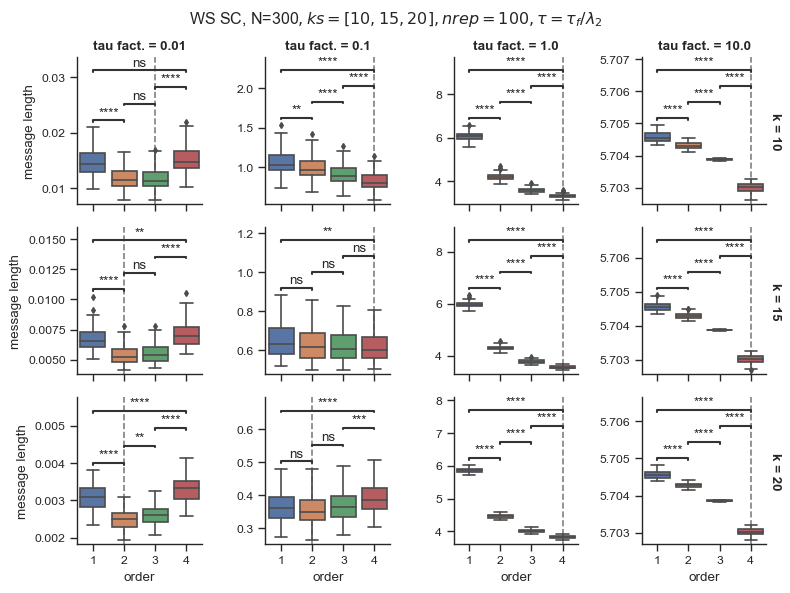

In [41]:
g = sb.catplot(
    kind="box",
    data=df_WSSC,
    x="order",
    y="message length",
    row="k",
    col="tau fact.",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau_fact in enumerate(tau_factors):
    for j, kk in enumerate(kks):

        ax = g.axes[j, i]
        mask = (df_WSSC["tau fact."] == tau_fact) * (df_WSSC["k"] == kk)
        
        annotator = Annotator(
            ax,
            pairs,
            data=df_WSSC[mask],
            y="message length",
            x="order",
            row="k",
            col="tau fact.",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        annotator.apply_and_annotate()
        
        # plot vertical line at minimum
        order_min = df_WSSC[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight='bold')
g.fig.subplots_adjust(top=0.9)  # adjust the Figure in rp
title = rf"WS SC, N={N}$, ks={kks}, nrep={n_rep}, \tau = \tau_f / \lambda_2$"
g.fig.suptitle(title)

fig_name = f"message_length_WSSC_N{N}_ks_{kks}_taufact_{list(tau_factors)}_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [8]:
df_WSSC.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_WSSC_N300_ks_[10, 15, 20]_taufact_[0.01, 0.1, 1.0, 10.0]_nreps_100_boxplot'

## From RSC to RHG: shuffling

In [31]:
N = 100
ps = np.array([1/N, 1/N**2, 1/N**3, 1/N**4])
density = 50
p_shuffles = np.linspace(0,1,5)

n_rep = 100
rescale = True

H0 = xgi.random_simplicial_complex(N, ps=density * ps)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

Hs = dict()
for p in p_shuffles:
    Hs_i = []
    for rep in tqdm(range(n_rep)): 
        if p == 0:
            Hs_i.append(H0)
        else:
            H = shuffle_hyperedges(S=H0, order=1, p=p)
            H = shuffle_hyperedges(S=H, order=2, p=p)
            H = shuffle_hyperedges(S=H, order=3, p=p)
            H = shuffle_hyperedges(S=H, order=4, p=p)
            Hs_i.append(H)
    Hs[p] = Hs_i

100%|█████████████████████████████████████████| 100/100 [01:18<00:00,  1.28it/s]


In [32]:
info_losses = dict()
complexities = dict()
orders_arr = dict()
message_lengths = dict()

for p, Hs_i in Hs.items():
    
    info_losses[p] = dict()
    complexities[p] = dict()
    orders_arr[p] = dict()
    message_lengths[p] = dict()
    
    info_losses_i = []
    complexities_i = []
    orders_arr_i = []
    message_lengths_i = []
    
    for i, H0 in enumerate(tqdm(Hs_i)):
        
        info_losses[p][i] = dict()
        complexities[p][i] = dict()
        orders_arr[p][i] = dict()
        message_lengths[p][i] = dict()

        orders = np.array(xgi.unique_edge_sizes(H0)) - 1
        weights = np.ones(len(orders))
        inverse_rescaling_factors = [max(orders) / d for d in orders]
        #tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale)
        #Ds_H, lZs_H, orders = compute_information(H0, tau_c, rescale_per_node=rescale)
        
        tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1) # 1 / lambda2
        
        tau_factors = np.array([0.1, 1])
        taus = tau_factors * tau_c
        
        for j, tau in enumerate(taus):
            
            tau_factor = tau_factors[j]

            Ds_H, lZs_H = optimization(H0, tau, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale)

            info_losses[p][i][tau_factor] = Ds_H
            complexities[p][i][tau_factor] = lZs_H
            orders_arr[p][i][tau_factor] = orders
            message_lengths[p][i][tau_factor] = Ds_H + lZs_H
                  
labels = [f"{i}" for i in p_shuffles]

100%|███████████████████████████████████████| 100/100 [1:35:46<00:00, 57.47s/it]


In [33]:
# Create an empty list to store the data
long_form_data = []

# Iterate through the nested dictionary and extract the values
for label1, label1_data in message_lengths.items():
    #print(label1)
    for label2, label2_data in label1_data.items():
        for label3, array in label2_data.items():
            for index, value in enumerate(array):
                long_form_data.append([value, label1, label2, round(label3, 3), index + 1])

# Create a DataFrame from the long_form_data list
df_shuffle = pd.DataFrame(long_form_data, columns=['message length', 'p_shuffle', 'rep', 'tau fact.', 'order'])

df_shuffle

,message length,p_shuffle,rep,tau fact.,order
0,0.004228,0.0,0,0.1,1
1,0.003150,0.0,0,0.1,2
2,0.002907,0.0,0,0.1,3
3,0.004436,0.0,0,0.1,4
4,0.386923,0.0,0,1.0,1
...,...,...,...,...,...
3995,0.000693,1.0,99,0.1,4
3996,0.127029,1.0,99,1.0,1
3997,0.096977,1.0,99,1.0,2
3998,0.095013,1.0,99,1.0,3


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,
/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/statannotations/stats/StatTest.py:77: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stat, pval = self._func(group_data1, group_data2, *self.args,


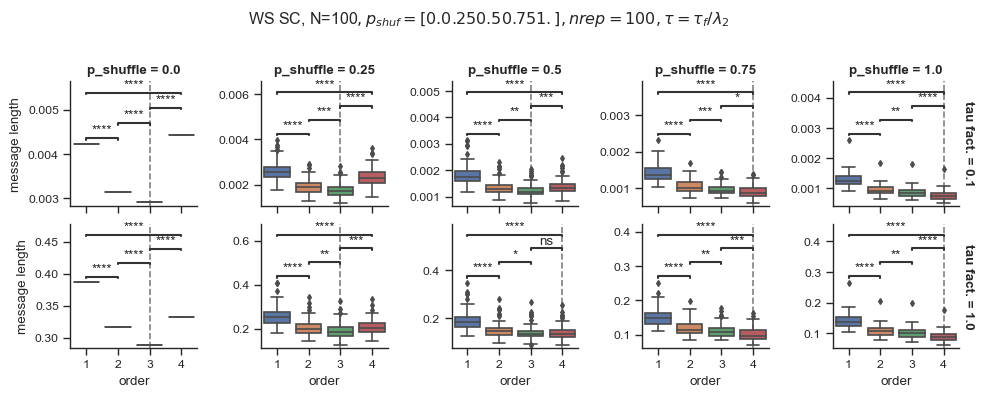

In [36]:
g = sb.catplot(
    kind="box",
    data=df_shuffle,
    x="order",
    y="message length",
    col="p_shuffle",
    row="tau fact.",
    height=2,
    margin_titles=True,
    sharey=False,
    # aspect=1.5,
    fliersize=3,
)

# g.map_dataframe(
#    sb.stripplot,
#    data=df,
#    x="order",
#    y="message length",
#    # row="density",
#    # col="tau",
#    color="black",
#    # dodge=True,
#    alpha=0.2,
# )

# pairs = list(combinations(orders, 2))
pairs = [(1, 2), (1, 4), (2, 3), (3, 4)]

for i, tau_fact in enumerate(tau_factors):
    for j, p in enumerate(p_shuffles):

        ax = g.axes[i,j]
        mask = (df_shuffle["tau fact."] == tau_fact) * (df_shuffle["p_shuffle"] == p)
        
        annotator = Annotator(
            ax,
            pairs,
            data=df_shuffle[mask],
            y="message length",
            x="order",
            row="p_shuffle",
            col="tau fact.",
        )
        annotator.configure(
            test="t-test_welch", text_format="star", loc="inside", verbose=0
        )
        annotator.apply_and_annotate()
        
        # plot vertical line at minimum
        order_min = df_shuffle[mask].groupby("order").mean()["message length"].argmin()
        ax.axvline(order_min, ls="--", c="grey", zorder=-2)

g.set_titles(template="{col_name}", fontweight='bold')
g.fig.subplots_adjust(top=0.8)  # adjust the Figure in rp
title = rf"WS SC, N={N}$, p_{{shuf}}={p_shuffles}, nrep={n_rep}, \tau = \tau_f / \lambda_2$"
g.fig.suptitle(title)

fig_name = f"message_length_RSCshuffle_N{N}_pshuff_{p_shuffles}_taufact_{list(tau_factors)}_nreps_{n_rep}_boxplot"
plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

plt.show()

In [35]:
df_shuffle.to_csv(f"{out_dir}{fig_name}.csv")
fig_name

'message_length_RSCshuffle_N100_pshuff_[0.   0.25 0.5  0.75 1.  ]_taufact_[0.1, 1.0]_nreps_100_boxplot'